In [1]:
import os
import pywt
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
from pandas import DataFrame
from pandas import concat#相空间重构用到的包
import seaborn as sns
from scipy.stats import pearsonr
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#导入csv文件
train_spring=pd.read_excel(r'D:\article\train_spring.xlsx')
test_spring=pd.read_excel(r'D:\article\test_spring.xlsx')

In [3]:
train_spring

power  windspeed        tem     pressure    wind_dir  labels
0     0.102656   4.673416  19.096002  1022.005703   75.902382       0
1     0.092644   4.524258  18.946741  1021.607266   73.933327       0
2     0.086796   4.437759  18.797784  1020.683047   72.990021       0
3     0.067614   4.151359  18.526056  1020.589766   75.201088       0
4     0.041875   3.666993  18.793115  1020.479609   69.590309       0
...        ...        ...        ...          ...         ...     ...
1703  0.348359   7.033112  25.736230  1008.965625  120.991257       0
1704  0.350127   7.043198  25.506891  1008.238906  134.442276       0
1705  0.387392   7.258162  25.316797  1007.345000  147.339477       0
1706  0.487362   7.836196  25.342981  1006.460781  158.050552       0
1707  0.511106   7.972322  25.152917  1006.042891  178.087509       0

[1708 rows x 6 columns]

In [4]:
train_spring['labels'] =train_spring['labels'].replace(to_replace=2, value=1)
test_spring['labels'] =test_spring['labels'].replace(to_replace=2, value=1)

In [5]:
x_train_spring = train_spring.iloc[:, :5]
y_train_spring = train_spring.iloc[:, -1]
x_test_spring = test_spring.iloc[:, :5]
y_test_spring = test_spring.iloc[:, -1]

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 归一化每一列
scaler_x_train_spring = pd.DataFrame(scaler.fit_transform(x_train_spring), columns=x_train_spring.columns)
scaler_x_test_spring = pd.DataFrame(scaler.fit_transform(x_test_spring), columns=x_test_spring.columns)
scaler_x_test_spring

power  windspeed       tem  pressure  wind_dir
0    0.370005   0.696886  0.081249  0.702489  0.573933
1    0.006824   0.228048  0.102346  0.806136  0.691396
2    0.000000   0.116182  0.078920  0.836720  0.811479
3    0.000000   0.154570  0.085202  0.854947  0.937379
4    0.024035   0.295989  0.091162  0.873850  1.000000
..        ...        ...       ...       ...       ...
423  0.078313   0.407780  0.590086  0.058663  0.838665
424  0.004311   0.204184  0.590086  0.107129  0.845561
425  0.000000   0.011229  0.509825  0.144656  0.540118
426  0.000000   0.105309  0.477615  0.246312  0.489755
427  0.001398   0.174718  0.446429  0.254915  0.517765

[428 rows x 5 columns]

In [7]:
#春天
#不挑选特征，直接利用PCA进行降维（训练集）

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 实例化PCA对象，例如，我们选择保留2个主成分
pca = PCA(n_components=2)
# 对数据进行拟合和转换
X_train_pca = pca.fit_transform(scaler_x_train_spring)
# 查看每个主成分解释的方差比例
print(pca.explained_variance_ratio_)
X_test_pca = pca.fit_transform(scaler_x_test_spring)
# 查看每个主成分解释的方差比例
print(pca.explained_variance_ratio_)

[0.5336407  0.33584924]
[0.41775097 0.31805577]


Class counts: {0: 1487, 1: 221}


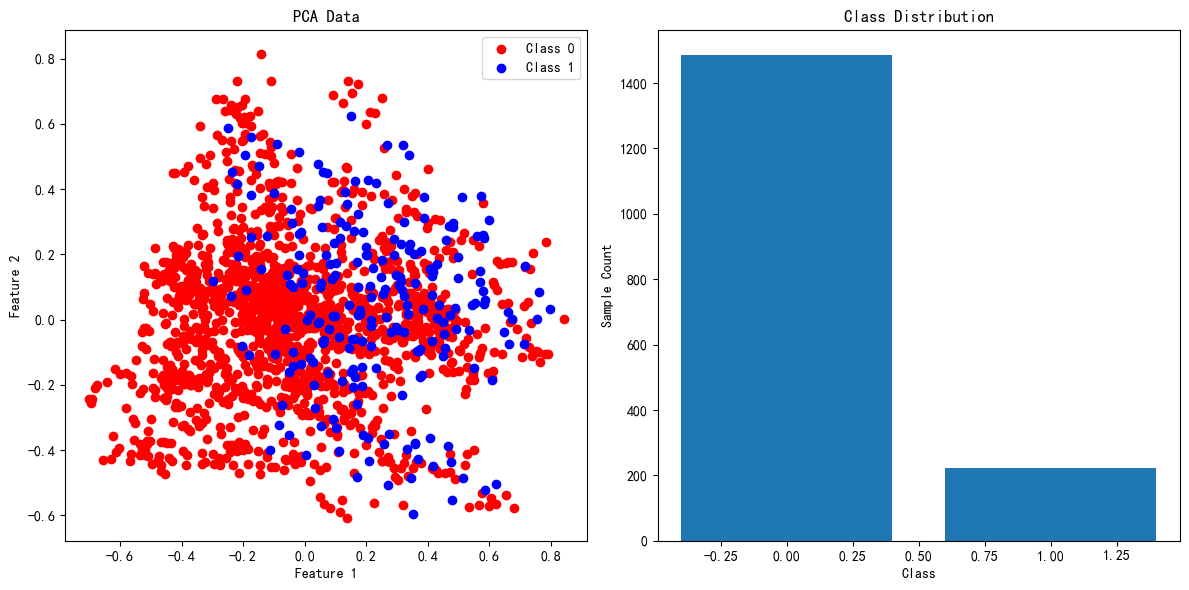

In [9]:
import numpy as np
from sklearn.datasets import make_classification
#春天训练集
# 设置随机种子以确保结果的可重复性
np.random.seed(42)
y_train_spring_numpy=y_train_spring.values.squeeze()
# 显示每个类别的样本数量
class_counts = np.bincount(y_train_spring_numpy)
print("Class counts:", dict(zip(range(2), class_counts)))

# 可视化数据集分布（可选）
import matplotlib.pyplot as plt

# 将数据分为三个子集，每个子集对应一个类别
class_0 = X_train_pca[y_train_spring_numpy == 0]
class_1 = X_train_pca[y_train_spring_numpy == 1]


plt.figure(figsize=(12, 6))

# 绘制每个类别的数据点
plt.subplot(1, 2, 1)
plt.scatter(class_0[:, 0], class_0[:,1], c='red', label='Class 0')
plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Class 1')
plt.title('PCA Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 绘制类别分布
plt.subplot(1, 2, 2)
plt.bar(range(2), class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Sample Count')

plt.tight_layout()
plt.show()

In [10]:
#春天
#挑选特征,进行特征选择（训练集）

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # 将数据集转换为Pandas DataFrame以便于处理
# feature_names=['power', 'windspeed', 'tem', 'pressure', 'wind_dir']
# X = scaler_x_train_spring.values  # 假设df_x_train_spring是一个DataFrame
# y = y_train_spring.values  # 假设df_y_train_spring是一个Series或类似数组的结构
# df = pd.DataFrame(X, columns=feature_names)
# df['label'] = y

# # 为每对特征创建一个单独的画布
# for i, feature1 in enumerate(feature_names):
#     for feature2 in feature_names[i+1:]:
#         # 创建一个新的画布
#         plt.figure(figsize=(8, 6))  # 可以根据需要调整大小

#         # 绘制散点图
#         ax = sns.scatterplot(data=df, x=feature1, y=feature2, hue='label', palette='plasma', s=50)

#         # 设置标题和轴标签
#         ax.set_title(f'{feature1} vs {feature2}')
#         ax.set_xlabel(feature1)
#         ax.set_ylabel(feature2)

# # 调整子图间距
# plt.tight_layout()
# plt.show()

In [12]:
###重采样对比实验（ros、smote、asdn、自然领域重采样）

In [13]:
from imblearn.over_sampling import RandomOverSampler
# 实例化 RandomOversampling 类对象
ros = RandomOverSampler(random_state=0)
# 过采样得到数据集及其标签
x_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train_spring_numpy)
from imblearn.over_sampling import SMOTE
# 实例化 SMOTE 类对象
smote = SMOTE(random_state=0)
# 过采样得到数据集及其标签
x_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train_spring_numpy)
from imblearn.over_sampling import ADASYN
# 实例化 ADASYN 类对象
adasyn = ADASYN(random_state=0)
# 过采样得到数据集及其标签
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_pca, y_train_spring_numpy)

In [14]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE

class NaN_DEBOHID:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.nn = NearestNeighbors(n_neighbors=n_neighbors)

    def fit_resample(self, X, y):
        # 计算自然邻居
        self.nn.fit(X)
        distances, indices = self.nn.kneighbors(X)

        # 标记密集和离群样本
        dense_indices = self._get_dense_indices(indices, y)
        outlier_indices = self._get_outlier_indices(indices, y)

        # 对密集样本应用DEBO算法
        dense_X, dense_y = X[dense_indices], y[dense_indices]
        debo = SMOTE()
        debo_X, debo_y = debo.fit_resample(dense_X, dense_y)

        # 合并原始离群样本和过采样后的密集样本
        X_resampled = np.vstack((X[dense_indices], debo_X))
        y_resampled = np.hstack((dense_y, debo_y))

        return X_resampled, y_resampled

    def _get_dense_indices(self, indices, y):
        # 计算每个样本的自然邻居中属于同一类别的比例
        majority_in_neighbors = self._get_majority_in_neighbors(indices, y)
        
        # 如果一个样本的自然邻居中属于多数类别的比例大于等于50%，则认为是密集样本
        dense_indices = majority_in_neighbors >= (self.n_neighbors / 2)
        
        # 返回密集样本的索引
        return np.where(dense_indices)[0]

    def _get_outlier_indices(self, indices, y):
        # 使用与_get_dense_indices相同的逻辑，但是这次我们寻找那些邻居中
        # 属于多数类别的比例小于50%的样本
        majority_in_neighbors = self._get_majority_in_neighbors(indices, y)
        
        # 如果一个样本的自然邻居中属于多数类别的比例小于50%，则认为是离群样本
        outlier_indices = majority_in_neighbors < (self.n_neighbors / 2)
        
        # 返回离群样本的索引
        return np.where(outlier_indices)[0]

    def _get_majority_in_neighbors(self, indices, y):
        # 计算每个样本的自然邻居中属于同一类别的数量
        neighbor_labels = y[indices]
        majority_counts = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=neighbor_labels)
        
        # 计算每个样本的自然邻居中属于多数类别的比例
        majority_in_neighbors = np.array([np.sum(neighbor_labels[i] == majority_counts[i]) for i in range(len(y))])
        return majority_in_neighbors

# 使用NaN-DEBOHID
nan_debohid = NaN_DEBOHID(n_neighbors=3)
# 假设X和y是已经定义好的数据集和标签
x_train_resampled, y_train_resampled = nan_debohid.fit_resample(X_train_pca,y_train_spring_numpy)

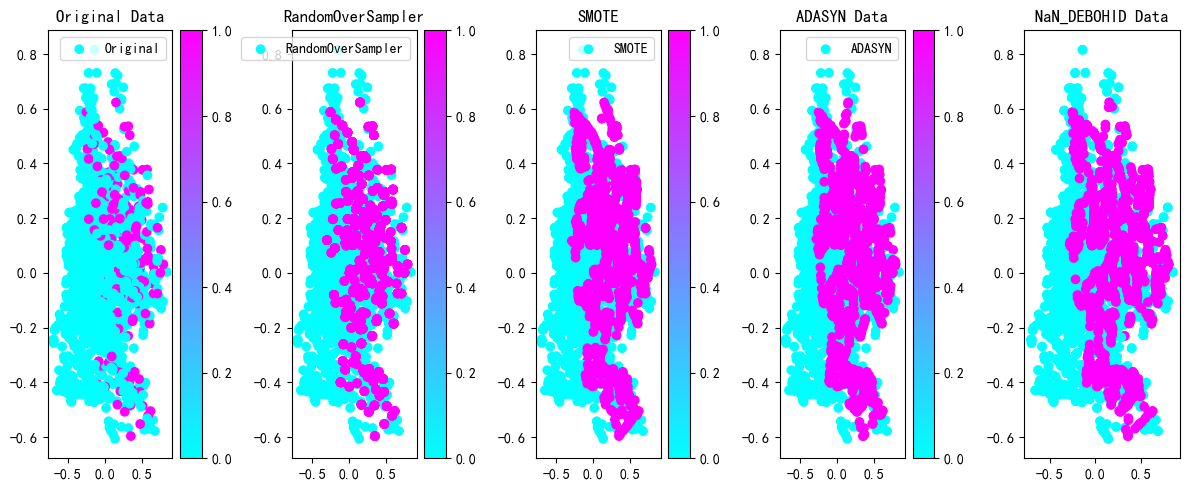

In [15]:
# 假设 x_train_spring 是二维数据
plt.figure(figsize=(12, 5))
plt.subplot(1, 5, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_spring_numpy, cmap='cool', label='Original')
plt.title('Original Data')

plt.subplot(1, 5, 2)
plt.scatter(x_train_ros[:, 0], x_train_ros[:, 1], c=y_train_ros, cmap='cool', label='RandomOverSampler')
plt.title('RandomOverSampler')

plt.subplot(1, 5, 3)
plt.scatter(x_train_smote[:, 0], x_train_smote[:, 1], c=y_train_smote, cmap='cool', label='SMOTE')
plt.title('SMOTE')

plt.subplot(1, 5, 4)
plt.scatter(x_train_adasyn[:, 0], x_train_adasyn[:, 1], c=y_train_adasyn, cmap='cool', label='ADASYN')
plt.title('ADASYN Data')

plt.subplot(1, 5, 5)
plt.scatter(x_train_resampled[:, 0], x_train_resampled[:, 1], c=y_train_resampled, cmap='cool', label='NaN_DEBOHID')
plt.title('NaN_DEBOHID Data')

for i in range(1, 5):
    plt.subplot(1, 5, i)
    plt.legend()
    plt.colorbar()

plt.tight_layout()
plt.show()

2024/05/11 11:09:13 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 11:09:51 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.908534646181705, Global best: 0.908534646181705, Runtime: 21.06797 seconds
2024/05/11 11:10:02 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.9088707806354865, Global best: 0.9088707806354865, Runtime: 10.89236 seconds
2024/05/11 11:10:08 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.909879183996831, Global best: 0.909879183996831, Runtime: 6.40030 seconds
2024/05/11 11:10:14 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.9118988201341143, Global best: 0.9118988201341143, Runtime: 5.98576 seconds
2024/05/11 11:10:18 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.9118988201341143, Global best: 0.9118988201341143, Runtime: 

Solution: [ 2.07009473 30.2701266  21.96584098], Fitness: 0.9118988201341143
train_accuracy: 0.91
Accuracy: 0.84
Precision (macro): 0.51
Recall (macro): 0.52
F1 Score (macro): 0.51


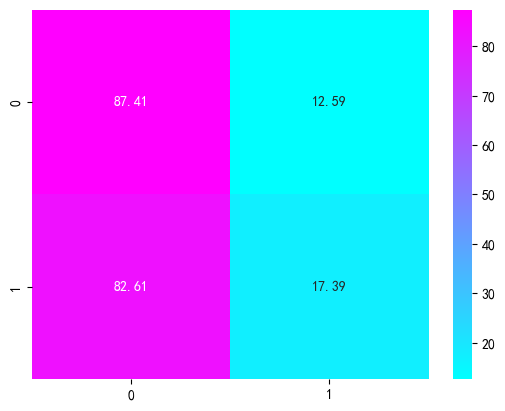

In [25]:
##pca-ros-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_ros), y=y_train_ros)
class_weights_dict = dict(zip(np.unique(y_train_ros), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_ros,y_train_ros):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_ros,y_train_ros),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_ros,y_train_ros)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_ros,y_train_ros)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s11 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s11)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s11)
precision = precision_score(y_test_spring, y_pred_s11, average='macro')
recall = recall_score(y_test_spring, y_pred_s11, average='macro')
f1 = f1_score(y_test_spring, y_pred_s11, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 11:10:35 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 11:11:31 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7740406869818635, Global best: 0.7740406869818635, Runtime: 35.88800 seconds
2024/05/11 11:12:10 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.776055796055796, Global best: 0.776055796055796, Runtime: 38.64880 seconds
2024/05/11 11:12:48 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.776055796055796, Global best: 0.776055796055796, Runtime: 38.72007 seconds
2024/05/11 11:13:34 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.7760563619387149, Global best: 0.7760563619387149, Runtime: 45.46900 seconds
2024/05/11 11:14:20 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.7760563619387149, Global best: 0.7760563619387149, Runtime

Solution: [28.54073916 10.70904574 17.5876321 ], Fitness: 0.7760563619387149
train_accuracy: 0.78
Accuracy: 0.72
Precision (macro): 0.51
Recall (macro): 0.55
F1 Score (macro): 0.48


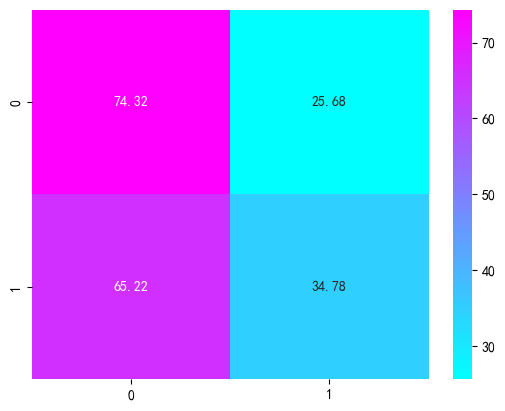

In [26]:
##pca-smote-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = dict(zip(np.unique(y_train_smote), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_smote,y_train_smote):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_smote,y_train_smote),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_smote,y_train_smote)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_smote,y_train_smote)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s12 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s12)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s12)
precision = precision_score(y_test_spring, y_pred_s12, average='macro')
recall = recall_score(y_test_spring, y_pred_s12, average='macro')
f1 = f1_score(y_test_spring, y_pred_s12, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 11:18:10 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 11:19:29 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7493377483443708, Global best: 0.7493377483443708, Runtime: 55.73249 seconds
2024/05/11 11:20:24 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7493377483443708, Global best: 0.7493377483443708, Runtime: 54.74407 seconds
2024/05/11 11:21:29 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.7493377483443708, Global best: 0.7493377483443708, Runtime: 65.93701 seconds
2024/05/11 11:22:37 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.7493377483443708, Global best: 0.7493377483443708, Runtime: 67.01733 seconds
2024/05/11 11:23:47 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.7503311258278146, Global best: 0.7503311258278146, Run

Solution: [27.82604219  1.         25.97125119], Fitness: 0.7513245033112583
train_accuracy: 0.75
Accuracy: 0.72
Precision (macro): 0.52
Recall (macro): 0.57
F1 Score (macro): 0.48


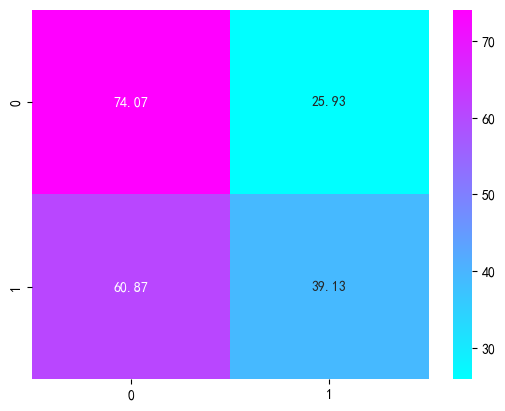

In [29]:
##pca-adasyn-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_adasyn), y=y_train_adasyn)
class_weights_dict = dict(zip(np.unique(y_train_adasyn), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_adasyn,y_train_adasyn):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_adasyn,y_train_adasyn),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_adasyn,y_train_adasyn)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_adasyn,y_train_adasyn)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s13 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s13)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s13)
precision = precision_score(y_test_spring, y_pred_s13, average='macro')
recall = recall_score(y_test_spring, y_pred_s13, average='macro')
f1 = f1_score(y_test_spring, y_pred_s13, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 11:46:17 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 11:48:02 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.9406197265322132, Global best: 0.9406197265322132, Runtime: 73.93287 seconds
2024/05/11 11:49:25 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.9406197265322132, Global best: 0.9406197265322132, Runtime: 83.05130 seconds
2024/05/11 11:50:50 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.9406197265322132, Global best: 0.9406197265322132, Runtime: 84.95060 seconds
2024/05/11 11:52:23 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.9406197265322132, Global best: 0.9406197265322132, Runtime: 92.43959 seconds
2024/05/11 11:53:51 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.9406197265322132, Global best: 0.9406197265322132, Run

Solution: [43.41035983 34.51941909 48.76257425], Fitness: 0.9406197265322132
train_accuracy: 0.94
Accuracy: 0.77
Precision (macro): 0.52
Recall (macro): 0.55
F1 Score (macro): 0.50


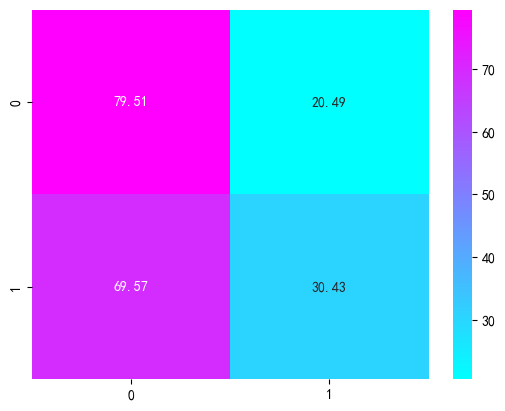

In [31]:
##pca-nan-rf
##RF模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = dict(zip(np.unique(y_train_resampled), class_weights))

# 假设我们想要为类别1和2的错误分类分配更高的成本，例如，是类别0的两倍
# 调整类别权重
for i in [1]:
    class_weights_dict[i] *=2
    
np.random.seed(42)
def cross_val_score_rf(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    average_scoring = scores.mean()  # 返回交叉验证的平均分数
    return average_scoring

# 定义适应度函数，它将用于优化
def fitness_function(nest, X, y):
    n_estimators, max_features, max_depth = nest
    rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation
    return scores.mean()  # 返回交叉验证的平均准确率

# 定义适应度函数的参数范围
def get_nest(x_train_resampled,y_train_resampled):
    problem_dict1 = {
        "fit_func": lambda nest: fitness_function(nest,x_train_resampled,y_train_resampled),
        "lb": [1,1,1],
        "ub": [50,50,100],
        "minmax": "max",
    }
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数和适应度值
    return (best_position[0], best_position[1], best_position[2]), best_fitness  # 返回最优参数和适应度值

# 调用 get_nest 并传递训练数据
nest, average_accuracy = get_nest(x_train_resampled,y_train_resampled)  # 修改这里以接收两个返回值

# 从最优解中获取参数
n_estimators, max_features, max_depth = nest

# 使用转换后的整数创建随机森林分类器实例
rf = RandomForestClassifier(n_estimators=int(n_estimators), max_features=int(max_features), max_depth=int(max_depth),
                             class_weight=class_weights_dict, random_state=42)
rf.fit(x_train_resampled,y_train_resampled)
# 打印训练准确率
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s14 = rf.predict(X_test_pca)  # 确保已经拟合模型

# 使用 Seaborn 的 heatmap 函数绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s14)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='cool', cbar=True)


# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s14)
precision = precision_score(y_test_spring, y_pred_s14, average='macro')
recall = recall_score(y_test_spring, y_pred_s14, average='macro')
f1 = f1_score(y_test_spring, y_pred_s14, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

In [32]:
###pca-ros-knn
##knn模型分类
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_ros, y_train_ros)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_ros, y_train_ros)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_ros, y_train_ros)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s21 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s21)
precision = precision_score(y_test_spring, y_pred_s21, average='macro')
recall = recall_score(y_test_spring, y_pred_s21, average='macro')
f1 = f1_score(y_test_spring, y_pred_s21, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s21))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:00:59 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:01:08 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.8974427750898339, Global best: 0.8974427750898339, Runtime: 6.03389 seconds
2024/05/11 12:01:14 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.8974427750898339, Global best: 0.8974427750898339, Runtime: 5.83669 seconds
2024/05/11 12:01:18 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.8974427750898339, Global best: 0.8974427750898339, Runtime: 4.56863 seconds
2024/05/11 12:01:24 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.8974427750898339, Global best: 0.8974427750898339, Runtime: 5.91641 seconds
2024/05/11 12:01:30 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.8974427750898339, Global best: 0.8974427750898339, Runtime

Solution: [1.   0.01 0.01], Fitness: 0.8974427750898339
train_accuracy: 0.90
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       405
           1       0.08      0.22      0.11        23

    accuracy                           0.82       428
   macro avg       0.51      0.54      0.51       428
weighted avg       0.90      0.82      0.86       428

Precision (macro): 0.51
Recall (macro): 0.54
F1 Score (macro): 0.51


In [33]:
###pca-smote-knn
##knn模型分类
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_smote, y_train_smote)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_smote, y_train_smote)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_smote, y_train_smote)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s22 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s22)
precision = precision_score(y_test_spring, y_pred_s22, average='macro')
recall = recall_score(y_test_spring, y_pred_s22, average='macro')
f1 = f1_score(y_test_spring, y_pred_s22, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s22))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:01:54 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:02:01 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7810961152137622, Global best: 0.7810961152137622, Runtime: 4.91946 seconds
2024/05/11 12:02:06 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7810961152137622, Global best: 0.7810961152137622, Runtime: 4.61937 seconds
2024/05/11 12:02:11 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.7810961152137622, Global best: 0.7810961152137622, Runtime: 4.65831 seconds
2024/05/11 12:02:16 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.7810961152137622, Global best: 0.7810961152137622, Runtime: 5.32607 seconds
2024/05/11 12:02:21 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.7810961152137622, Global best: 0.7810961152137622, Runtime

Solution: [1.   0.01 0.01], Fitness: 0.7810961152137622
train_accuracy: 0.78
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       405
           1       0.05      0.26      0.09        23

    accuracy                           0.72       428
   macro avg       0.50      0.50      0.46       428
weighted avg       0.90      0.72      0.79       428

Precision (macro): 0.50
Recall (macro): 0.50
F1 Score (macro): 0.46


In [34]:
###pca-adasyn-knn
##knn模型分类
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_adasyn, y_train_adasyn)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_adasyn, y_train_adasyn)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_adasyn, y_train_adasyn)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s23 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s23)
precision = precision_score(y_test_spring, y_pred_s23, average='macro')
recall = recall_score(y_test_spring, y_pred_s23, average='macro')
f1 = f1_score(y_test_spring, y_pred_s23, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s23))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:02:45 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:02:52 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7543046357615895, Global best: 0.7543046357615895, Runtime: 4.65803 seconds
2024/05/11 12:02:57 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7543046357615895, Global best: 0.7543046357615895, Runtime: 4.63943 seconds
2024/05/11 12:03:01 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.7543046357615895, Global best: 0.7543046357615895, Runtime: 4.56379 seconds
2024/05/11 12:03:06 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.7543046357615895, Global best: 0.7543046357615895, Runtime: 4.66487 seconds
2024/05/11 12:03:12 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.7543046357615895, Global best: 0.7543046357615895, Runtime

Solution: [1.   0.01 0.01], Fitness: 0.7543046357615895
train_accuracy: 0.75
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       405
           1       0.05      0.26      0.08        23

    accuracy                           0.69       428
   macro avg       0.50      0.49      0.45       428
weighted avg       0.90      0.69      0.77       428

Precision (macro): 0.50
Recall (macro): 0.49
F1 Score (macro): 0.45


In [35]:
###pca-adasyn-knn
#KNN模型分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, matthews_corrcoef, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPRegressor
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

np.random.seed(42)

# 确保 weights 和 algorithm 列表在全局作用域内定义
weights = ["lin", "sigm", "tanh", "rbf_l1", "rbf_l2", "rbf_linf"]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# 定义交叉验证的适应度函数
def cross_val_score_knn(nest, X, y):
    n_neighbors, weights_fx, algorithm_fx = nest
    n_neighbors = int(n_neighbors)
    # weights_fx 应该是介于 0 到 1 之间的值，用于选择权重类型
    if weights_fx < 0.5:
        weights_str = 'uniform'  # 如果 weights_fx 在 0 到 0.5 之间，使用 'uniform'
    else:
        weights_str = 'distance'  # 如果 weights_fx 在 0.5 到 1 之间，使用 'distance'
    
    algorithm_index = int(round(algorithm_fx * len(algorithm)))  # 确保索引在合法范围内
    algorithm_str = algorithm[algorithm_index]
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_str, algorithm=algorithm_str)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    average_accuracy = scores.mean()
    return average_accuracy

# 定义适应度函数
def fitness_function(nest):
    return cross_val_score_knn(nest, x_train_resampled, y_train_resampled)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 0.01, 0.01],
        "ub": [10, 0.05, 0.05],
        "minmax": "max",
    }
    # 设置迭代次数和粒子群数
    epoch = 10
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 返回最优参数
    return (best_position[0], best_position[1], best_position[2])

# 调用 get_nest 函数来获取最优参数
nest = get_nest()
n_neighbors, weights_fx, algorithm_fx = nest

# 将 n_neighbors 转换为整数
n_neighbors = int(n_neighbors)

# 根据 weights_fx 选择权重策略
weights_strategy = 'uniform' if weights_fx < 0.5 else 'distance'

# 根据 algorithm_fx 选择算法
algorithm_index = int(round(algorithm_fx * len(algorithm)))
algorithm_str = algorithm[algorithm_index]

# 使用最优参数创建 KNN 分类器实例
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights_strategy, algorithm=algorithm_str)
knn.fit(x_train_resampled, y_train_resampled)

# 计算交叉验证分数
cv_scores = cross_val_score_knn((n_neighbors, weights_fx, algorithm_fx), x_train_resampled, y_train_resampled)
average_accuracy = cv_scores.mean()
print(f'train_accuracy: {average_accuracy:.2f}')

# 执行预测
y_pred_s24 = knn.predict(X_test_pca)

# 计算准确率和其他性能指标
accuracy = accuracy_score(y_test_spring, y_pred_s24)
precision = precision_score(y_test_spring, y_pred_s24, average='macro')
recall = recall_score(y_test_spring, y_pred_s24, average='macro')
f1 = f1_score(y_test_spring, y_pred_s24, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test_spring, y_pred_s24))
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:03:39 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:03:51 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.9510834268304921, Global best: 0.9510834268304921, Runtime: 8.08574 seconds
2024/05/11 12:03:58 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.9510834268304921, Global best: 0.9510834268304921, Runtime: 7.64057 seconds
2024/05/11 12:04:06 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.9510834268304921, Global best: 0.9510834268304921, Runtime: 7.45289 seconds
2024/05/11 12:04:13 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.9510834268304921, Global best: 0.9510834268304921, Runtime: 7.65326 seconds
2024/05/11 12:04:20 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.9510834268304921, Global best: 0.9510834268304921, Runtime

Solution: [1.   0.01 0.01], Fitness: 0.9510834268304921
train_accuracy: 0.95
Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       405
           1       0.06      0.30      0.10        23

    accuracy                           0.70       428
   macro avg       0.50      0.52      0.46       428
weighted avg       0.90      0.70      0.78       428

Precision (macro): 0.50
Recall (macro): 0.52
F1 Score (macro): 0.46


2024/05/11 12:09:54 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:09:55 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.6970268511444982, Global best: 0.6970268511444982, Runtime: 0.56406 seconds
2024/05/11 12:09:56 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.6970268511444982, Global best: 0.6970268511444982, Runtime: 0.71951 seconds
2024/05/11 12:09:56 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.6970268511444982, Global best: 0.6970268511444982, Runtime: 0.62521 seconds
2024/05/11 12:09:57 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.6970268511444982, Global best: 0.6970268511444982, Runtime: 0.75462 seconds
2024/05/11 12:09:58 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.6970268511444982, Global best: 0.6970268511444982, Runtime

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 0.6970268511444982
train_accuracy: 0.70


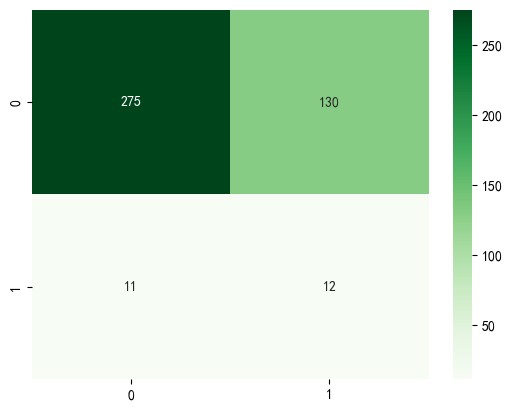

Accuracy: 0.67
Precision (macro): 0.52
Recall (macro): 0.60
F1 Score (macro): 0.47


In [39]:
###pca-ros-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_ros, y_train_ros)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_ros, y_train_ros)
# 预测测试集
y_pred_s31= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_ros, y_train_ros)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s31)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s31)
precision = precision_score(y_test_spring, y_pred_s31, average='macro')
recall = recall_score(y_test_spring, y_pred_s31, average='macro')
f1 = f1_score(y_test_spring, y_pred_s31, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:10:03 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:10:04 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.6950145714851598, Global best: 0.6950145714851598, Runtime: 0.56483 seconds
2024/05/11 12:10:04 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.6950145714851598, Global best: 0.6950145714851598, Runtime: 0.58229 seconds
2024/05/11 12:10:05 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.6950145714851598, Global best: 0.6950145714851598, Runtime: 0.81221 seconds
2024/05/11 12:10:06 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.6950145714851598, Global best: 0.6950145714851598, Runtime: 0.69441 seconds
2024/05/11 12:10:06 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.6950145714851598, Global best: 0.6950145714851598, Runtime

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 0.6950145714851598
train_accuracy: 0.70


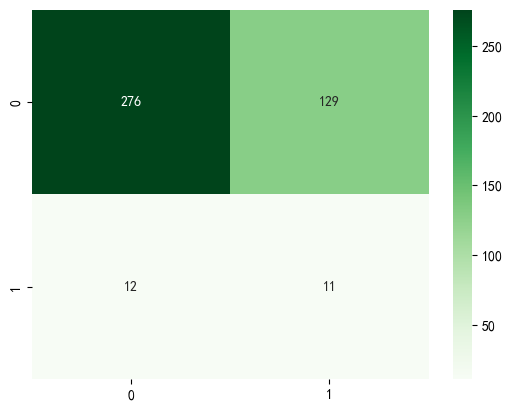

Accuracy: 0.67
Precision (macro): 0.52
Recall (macro): 0.58
F1 Score (macro): 0.47


In [40]:
###pca-smote-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_smote, y_train_smote)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_smote, y_train_smote)
# 预测测试集
y_pred_s32= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_smote, y_train_smote)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s32)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s32)
precision = precision_score(y_test_spring, y_pred_s32, average='macro')
recall = recall_score(y_test_spring, y_pred_s32, average='macro')
f1 = f1_score(y_test_spring, y_pred_s32, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:10:51 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:10:52 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.6864238410596026, Global best: 0.6864238410596026, Runtime: 0.67792 seconds
2024/05/11 12:10:53 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.6864238410596026, Global best: 0.6864238410596026, Runtime: 0.68798 seconds
2024/05/11 12:10:54 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.6864238410596026, Global best: 0.6864238410596026, Runtime: 0.63847 seconds
2024/05/11 12:10:54 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.6864238410596026, Global best: 0.6864238410596026, Runtime: 0.59037 seconds
2024/05/11 12:10:55 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.6864238410596026, Global best: 0.6864238410596026, Runtime

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 0.6864238410596026
train_accuracy: 0.69


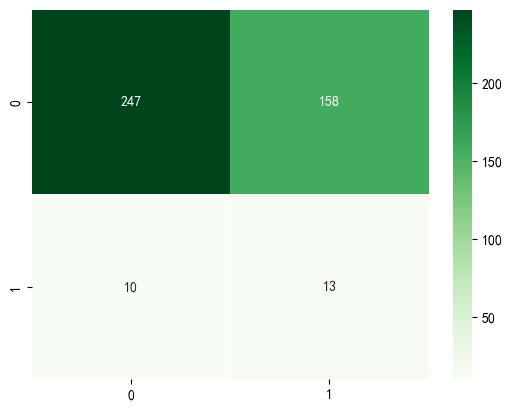

Accuracy: 0.61
Precision (macro): 0.52
Recall (macro): 0.59
F1 Score (macro): 0.44


In [41]:
###pca-adasyn-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_adasyn, y_train_adasyn)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_adasyn, y_train_adasyn)
# 预测测试集
y_pred_s33= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_adasyn, y_train_adasyn)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s33)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s33)
precision = precision_score(y_test_spring, y_pred_s33, average='macro')
recall = recall_score(y_test_spring, y_pred_s33, average='macro')
f1 = f1_score(y_test_spring, y_pred_s33, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/11 12:11:12 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/11 12:11:13 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.6975608643698291, Global best: 0.6975608643698291, Runtime: 0.70634 seconds
2024/05/11 12:11:14 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.6975608643698291, Global best: 0.6975608643698291, Runtime: 0.66155 seconds
2024/05/11 12:11:14 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 3, Current best: 0.6975608643698291, Global best: 0.6975608643698291, Runtime: 0.69344 seconds
2024/05/11 12:11:15 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 4, Current best: 0.6975608643698291, Global best: 0.6975608643698291, Runtime: 0.66579 seconds
2024/05/11 12:11:16 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 5, Current best: 0.6975608643698291, Global best: 0.6975608643698291, Runtime

Optimal var_smoothing: 2.0878533426400506e-08, Best Fitness: 0.6975608643698291
train_accuracy: 0.70


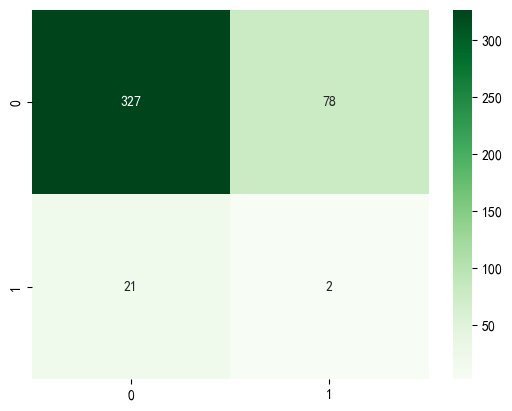

Accuracy: 0.77
Precision (macro): 0.48
Recall (macro): 0.45
F1 Score (macro): 0.45


In [42]:
###pca-nan-朴素贝叶斯
#朴素贝叶斯分类
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
np.random.seed(42)

# 定义交叉验证的适应度函数
def cross_val_score_gnb(var_smoothing, X, y):
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(X, y)
    scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
    return scores.mean()

# 定义ZOA的适应度函数
def fitness_function(solution):
    return cross_val_score_gnb(solution[0], x_train_resampled, y_train_resampled)

# 定义var_smoothing的参数范围
var_smoothing_lb = 1e-9  # 下界
var_smoothing_ub = 1e-5  # 上界

# 初始化ZOA优化器
problem_dict = {
    "fit_func": fitness_function,
    "lb": [var_smoothing_lb],  # 参数的下界列表
    "ub": [var_smoothing_ub],  # 参数的上界列表
    "minmax": "max"  # 目标是最大化适应度函数
}
epoch =10  # 进化代数
pop_size =32  # 种群大小

# 创建并运行ZOA优化器
model = OriginalZOA(epoch, pop_size)
best_solution, best_fitness = model.solve(problem_dict)

# 输出最优的var_smoothing值和对应的适应度值
var_smoothing_optimal = best_solution[0]
print(f"Optimal var_smoothing: {var_smoothing_optimal}, Best Fitness: {best_fitness}")

# 使用找到的最优var_smoothing值来初始化GaussianNB
gnb_optimal = GaussianNB(var_smoothing=var_smoothing_optimal)
gnb_optimal.fit(x_train_resampled, y_train_resampled)
# 预测测试集
y_pred_s34= gnb_optimal.predict(X_test_pca)

# 计算训练准确率
average_accuracy = cross_val_score_gnb(var_smoothing_optimal, x_train_resampled, y_train_resampled)
print(f'train_accuracy: {average_accuracy:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring, y_pred_s34)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

# 计算准确率和其他指标
accuracy = accuracy_score(y_test_spring, y_pred_s34)
precision = precision_score(y_test_spring, y_pred_s34, average='macro')
recall = recall_score(y_test_spring, y_pred_s34, average='macro')
f1 = f1_score(y_test_spring, y_pred_s34, average='macro')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

2024/05/12 09:03:20 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/12 09:26:32 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7279727339744568, Global best: 0.7279727339744568, Runtime: 901.41366 seconds
2024/05/12 09:43:37 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7279727339744568, Global best: 0.7279727339744568, Runtime: 1025.12967 seconds


Solution: [3.77735458e+01 1.27134903e+01 8.45863758e-04], Fitness: 0.7279727339744568
(37.77354579378964, 12.713490317738959, 0.0008458637582367364)
Epoch 1/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6180 - loss: 0.6633 - val_accuracy: 0.4454 - val_loss: 0.7851
Epoch 2/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6836 - loss: 0.5529 - val_accuracy: 0.5681 - val_loss: 0.8316
Epoch 3/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7111 - loss: 0.5203 - val_accuracy: 0.6403 - val_loss: 0.7603
Epoch 4/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.5199 - val_accuracy: 0.6454 - val_loss: 0.7591
Epoch 5/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7189 - loss: 0.5083 - val_accuracy: 0.6639 - val_loss: 0.7393
Epoch 6/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.5208 - val_accuracy: 0.7143 - val_loss: 0.7546
Epoch 7/12
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 0.5227 - val_accur

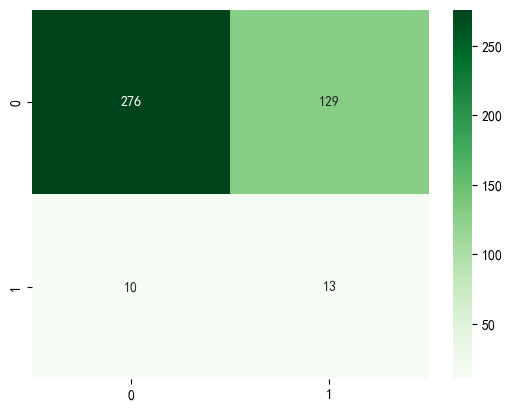

In [17]:
###pca-ros-FCNN
#FCNN前馈神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_ros_encoded = to_categorical(y_train_ros, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_ros)            # 输出原始标签
# print(y_train_ros_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_ros):
        x_train_fold, x_val_fold = x_train_ros[train_index], x_train_ros[val_index]
        y_train_fold, y_val_fold = y_train_ros_encoded[train_index], y_train_ros_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_ros.shape[1:], num_classes)
history = model.fit(x_train_ros, y_train_ros_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s41 = model.predict(X_test_pca)
y_pred_s41_classes = np.argmax(y_pred_s41, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s41_classes)
precision = precision_score(y_test_spring_classes, y_pred_s41_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s41_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s41_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s41_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

2024/05/12 01:37:56 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/12 02:05:19 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.727638304233551, Global best: 0.727638304233551, Runtime: 1072.49246 seconds
2024/05/12 02:26:58 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.727638304233551, Global best: 0.727638304233551, Runtime: 1298.82624 seconds


Solution: [4.55026565e+01 1.93949894e+01 9.05344615e-04], Fitness: 0.727638304233551
(45.502656467222295, 19.39498941564189, 0.000905344615384884)
Epoch 1/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6976 - loss: 0.6481 - val_accuracy: 0.4471 - val_loss: 0.8032
Epoch 2/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5521 - val_accuracy: 0.6235 - val_loss: 0.7195
Epoch 3/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - loss: 0.5326 - val_accuracy: 0.6202 - val_loss: 0.7649
Epoch 4/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.5239 - val_accuracy: 0.5513 - val_loss: 0.7983
Epoch 5/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.5097 - val_accuracy: 0.7126 - val_loss: 0.6817
Epoch 6/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 0.5263 - val_accuracy: 0.7462 - val_loss: 0.6540
Epoch 7/19
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 0.5202 - val_accurac

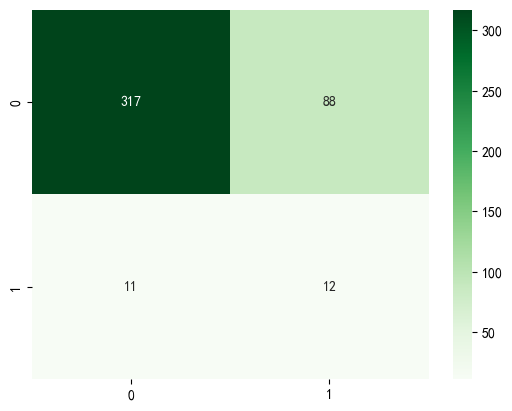

In [16]:
###pca-smote-FCNN
#FCNN前馈神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_smote_encoded = to_categorical(y_train_smote, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_smote)            # 输出原始标签
# print(y_train_smote_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_smote):
        x_train_fold, x_val_fold = x_train_smote[train_index], x_train_smote[val_index]
        y_train_fold, y_val_fold = y_train_smote_encoded[train_index], y_train_smote_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_smote.shape[1:], num_classes)
history = model.fit(x_train_smote, y_train_smote_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s42 = model.predict(X_test_pca)
y_pred_s42_classes = np.argmax(y_pred_s42, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s42_classes)
precision = precision_score(y_test_spring_classes, y_pred_s42_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s42_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s42_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s42_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

2024/05/13 08:54:23 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/13 09:21:40 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7105960249900818, Global best: 0.7105960249900818, Runtime: 1085.45709 seconds
2024/05/13 09:41:09 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.710927152633667, Global best: 0.710927152633667, Runtime: 1169.10250 seconds


Solution: [3.39043294e+01 1.90269928e+01 5.34644886e-04], Fitness: 0.710927152633667
(33.9043294491056, 19.026992808050995, 0.0005346448861389415)
Epoch 1/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6157 - loss: 0.6706 - val_accuracy: 0.0265 - val_loss: 0.8738
Epoch 2/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.5996 - val_accuracy: 0.4735 - val_loss: 0.9047
Epoch 3/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.5518 - val_accuracy: 0.5745 - val_loss: 0.7886
Epoch 4/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6821 - loss: 0.5592 - val_accuracy: 0.5712 - val_loss: 0.8512
Epoch 5/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.5530 - val_accuracy: 0.6209 - val_loss: 0.8042
Epoch 6/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.5504 - val_accuracy: 0.6275 - val_loss: 0.8222
Epoch 7/19
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 0.5522 - val_accurac

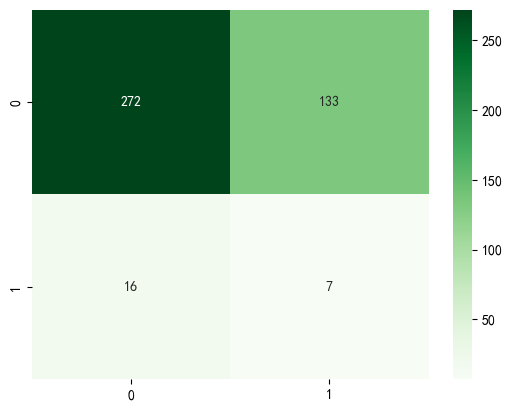

In [16]:
###pca-adasyn-FCNN
#FCNN前馈神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_adasyn_encoded = to_categorical(y_train_adasyn, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_adasyn)            # 输出原始标签
# print(y_train_adasyn_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_adasyn):
        x_train_fold, x_val_fold = x_train_adasyn[train_index], x_train_adasyn[val_index]
        y_train_fold, y_val_fold = y_train_adasyn_encoded[train_index], y_train_adasyn_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_adasyn.shape[1:], num_classes)
history = model.fit(x_train_adasyn, y_train_adasyn_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s43 = model.predict(X_test_pca)
y_pred_s43_classes = np.argmax(y_pred_s43, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s43_classes)
precision = precision_score(y_test_spring_classes, y_pred_s43_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s43_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s43_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s43_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

2024/05/13 02:02:56 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
2024/05/13 02:46:27 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7251178979873657, Global best: 0.7251178979873657, Runtime: 1812.71496 seconds
2024/05/13 03:12:42 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7251178979873657, Global best: 0.7251178979873657, Runtime: 1574.05395 seconds


Solution: [3.28343714e+01 1.92409137e+01 8.97130324e-04], Fitness: 0.7251178979873657
(32.8343714408288, 19.2409137153106, 0.0008971303235687425)
Epoch 1/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7819 - loss: 0.5509 - val_accuracy: 0.0000e+00 - val_loss: 1.2726
Epoch 2/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4220 - val_accuracy: 0.0000e+00 - val_loss: 1.2623
Epoch 3/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.4175 - val_accuracy: 0.0064 - val_loss: 1.2655
Epoch 4/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4221 - val_accuracy: 0.0331 - val_loss: 1.2283
Epoch 5/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4127 - val_accuracy: 0.0758 - val_loss: 1.2195
Epoch 6/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4174 - val_accuracy: 0.0758 - val_loss: 1.2667
Epoch 7/19
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss:

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.95
Precision (macro): 0.47
Recall (macro): 0.50
F1 Score (macro): 0.49


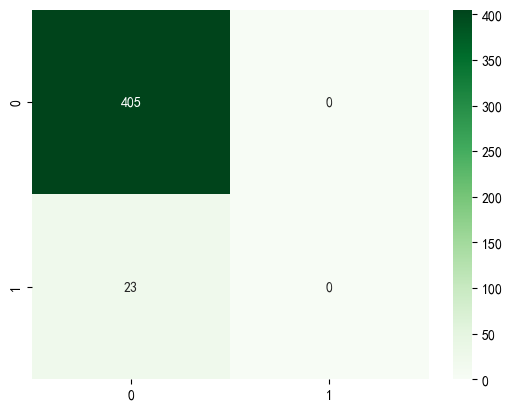

In [16]:
###pca-自然邻域-FCNN
#FCNN全连接神经网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
num_classes = len(set(y_test_spring))
# 使用 to_categorical 进行one-hot编码
y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
# print(y_train_resampled)            # 输出原始标签
# print(y_train_resampled_encoded)    # 输出one-hot编码后的标签

# 定义您的模型创建函数
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

from sklearn.model_selection import KFold

# 确保 create_model 函数在当前作用域内
def FCNN_model(units, learning_rate, input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def cross_val(nest):
    units, epochs, learning_rate = nest
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []

    # 遍历KFold生成的所有训练/验证拆分
    for train_index, val_index in kfold.split(x_train_resampled):
        x_train_fold, x_val_fold = x_train_resampled[train_index], x_train_resampled[val_index]
        y_train_fold, y_val_fold = y_train_resampled_encoded[train_index], y_train_resampled_encoded[val_index]

        # 创建模型实例
        model = FCNN_model(units, learning_rate, x_train_fold.shape[1:], num_classes)
        
        # 训练模型
        model.fit(x_train_fold, y_train_fold,
                  epochs=int(epochs),
                  batch_size=32,
                  validation_data=(x_val_fold, y_val_fold),
                  verbose=0)
        
        # 评估模型性能
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        val_scores.append(val_accuracy)
    
    # 计算平均分数
    mean_val_score = np.mean(val_scores)
    return mean_val_score


# 定义适应度函数
def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val(nest)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model = FCNN_model(units, learning_rate, x_train_resampled.shape[1:], num_classes)
history = model.fit(x_train_resampled, y_train_resampled_encoded, epochs=int(epochs), batch_size=32, validation_split=0.2)

# 执行预测
y_pred_s44 = model.predict(X_test_pca)
y_pred_s44_classes = np.argmax(y_pred_s44, axis=1)  # 获取预测类别
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)  # 获取真实类别

# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s44_classes)
precision = precision_score(y_test_spring_classes, y_pred_s44_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s44_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s44_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s44_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_ros shape: (2974, 2)
y_train_ros shape: (2974,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (2974, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_162 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_486 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6244 - loss: 0.6747 - val_accuracy: 0.1345 - val_loss: 0.8451
Epoch 2/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6656 - loss: 0.5893 - val_accuracy: 0.5395 - val_loss: 0.7867
Epoch 3/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5378 - val_accuracy: 0.6101 - val_loss: 0.8051
Epoch 4/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7235 - loss: 0.5279 - val_accuracy: 0.6571 - val_loss: 0.8250
Epoch 5/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7099 - loss: 0.5346 - val_accuracy: 0.7345 - val_loss: 0.7526
Epoch 6/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7109 - loss: 0.5355 - val_accuracy: 0.7563 - val_loss: 0.7291
Epoch 7/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6965 - loss: 0.5316 - val_accuracy: 0.7395 - val_loss: 0.7448
Epoch 8/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.5425 - val_accuracy: 0.7277 - val_loss

Epoch 52/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5030 - val_accuracy: 0.5697 - val_loss: 0.7560
Epoch 53/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.4899 - val_accuracy: 0.5445 - val_loss: 0.7822
Epoch 54/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5046 - val_accuracy: 0.5563 - val_loss: 0.7836
Epoch 55/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.5085 - val_accuracy: 0.5630 - val_loss: 0.7612
Epoch 56/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.4869 - val_accuracy: 0.5966 - val_loss: 0.7380
Epoch 57/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.4988 - val_accuracy: 0.5597 - val_loss: 0.7489
Epoch 58/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.5070 - val_accuracy: 0.5630 - val_loss: 0.7493
Epoch 59/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.5053 - val_accuracy: 0.5462 - v

2024/05/14 09:34:27 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_163 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_489 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_490 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_491 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6363 - loss: 0.6712 - val_accuracy: 0.1950 - val_loss: 0.8707
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 0.5780 - val_accuracy: 0.5966 - val_loss: 0.7997
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5331 - val_accuracy: 0.6975 - val_loss: 0.7759
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.5337 - val_accuracy: 0.7345 - val_loss: 0.7636
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7155 - loss: 0.5270 - val_accuracy: 0.7580 - val_loss: 0.7319
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7041 - loss: 0.5366 - val_accuracy: 0.7277 - val_loss: 0.7939
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7169 - loss: 0.5255 - val_accuracy: 0.7277 - val_loss: 0.7858
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5181 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_164 (LSTM)                      │ (None, 6)                   │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_492 (Dense)                    │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_493 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_494 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,810 (10.98 KB)

 Trainable params: 2,810 (10.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6153 - loss: 0.6826 - val_accuracy: 0.0000e+00 - val_loss: 0.8628
Epoch 2/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6205 - loss: 0.6459 - val_accuracy: 0.0000e+00 - val_loss: 0.9397
Epoch 3/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6582 - loss: 0.5940 - val_accuracy: 0.4723 - val_loss: 0.7861
Epoch 4/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 0.5556 - val_accuracy: 0.5059 - val_loss: 0.8279
Epoch 5/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.5474 - val_accuracy: 0.6185 - val_loss: 0.7662
Epoch 6/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.5392 - val_accuracy: 0.6639 - val_loss: 0.7406
Epoch 7/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7116 - loss: 0.5315 - val_accuracy: 0.6857 - val_loss: 0.7537
Epoch 8/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 0.5117 - val_accuracy: 0.7429 - 

Epoch 52/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5071 - val_accuracy: 0.7328 - val_loss: 0.7570
Epoch 53/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5090 - val_accuracy: 0.7412 - val_loss: 0.7343
Epoch 54/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.5094 - val_accuracy: 0.7092 - val_loss: 0.7875
Epoch 55/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7147 - loss: 0.5148 - val_accuracy: 0.7647 - val_loss: 0.7151
Epoch 56/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.5143 - val_accuracy: 0.7361 - val_loss: 0.7534
Epoch 57/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.5144 - val_accuracy: 0.7227 - val_loss: 0.7477
Epoch 58/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - loss: 0.5035 - val_accuracy: 0.7445 - val_loss: 0.7345
Epoch 59/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.5208 - val_accuracy: 0.6958 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_165 (LSTM)                      │ (None, 71)                  │          21,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_495 (Dense)                    │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_496 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_497 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,770 (108.48 KB)

 Trainable params: 27,770 (108.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6639 - loss: 0.6788 - val_accuracy: 0.2908 - val_loss: 0.7695
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5912 - val_accuracy: 0.6185 - val_loss: 0.7138
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5483 - val_accuracy: 0.6924 - val_loss: 0.7385
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_166 (LSTM)                      │ (None, 83)                  │          28,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_498 (Dense)                    │ (None, 64)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_499 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_500 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,074 (140.91 KB)

 Trainable params: 36,074 (140.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6059 - loss: 0.6768 - val_accuracy: 0.1966 - val_loss: 0.8287
Epoch 2/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6692 - loss: 0.5811 - val_accuracy: 0.5731 - val_loss: 0.8049
Epoch 3/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5375 - val_accuracy: 0.6924 - val_loss: 0.7400
Epoch 4/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5226 - val_accuracy: 0.7345 - val_loss: 0.7556
Epoch 5/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5264 - val_accuracy: 0.7345 - val_loss: 0.7572
Epoch 6/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7181 - loss: 0.5199 - val_accuracy: 0.7345 - val_loss: 0.7588
Epoch 7/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5241 - val_accuracy: 0.7445 - val_loss: 0.7447
Epoch 8/22
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.5052 - val_accuracy: 0.7176 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_167 (LSTM)                      │ (None, 19)                  │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_501 (Dense)                    │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_502 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_503 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,098 (19.91 KB)

 Trainable params: 5,098 (19.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5785 - loss: 0.6788 - val_accuracy: 0.0000e+00 - val_loss: 0.8559
Epoch 2/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 0.6099 - val_accuracy: 0.3933 - val_loss: 0.8290
Epoch 3/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.5558 - val_accuracy: 0.5849 - val_loss: 0.8112
Epoch 4/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.5326 - val_accuracy: 0.7109 - val_loss: 0.7288
Epoch 5/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7237 - loss: 0.5324 - val_accuracy: 0.7345 - val_loss: 0.7427
Epoch 6/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.5114 - val_accuracy: 0.7580 - val_loss: 0.7030
Epoch 7/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7075 - loss: 0.5329 - val_accuracy: 0.7277 - val_loss: 0.7795
Epoch 8/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.5226 - val_accuracy: 0.7681 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_168 (LSTM)                      │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_504 (Dense)                    │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_505 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_506 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5974 - loss: 0.6809 - val_accuracy: 0.1227 - val_loss: 0.7990
Epoch 2/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.6093 - val_accuracy: 0.4639 - val_loss: 0.8006
Epoch 3/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.5472 - val_accuracy: 0.5681 - val_loss: 0.7925
Epoch 4/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5393 - val_accuracy: 0.6639 - val_loss: 0.7481
Epoch 5/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 0.5216 - val_accuracy: 0.6773 - val_loss: 0.8142
Epoch 6/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.5236 - val_accuracy: 0.6924 - val_loss: 0.7885
Epoch 7/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5315 - val_accuracy: 0.7109 - val_loss: 0.7589
Epoch 8/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7196 - loss: 0.5132 - val_accuracy: 0.7479 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_169 (LSTM)                      │ (None, 14)                  │             952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_507 (Dense)                    │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_508 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_509 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,058 (15.85 KB)

 Trainable params: 4,058 (15.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5970 - loss: 0.6817 - val_accuracy: 0.0992 - val_loss: 0.8058
Epoch 2/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.6200 - val_accuracy: 0.4521 - val_loss: 0.7882
Epoch 3/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6932 - loss: 0.5583 - val_accuracy: 0.5092 - val_loss: 0.8268
Epoch 4/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - loss: 0.5369 - val_accuracy: 0.6521 - val_loss: 0.7562
Epoch 5/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5356 - val_accuracy: 0.7109 - val_loss: 0.7486
Epoch 6/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7376 - loss: 0.5082 - val_accuracy: 0.7445 - val_loss: 0.7263
Epoch 7/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5351 - val_accuracy: 0.7311 - val_loss: 0.7608
Epoch 8/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.5246 - val_accuracy: 0.7160 - val_los

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_170 (LSTM)                      │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_510 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_511 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_512 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6416 - loss: 0.6745 - val_accuracy: 0.1765 - val_loss: 0.8414
Epoch 2/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 0.5862 - val_accuracy: 0.5513 - val_loss: 0.7845
Epoch 3/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5277 - val_accuracy: 0.7412 - val_loss: 0.6835
Epoch 4/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5231 - val_accuracy: 0.7966 - val_loss: 0.6410
Epoch 5/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5266 - val_accuracy: 0.7580 - val_loss: 0.7304
Epoch 6/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5335 - val_accuracy: 0.7311 - val_loss: 0.7885
Epoch 7/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5221 - val_accuracy: 0.7479 - val_loss: 0.7317
Epoch 8/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5237 - val_accuracy: 0.7647 - val_loss

Epoch 52/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.4973 - val_accuracy: 0.6286 - val_loss: 0.7068
Epoch 53/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7308 - loss: 0.5001 - val_accuracy: 0.5059 - val_loss: 0.8212
Epoch 54/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7431 - loss: 0.5067 - val_accuracy: 0.5378 - val_loss: 0.8021
Epoch 55/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.4806 - val_accuracy: 0.5613 - val_loss: 0.7672
Epoch 56/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.5088 - val_accuracy: 0.5983 - val_loss: 0.6939
Epoch 57/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.4932 - val_accuracy: 0.6084 - val_loss: 0.7302
Epoch 58/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.4862 - val_accuracy: 0.5916 - val_loss: 0.7422
Epoch 59/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.4947 - val_accuracy: 0.5261 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_171 (LSTM)                      │ (None, 51)                  │          11,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_513 (Dense)                    │ (None, 64)                  │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_514 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_515 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,490 (64.41 KB)

 Trainable params: 16,490 (64.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6317 - loss: 0.6752 - val_accuracy: 0.1311 - val_loss: 0.8651
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.5919 - val_accuracy: 0.5832 - val_loss: 0.7517
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5448 - val_accuracy: 0.6101 - val_loss: 0.8276
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.5315 - val_accuracy: 0.6857 - val_loss: 0.8140
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5286 - val_accuracy: 0.7345 - val_loss: 0.7798
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7331 - loss: 0.5158 - val_accuracy: 0.7647 - val_loss: 0.7387
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5241 - val_accuracy: 0.7345 - val_loss: 0.7756
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.5345 - val_accuracy: 0.7395 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7321 - loss: 0.4912 - val_accuracy: 0.5445 - val_loss: 0.7927
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7427 - loss: 0.5003 - val_accuracy: 0.5513 - val_loss: 0.7725
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7351 - loss: 0.5069 - val_accuracy: 0.6521 - val_loss: 0.6893
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 0.4929 - val_accuracy: 0.5815 - val_loss: 0.7455
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5006 - val_accuracy: 0.5513 - val_loss: 0.7762
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7249 - loss: 0.5068 - val_accuracy: 0.5395 - val_loss: 0.7837
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7429 - loss: 0.5031 - val_accuracy: 0.5546 - val_loss: 0.7440
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.5028 - val_accuracy: 0.5950 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_172 (LSTM)                      │ (None, 61)                  │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_516 (Dense)                    │ (None, 64)                  │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_517 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_518 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,730 (84.88 KB)

 Trainable params: 21,730 (84.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6327 - loss: 0.6748 - val_accuracy: 0.1311 - val_loss: 0.8623
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 0.5790 - val_accuracy: 0.6790 - val_loss: 0.6736
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5328 - val_accuracy: 0.7395 - val_loss: 0.7151
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7283 - loss: 0.5184 - val_accuracy: 0.7580 - val_loss: 0.7149
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.5174 - val_accuracy: 0.7429 - val_loss: 0.7553
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 0.5336 - val_accuracy: 0.6975 - val_loss: 0.8348
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5183 - val_accuracy: 0.7429 - val_loss: 0.7572
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5278 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_173 (LSTM)                      │ (None, 94)                  │          36,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_519 (Dense)                    │ (None, 64)                  │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_520 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_521 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,698 (174.60 KB)

 Trainable params: 44,698 (174.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6259 - loss: 0.6743 - val_accuracy: 0.1765 - val_loss: 0.8790
Epoch 2/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5729 - val_accuracy: 0.7059 - val_loss: 0.6893
Epoch 3/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5400 - val_accuracy: 0.7378 - val_loss: 0.7365
Epoch 4/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7229 - loss: 0.5283 - val_accuracy: 0.7210 - val_loss: 0.8094
Epoch 5/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5204 - val_accuracy: 0.7277 - val_loss: 0.7776
Epoch 6/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5335 - val_accuracy: 0.7345 - val_loss: 0.7726
Epoch 7/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7191 - loss: 0.5216 - val_accuracy: 0.7496 - val_loss: 0.7250
Epoch 8/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5194 - val_accuracy: 0.7143 - val_loss

Epoch 52/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.5107 - val_accuracy: 0.5529 - val_loss: 0.8247
Epoch 53/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.5151 - val_accuracy: 0.5311 - val_loss: 0.7931
Epoch 54/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5101 - val_accuracy: 0.5294 - val_loss: 0.8205
Epoch 55/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5032 - val_accuracy: 0.5597 - val_loss: 0.7647
Epoch 56/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.4910 - val_accuracy: 0.5227 - val_loss: 0.7843
Epoch 57/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.4885 - val_accuracy: 0.5832 - val_loss: 0.6987
Epoch 58/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4966 - val_accuracy: 0.5630 - val_loss: 0.7086
Epoch 59/96
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.5116 - val_accuracy: 0.5429 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_174 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_522 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_523 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_524 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6486 - loss: 0.6796 - val_accuracy: 0.1311 - val_loss: 0.7878
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: 0.6195 - val_accuracy: 0.4487 - val_loss: 0.8243
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5420 - val_accuracy: 0.6151 - val_loss: 0.7415
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5414 - val_accuracy: 0.6958 - val_loss: 0.7281
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.5415 - val_accuracy: 0.7277 - val_loss: 0.7666
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7126 - loss: 0.5324 - val_accuracy: 0.7378 - val_loss: 0.7575
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.5325 - val_accuracy: 0.7345 - val_loss: 0.7652
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5158 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_175 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_525 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_526 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_527 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6020 - loss: 0.6754 - val_accuracy: 0.1042 - val_loss: 0.8907
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6650 - loss: 0.5906 - val_accuracy: 0.6185 - val_loss: 0.7535
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 0.5400 - val_accuracy: 0.7025 - val_loss: 0.7514
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5167 - val_accuracy: 0.7210 - val_loss: 0.7898
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5359 - val_accuracy: 0.7395 - val_loss: 0.7609
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7283 - loss: 0.5238 - val_accuracy: 0.7429 - val_loss: 0.7400
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7042 - loss: 0.5208 - val_accuracy: 0.7277 - val_loss: 0.7833
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5133 - val_accuracy: 0.7109 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_176 (LSTM)                      │ (None, 4)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_528 (Dense)                    │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_529 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_530 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,578 (10.07 KB)

 Trainable params: 2,578 (10.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6833 - loss: 0.6714 - val_accuracy: 0.1361 - val_loss: 0.8232
Epoch 2/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6719 - loss: 0.5966 - val_accuracy: 0.3395 - val_loss: 0.8637
Epoch 3/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.5467 - val_accuracy: 0.5899 - val_loss: 0.7148
Epoch 4/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.5457 - val_accuracy: 0.6134 - val_loss: 0.7212
Epoch 5/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - loss: 0.5359 - val_accuracy: 0.5882 - val_loss: 0.8025
Epoch 6/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.5351 - val_accuracy: 0.6387 - val_loss: 0.7570
Epoch 7/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.5109 - val_accuracy: 0.6134 - val_loss: 0.8241
Epoch 8/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7145 - loss: 0.5190 - val_accuracy: 0.6118 - val_loss

Epoch 52/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7334 - loss: 0.5017 - val_accuracy: 0.6941 - val_loss: 0.6682
Epoch 53/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5068 - val_accuracy: 0.5882 - val_loss: 0.7318
Epoch 54/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7248 - loss: 0.5021 - val_accuracy: 0.5109 - val_loss: 0.8293
Epoch 55/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.4979 - val_accuracy: 0.6017 - val_loss: 0.7210
Epoch 56/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.5014 - val_accuracy: 0.6353 - val_loss: 0.7110
Epoch 57/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.4999 - val_accuracy: 0.5899 - val_loss: 0.7295
Epoch 58/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.5026 - val_accuracy: 0.5210 - val_loss: 0.8025
Epoch 59/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.4944 - val_accuracy: 0.5261 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_177 (LSTM)                      │ (None, 66)                  │          18,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_531 (Dense)                    │ (None, 64)                  │           4,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_532 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_533 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,650 (96.29 KB)

 Trainable params: 24,650 (96.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6223 - loss: 0.6669 - val_accuracy: 0.1714 - val_loss: 0.8746
Epoch 2/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.5719 - val_accuracy: 0.6790 - val_loss: 0.7777
Epoch 3/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5252 - val_accuracy: 0.7345 - val_loss: 0.7840
Epoch 4/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5268 - val_accuracy: 0.7345 - val_loss: 0.7645
Epoch 5/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.5306 - val_accuracy: 0.7563 - val_loss: 0.7439
Epoch 6/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.5114 - val_accuracy: 0.7311 - val_loss: 0.7679
Epoch 7/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 0.5063 - val_accuracy: 0.7681 - val_loss: 0.7154
Epoch 8/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5234 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_178 (LSTM)                      │ (None, 55)                  │          12,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_534 (Dense)                    │ (None, 64)                  │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_535 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_536 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,490 (72.23 KB)

 Trainable params: 18,490 (72.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6366 - loss: 0.6717 - val_accuracy: 0.1765 - val_loss: 0.8594
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.5872 - val_accuracy: 0.5513 - val_loss: 0.8300
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5305 - val_accuracy: 0.7109 - val_loss: 0.7385
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7162 - loss: 0.5218 - val_accuracy: 0.6924 - val_loss: 0.7831
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.5161 - val_accuracy: 0.7345 - val_loss: 0.7746
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5310 - val_accuracy: 0.7395 - val_loss: 0.7609
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.5251 - val_accuracy: 0.7277 - val_loss: 0.7862
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5242 - val_accuracy: 0.6908 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_179 (LSTM)                      │ (None, 77)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_537 (Dense)                    │ (None, 64)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_538 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_539 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,778 (124.13 KB)

 Trainable params: 31,778 (124.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6572 - loss: 0.6755 - val_accuracy: 0.3311 - val_loss: 0.7748
Epoch 2/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6606 - loss: 0.5907 - val_accuracy: 0.5966 - val_loss: 0.7181
Epoch 3/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5351 - val_accuracy: 0.6941 - val_loss: 0.6843
Epoch 4/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5287 - val_accuracy: 0.7462 - val_loss: 0.7029
Epoch 5/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.5244 - val_accuracy: 0.7429 - val_loss: 0.7276
Epoch 6/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.5141 - val_accuracy: 0.7227 - val_loss: 0.7435
Epoch 7/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.5305 - val_accuracy: 0.7059 - val_loss: 0.7769
Epoch 8/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5146 - val_accuracy: 0.7176 - val_loss

Epoch 52/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.5103 - val_accuracy: 0.5361 - val_loss: 0.7707
Epoch 53/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.4886 - val_accuracy: 0.5563 - val_loss: 0.7617
Epoch 54/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7306 - loss: 0.5107 - val_accuracy: 0.5143 - val_loss: 0.7799
Epoch 55/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7602 - loss: 0.4904 - val_accuracy: 0.5176 - val_loss: 0.8229
Epoch 56/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 0.4943 - val_accuracy: 0.5244 - val_loss: 0.7903
Epoch 57/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.4984 - val_accuracy: 0.5597 - val_loss: 0.7428
Epoch 58/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.4865 - val_accuracy: 0.5513 - val_loss: 0.7647
Epoch 59/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.4931 - val_accuracy: 0.5429 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_180"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_180 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_540 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_541 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_542 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6413 - loss: 0.6833 - val_accuracy: 0.3765 - val_loss: 0.7273
Epoch 2/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.6153 - val_accuracy: 0.5176 - val_loss: 0.7458
Epoch 3/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6964 - loss: 0.5526 - val_accuracy: 0.5513 - val_loss: 0.7778
Epoch 4/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.5396 - val_accuracy: 0.6639 - val_loss: 0.7034
Epoch 5/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.5362 - val_accuracy: 0.7059 - val_loss: 0.7386
Epoch 6/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.5296 - val_accuracy: 0.7345 - val_loss: 0.7382
Epoch 7/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7148 - loss: 0.5266 - val_accuracy: 0.7345 - val_loss: 0.7460
Epoch 8/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7110 - loss: 0.5288 - val_accuracy: 0.7563 - val_loss

Epoch 52/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5138 - val_accuracy: 0.5294 - val_loss: 0.8093
Epoch 53/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7409 - loss: 0.4980 - val_accuracy: 0.5882 - val_loss: 0.6960
Epoch 54/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.4902 - val_accuracy: 0.5782 - val_loss: 0.7113
Epoch 55/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7459 - loss: 0.4932 - val_accuracy: 0.5479 - val_loss: 0.7640
Epoch 56/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.4880 - val_accuracy: 0.5933 - val_loss: 0.7010
Epoch 57/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5129 - val_accuracy: 0.5748 - val_loss: 0.7211
Epoch 58/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.5011 - val_accuracy: 0.6202 - val_loss: 0.6949
Epoch 59/92
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7598 - loss: 0.4813 - val_accuracy: 0.6050 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_181 (LSTM)                      │ (None, 20)                  │           1,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_543 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_544 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_545 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,330 (20.82 KB)

 Trainable params: 5,330 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5813 - loss: 0.6830 - val_accuracy: 0.2319 - val_loss: 0.7631
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6621 - loss: 0.6203 - val_accuracy: 0.4319 - val_loss: 0.8048
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5517 - val_accuracy: 0.5513 - val_loss: 0.7723
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5429 - val_accuracy: 0.5412 - val_loss: 0.8878
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5294 - val_accuracy: 0.6487 - val_loss: 0.8125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_182"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_182 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_546 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_547 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_548 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6216 - loss: 0.6706 - val_accuracy: 0.1714 - val_loss: 0.8572
Epoch 2/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.5700 - val_accuracy: 0.6924 - val_loss: 0.6479
Epoch 3/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5360 - val_accuracy: 0.6857 - val_loss: 0.7615
Epoch 4/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.5241 - val_accuracy: 0.7210 - val_loss: 0.7593
Epoch 5/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5279 - val_accuracy: 0.6857 - val_loss: 0.8185
Epoch 6/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5036 - val_accuracy: 0.7647 - val_loss: 0.7007
Epoch 7/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5213 - val_accuracy: 0.7630 - val_loss: 0.7172
Epoch 8/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5155 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_183 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_549 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_550 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_551 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6000 - loss: 0.6786 - val_accuracy: 0.0706 - val_loss: 0.8449
Epoch 2/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6426 - loss: 0.6053 - val_accuracy: 0.4588 - val_loss: 0.8527
Epoch 3/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5453 - val_accuracy: 0.6639 - val_loss: 0.7609
Epoch 4/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5382 - val_accuracy: 0.6706 - val_loss: 0.8202
Epoch 5/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.5365 - val_accuracy: 0.6790 - val_loss: 0.8366
Epoch 6/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5198 - val_accuracy: 0.6790 - val_loss: 0.8284
Epoch 7/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5327 - val_accuracy: 0.6924 - val_loss: 0.8219
Epoch 8/28
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - loss: 0.5288 - val_accuracy: 0.7261 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_184 (LSTM)                      │ (None, 14)                  │             952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_552 (Dense)                    │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_553 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_554 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,058 (15.85 KB)

 Trainable params: 4,058 (15.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6014 - loss: 0.6779 - val_accuracy: 0.0000e+00 - val_loss: 0.8536
Epoch 2/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.6177 - val_accuracy: 0.3361 - val_loss: 0.8669
Epoch 3/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5541 - val_accuracy: 0.6067 - val_loss: 0.7477
Epoch 4/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.5558 - val_accuracy: 0.6151 - val_loss: 0.8215
Epoch 5/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - loss: 0.5273 - val_accuracy: 0.6975 - val_loss: 0.7798
Epoch 6/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5342 - val_accuracy: 0.6840 - val_loss: 0.8285
Epoch 7/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.5317 - val_accuracy: 0.7109 - val_loss: 0.7721
Epoch 8/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5360 - val_accuracy: 0.6975 - val_

Epoch 52/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.4996 - val_accuracy: 0.5916 - val_loss: 0.7523
Epoch 53/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7265 - loss: 0.4970 - val_accuracy: 0.5815 - val_loss: 0.7651
Epoch 54/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.5093 - val_accuracy: 0.5882 - val_loss: 0.7451
Epoch 55/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7344 - loss: 0.4813 - val_accuracy: 0.5832 - val_loss: 0.7360
Epoch 56/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5050 - val_accuracy: 0.5546 - val_loss: 0.7744
Epoch 57/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5013 - val_accuracy: 0.5076 - val_loss: 0.8411
Epoch 58/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.4826 - val_accuracy: 0.5479 - val_loss: 0.7852
Epoch 59/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5127 - val_accuracy: 0.5563 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_185"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_185 (LSTM)                      │ (None, 98)                  │          39,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_555 (Dense)                    │ (None, 64)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_556 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_557 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,074 (187.79 KB)

 Trainable params: 48,074 (187.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5873 - loss: 0.6765 - val_accuracy: 0.1563 - val_loss: 0.8712
Epoch 2/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 0.5741 - val_accuracy: 0.6420 - val_loss: 0.7549
Epoch 3/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5390 - val_accuracy: 0.7580 - val_loss: 0.6997
Epoch 4/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6984 - loss: 0.5405 - val_accuracy: 0.8000 - val_loss: 0.6756
Epoch 5/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5238 - val_accuracy: 0.7429 - val_loss: 0.7376
Epoch 6/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5390 - val_accuracy: 0.7479 - val_loss: 0.7343
Epoch 7/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5209 - val_accuracy: 0.7345 - val_loss: 0.7605
Epoch 8/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7134 - loss: 0.5168 - val_accuracy: 0.7647 - val_loss

Epoch 52/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5045 - val_accuracy: 0.5933 - val_loss: 0.7229
Epoch 53/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.4986 - val_accuracy: 0.5529 - val_loss: 0.7447
Epoch 54/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7355 - loss: 0.5044 - val_accuracy: 0.6101 - val_loss: 0.7179
Epoch 55/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.5027 - val_accuracy: 0.5866 - val_loss: 0.7141
Epoch 56/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.4771 - val_accuracy: 0.5647 - val_loss: 0.7609
Epoch 57/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.4988 - val_accuracy: 0.5311 - val_loss: 0.8190
Epoch 58/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5198 - val_accuracy: 0.5277 - val_loss: 0.8252
Epoch 59/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7367 - loss: 0.4984 - val_accuracy: 0.5496 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_186 (LSTM)                      │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_558 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_559 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_560 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6110 - loss: 0.6878 - val_accuracy: 0.2706 - val_loss: 0.7271
Epoch 2/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.6613 - val_accuracy: 0.1109 - val_loss: 0.8479
Epoch 3/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.6340 - val_accuracy: 0.2924 - val_loss: 0.9072
Epoch 4/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.6120 - val_accuracy: 0.4689 - val_loss: 0.8585
Epoch 5/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.6088 - val_accuracy: 0.4202 - val_loss: 0.9206
Epoch 6/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7006 - loss: 0.5841 - val_accuracy: 0.3580 - val_loss: 0.9620
Epoch 7/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5773 - val_accuracy: 0.4437 - val_loss: 0.9072
Epoch 8/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.5763 - val_accuracy: 0.5042 - val_loss

Epoch 52/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7079 - loss: 0.5324 - val_accuracy: 0.6639 - val_loss: 0.8859
Epoch 53/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5384 - val_accuracy: 0.7580 - val_loss: 0.6781
Epoch 54/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5161 - val_accuracy: 0.6924 - val_loss: 0.8253
Epoch 55/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.5264 - val_accuracy: 0.6924 - val_loss: 0.8045
Epoch 56/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.5229 - val_accuracy: 0.7429 - val_loss: 0.7107
Epoch 57/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.5358 - val_accuracy: 0.7059 - val_loss: 0.7745
Epoch 58/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.5227 - val_accuracy: 0.7328 - val_loss: 0.7589
Epoch 59/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 0.5351 - val_accuracy: 0.7277 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_187 (LSTM)                      │ (None, 73)                  │          22,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_561 (Dense)                    │ (None, 64)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_562 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_563 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,074 (113.57 KB)

 Trainable params: 29,074 (113.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6500 - loss: 0.6782 - val_accuracy: 0.1899 - val_loss: 0.8100
Epoch 2/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6680 - loss: 0.5955 - val_accuracy: 0.5193 - val_loss: 0.8135
Epoch 3/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5261 - val_accuracy: 0.6790 - val_loss: 0.7446
Epoch 4/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.5343 - val_accuracy: 0.6924 - val_loss: 0.7983
Epoch 5/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7047 - loss: 0.5279 - val_accuracy: 0.6790 - val_loss: 0.8590
Epoch 6/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5077 - val_accuracy: 0.7294 - val_loss: 0.7920
Epoch 7/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.5145 - val_accuracy: 0.7429 - val_loss: 0.7480
Epoch 8/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.5227 - val_accuracy: 0.7261 - val_loss

Epoch 52/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.4918 - val_accuracy: 0.5697 - val_loss: 0.7398
Epoch 53/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.5074 - val_accuracy: 0.5361 - val_loss: 0.8121
Epoch 54/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.4920 - val_accuracy: 0.5630 - val_loss: 0.7356
Epoch 55/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.4923 - val_accuracy: 0.5479 - val_loss: 0.7591
Epoch 56/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.4806 - val_accuracy: 0.5916 - val_loss: 0.7192
Epoch 57/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4952 - val_accuracy: 0.5395 - val_loss: 0.7607
Epoch 58/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.5035 - val_accuracy: 0.5916 - val_loss: 0.7097
Epoch 59/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5067 - val_accuracy: 0.5597 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_188 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_564 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_565 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_566 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6387 - loss: 0.6771 - val_accuracy: 0.1059 - val_loss: 0.8314
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6577 - loss: 0.5994 - val_accuracy: 0.5697 - val_loss: 0.7461
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 0.5454 - val_accuracy: 0.6773 - val_loss: 0.7600
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5362 - val_accuracy: 0.7563 - val_loss: 0.7152
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.5329 - val_accuracy: 0.7277 - val_loss: 0.7956
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5175 - val_accuracy: 0.7714 - val_loss: 0.6814
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7243 - loss: 0.5179 - val_accuracy: 0.7277 - val_loss: 0.7678
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5208 - val_accuracy: 0.6975 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_189 (LSTM)                      │ (None, 62)                  │          16,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_567 (Dense)                    │ (None, 64)                  │           4,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_568 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_569 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,298 (87.10 KB)

 Trainable params: 22,298 (87.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6084 - loss: 0.6767 - val_accuracy: 0.0437 - val_loss: 0.8806
Epoch 2/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6433 - loss: 0.6007 - val_accuracy: 0.5294 - val_loss: 0.8059
Epoch 3/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.5373 - val_accuracy: 0.6924 - val_loss: 0.7206
Epoch 4/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5329 - val_accuracy: 0.7059 - val_loss: 0.7726
Epoch 5/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5233 - val_accuracy: 0.7429 - val_loss: 0.7398
Epoch 6/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.5126 - val_accuracy: 0.7429 - val_loss: 0.7423
Epoch 7/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7091 - loss: 0.5187 - val_accuracy: 0.7395 - val_loss: 0.7478
Epoch 8/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5239 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_190 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_570 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_571 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_572 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6223 - loss: 0.6766 - val_accuracy: 0.0000e+00 - val_loss: 0.8547
Epoch 2/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.6035 - val_accuracy: 0.4941 - val_loss: 0.8706
Epoch 3/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.5431 - val_accuracy: 0.6975 - val_loss: 0.7978
Epoch 4/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss: 0.5090 - val_accuracy: 0.7647 - val_loss: 0.7250
Epoch 5/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.5373 - val_accuracy: 0.7092 - val_loss: 0.8192
Epoch 6/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5342 - val_accuracy: 0.7345 - val_loss: 0.7821
Epoch 7/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.5187 - val_accuracy: 0.7345 - val_loss: 0.7686
Epoch 8/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.5200 - val_accuracy: 0.7311 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_191 (LSTM)                      │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_573 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_574 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_575 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,458 (91.63 KB)

 Trainable params: 23,458 (91.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6255 - loss: 0.6762 - val_accuracy: 0.2017 - val_loss: 0.8305
Epoch 2/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.5820 - val_accuracy: 0.6706 - val_loss: 0.6861
Epoch 3/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 0.5283 - val_accuracy: 0.7143 - val_loss: 0.7394
Epoch 4/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5301 - val_accuracy: 0.7109 - val_loss: 0.7887
Epoch 5/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.5179 - val_accuracy: 0.6924 - val_loss: 0.8555
Epoch 6/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.5361 - val_accuracy: 0.7563 - val_loss: 0.7418
Epoch 7/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.5201 - val_accuracy: 0.6908 - val_loss: 0.8402
Epoch 8/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5106 - val_accuracy: 0.7345 - val_loss

Epoch 52/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7306 - loss: 0.5042 - val_accuracy: 0.5496 - val_loss: 0.7721
Epoch 53/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.5001 - val_accuracy: 0.5832 - val_loss: 0.7153
Epoch 54/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.5119 - val_accuracy: 0.5529 - val_loss: 0.7621
Epoch 55/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.4876 - val_accuracy: 0.5597 - val_loss: 0.7438
Epoch 56/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.4943 - val_accuracy: 0.5429 - val_loss: 0.7410
Epoch 57/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7281 - loss: 0.5090 - val_accuracy: 0.5462 - val_loss: 0.7592
Epoch 58/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.5042 - val_accuracy: 0.5345 - val_loss: 0.7916
Epoch 59/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.5080 - val_accuracy: 0.5563 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_192 (LSTM)                      │ (None, 12)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_576 (Dense)                    │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_577 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_578 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698 (14.45 KB)

 Trainable params: 3,698 (14.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5675 - loss: 0.6828 - val_accuracy: 0.0000e+00 - val_loss: 0.8502
Epoch 2/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.6168 - val_accuracy: 0.4672 - val_loss: 0.7618
Epoch 3/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5716 - val_accuracy: 0.6387 - val_loss: 0.6769
Epoch 4/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7034 - loss: 0.5505 - val_accuracy: 0.6101 - val_loss: 0.8009
Epoch 5/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 0.5261 - val_accuracy: 0.6924 - val_loss: 0.7626
Epoch 6/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.5367 - val_accuracy: 0.6924 - val_loss: 0.8114
Epoch 7/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5296 - val_accuracy: 0.7345 - val_loss: 0.7686
Epoch 8/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.5200 - val_accuracy: 0.7563 - val_

Epoch 52/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7337 - loss: 0.5081 - val_accuracy: 0.5412 - val_loss: 0.8233
Epoch 53/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: 0.4965 - val_accuracy: 0.5580 - val_loss: 0.7790
Epoch 54/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7329 - loss: 0.4975 - val_accuracy: 0.5983 - val_loss: 0.7393
Epoch 55/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7386 - loss: 0.4927 - val_accuracy: 0.5966 - val_loss: 0.7006
Epoch 56/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.4951 - val_accuracy: 0.6151 - val_loss: 0.7204
Epoch 57/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5048 - val_accuracy: 0.5882 - val_loss: 0.7432
Epoch 58/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.5092 - val_accuracy: 0.5311 - val_loss: 0.8331
Epoch 59/71
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4996 - val_accuracy: 0.5244 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_193 (LSTM)                      │ (None, 56)                  │          13,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_579 (Dense)                    │ (None, 64)                  │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_580 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_581 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,010 (74.26 KB)

 Trainable params: 19,010 (74.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6204 - loss: 0.6748 - val_accuracy: 0.1529 - val_loss: 0.8475
Epoch 2/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 0.5807 - val_accuracy: 0.6571 - val_loss: 0.7312
Epoch 3/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7267 - loss: 0.5272 - val_accuracy: 0.7076 - val_loss: 0.7795
Epoch 4/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7178 - loss: 0.5299 - val_accuracy: 0.7345 - val_loss: 0.7720
Epoch 5/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 0.5235 - val_accuracy: 0.7210 - val_loss: 0.7919
Epoch 6/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.5366 - val_accuracy: 0.7345 - val_loss: 0.7607
Epoch 7/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.5232 - val_accuracy: 0.7176 - val_loss: 0.8001
Epoch 8/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7371 - loss: 0.5185 - val_accuracy: 0.7664 - val_loss

Epoch 52/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7343 - loss: 0.5030 - val_accuracy: 0.6807 - val_loss: 0.6718
Epoch 53/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.5141 - val_accuracy: 0.5714 - val_loss: 0.7317
Epoch 54/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7446 - loss: 0.5054 - val_accuracy: 0.5899 - val_loss: 0.7354
Epoch 55/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5010 - val_accuracy: 0.5714 - val_loss: 0.7346
Epoch 56/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7422 - loss: 0.5011 - val_accuracy: 0.5345 - val_loss: 0.7866
Epoch 57/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5119 - val_accuracy: 0.5412 - val_loss: 0.7789
Epoch 58/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7321 - loss: 0.4983 - val_accuracy: 0.5983 - val_loss: 0.7314
Epoch 59/77
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7220 - loss: 0.5052 - val_accuracy: 0.5513 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_194 (LSTM)                      │ (None, 52)                  │          11,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_582 (Dense)                    │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_583 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_584 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,978 (66.32 KB)

 Trainable params: 16,978 (66.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6015 - loss: 0.6808 - val_accuracy: 0.0924 - val_loss: 0.8055
Epoch 2/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.6114 - val_accuracy: 0.4706 - val_loss: 0.8209
Epoch 3/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.5475 - val_accuracy: 0.6924 - val_loss: 0.7174
Epoch 4/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5233 - val_accuracy: 0.7126 - val_loss: 0.7355
Epoch 5/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5237 - val_accuracy: 0.7395 - val_loss: 0.7417
Epoch 6/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5257 - val_accuracy: 0.6975 - val_loss: 0.8177
Epoch 7/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5183 - val_accuracy: 0.7395 - val_loss: 0.7600
Epoch 8/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7237 - loss: 0.5204 - val_accuracy: 0.7042 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_195"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_195 (LSTM)                      │ (None, 61)                  │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_585 (Dense)                    │ (None, 64)                  │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_586 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_587 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,730 (84.88 KB)

 Trainable params: 21,730 (84.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6162 - loss: 0.6758 - val_accuracy: 0.2790 - val_loss: 0.7996
Epoch 2/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6635 - loss: 0.5817 - val_accuracy: 0.5849 - val_loss: 0.7586
Epoch 3/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7069 - loss: 0.5410 - val_accuracy: 0.6639 - val_loss: 0.7596
Epoch 4/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5148 - val_accuracy: 0.7378 - val_loss: 0.7438
Epoch 5/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.5203 - val_accuracy: 0.7395 - val_loss: 0.7596
Epoch 6/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.5291 - val_accuracy: 0.7429 - val_loss: 0.7420
Epoch 7/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.5178 - val_accuracy: 0.7429 - val_loss: 0.7388
Epoch 8/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7195 - loss: 0.5087 - val_accuracy: 0.7681 - val_loss

Epoch 52/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7329 - loss: 0.5039 - val_accuracy: 0.5782 - val_loss: 0.7430
Epoch 53/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.4973 - val_accuracy: 0.5496 - val_loss: 0.8177
Epoch 54/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.5121 - val_accuracy: 0.5311 - val_loss: 0.8126
Epoch 55/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7268 - loss: 0.5042 - val_accuracy: 0.5613 - val_loss: 0.7918
Epoch 56/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7313 - loss: 0.5039 - val_accuracy: 0.5630 - val_loss: 0.7331
Epoch 57/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7364 - loss: 0.4970 - val_accuracy: 0.5479 - val_loss: 0.7870
Epoch 58/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7383 - loss: 0.5126 - val_accuracy: 0.5681 - val_loss: 0.7163
Epoch 59/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7399 - loss: 0.4909 - val_accuracy: 0.5983 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_196 (LSTM)                      │ (None, 80)                  │          26,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_588 (Dense)                    │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_589 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_590 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,890 (132.38 KB)

 Trainable params: 33,890 (132.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6038 - loss: 0.6774 - val_accuracy: 0.2773 - val_loss: 0.7968
Epoch 2/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.5813 - val_accuracy: 0.6336 - val_loss: 0.6953
Epoch 3/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7181 - loss: 0.5351 - val_accuracy: 0.6639 - val_loss: 0.7611
Epoch 4/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7043 - loss: 0.5379 - val_accuracy: 0.7109 - val_loss: 0.7747
Epoch 5/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 0.5236 - val_accuracy: 0.6924 - val_loss: 0.8314
Epoch 6/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5218 - val_accuracy: 0.7059 - val_loss: 0.8207
Epoch 7/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.5224 - val_accuracy: 0.7345 - val_loss: 0.7763
Epoch 8/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7122 - loss: 0.5238 - val_accuracy: 0.6706 - val_loss

Epoch 52/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.5022 - val_accuracy: 0.5563 - val_loss: 0.7699
Epoch 53/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7307 - loss: 0.5037 - val_accuracy: 0.5412 - val_loss: 0.7728
Epoch 54/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7344 - loss: 0.5002 - val_accuracy: 0.5916 - val_loss: 0.7385
Epoch 55/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.5083 - val_accuracy: 0.5983 - val_loss: 0.7250
Epoch 56/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5020 - val_accuracy: 0.5916 - val_loss: 0.7451
Epoch 57/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 0.4885 - val_accuracy: 0.5714 - val_loss: 0.7296
Epoch 58/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7567 - loss: 0.4879 - val_accuracy: 0.5546 - val_loss: 0.7472
Epoch 59/67
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.5049 - val_accuracy: 0.6134 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_197 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_591 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_592 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_593 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6476 - loss: 0.6709 - val_accuracy: 0.2639 - val_loss: 0.8414
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.5682 - val_accuracy: 0.7025 - val_loss: 0.6904
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7232 - loss: 0.5232 - val_accuracy: 0.7311 - val_loss: 0.7679
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5402 - val_accuracy: 0.7563 - val_loss: 0.7334
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.5191 - val_accuracy: 0.7395 - val_loss: 0.7515
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7258 - loss: 0.5238 - val_accuracy: 0.7345 - val_loss: 0.7779
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.5227 - val_accuracy: 0.6773 - val_loss: 0.8407
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.5141 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_198 (LSTM)                      │ (None, 94)                  │          36,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_594 (Dense)                    │ (None, 64)                  │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_595 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_596 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,698 (174.60 KB)

 Trainable params: 44,698 (174.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5967 - loss: 0.6788 - val_accuracy: 0.1966 - val_loss: 0.8170
Epoch 2/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.5925 - val_accuracy: 0.6101 - val_loss: 0.7336
Epoch 3/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.5457 - val_accuracy: 0.7025 - val_loss: 0.7376
Epoch 4/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.5270 - val_accuracy: 0.7345 - val_loss: 0.7629
Epoch 5/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5252 - val_accuracy: 0.6924 - val_loss: 0.8385
Epoch 6/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5275 - val_accuracy: 0.7311 - val_loss: 0.7744
Epoch 7/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5215 - val_accuracy: 0.7277 - val_loss: 0.7667
Epoch 8/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.5214 - val_accuracy: 0.6840 - val_loss

Epoch 52/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7495 - loss: 0.5012 - val_accuracy: 0.5176 - val_loss: 0.8237
Epoch 53/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7229 - loss: 0.5119 - val_accuracy: 0.5731 - val_loss: 0.7418
Epoch 54/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.4884 - val_accuracy: 0.5479 - val_loss: 0.7761
Epoch 55/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.5054 - val_accuracy: 0.5714 - val_loss: 0.7456
Epoch 56/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.4993 - val_accuracy: 0.5429 - val_loss: 0.7617
Epoch 57/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.5066 - val_accuracy: 0.5647 - val_loss: 0.7383
Epoch 58/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7237 - loss: 0.5144 - val_accuracy: 0.5597 - val_loss: 0.7694
Epoch 59/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7369 - loss: 0.4913 - val_accuracy: 0.5630 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_199 (LSTM)                      │ (None, 64)                  │          17,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_597 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_598 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_599 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,458 (91.63 KB)

 Trainable params: 23,458 (91.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5945 - loss: 0.6770 - val_accuracy: 0.1950 - val_loss: 0.8439
Epoch 2/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.5779 - val_accuracy: 0.6319 - val_loss: 0.7172
Epoch 3/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.5284 - val_accuracy: 0.7496 - val_loss: 0.6822
Epoch 4/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5306 - val_accuracy: 0.7395 - val_loss: 0.7399
Epoch 5/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.5312 - val_accuracy: 0.7429 - val_loss: 0.7504
Epoch 6/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5381 - val_accuracy: 0.6773 - val_loss: 0.8555
Epoch 7/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5278 - val_accuracy: 0.7109 - val_loss: 0.7783
Epoch 8/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5309 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_200 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_600 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_601 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_602 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6093 - loss: 0.6810 - val_accuracy: 0.1983 - val_loss: 0.7879
Epoch 2/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.6002 - val_accuracy: 0.5429 - val_loss: 0.7568
Epoch 3/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5366 - val_accuracy: 0.6471 - val_loss: 0.7598
Epoch 4/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.5366 - val_accuracy: 0.6975 - val_loss: 0.7764
Epoch 5/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5305 - val_accuracy: 0.7109 - val_loss: 0.7969
Epoch 6/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5186 - val_accuracy: 0.7345 - val_loss: 0.7774
Epoch 7/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.5329 - val_accuracy: 0.7429 - val_loss: 0.7359
Epoch 8/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5262 - val_accuracy: 0.7613 - val_loss

Epoch 52/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7346 - loss: 0.4991 - val_accuracy: 0.5714 - val_loss: 0.7318
Epoch 53/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.5102 - val_accuracy: 0.5479 - val_loss: 0.7873
Epoch 54/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.4966 - val_accuracy: 0.5849 - val_loss: 0.7289
Epoch 55/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5008 - val_accuracy: 0.5882 - val_loss: 0.7440
Epoch 56/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5019 - val_accuracy: 0.5311 - val_loss: 0.8377
Epoch 57/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.4849 - val_accuracy: 0.5899 - val_loss: 0.6993
Epoch 58/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.4849 - val_accuracy: 0.5378 - val_loss: 0.7901
Epoch 59/62
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.5045 - val_accuracy: 0.5462 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_201 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_603 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_604 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_605 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.6018 - loss: 0.6780 - val_accuracy: 0.0689 - val_loss: 0.8363
Epoch 2/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6591 - loss: 0.6010 - val_accuracy: 0.5462 - val_loss: 0.7539
Epoch 3/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6929 - loss: 0.5473 - val_accuracy: 0.6471 - val_loss: 0.7480
Epoch 4/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7092 - loss: 0.5372 - val_accuracy: 0.6857 - val_loss: 0.7532
Epoch 5/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7058 - loss: 0.5092 - val_accuracy: 0.7647 - val_loss: 0.6843
Epoch 6/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5185 - val_accuracy: 0.7681 - val_loss: 0.6937
Epoch 7/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7029 - loss: 0.5230 - val_accuracy: 0.7277 - val_loss: 0.7907
Epoch 8/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7069 - loss: 0.5138 - val_accuracy: 0.7529 - val_los

Epoch 52/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7205 - loss: 0.5173 - val_accuracy: 0.5345 - val_loss: 0.7666
Epoch 53/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.5074 - val_accuracy: 0.5462 - val_loss: 0.7466
Epoch 54/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.4986 - val_accuracy: 0.5311 - val_loss: 0.7903
Epoch 55/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 0.5071 - val_accuracy: 0.5630 - val_loss: 0.7238
Epoch 56/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.4861 - val_accuracy: 0.5681 - val_loss: 0.7025
Epoch 57/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5117 - val_accuracy: 0.5412 - val_loss: 0.7810
Epoch 58/58
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.4949 - val_accuracy: 0.5244 - val_loss: 0.7835
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_202 (LSTM)                      │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_606 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_607 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_608 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6151 - loss: 0.6711 - val_accuracy: 0.0941 - val_loss: 0.8998
Epoch 2/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.5815 - val_accuracy: 0.6034 - val_loss: 0.7826
Epoch 3/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5354 - val_accuracy: 0.7345 - val_loss: 0.7278
Epoch 4/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5268 - val_accuracy: 0.7277 - val_loss: 0.7835
Epoch 5/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5304 - val_accuracy: 0.7345 - val_loss: 0.7654
Epoch 6/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.5099 - val_accuracy: 0.7563 - val_loss: 0.7426
Epoch 7/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.5254 - val_accuracy: 0.7345 - val_loss: 0.7669
Epoch 8/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.5278 - val_accuracy: 0.7714 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_203 (LSTM)                      │ (None, 57)                  │          13,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_609 (Dense)                    │ (None, 64)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_610 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_611 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,538 (76.32 KB)

 Trainable params: 19,538 (76.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6174 - loss: 0.6733 - val_accuracy: 0.0454 - val_loss: 0.9242
Epoch 2/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 0.5885 - val_accuracy: 0.4857 - val_loss: 0.9245
Epoch 3/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5266 - val_accuracy: 0.7345 - val_loss: 0.7395
Epoch 4/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.5179 - val_accuracy: 0.7580 - val_loss: 0.7120
Epoch 5/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5191 - val_accuracy: 0.7345 - val_loss: 0.7665
Epoch 6/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5145 - val_accuracy: 0.7580 - val_loss: 0.7362
Epoch 7/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.5441 - val_accuracy: 0.7345 - val_loss: 0.7756
Epoch 8/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5279 - val_accuracy: 0.7277 - val_loss

Epoch 52/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.5004 - val_accuracy: 0.6084 - val_loss: 0.7274
Epoch 53/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5071 - val_accuracy: 0.5815 - val_loss: 0.7533
Epoch 54/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.5106 - val_accuracy: 0.5849 - val_loss: 0.7551
Epoch 55/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7287 - loss: 0.5141 - val_accuracy: 0.6101 - val_loss: 0.7428
Epoch 56/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5028 - val_accuracy: 0.6050 - val_loss: 0.7354
Epoch 57/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7531 - loss: 0.4922 - val_accuracy: 0.5798 - val_loss: 0.7172
Epoch 58/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.4945 - val_accuracy: 0.6000 - val_loss: 0.7258
Epoch 59/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5070 - val_accuracy: 0.6101 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_204"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_204 (LSTM)                      │ (None, 78)                  │          25,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_612 (Dense)                    │ (None, 64)                  │           5,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_613 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_614 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,474 (126.85 KB)

 Trainable params: 32,474 (126.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6157 - loss: 0.6698 - val_accuracy: 0.2134 - val_loss: 0.8850
Epoch 2/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6683 - loss: 0.5749 - val_accuracy: 0.7681 - val_loss: 0.6772
Epoch 3/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.5233 - val_accuracy: 0.7395 - val_loss: 0.7534
Epoch 4/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5218 - val_accuracy: 0.7395 - val_loss: 0.7617
Epoch 5/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5274 - val_accuracy: 0.7311 - val_loss: 0.7755
Epoch 6/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.5041 - val_accuracy: 0.7647 - val_loss: 0.7187
Epoch 7/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.5218 - val_accuracy: 0.7479 - val_loss: 0.7444
Epoch 8/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.5186 - val_accuracy: 0.7042 - val_loss

Epoch 52/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.5067 - val_accuracy: 0.5395 - val_loss: 0.7440
Epoch 53/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5006 - val_accuracy: 0.6034 - val_loss: 0.7305
Epoch 54/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.5061 - val_accuracy: 0.5782 - val_loss: 0.7405
Epoch 55/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7418 - loss: 0.4974 - val_accuracy: 0.5513 - val_loss: 0.7779
Epoch 56/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.4974 - val_accuracy: 0.5866 - val_loss: 0.7334
Epoch 57/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7290 - loss: 0.4967 - val_accuracy: 0.6118 - val_loss: 0.6959
Epoch 58/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.5036 - val_accuracy: 0.5647 - val_loss: 0.7509
Epoch 59/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.4980 - val_accuracy: 0.5529 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_205 (LSTM)                      │ (None, 3)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_615 (Dense)                    │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_616 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_617 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,474 (9.66 KB)

 Trainable params: 2,474 (9.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6152 - loss: 0.6832 - val_accuracy: 0.0000e+00 - val_loss: 0.8317
Epoch 2/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - loss: 0.6362 - val_accuracy: 0.1126 - val_loss: 0.8606
Epoch 3/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6417 - loss: 0.6045 - val_accuracy: 0.3193 - val_loss: 0.8699
Epoch 4/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.5574 - val_accuracy: 0.5244 - val_loss: 0.7351
Epoch 5/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - loss: 0.5355 - val_accuracy: 0.4992 - val_loss: 0.8116
Epoch 6/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.5400 - val_accuracy: 0.6370 - val_loss: 0.7188
Epoch 7/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.5429 - val_accuracy: 0.5630 - val_loss: 0.8335
Epoch 8/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5294 - val_accuracy: 0.6437 - val_

Epoch 52/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7214 - loss: 0.5040 - val_accuracy: 0.7210 - val_loss: 0.7664
Epoch 53/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - loss: 0.5160 - val_accuracy: 0.7496 - val_loss: 0.7010
Epoch 54/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7102 - loss: 0.5129 - val_accuracy: 0.7210 - val_loss: 0.7727
Epoch 55/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.5115 - val_accuracy: 0.6924 - val_loss: 0.7866
Epoch 56/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7074 - loss: 0.5122 - val_accuracy: 0.7529 - val_loss: 0.7093
Epoch 57/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5156 - val_accuracy: 0.7361 - val_loss: 0.7245
Epoch 58/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7162 - loss: 0.5136 - val_accuracy: 0.7244 - val_loss: 0.7643
Epoch 59/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7241 - loss: 0.5097 - val_accuracy: 0.7445 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_206"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_206 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_618 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_619 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_620 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6691 - loss: 0.6717 - val_accuracy: 0.1765 - val_loss: 0.8504
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6681 - loss: 0.5800 - val_accuracy: 0.6521 - val_loss: 0.7024
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7149 - loss: 0.5379 - val_accuracy: 0.6420 - val_loss: 0.8133
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5311 - val_accuracy: 0.7345 - val_loss: 0.7505
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5289 - val_accuracy: 0.6908 - val_loss: 0.8243
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5142 - val_accuracy: 0.7445 - val_loss: 0.7481
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5060 - val_accuracy: 0.7647 - val_loss: 0.7050
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.5309 - val_accuracy: 0.7176 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_207"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_207 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_621 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_622 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_623 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6227 - loss: 0.6797 - val_accuracy: 0.2924 - val_loss: 0.7580
Epoch 2/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.6017 - val_accuracy: 0.5882 - val_loss: 0.6869
Epoch 3/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.5499 - val_accuracy: 0.6622 - val_loss: 0.6468
Epoch 4/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5342 - val_accuracy: 0.6487 - val_loss: 0.7672
Epoch 5/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 0.5272 - val_accuracy: 0.7277 - val_loss: 0.7296
Epoch 6/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5215 - val_accuracy: 0.6773 - val_loss: 0.8183
Epoch 7/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.5288 - val_accuracy: 0.6454 - val_loss: 0.8805
Epoch 8/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5213 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_208 (LSTM)                      │ (None, 17)                  │           1,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_624 (Dense)                    │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_625 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_626 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,658 (18.20 KB)

 Trainable params: 4,658 (18.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6330 - loss: 0.6693 - val_accuracy: 0.0790 - val_loss: 0.9041
Epoch 2/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6573 - loss: 0.5869 - val_accuracy: 0.5630 - val_loss: 0.7800
Epoch 3/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7057 - loss: 0.5276 - val_accuracy: 0.7277 - val_loss: 0.7169
Epoch 4/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.5104 - val_accuracy: 0.7697 - val_loss: 0.6756
Epoch 5/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7051 - loss: 0.5333 - val_accuracy: 0.7580 - val_loss: 0.7320
Epoch 6/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.5232 - val_accuracy: 0.7109 - val_loss: 0.7946
Epoch 7/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7246 - loss: 0.5266 - val_accuracy: 0.7395 - val_loss: 0.7539
Epoch 8/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5296 - val_accuracy: 0.7580 - val_loss

Epoch 52/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5171 - val_accuracy: 0.6790 - val_loss: 0.6698
Epoch 53/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.5044 - val_accuracy: 0.5866 - val_loss: 0.7610
Epoch 54/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7189 - loss: 0.5101 - val_accuracy: 0.5966 - val_loss: 0.7486
Epoch 55/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7330 - loss: 0.5084 - val_accuracy: 0.5782 - val_loss: 0.7501
Epoch 56/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5066 - val_accuracy: 0.6168 - val_loss: 0.7212
Epoch 57/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.4912 - val_accuracy: 0.5563 - val_loss: 0.7460
Epoch 58/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7504 - loss: 0.4867 - val_accuracy: 0.5613 - val_loss: 0.7474
Epoch 59/93
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7407 - loss: 0.4961 - val_accuracy: 0.6000 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_209"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_209 (LSTM)                      │ (None, 85)                  │          29,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_627 (Dense)                    │ (None, 64)                  │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_628 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_629 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,570 (146.76 KB)

 Trainable params: 37,570 (146.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6207 - loss: 0.6769 - val_accuracy: 0.1160 - val_loss: 0.8856
Epoch 2/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5836 - val_accuracy: 0.6235 - val_loss: 0.7679
Epoch 3/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5270 - val_accuracy: 0.7580 - val_loss: 0.6762
Epoch 4/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 0.5302 - val_accuracy: 0.6975 - val_loss: 0.8226
Epoch 5/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7148 - loss: 0.5245 - val_accuracy: 0.7345 - val_loss: 0.7644
Epoch 6/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7042 - loss: 0.5213 - val_accuracy: 0.7395 - val_loss: 0.7585
Epoch 7/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.5235 - val_accuracy: 0.7345 - val_loss: 0.7598
Epoch 8/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5273 - val_accuracy: 0.7311 - val_loss

Epoch 52/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5116 - val_accuracy: 0.5294 - val_loss: 0.8015
Epoch 53/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5010 - val_accuracy: 0.5815 - val_loss: 0.7539
Epoch 54/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5012 - val_accuracy: 0.5244 - val_loss: 0.7975
Epoch 55/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5037 - val_accuracy: 0.5697 - val_loss: 0.7508
Epoch 56/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.5017 - val_accuracy: 0.5412 - val_loss: 0.7787
Epoch 57/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7515 - loss: 0.4941 - val_accuracy: 0.5950 - val_loss: 0.7345
Epoch 58/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7277 - loss: 0.5017 - val_accuracy: 0.5630 - val_loss: 0.7602
Epoch 59/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7405 - loss: 0.5001 - val_accuracy: 0.5613 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_210"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_210 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_630 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_631 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_632 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6355 - loss: 0.6757 - val_accuracy: 0.3361 - val_loss: 0.7710
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6884 - loss: 0.5864 - val_accuracy: 0.5866 - val_loss: 0.7523
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.5415 - val_accuracy: 0.6790 - val_loss: 0.7399
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5208 - val_accuracy: 0.7580 - val_loss: 0.7122
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5265 - val_accuracy: 0.7429 - val_loss: 0.7314
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.5243 - val_accuracy: 0.7395 - val_loss: 0.7610
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.5027 - val_accuracy: 0.7681 - val_loss: 0.7049
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.5310 - val_accuracy: 0.7395 - val_loss

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7296 - loss: 0.5026 - val_accuracy: 0.5832 - val_loss: 0.7001
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7249 - loss: 0.5105 - val_accuracy: 0.5445 - val_loss: 0.7435
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.5014 - val_accuracy: 0.5563 - val_loss: 0.7249
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.4960 - val_accuracy: 0.5714 - val_loss: 0.7271
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_211"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_211 (LSTM)                      │ (None, 72)                  │          21,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_633 (Dense)                    │ (None, 64)                  │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_634 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_635 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,418 (111.01 KB)

 Trainable params: 28,418 (111.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6266 - loss: 0.6665 - val_accuracy: 0.2336 - val_loss: 0.8934
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.5610 - val_accuracy: 0.6924 - val_loss: 0.7352
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.5308 - val_accuracy: 0.7210 - val_loss: 0.7870
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.5440 - val_accuracy: 0.7227 - val_loss: 0.8072
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5209 - val_accuracy: 0.7866 - val_loss: 0.6777
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5206 - val_accuracy: 0.7345 - val_loss: 0.7565
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5138 - val_accuracy: 0.7311 - val_loss: 0.7703
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.5333 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_212"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_212 (LSTM)                      │ (None, 61)                  │          15,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_636 (Dense)                    │ (None, 64)                  │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_637 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_638 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,730 (84.88 KB)

 Trainable params: 21,730 (84.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6012 - loss: 0.6730 - val_accuracy: 0.0857 - val_loss: 0.8822
Epoch 2/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.5968 - val_accuracy: 0.5815 - val_loss: 0.8064
Epoch 3/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.5204 - val_accuracy: 0.6975 - val_loss: 0.7720
Epoch 4/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.5248 - val_accuracy: 0.7345 - val_loss: 0.7607
Epoch 5/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.5104 - val_accuracy: 0.7563 - val_loss: 0.7465
Epoch 6/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.5230 - val_accuracy: 0.7647 - val_loss: 0.6998
Epoch 7/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.5229 - val_accuracy: 0.7311 - val_loss: 0.7871
Epoch 8/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7137 - loss: 0.5290 - val_accuracy: 0.6975 - val_loss

Epoch 52/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.4994 - val_accuracy: 0.6168 - val_loss: 0.6970
Epoch 53/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.4884 - val_accuracy: 0.5597 - val_loss: 0.7462
Epoch 54/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.4936 - val_accuracy: 0.6050 - val_loss: 0.7179
Epoch 55/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.4997 - val_accuracy: 0.5647 - val_loss: 0.7559
Epoch 56/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.5086 - val_accuracy: 0.5849 - val_loss: 0.7436
Epoch 57/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.4994 - val_accuracy: 0.5613 - val_loss: 0.7840
Epoch 58/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.4997 - val_accuracy: 0.5899 - val_loss: 0.7213
Epoch 59/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5000 - val_accuracy: 0.5563 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_213"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_213 (LSTM)                      │ (None, 58)                  │          14,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_639 (Dense)                    │ (None, 64)                  │           3,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_640 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_641 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,074 (78.41 KB)

 Trainable params: 20,074 (78.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6356 - loss: 0.6722 - val_accuracy: 0.1227 - val_loss: 0.9156
Epoch 2/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6711 - loss: 0.5736 - val_accuracy: 0.5748 - val_loss: 0.8159
Epoch 3/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.5302 - val_accuracy: 0.6655 - val_loss: 0.8089
Epoch 4/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.5355 - val_accuracy: 0.6924 - val_loss: 0.7980
Epoch 5/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5312 - val_accuracy: 0.7277 - val_loss: 0.7901
Epoch 6/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5195 - val_accuracy: 0.7345 - val_loss: 0.7618
Epoch 7/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.5123 - val_accuracy: 0.7714 - val_loss: 0.6904
Epoch 8/26
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5310 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_214 (LSTM)                      │ (None, 77)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_642 (Dense)                    │ (None, 64)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_643 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_644 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,778 (124.13 KB)

 Trainable params: 31,778 (124.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6756 - loss: 0.6735 - val_accuracy: 0.2185 - val_loss: 0.8710
Epoch 2/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.5762 - val_accuracy: 0.6588 - val_loss: 0.7446
Epoch 3/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5384 - val_accuracy: 0.7378 - val_loss: 0.7276
Epoch 4/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 0.5420 - val_accuracy: 0.7647 - val_loss: 0.7131
Epoch 5/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5302 - val_accuracy: 0.7580 - val_loss: 0.7379
Epoch 6/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5131 - val_accuracy: 0.7345 - val_loss: 0.7721
Epoch 7/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.5249 - val_accuracy: 0.7395 - val_loss: 0.7598
Epoch 8/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5304 - val_accuracy: 0.7479 - val_loss

Epoch 52/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.5005 - val_accuracy: 0.5815 - val_loss: 0.7503
Epoch 53/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.5032 - val_accuracy: 0.5597 - val_loss: 0.7678
Epoch 54/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.5139 - val_accuracy: 0.5782 - val_loss: 0.7459
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_215"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_215 (LSTM)                      │ (None, 56)                  │          13,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_645 (Dense)                    │ (None, 64)                  │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_646 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_647 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,010 (74.26 KB)

 Trainable params: 19,010 (74.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5857 - loss: 0.6801 - val_accuracy: 0.0504 - val_loss: 0.8449
Epoch 2/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.6036 - val_accuracy: 0.4941 - val_loss: 0.8189
Epoch 3/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5330 - val_accuracy: 0.6924 - val_loss: 0.7261
Epoch 4/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7175 - loss: 0.5259 - val_accuracy: 0.7395 - val_loss: 0.7373
Epoch 5/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5366 - val_accuracy: 0.7143 - val_loss: 0.7867
Epoch 6/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5109 - val_accuracy: 0.7429 - val_loss: 0.7348
Epoch 7/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.5228 - val_accuracy: 0.7277 - val_loss: 0.7837
Epoch 8/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.5084 - val_accuracy: 0.7613 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_216 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_648 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_649 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_650 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6466 - loss: 0.6775 - val_accuracy: 0.2655 - val_loss: 0.7877
Epoch 2/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.6005 - val_accuracy: 0.5008 - val_loss: 0.7824
Epoch 3/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5486 - val_accuracy: 0.6336 - val_loss: 0.7118
Epoch 4/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5285 - val_accuracy: 0.6319 - val_loss: 0.8000
Epoch 5/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 0.5220 - val_accuracy: 0.7025 - val_loss: 0.7546
Epoch 6/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7074 - loss: 0.5352 - val_accuracy: 0.6639 - val_loss: 0.8293
Epoch 7/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 0.5060 - val_accuracy: 0.7109 - val_loss: 0.7755
Epoch 8/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5179 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_217"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_217 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_651 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_652 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_653 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5973 - loss: 0.6802 - val_accuracy: 0.0454 - val_loss: 0.8232
Epoch 2/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6507 - loss: 0.6108 - val_accuracy: 0.4941 - val_loss: 0.7834
Epoch 3/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.5419 - val_accuracy: 0.6185 - val_loss: 0.7594
Epoch 4/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5264 - val_accuracy: 0.7277 - val_loss: 0.7096
Epoch 5/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.5201 - val_accuracy: 0.6924 - val_loss: 0.7869
Epoch 6/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5189 - val_accuracy: 0.7008 - val_loss: 0.8101
Epoch 7/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.5248 - val_accuracy: 0.7395 - val_loss: 0.7358
Epoch 8/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.5372 - val_accuracy: 0.6992 - val_loss

Epoch 52/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5116 - val_accuracy: 0.6034 - val_loss: 0.7029
Epoch 53/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.4785 - val_accuracy: 0.5899 - val_loss: 0.7193
Epoch 54/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.5050 - val_accuracy: 0.5210 - val_loss: 0.8166
Epoch 55/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.4841 - val_accuracy: 0.5529 - val_loss: 0.7429
Epoch 56/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.4962 - val_accuracy: 0.5395 - val_loss: 0.7676
Epoch 57/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.4853 - val_accuracy: 0.5395 - val_loss: 0.7598
Epoch 58/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5096 - val_accuracy: 0.5580 - val_loss: 0.7456
Epoch 59/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5013 - val_accuracy: 0.5395 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_218"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_218 (LSTM)                      │ (None, 84)                  │          29,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_654 (Dense)                    │ (None, 64)                  │           5,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_655 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_656 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,818 (143.82 KB)

 Trainable params: 36,818 (143.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6658 - loss: 0.6750 - val_accuracy: 0.2807 - val_loss: 0.8044
Epoch 2/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.5755 - val_accuracy: 0.6151 - val_loss: 0.7300
Epoch 3/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5344 - val_accuracy: 0.6857 - val_loss: 0.7395
Epoch 4/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5151 - val_accuracy: 0.6924 - val_loss: 0.7942
Epoch 5/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.5367 - val_accuracy: 0.7395 - val_loss: 0.7351
Epoch 6/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.5385 - val_accuracy: 0.7277 - val_loss: 0.7741
Epoch 7/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.5291 - val_accuracy: 0.7445 - val_loss: 0.7407
Epoch 8/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 0.5273 - val_accuracy: 0.6824 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_219"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_219 (LSTM)                      │ (None, 88)                  │          32,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_657 (Dense)                    │ (None, 64)                  │           5,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_658 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_659 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,874 (155.76 KB)

 Trainable params: 39,874 (155.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6631 - loss: 0.6746 - val_accuracy: 0.2555 - val_loss: 0.8337
Epoch 2/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5755 - val_accuracy: 0.6319 - val_loss: 0.7414
Epoch 3/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.5326 - val_accuracy: 0.6420 - val_loss: 0.8448
Epoch 4/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.5375 - val_accuracy: 0.7277 - val_loss: 0.8080
Epoch 5/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.5250 - val_accuracy: 0.7479 - val_loss: 0.7364
Epoch 6/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5207 - val_accuracy: 0.7059 - val_loss: 0.7840
Epoch 7/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.5150 - val_accuracy: 0.7714 - val_loss: 0.7073
Epoch 8/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7150 - loss: 0.5200 - val_accuracy: 0.7109 - val_loss

Epoch 52/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7502 - loss: 0.4907 - val_accuracy: 0.5681 - val_loss: 0.7265
Epoch 53/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.5127 - val_accuracy: 0.5882 - val_loss: 0.7328
Epoch 54/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7411 - loss: 0.4963 - val_accuracy: 0.5916 - val_loss: 0.6893
Epoch 55/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 0.5023 - val_accuracy: 0.5210 - val_loss: 0.8157
Epoch 56/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5079 - val_accuracy: 0.5378 - val_loss: 0.7764
Epoch 57/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.5064 - val_accuracy: 0.5277 - val_loss: 0.8211
Epoch 58/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.5023 - val_accuracy: 0.5227 - val_loss: 0.7859
Epoch 59/94
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5012 - val_accuracy: 0.5563 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_220"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_220 (LSTM)                      │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_660 (Dense)                    │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_661 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_662 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,010 (62.54 KB)

 Trainable params: 16,010 (62.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6222 - loss: 0.6782 - val_accuracy: 0.1160 - val_loss: 0.8423
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.6006 - val_accuracy: 0.5966 - val_loss: 0.7293
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 0.5348 - val_accuracy: 0.6151 - val_loss: 0.8176
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5219 - val_accuracy: 0.7395 - val_loss: 0.7388
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7088 - loss: 0.5300 - val_accuracy: 0.7345 - val_loss: 0.7575
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7083 - loss: 0.5310 - val_accuracy: 0.7277 - val_loss: 0.7829
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5237 - val_accuracy: 0.7445 - val_loss: 0.7512
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.5212 - val_accuracy: 0.7210 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_221"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_221 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_663 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_664 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_665 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6269 - loss: 0.6715 - val_accuracy: 0.0000e+00 - val_loss: 0.9226
Epoch 2/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.5859 - val_accuracy: 0.5966 - val_loss: 0.8052
Epoch 3/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5294 - val_accuracy: 0.7277 - val_loss: 0.7647
Epoch 4/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.5284 - val_accuracy: 0.7429 - val_loss: 0.7274
Epoch 5/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5229 - val_accuracy: 0.7345 - val_loss: 0.7701
Epoch 6/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.5313 - val_accuracy: 0.7176 - val_loss: 0.8123
Epoch 7/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.5188 - val_accuracy: 0.7664 - val_loss: 0.7104
Epoch 8/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6939 - loss: 0.5306 - val_accuracy: 0.7647 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_222"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_222 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_666 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_667 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_668 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6233 - loss: 0.6762 - val_accuracy: 0.2084 - val_loss: 0.8067
Epoch 2/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.5995 - val_accuracy: 0.5580 - val_loss: 0.7235
Epoch 3/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5470 - val_accuracy: 0.6487 - val_loss: 0.7233
Epoch 4/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5244 - val_accuracy: 0.6521 - val_loss: 0.7988
Epoch 5/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 0.5350 - val_accuracy: 0.6924 - val_loss: 0.7806
Epoch 6/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.5244 - val_accuracy: 0.7008 - val_loss: 0.7829
Epoch 7/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 0.5220 - val_accuracy: 0.6992 - val_loss: 0.8106
Epoch 8/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.5239 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_223"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_223 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_669 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_670 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_671 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6059 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.8259
Epoch 2/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 0.6159 - val_accuracy: 0.3933 - val_loss: 0.9213
Epoch 3/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 0.5411 - val_accuracy: 0.7395 - val_loss: 0.7031
Epoch 4/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5374 - val_accuracy: 0.7429 - val_loss: 0.7386
Epoch 5/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5270 - val_accuracy: 0.7345 - val_loss: 0.7800
Epoch 6/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5394 - val_accuracy: 0.6387 - val_loss: 0.8960
Epoch 7/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5278 - val_accuracy: 0.7311 - val_loss: 0.7855
Epoch 8/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5343 - val_accuracy: 0.6857 - val_

Epoch 52/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 0.5039 - val_accuracy: 0.5714 - val_loss: 0.7623
Epoch 53/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5134 - val_accuracy: 0.5664 - val_loss: 0.7727
Epoch 54/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.4993 - val_accuracy: 0.5613 - val_loss: 0.7735
Epoch 55/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7283 - loss: 0.5222 - val_accuracy: 0.5378 - val_loss: 0.8102
Epoch 56/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.5089 - val_accuracy: 0.6034 - val_loss: 0.7001
Epoch 57/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7310 - loss: 0.5003 - val_accuracy: 0.5479 - val_loss: 0.7834
Epoch 58/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.5267 - val_accuracy: 0.5311 - val_loss: 0.8085
Epoch 59/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.5038 - val_accuracy: 0.5361 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_224 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_672 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_673 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_674 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6360 - loss: 0.6716 - val_accuracy: 0.1328 - val_loss: 0.8670
Epoch 2/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 0.5916 - val_accuracy: 0.5697 - val_loss: 0.7593
Epoch 3/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6992 - loss: 0.5373 - val_accuracy: 0.6924 - val_loss: 0.7131
Epoch 4/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5287 - val_accuracy: 0.6924 - val_loss: 0.7698
Epoch 5/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7083 - loss: 0.5282 - val_accuracy: 0.7345 - val_loss: 0.7541
Epoch 6/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.5209 - val_accuracy: 0.7277 - val_loss: 0.7659
Epoch 7/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.5224 - val_accuracy: 0.7345 - val_loss: 0.7527
Epoch 8/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5120 - val_accuracy: 0.7395 - val_loss

Epoch 52/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7380 - loss: 0.4904 - val_accuracy: 0.5076 - val_loss: 0.8399
Epoch 53/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7262 - loss: 0.5033 - val_accuracy: 0.4824 - val_loss: 0.8593
Epoch 54/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: 0.5070 - val_accuracy: 0.5311 - val_loss: 0.8144
Epoch 55/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.4976 - val_accuracy: 0.5664 - val_loss: 0.7413
Epoch 56/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.5163 - val_accuracy: 0.6000 - val_loss: 0.7082
Epoch 57/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.4947 - val_accuracy: 0.5529 - val_loss: 0.7633
Epoch 58/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7375 - loss: 0.4865 - val_accuracy: 0.5664 - val_loss: 0.7349
Epoch 59/90
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.4859 - val_accuracy: 0.5681 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_225"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_225 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_675 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_676 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_677 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6691 - loss: 0.6756 - val_accuracy: 0.2437 - val_loss: 0.8005
Epoch 2/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.5975 - val_accuracy: 0.4639 - val_loss: 0.8431
Epoch 3/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 0.5504 - val_accuracy: 0.6639 - val_loss: 0.7360
Epoch 4/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7115 - loss: 0.5280 - val_accuracy: 0.7025 - val_loss: 0.7596
Epoch 5/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5175 - val_accuracy: 0.6992 - val_loss: 0.8024
Epoch 6/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.5405 - val_accuracy: 0.6824 - val_loss: 0.8347
Epoch 7/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7120 - loss: 0.5201 - val_accuracy: 0.7714 - val_loss: 0.7013
Epoch 8/44
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.5248 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_226"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_226 (LSTM)                      │ (None, 63)                  │          16,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_678 (Dense)                    │ (None, 64)                  │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_679 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_680 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,874 (89.35 KB)

 Trainable params: 22,874 (89.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6376 - loss: 0.6821 - val_accuracy: 0.2689 - val_loss: 0.7613
Epoch 2/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6131 - val_accuracy: 0.5143 - val_loss: 0.7605
Epoch 3/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.5440 - val_accuracy: 0.6235 - val_loss: 0.7077
Epoch 4/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5238 - val_accuracy: 0.6773 - val_loss: 0.7510
Epoch 5/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5278 - val_accuracy: 0.6857 - val_loss: 0.8037
Epoch 6/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5165 - val_accuracy: 0.7328 - val_loss: 0.7499
Epoch 7/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5188 - val_accuracy: 0.6924 - val_loss: 0.8083
Epoch 8/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5236 - val_accuracy: 0.7277 - val_loss

Epoch 52/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5194 - val_accuracy: 0.5412 - val_loss: 0.7740
Epoch 53/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.5021 - val_accuracy: 0.6521 - val_loss: 0.7096
Epoch 54/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.5032 - val_accuracy: 0.5815 - val_loss: 0.7154
Epoch 55/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5014 - val_accuracy: 0.5412 - val_loss: 0.7342
Epoch 56/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5019 - val_accuracy: 0.5513 - val_loss: 0.7710
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_227"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_227 (LSTM)                      │ (None, 5)                   │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_681 (Dense)                    │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_682 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_683 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,690 (10.51 KB)

 Trainable params: 2,690 (10.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6237 - loss: 0.6766 - val_accuracy: 0.0000e+00 - val_loss: 0.8935
Epoch 2/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.6189 - val_accuracy: 0.2992 - val_loss: 0.8481
Epoch 3/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.5619 - val_accuracy: 0.6571 - val_loss: 0.6977
Epoch 4/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.5320 - val_accuracy: 0.6958 - val_loss: 0.7122
Epoch 5/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5253 - val_accuracy: 0.6706 - val_loss: 0.7863
Epoch 6/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.5263 - val_accuracy: 0.7395 - val_loss: 0.7421
Epoch 7/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5301 - val_accuracy: 0.7345 - val_loss: 0.7563
Epoch 8/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 0.5327 - val_accuracy: 0.7613 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_228"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_228 (LSTM)                      │ (None, 27)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_684 (Dense)                    │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_685 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_686 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,178 (28.04 KB)

 Trainable params: 7,178 (28.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5976 - loss: 0.6786 - val_accuracy: 0.0269 - val_loss: 0.8448
Epoch 2/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 0.6049 - val_accuracy: 0.3832 - val_loss: 0.9059
Epoch 3/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5440 - val_accuracy: 0.6303 - val_loss: 0.7571
Epoch 4/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5375 - val_accuracy: 0.6588 - val_loss: 0.8030
Epoch 5/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.5176 - val_accuracy: 0.7345 - val_loss: 0.7511
Epoch 6/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5257 - val_accuracy: 0.7647 - val_loss: 0.6998
Epoch 7/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5309 - val_accuracy: 0.6975 - val_loss: 0.7946
Epoch 8/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 0.5127 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_229"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_229 (LSTM)                      │ (None, 63)                  │          16,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_687 (Dense)                    │ (None, 64)                  │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_688 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_689 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,874 (89.35 KB)

 Trainable params: 22,874 (89.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5936 - loss: 0.6773 - val_accuracy: 0.1378 - val_loss: 0.8454
Epoch 2/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6658 - loss: 0.5888 - val_accuracy: 0.5866 - val_loss: 0.7477
Epoch 3/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5354 - val_accuracy: 0.6151 - val_loss: 0.8055
Epoch 4/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.5173 - val_accuracy: 0.7244 - val_loss: 0.7654
Epoch 5/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5169 - val_accuracy: 0.7563 - val_loss: 0.7300
Epoch 6/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 0.5328 - val_accuracy: 0.7311 - val_loss: 0.7853
Epoch 7/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5265 - val_accuracy: 0.7395 - val_loss: 0.7412
Epoch 8/9
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.5168 - val_accuracy: 0.7580 - val_loss: 0.7324


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_230"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_230 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_690 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_691 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_692 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5935 - loss: 0.6782 - val_accuracy: 0.2034 - val_loss: 0.8005
Epoch 2/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6586 - loss: 0.6017 - val_accuracy: 0.5143 - val_loss: 0.8175
Epoch 3/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5444 - val_accuracy: 0.6655 - val_loss: 0.7639
Epoch 4/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.5150 - val_accuracy: 0.6924 - val_loss: 0.7837
Epoch 5/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5332 - val_accuracy: 0.7429 - val_loss: 0.7337
Epoch 6/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5171 - val_accuracy: 0.7681 - val_loss: 0.6886
Epoch 7/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5182 - val_accuracy: 0.7496 - val_loss: 0.7307
Epoch 8/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5158 - val_accuracy: 0.7345 - val_loss

Epoch 52/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.4998 - val_accuracy: 0.5479 - val_loss: 0.7541
Epoch 53/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.4979 - val_accuracy: 0.5059 - val_loss: 0.8032
Epoch 54/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.5086 - val_accuracy: 0.4908 - val_loss: 0.8452
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_231"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_231 (LSTM)                      │ (None, 59)                  │          14,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_693 (Dense)                    │ (None, 64)                  │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_694 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_695 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,618 (80.54 KB)

 Trainable params: 20,618 (80.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6646 - loss: 0.6667 - val_accuracy: 0.2437 - val_loss: 0.8749
Epoch 2/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.5639 - val_accuracy: 0.5748 - val_loss: 0.8100
Epoch 3/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5349 - val_accuracy: 0.6975 - val_loss: 0.7591
Epoch 4/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5339 - val_accuracy: 0.6924 - val_loss: 0.8077
Epoch 5/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.5121 - val_accuracy: 0.7345 - val_loss: 0.7571
Epoch 6/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.5165 - val_accuracy: 0.7176 - val_loss: 0.8009
Epoch 7/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.5158 - val_accuracy: 0.7647 - val_loss: 0.7202
Epoch 8/49
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5235 - val_accuracy: 0.7176 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_232"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_232 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_696 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_697 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_698 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6365 - loss: 0.6761 - val_accuracy: 0.1261 - val_loss: 0.8378
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6700 - loss: 0.5985 - val_accuracy: 0.5076 - val_loss: 0.7925
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5449 - val_accuracy: 0.6420 - val_loss: 0.7398
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5397 - val_accuracy: 0.6420 - val_loss: 0.8198
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.5308 - val_accuracy: 0.6924 - val_loss: 0.7939
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.5182 - val_accuracy: 0.7412 - val_loss: 0.7573
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 0.5140 - val_accuracy: 0.7563 - val_loss: 0.7277
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.5384 - val_accuracy: 0.7193 - val_loss

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5047 - val_accuracy: 0.5647 - val_loss: 0.7388
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.4953 - val_accuracy: 0.5328 - val_loss: 0.7895
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7361 - loss: 0.5060 - val_accuracy: 0.5345 - val_loss: 0.7803
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.4850 - val_accuracy: 0.5277 - val_loss: 0.7712
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_233 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_699 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_700 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_701 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6335 - loss: 0.6780 - val_accuracy: 0.1361 - val_loss: 0.8177
Epoch 2/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6590 - loss: 0.6028 - val_accuracy: 0.5261 - val_loss: 0.7961
Epoch 3/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.5541 - val_accuracy: 0.7109 - val_loss: 0.7011
Epoch 4/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7041 - loss: 0.5374 - val_accuracy: 0.7008 - val_loss: 0.7958
Epoch 5/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7299 - loss: 0.5244 - val_accuracy: 0.7008 - val_loss: 0.8166
Epoch 6/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7281 - loss: 0.5216 - val_accuracy: 0.7647 - val_loss: 0.7247
Epoch 7/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.5337 - val_accuracy: 0.7345 - val_loss: 0.7751
Epoch 8/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.5264 - val_accuracy: 0.7277 - val_loss

Epoch 52/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7309 - loss: 0.4926 - val_accuracy: 0.5429 - val_loss: 0.8041
Epoch 53/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5097 - val_accuracy: 0.5731 - val_loss: 0.7729
Epoch 54/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.5076 - val_accuracy: 0.5580 - val_loss: 0.7612
Epoch 55/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7421 - loss: 0.4887 - val_accuracy: 0.5513 - val_loss: 0.7779
Epoch 56/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7502 - loss: 0.4790 - val_accuracy: 0.5748 - val_loss: 0.7168
Epoch 57/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5067 - val_accuracy: 0.6050 - val_loss: 0.6887
Epoch 58/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.5049 - val_accuracy: 0.6336 - val_loss: 0.6674
Epoch 59/61
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.5003 - val_accuracy: 0.6403 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_234"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_234 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_702 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_703 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_704 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6372 - loss: 0.6817 - val_accuracy: 0.2571 - val_loss: 0.7736
Epoch 2/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6755 - loss: 0.5989 - val_accuracy: 0.4924 - val_loss: 0.8068
Epoch 3/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.5373 - val_accuracy: 0.6706 - val_loss: 0.6928
Epoch 4/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7137 - loss: 0.5391 - val_accuracy: 0.7059 - val_loss: 0.7347
Epoch 5/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7266 - loss: 0.5120 - val_accuracy: 0.7681 - val_loss: 0.6690
Epoch 6/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5207 - val_accuracy: 0.6958 - val_loss: 0.8006
Epoch 7/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.5114 - val_accuracy: 0.7395 - val_loss: 0.7366
Epoch 8/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5336 - val_accuracy: 0.6857 - val_loss

Epoch 52/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.5101 - val_accuracy: 0.5328 - val_loss: 0.7894
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_235"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_235 (LSTM)                      │ (None, 24)                  │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_705 (Dense)                    │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_706 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_707 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,338 (24.76 KB)

 Trainable params: 6,338 (24.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5995 - loss: 0.6788 - val_accuracy: 0.0000e+00 - val_loss: 0.8851
Epoch 2/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - loss: 0.5951 - val_accuracy: 0.5681 - val_loss: 0.7610
Epoch 3/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.5469 - val_accuracy: 0.6773 - val_loss: 0.7458
Epoch 4/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5249 - val_accuracy: 0.7210 - val_loss: 0.7593
Epoch 5/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7220 - loss: 0.5139 - val_accuracy: 0.7277 - val_loss: 0.7830
Epoch 6/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5246 - val_accuracy: 0.7345 - val_loss: 0.7657
Epoch 7/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5251 - val_accuracy: 0.7277 - val_loss: 0.7851
Epoch 8/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5299 - val_accuracy: 0.7345 - val_

Epoch 52/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7490 - loss: 0.4946 - val_accuracy: 0.5361 - val_loss: 0.7598
Epoch 53/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7470 - loss: 0.4840 - val_accuracy: 0.5647 - val_loss: 0.7507
Epoch 54/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.4812 - val_accuracy: 0.5008 - val_loss: 0.8222
Epoch 55/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7422 - loss: 0.5004 - val_accuracy: 0.5496 - val_loss: 0.7491
Epoch 56/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7393 - loss: 0.4946 - val_accuracy: 0.5193 - val_loss: 0.7839
Epoch 57/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.5066 - val_accuracy: 0.4941 - val_loss: 0.8033
Epoch 58/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.4995 - val_accuracy: 0.5395 - val_loss: 0.7699
Epoch 59/69
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7327 - loss: 0.4959 - val_accuracy: 0.5731 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_236"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_236 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_708 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_709 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_710 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6244 - loss: 0.6813 - val_accuracy: 0.1160 - val_loss: 0.8152
Epoch 2/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6467 - loss: 0.6084 - val_accuracy: 0.4908 - val_loss: 0.8291
Epoch 3/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5411 - val_accuracy: 0.6521 - val_loss: 0.8024
Epoch 4/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6984 - loss: 0.5389 - val_accuracy: 0.7429 - val_loss: 0.7376
Epoch 5/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7228 - loss: 0.5228 - val_accuracy: 0.7681 - val_loss: 0.6987
Epoch 6/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5236 - val_accuracy: 0.7109 - val_loss: 0.7980
Epoch 7/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7193 - loss: 0.5175 - val_accuracy: 0.7479 - val_loss: 0.7455
Epoch 8/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7152 - loss: 0.5239 - val_accuracy: 0.7328 - val_loss

Epoch 52/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7263 - loss: 0.5134 - val_accuracy: 0.5597 - val_loss: 0.7654
Epoch 53/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7392 - loss: 0.4978 - val_accuracy: 0.5597 - val_loss: 0.7508
Epoch 54/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.4916 - val_accuracy: 0.6202 - val_loss: 0.6689
Epoch 55/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.4946 - val_accuracy: 0.6403 - val_loss: 0.6679
Epoch 56/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7351 - loss: 0.4978 - val_accuracy: 0.5899 - val_loss: 0.6995
Epoch 57/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 0.4936 - val_accuracy: 0.5462 - val_loss: 0.7715
Epoch 58/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.4967 - val_accuracy: 0.5445 - val_loss: 0.7865
Epoch 59/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.4772 - val_accuracy: 0.5345 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_237"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_237 (LSTM)                      │ (None, 100)                 │          41,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_711 (Dense)                    │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_712 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_713 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,810 (194.57 KB)

 Trainable params: 49,810 (194.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6064 - loss: 0.6737 - val_accuracy: 0.0857 - val_loss: 0.9128
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6701 - loss: 0.5687 - val_accuracy: 0.5966 - val_loss: 0.8352
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6951 - loss: 0.5346 - val_accuracy: 0.7731 - val_loss: 0.7014
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7221 - loss: 0.5200 - val_accuracy: 0.7580 - val_loss: 0.7265
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5325 - val_accuracy: 0.7529 - val_loss: 0.7570
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.5214 - val_accuracy: 0.7429 - val_loss: 0.7545
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5063 - val_accuracy: 0.7681 - val_loss: 0.6947
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7130 - loss: 0.5241 - val_accuracy: 0.7345 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_238"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_238 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_714 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_715 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_716 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6347 - loss: 0.6771 - val_accuracy: 0.1429 - val_loss: 0.8215
Epoch 2/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6575 - loss: 0.6004 - val_accuracy: 0.4857 - val_loss: 0.8127
Epoch 3/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7039 - loss: 0.5291 - val_accuracy: 0.7244 - val_loss: 0.6732
Epoch 4/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5354 - val_accuracy: 0.6857 - val_loss: 0.7902
Epoch 5/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 0.5196 - val_accuracy: 0.7395 - val_loss: 0.7349
Epoch 6/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5220 - val_accuracy: 0.7277 - val_loss: 0.7828
Epoch 7/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7225 - loss: 0.5185 - val_accuracy: 0.7563 - val_loss: 0.7176
Epoch 8/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5183 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_239"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_239 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_717 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_718 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_719 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6217 - loss: 0.6806 - val_accuracy: 0.1950 - val_loss: 0.7853
Epoch 2/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.6049 - val_accuracy: 0.5025 - val_loss: 0.7954
Epoch 3/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.5337 - val_accuracy: 0.6706 - val_loss: 0.7157
Epoch 4/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.5354 - val_accuracy: 0.6924 - val_loss: 0.7910
Epoch 5/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.5363 - val_accuracy: 0.6555 - val_loss: 0.8653
Epoch 6/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5174 - val_accuracy: 0.7479 - val_loss: 0.7372
Epoch 7/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5219 - val_accuracy: 0.7479 - val_loss: 0.7153
Epoch 8/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5274 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_240"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_240 (LSTM)                      │ (None, 55)                  │          12,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_720 (Dense)                    │ (None, 64)                  │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_721 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_722 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,490 (72.23 KB)

 Trainable params: 18,490 (72.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6404 - loss: 0.6727 - val_accuracy: 0.1782 - val_loss: 0.8464
Epoch 2/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - loss: 0.5787 - val_accuracy: 0.5731 - val_loss: 0.7710
Epoch 3/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: 0.5398 - val_accuracy: 0.6101 - val_loss: 0.8358
Epoch 4/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.5199 - val_accuracy: 0.7277 - val_loss: 0.7793
Epoch 5/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.5286 - val_accuracy: 0.7345 - val_loss: 0.7612
Epoch 6/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5263 - val_accuracy: 0.7345 - val_loss: 0.7715
Epoch 7/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5200 - val_accuracy: 0.7345 - val_loss: 0.7595
Epoch 8/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5241 - val_accuracy: 0.7714 - val_loss

Epoch 52/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.4826 - val_accuracy: 0.5765 - val_loss: 0.7255
Epoch 53/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7427 - loss: 0.4932 - val_accuracy: 0.5966 - val_loss: 0.7200
Epoch 54/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.4988 - val_accuracy: 0.5697 - val_loss: 0.7261
Epoch 55/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7290 - loss: 0.4974 - val_accuracy: 0.5412 - val_loss: 0.8117
Epoch 56/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.4996 - val_accuracy: 0.5882 - val_loss: 0.7462
Epoch 57/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.5054 - val_accuracy: 0.5513 - val_loss: 0.7823
Epoch 58/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7430 - loss: 0.4819 - val_accuracy: 0.5849 - val_loss: 0.7247
Epoch 59/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7527 - loss: 0.4943 - val_accuracy: 0.6101 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_241"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_241 (LSTM)                      │ (None, 91)                  │          34,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_723 (Dense)                    │ (None, 64)                  │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_724 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_725 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,250 (165.04 KB)

 Trainable params: 42,250 (165.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6180 - loss: 0.6708 - val_accuracy: 0.2370 - val_loss: 0.8649
Epoch 2/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.5766 - val_accuracy: 0.5748 - val_loss: 0.8320
Epoch 3/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5161 - val_accuracy: 0.7479 - val_loss: 0.7214
Epoch 4/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.5297 - val_accuracy: 0.7513 - val_loss: 0.7099
Epoch 5/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5196 - val_accuracy: 0.7429 - val_loss: 0.7440
Epoch 6/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5351 - val_accuracy: 0.6555 - val_loss: 0.9049
Epoch 7/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5227 - val_accuracy: 0.7613 - val_loss: 0.7171
Epoch 8/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.5245 - val_accuracy: 0.7311 - val_loss

Epoch 52/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.4882 - val_accuracy: 0.5597 - val_loss: 0.7254
Epoch 53/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5022 - val_accuracy: 0.5765 - val_loss: 0.7277
Epoch 54/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.4852 - val_accuracy: 0.5429 - val_loss: 0.7414
Epoch 55/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.5054 - val_accuracy: 0.5798 - val_loss: 0.7354
Epoch 56/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5010 - val_accuracy: 0.5311 - val_loss: 0.7883
Epoch 57/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5050 - val_accuracy: 0.5697 - val_loss: 0.7275
Epoch 58/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 0.4983 - val_accuracy: 0.5462 - val_loss: 0.7888
Epoch 59/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7386 - loss: 0.5088 - val_accuracy: 0.5513 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_242"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_242 (LSTM)                      │ (None, 52)                  │          11,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_726 (Dense)                    │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_727 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_728 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,978 (66.32 KB)

 Trainable params: 16,978 (66.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6227 - loss: 0.6808 - val_accuracy: 0.3613 - val_loss: 0.7545
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6599 - loss: 0.6016 - val_accuracy: 0.5429 - val_loss: 0.7590
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.5508 - val_accuracy: 0.6403 - val_loss: 0.7392
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.5244 - val_accuracy: 0.7025 - val_loss: 0.7632
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.5186 - val_accuracy: 0.7647 - val_loss: 0.6997
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5155 - val_accuracy: 0.7613 - val_loss: 0.7209
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.5121 - val_accuracy: 0.7479 - val_loss: 0.7313
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.5347 - val_accuracy: 0.7277 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7277 - loss: 0.4991 - val_accuracy: 0.5563 - val_loss: 0.7413
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.4896 - val_accuracy: 0.5765 - val_loss: 0.7181
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5064 - val_accuracy: 0.6168 - val_loss: 0.7005
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7387 - loss: 0.4981 - val_accuracy: 0.5933 - val_loss: 0.6934
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7229 - loss: 0.5060 - val_accuracy: 0.5613 - val_loss: 0.7731
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.5005 - val_accuracy: 0.5647 - val_loss: 0.7252
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7455 - loss: 0.4953 - val_accuracy: 0.5546 - val_loss: 0.7636
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.5054 - val_accuracy: 0.5378 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_243"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_243 (LSTM)                      │ (None, 85)                  │          29,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_729 (Dense)                    │ (None, 64)                  │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_730 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_731 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,570 (146.76 KB)

 Trainable params: 37,570 (146.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6528 - loss: 0.6788 - val_accuracy: 0.3529 - val_loss: 0.7473
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.5927 - val_accuracy: 0.5042 - val_loss: 0.8105
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5412 - val_accuracy: 0.6790 - val_loss: 0.7398
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.5362 - val_accuracy: 0.6857 - val_loss: 0.8213
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5096 - val_accuracy: 0.7345 - val_loss: 0.7896
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5252 - val_accuracy: 0.7277 - val_loss: 0.7910
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5149 - val_accuracy: 0.7345 - val_loss: 0.7775
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5132 - val_accuracy: 0.7008 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_244"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_244 (LSTM)                      │ (None, 65)                  │          17,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_732 (Dense)                    │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_733 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_734 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,050 (93.95 KB)

 Trainable params: 24,050 (93.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6357 - loss: 0.6728 - val_accuracy: 0.2319 - val_loss: 0.8361
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.5745 - val_accuracy: 0.5714 - val_loss: 0.8064
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.5423 - val_accuracy: 0.6639 - val_loss: 0.7930
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5302 - val_accuracy: 0.6924 - val_loss: 0.8140
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.5428 - val_accuracy: 0.6571 - val_loss: 0.8607
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5260 - val_accuracy: 0.7580 - val_loss: 0.7484
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.5310 - val_accuracy: 0.7378 - val_loss: 0.7689
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5207 - val_accuracy: 0.7412 - 

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_245 (LSTM)                      │ (None, 29)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_735 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_736 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_737 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,778 (30.38 KB)

 Trainable params: 7,778 (30.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6054 - loss: 0.6775 - val_accuracy: 0.0773 - val_loss: 0.8506
Epoch 2/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.6000 - val_accuracy: 0.5395 - val_loss: 0.7613
Epoch 3/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5500 - val_accuracy: 0.5966 - val_loss: 0.8180
Epoch 4/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7105 - loss: 0.5215 - val_accuracy: 0.6857 - val_loss: 0.7671
Epoch 5/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.5312 - val_accuracy: 0.6924 - val_loss: 0.7763
Epoch 6/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7206 - loss: 0.5146 - val_accuracy: 0.7647 - val_loss: 0.7070
Epoch 7/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.5215 - val_accuracy: 0.6975 - val_loss: 0.8047
Epoch 8/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.5221 - val_accuracy: 0.7076 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_246"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_246 (LSTM)                      │ (None, 83)                  │          28,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_738 (Dense)                    │ (None, 64)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_739 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_740 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,074 (140.91 KB)

 Trainable params: 36,074 (140.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6387 - loss: 0.6711 - val_accuracy: 0.2034 - val_loss: 0.8880
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6766 - loss: 0.5738 - val_accuracy: 0.5798 - val_loss: 0.8477
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5313 - val_accuracy: 0.6857 - val_loss: 0.7918
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5286 - val_accuracy: 0.7210 - val_loss: 0.7975
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5252 - val_accuracy: 0.7681 - val_loss: 0.7129
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5340 - val_accuracy: 0.7345 - val_loss: 0.7691
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5296 - val_accuracy: 0.7647 - val_loss: 0.7124
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.5217 - val_accuracy: 0.7176 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5139 - val_accuracy: 0.5412 - val_loss: 0.7813
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5031 - val_accuracy: 0.5445 - val_loss: 0.7913
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.4887 - val_accuracy: 0.5664 - val_loss: 0.7282
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.4997 - val_accuracy: 0.5714 - val_loss: 0.6977
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5021 - val_accuracy: 0.5412 - val_loss: 0.7576
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.5170 - val_accuracy: 0.5664 - val_loss: 0.7507
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.4946 - val_accuracy: 0.5782 - val_loss: 0.7137
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7552 - loss: 0.4786 - val_accuracy: 0.6185 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_247"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_247 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_741 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_742 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_743 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5983 - loss: 0.6724 - val_accuracy: 0.0773 - val_loss: 0.8957
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.5891 - val_accuracy: 0.5462 - val_loss: 0.8017
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.5337 - val_accuracy: 0.6387 - val_loss: 0.7993
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5265 - val_accuracy: 0.7395 - val_loss: 0.7255
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5261 - val_accuracy: 0.7580 - val_loss: 0.7246
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5176 - val_accuracy: 0.7395 - val_loss: 0.7461
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7069 - loss: 0.5237 - val_accuracy: 0.7277 - val_loss: 0.7773
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5218 - val_accuracy: 0.7613 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_248"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_248 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_744 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_745 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_746 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6111 - loss: 0.6800 - val_accuracy: 0.1529 - val_loss: 0.7888
Epoch 2/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.6071 - val_accuracy: 0.4958 - val_loss: 0.7838
Epoch 3/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5425 - val_accuracy: 0.6639 - val_loss: 0.7093
Epoch 4/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.5425 - val_accuracy: 0.7109 - val_loss: 0.7183
Epoch 5/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.5260 - val_accuracy: 0.6857 - val_loss: 0.8068
Epoch 6/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5208 - val_accuracy: 0.7630 - val_loss: 0.7135
Epoch 7/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5303 - val_accuracy: 0.7277 - val_loss: 0.7700
Epoch 8/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.5211 - val_accuracy: 0.6773 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_249"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_249 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_747 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_748 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_749 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5961 - loss: 0.6768 - val_accuracy: 0.1160 - val_loss: 0.8435
Epoch 2/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6656 - loss: 0.5890 - val_accuracy: 0.5899 - val_loss: 0.7666
Epoch 3/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5419 - val_accuracy: 0.6773 - val_loss: 0.7706
Epoch 4/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.5343 - val_accuracy: 0.6857 - val_loss: 0.8159
Epoch 5/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5066 - val_accuracy: 0.7345 - val_loss: 0.7676
Epoch 6/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5235 - val_accuracy: 0.7277 - val_loss: 0.8073
Epoch 7/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5243 - val_accuracy: 0.7395 - val_loss: 0.7680
Epoch 8/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.5382 - val_accuracy: 0.7109 - val_loss

Epoch 52/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.4832 - val_accuracy: 0.5916 - val_loss: 0.7145
Epoch 53/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.5162 - val_accuracy: 0.5496 - val_loss: 0.7892
Epoch 54/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7409 - loss: 0.4994 - val_accuracy: 0.5328 - val_loss: 0.8051
Epoch 55/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.5154 - val_accuracy: 0.5412 - val_loss: 0.7914
Epoch 56/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7341 - loss: 0.4962 - val_accuracy: 0.5328 - val_loss: 0.8017
Epoch 57/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.4958 - val_accuracy: 0.5782 - val_loss: 0.7201
Epoch 58/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.5065 - val_accuracy: 0.5597 - val_loss: 0.7383
Epoch 59/68
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7330 - loss: 0.4998 - val_accuracy: 0.5613 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_250"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_250 (LSTM)                      │ (None, 79)                  │          25,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_750 (Dense)                    │ (None, 64)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_751 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_752 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,178 (129.60 KB)

 Trainable params: 33,178 (129.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6445 - loss: 0.6692 - val_accuracy: 0.1899 - val_loss: 0.9265
Epoch 2/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5617 - val_accuracy: 0.7059 - val_loss: 0.6767
Epoch 3/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.5357 - val_accuracy: 0.7277 - val_loss: 0.7637
Epoch 4/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.5235 - val_accuracy: 0.7345 - val_loss: 0.7582
Epoch 5/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5334 - val_accuracy: 0.7563 - val_loss: 0.7443
Epoch 6/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.5145 - val_accuracy: 0.7563 - val_loss: 0.7402
Epoch 7/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5233 - val_accuracy: 0.7395 - val_loss: 0.7325
Epoch 8/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.5168 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_251 (LSTM)                      │ (None, 71)                  │          21,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_753 (Dense)                    │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_754 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_755 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,770 (108.48 KB)

 Trainable params: 27,770 (108.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6371 - loss: 0.6777 - val_accuracy: 0.2370 - val_loss: 0.8132
Epoch 2/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.5854 - val_accuracy: 0.6639 - val_loss: 0.6826
Epoch 3/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5338 - val_accuracy: 0.7496 - val_loss: 0.6808
Epoch 4/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5232 - val_accuracy: 0.7395 - val_loss: 0.7470
Epoch 5/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7287 - loss: 0.5216 - val_accuracy: 0.7395 - val_loss: 0.7579
Epoch 6/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5287 - val_accuracy: 0.7395 - val_loss: 0.7656
Epoch 7/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5263 - val_accuracy: 0.7345 - val_loss: 0.7699
Epoch 8/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5279 - val_accuracy: 0.7042 - val_loss

Epoch 52/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.5039 - val_accuracy: 0.5697 - val_loss: 0.7816
Epoch 53/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5012 - val_accuracy: 0.5143 - val_loss: 0.8363
Epoch 54/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7143 - loss: 0.5241 - val_accuracy: 0.5647 - val_loss: 0.7917
Epoch 55/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7454 - loss: 0.4753 - val_accuracy: 0.5479 - val_loss: 0.7426
Epoch 56/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5132 - val_accuracy: 0.6538 - val_loss: 0.6744
Epoch 57/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5074 - val_accuracy: 0.5849 - val_loss: 0.7408
Epoch 58/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.5014 - val_accuracy: 0.5479 - val_loss: 0.7600
Epoch 59/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7519 - loss: 0.4827 - val_accuracy: 0.5613 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_252"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_252 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_756 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_757 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_758 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6402 - loss: 0.6753 - val_accuracy: 0.2185 - val_loss: 0.8225
Epoch 2/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.5901 - val_accuracy: 0.5513 - val_loss: 0.8024
Epoch 3/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5345 - val_accuracy: 0.7109 - val_loss: 0.7387
Epoch 4/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.5264 - val_accuracy: 0.7244 - val_loss: 0.7665
Epoch 5/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5258 - val_accuracy: 0.7395 - val_loss: 0.7423
Epoch 6/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5168 - val_accuracy: 0.7714 - val_loss: 0.6895
Epoch 7/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.5103 - val_accuracy: 0.7445 - val_loss: 0.7631
Epoch 8/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5276 - val_accuracy: 0.7294 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_253"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_253 (LSTM)                      │ (None, 23)                  │           2,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_759 (Dense)                    │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_760 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_761 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,074 (23.73 KB)

 Trainable params: 6,074 (23.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6785 - loss: 0.6807 - val_accuracy: 0.2034 - val_loss: 0.7792
Epoch 2/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.6169 - val_accuracy: 0.5025 - val_loss: 0.7572
Epoch 3/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7035 - loss: 0.5451 - val_accuracy: 0.6185 - val_loss: 0.7413
Epoch 4/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.5312 - val_accuracy: 0.6639 - val_loss: 0.7820
Epoch 5/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7058 - loss: 0.5444 - val_accuracy: 0.7025 - val_loss: 0.7848
Epoch 6/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5310 - val_accuracy: 0.7345 - val_loss: 0.7722
Epoch 7/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7104 - loss: 0.5206 - val_accuracy: 0.7429 - val_loss: 0.7516
Epoch 8/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7033 - loss: 0.5369 - val_accuracy: 0.6975 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_254"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_254 (LSTM)                      │ (None, 29)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_762 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_763 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_764 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,778 (30.38 KB)

 Trainable params: 7,778 (30.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5948 - loss: 0.6786 - val_accuracy: 0.0571 - val_loss: 0.8426
Epoch 2/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 0.6068 - val_accuracy: 0.4521 - val_loss: 0.8125
Epoch 3/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.5469 - val_accuracy: 0.6790 - val_loss: 0.6501
Epoch 4/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5443 - val_accuracy: 0.6286 - val_loss: 0.8092
Epoch 5/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5264 - val_accuracy: 0.7345 - val_loss: 0.7527
Epoch 6/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7358 - loss: 0.5156 - val_accuracy: 0.7311 - val_loss: 0.7776
Epoch 7/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.5195 - val_accuracy: 0.7395 - val_loss: 0.7482
Epoch 8/34
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5336 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_255"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_255 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_765 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_766 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_767 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6411 - loss: 0.6822 - val_accuracy: 0.1731 - val_loss: 0.7823
Epoch 2/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6443 - loss: 0.6124 - val_accuracy: 0.4134 - val_loss: 0.8591
Epoch 3/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5485 - val_accuracy: 0.6639 - val_loss: 0.6719
Epoch 4/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.5411 - val_accuracy: 0.7059 - val_loss: 0.7152
Epoch 5/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.5305 - val_accuracy: 0.7109 - val_loss: 0.7693
Epoch 6/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 0.5241 - val_accuracy: 0.7597 - val_loss: 0.7021
Epoch 7/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.5073 - val_accuracy: 0.7647 - val_loss: 0.7193
Epoch 8/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7164 - loss: 0.5269 - val_accuracy: 0.7311 - val_loss

Epoch 52/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.5032 - val_accuracy: 0.6151 - val_loss: 0.7089
Epoch 53/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7317 - loss: 0.5045 - val_accuracy: 0.5513 - val_loss: 0.7868
Epoch 54/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.5020 - val_accuracy: 0.5378 - val_loss: 0.8163
Epoch 55/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.4989 - val_accuracy: 0.5714 - val_loss: 0.7426
Epoch 56/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.4973 - val_accuracy: 0.6202 - val_loss: 0.6653
Epoch 57/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.4991 - val_accuracy: 0.5294 - val_loss: 0.8018
Epoch 58/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.4999 - val_accuracy: 0.5328 - val_loss: 0.8160
Epoch 59/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 0.4833 - val_accuracy: 0.5378 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_256"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_256 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_768 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_769 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_770 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6749 - loss: 0.6740 - val_accuracy: 0.2739 - val_loss: 0.8011
Epoch 2/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5852 - val_accuracy: 0.5462 - val_loss: 0.7582
Epoch 3/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.5457 - val_accuracy: 0.6639 - val_loss: 0.7024
Epoch 4/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.5347 - val_accuracy: 0.6857 - val_loss: 0.7677
Epoch 5/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - loss: 0.5401 - val_accuracy: 0.7395 - val_loss: 0.7221
Epoch 6/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.5117 - val_accuracy: 0.7345 - val_loss: 0.7693
Epoch 7/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7314 - loss: 0.5087 - val_accuracy: 0.7345 - val_loss: 0.7614
Epoch 8/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - loss: 0.5323 - val_accuracy: 0.7277 - val_loss

Epoch 52/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.5004 - val_accuracy: 0.5529 - val_loss: 0.7448
Epoch 53/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.4950 - val_accuracy: 0.6403 - val_loss: 0.6832
Epoch 54/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.4962 - val_accuracy: 0.5933 - val_loss: 0.7186
Epoch 55/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.5015 - val_accuracy: 0.6269 - val_loss: 0.7089
Epoch 56/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7289 - loss: 0.5062 - val_accuracy: 0.5966 - val_loss: 0.7030
Epoch 57/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.4976 - val_accuracy: 0.5731 - val_loss: 0.7366
Epoch 58/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.4894 - val_accuracy: 0.6118 - val_loss: 0.7071
Epoch 59/95
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.5020 - val_accuracy: 0.5664 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_257"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_257 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_771 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_772 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_773 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6388 - loss: 0.6756 - val_accuracy: 0.1765 - val_loss: 0.8291
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5926 - val_accuracy: 0.4773 - val_loss: 0.8385
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.5401 - val_accuracy: 0.6924 - val_loss: 0.6938
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5297 - val_accuracy: 0.7008 - val_loss: 0.7581
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5171 - val_accuracy: 0.7328 - val_loss: 0.7709
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5217 - val_accuracy: 0.7109 - val_loss: 0.8054
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5380 - val_accuracy: 0.7277 - val_loss: 0.7809
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.5242 - val_accuracy: 0.7294 - val_loss

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 0.5024 - val_accuracy: 0.5395 - val_loss: 0.7681
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.4946 - val_accuracy: 0.5882 - val_loss: 0.7279
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7409 - loss: 0.4875 - val_accuracy: 0.5832 - val_loss: 0.6688
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.4952 - val_accuracy: 0.5714 - val_loss: 0.7154
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_258"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_258 (LSTM)                      │ (None, 19)                  │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_774 (Dense)                    │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_775 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_776 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,098 (19.91 KB)

 Trainable params: 5,098 (19.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6187 - loss: 0.6748 - val_accuracy: 0.0000e+00 - val_loss: 0.8744
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6424 - loss: 0.5986 - val_accuracy: 0.5361 - val_loss: 0.7990
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6911 - loss: 0.5483 - val_accuracy: 0.7429 - val_loss: 0.7178
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5387 - val_accuracy: 0.6975 - val_loss: 0.7996
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5322 - val_accuracy: 0.7008 - val_loss: 0.8058
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5155 - val_accuracy: 0.7395 - val_loss: 0.7550
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7203 - loss: 0.5196 - val_accuracy: 0.7277 - val_loss: 0.7909
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5234 - val_accuracy: 0.6908 - val_

2024/05/14 09:52:36 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.8154205607476636, Global best: 0.8154205607476636, Runtime: 772.83891 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_259"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_259 (LSTM)                      │ (None, 13)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_777 (Dense)                    │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_778 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_779 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,874 (15.13 KB)

 Trainable params: 3,874 (15.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5859 - loss: 0.6763 - val_accuracy: 0.0084 - val_loss: 0.8579
Epoch 2/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6347 - loss: 0.6089 - val_accuracy: 0.3933 - val_loss: 0.8616
Epoch 3/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5567 - val_accuracy: 0.6134 - val_loss: 0.7915
Epoch 4/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5259 - val_accuracy: 0.7109 - val_loss: 0.7494
Epoch 5/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5072 - val_accuracy: 0.7580 - val_loss: 0.7172
Epoch 6/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 0.5172 - val_accuracy: 0.7429 - val_loss: 0.7408
Epoch 7/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.5258 - val_accuracy: 0.7563 - val_loss: 0.7446
Epoch 8/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.5132 - val_accuracy: 0.7580 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_260"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_260 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_780 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_781 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_782 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6843 - loss: 0.6668 - val_accuracy: 0.2336 - val_loss: 0.8481
Epoch 2/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6685 - loss: 0.5801 - val_accuracy: 0.5866 - val_loss: 0.7575
Epoch 3/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5376 - val_accuracy: 0.6387 - val_loss: 0.7838
Epoch 4/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6923 - loss: 0.5516 - val_accuracy: 0.6269 - val_loss: 0.8458
Epoch 5/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5245 - val_accuracy: 0.6857 - val_loss: 0.8248
Epoch 6/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.5202 - val_accuracy: 0.7395 - val_loss: 0.7535
Epoch 7/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5329 - val_accuracy: 0.6571 - val_loss: 0.8787
Epoch 8/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5232 - val_accuracy: 0.6924 - val_loss

Epoch 52/52
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.4937 - val_accuracy: 0.5697 - val_loss: 0.7229
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_261"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_261 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_783 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_784 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_785 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6324 - loss: 0.6731 - val_accuracy: 0.1529 - val_loss: 0.8357
Epoch 2/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 0.5888 - val_accuracy: 0.6101 - val_loss: 0.7310
Epoch 3/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.5271 - val_accuracy: 0.6857 - val_loss: 0.7476
Epoch 4/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7243 - loss: 0.5248 - val_accuracy: 0.7681 - val_loss: 0.6893
Epoch 5/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5367 - val_accuracy: 0.7345 - val_loss: 0.7693
Epoch 6/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5266 - val_accuracy: 0.7311 - val_loss: 0.7893
Epoch 7/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.5145 - val_accuracy: 0.7395 - val_loss: 0.7561
Epoch 8/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.5266 - val_accuracy: 0.7479 - val_loss

Epoch 52/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.5203 - val_accuracy: 0.5546 - val_loss: 0.7446
Epoch 53/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5080 - val_accuracy: 0.5277 - val_loss: 0.7677
Epoch 54/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.4994 - val_accuracy: 0.5513 - val_loss: 0.7364
Epoch 55/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.4964 - val_accuracy: 0.5714 - val_loss: 0.7258
Epoch 56/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7545 - loss: 0.4770 - val_accuracy: 0.5697 - val_loss: 0.7044
Epoch 57/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.5174 - val_accuracy: 0.5597 - val_loss: 0.7560
Epoch 58/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7335 - loss: 0.5058 - val_accuracy: 0.5563 - val_loss: 0.7532
Epoch 59/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7330 - loss: 0.5012 - val_accuracy: 0.5311 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_262"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_262 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_786 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_787 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_788 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6505 - loss: 0.6802 - val_accuracy: 0.1529 - val_loss: 0.7914
Epoch 2/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.6071 - val_accuracy: 0.4992 - val_loss: 0.7988
Epoch 3/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.5443 - val_accuracy: 0.6639 - val_loss: 0.7690
Epoch 4/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.5434 - val_accuracy: 0.7109 - val_loss: 0.7640
Epoch 5/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5185 - val_accuracy: 0.7429 - val_loss: 0.7448
Epoch 6/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5191 - val_accuracy: 0.7429 - val_loss: 0.7389
Epoch 7/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.5180 - val_accuracy: 0.7311 - val_loss: 0.7910
Epoch 8/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.5151 - val_accuracy: 0.7395 - val_loss

Epoch 52/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7187 - loss: 0.5076 - val_accuracy: 0.6958 - val_loss: 0.6547
Epoch 53/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7326 - loss: 0.5005 - val_accuracy: 0.5916 - val_loss: 0.7741
Epoch 54/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.4874 - val_accuracy: 0.6202 - val_loss: 0.7183
Epoch 55/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.5012 - val_accuracy: 0.5966 - val_loss: 0.7747
Epoch 56/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5034 - val_accuracy: 0.6353 - val_loss: 0.7233
Epoch 57/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.5029 - val_accuracy: 0.6403 - val_loss: 0.7093
Epoch 58/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.5082 - val_accuracy: 0.6134 - val_loss: 0.7407
Epoch 59/81
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5103 - val_accuracy: 0.6151 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_263"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_263 (LSTM)                      │ (None, 19)                  │           1,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_789 (Dense)                    │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_790 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_791 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,098 (19.91 KB)

 Trainable params: 5,098 (19.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6521 - loss: 0.6807 - val_accuracy: 0.2202 - val_loss: 0.7710
Epoch 2/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.6159 - val_accuracy: 0.4471 - val_loss: 0.7912
Epoch 3/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.5602 - val_accuracy: 0.6218 - val_loss: 0.6735
Epoch 4/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5362 - val_accuracy: 0.6101 - val_loss: 0.7462
Epoch 5/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7164 - loss: 0.5293 - val_accuracy: 0.6185 - val_loss: 0.8010
Epoch 6/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.5505 - val_accuracy: 0.6840 - val_loss: 0.7719
Epoch 7/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5198 - val_accuracy: 0.6790 - val_loss: 0.8125
Epoch 8/41
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5182 - val_accuracy: 0.7328 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_264"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_264 (LSTM)                      │ (None, 25)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_792 (Dense)                    │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_793 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_794 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,610 (25.82 KB)

 Trainable params: 6,610 (25.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5908 - loss: 0.6820 - val_accuracy: 0.0000e+00 - val_loss: 0.8279
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.6161 - val_accuracy: 0.4084 - val_loss: 0.8543
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.5591 - val_accuracy: 0.5546 - val_loss: 0.8862
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: 0.5340 - val_accuracy: 0.6857 - val_loss: 0.8144
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5199 - val_accuracy: 0.6975 - val_loss: 0.8104
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5313 - val_accuracy: 0.7277 - val_loss: 0.7891
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.5222 - val_accuracy: 0.7345 - val_loss: 0.7730
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7131 - loss: 0.5318 - val_accuracy: 0.7176 - val_

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5143 - val_accuracy: 0.6134 - val_loss: 0.7270
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4987 - val_accuracy: 0.5630 - val_loss: 0.7527
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.5018 - val_accuracy: 0.5580 - val_loss: 0.7488
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.5055 - val_accuracy: 0.5849 - val_loss: 0.7509
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_265"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_265 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_795 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_796 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_797 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6181 - loss: 0.6790 - val_accuracy: 0.1277 - val_loss: 0.8042
Epoch 2/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.6046 - val_accuracy: 0.4487 - val_loss: 0.8525
Epoch 3/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5339 - val_accuracy: 0.6857 - val_loss: 0.7250
Epoch 4/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5270 - val_accuracy: 0.7563 - val_loss: 0.7149
Epoch 5/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5256 - val_accuracy: 0.7647 - val_loss: 0.7072
Epoch 6/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.5387 - val_accuracy: 0.7311 - val_loss: 0.7943
Epoch 7/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5176 - val_accuracy: 0.7277 - val_loss: 0.7952
Epoch 8/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.5149 - val_accuracy: 0.7176 - val_loss

Epoch 52/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7309 - loss: 0.5029 - val_accuracy: 0.5597 - val_loss: 0.7672
Epoch 53/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.5010 - val_accuracy: 0.5563 - val_loss: 0.7799
Epoch 54/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.5022 - val_accuracy: 0.5395 - val_loss: 0.7939
Epoch 55/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.5023 - val_accuracy: 0.5714 - val_loss: 0.7362
Epoch 56/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7411 - loss: 0.4903 - val_accuracy: 0.5412 - val_loss: 0.7843
Epoch 57/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5019 - val_accuracy: 0.5496 - val_loss: 0.7817
Epoch 58/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.4895 - val_accuracy: 0.5244 - val_loss: 0.8117
Epoch 59/88
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.4956 - val_accuracy: 0.5966 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_266"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_266 (LSTM)                      │ (None, 12)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_798 (Dense)                    │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_799 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_800 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698 (14.45 KB)

 Trainable params: 3,698 (14.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6242 - loss: 0.6780 - val_accuracy: 0.0000e+00 - val_loss: 0.8741
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6453 - loss: 0.6117 - val_accuracy: 0.3714 - val_loss: 0.8261
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 0.5670 - val_accuracy: 0.6336 - val_loss: 0.7255
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5278 - val_accuracy: 0.6975 - val_loss: 0.7464
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5264 - val_accuracy: 0.7395 - val_loss: 0.7289
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.5294 - val_accuracy: 0.7345 - val_loss: 0.7628
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.5363 - val_accuracy: 0.7345 - val_loss: 0.7669
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7202 - loss: 0.5186 - val_accuracy: 0.7277 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_267"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_267 (LSTM)                      │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_801 (Dense)                    │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_802 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_803 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6091 - loss: 0.6728 - val_accuracy: 0.2588 - val_loss: 0.8183
Epoch 2/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.5813 - val_accuracy: 0.4857 - val_loss: 0.8236
Epoch 3/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5361 - val_accuracy: 0.5866 - val_loss: 0.8084
Epoch 4/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.5272 - val_accuracy: 0.6773 - val_loss: 0.7817
Epoch 5/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7191 - loss: 0.5297 - val_accuracy: 0.6924 - val_loss: 0.8021
Epoch 6/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5127 - val_accuracy: 0.7277 - val_loss: 0.7802
Epoch 7/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5321 - val_accuracy: 0.7345 - val_loss: 0.7557
Epoch 8/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5256 - val_accuracy: 0.7647 - val_loss

Epoch 52/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.5008 - val_accuracy: 0.5714 - val_loss: 0.7520
Epoch 53/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5107 - val_accuracy: 0.6303 - val_loss: 0.6756
Epoch 54/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.4988 - val_accuracy: 0.6202 - val_loss: 0.7010
Epoch 55/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.5125 - val_accuracy: 0.5916 - val_loss: 0.7292
Epoch 56/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.5051 - val_accuracy: 0.5361 - val_loss: 0.8221
Epoch 57/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7542 - loss: 0.4869 - val_accuracy: 0.4992 - val_loss: 0.8132
Epoch 58/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.5071 - val_accuracy: 0.5664 - val_loss: 0.7468
Epoch 59/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.4932 - val_accuracy: 0.5731 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_268"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_268 (LSTM)                      │ (None, 53)                  │          11,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_804 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_805 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_806 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,474 (68.26 KB)

 Trainable params: 17,474 (68.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6082 - loss: 0.6784 - val_accuracy: 0.1160 - val_loss: 0.8394
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.5932 - val_accuracy: 0.6067 - val_loss: 0.7401
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5390 - val_accuracy: 0.7731 - val_loss: 0.6293
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5293 - val_accuracy: 0.7311 - val_loss: 0.7658
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5263 - val_accuracy: 0.6975 - val_loss: 0.8270
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5309 - val_accuracy: 0.7395 - val_loss: 0.7504
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5294 - val_accuracy: 0.7277 - val_loss: 0.7916
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.5308 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_269"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_269 (LSTM)                      │ (None, 28)                  │           3,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_807 (Dense)                    │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_808 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_809 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,474 (29.20 KB)

 Trainable params: 7,474 (29.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6600 - loss: 0.6749 - val_accuracy: 0.2319 - val_loss: 0.8096
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.5890 - val_accuracy: 0.6101 - val_loss: 0.7098
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.5558 - val_accuracy: 0.6387 - val_loss: 0.7770
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5403 - val_accuracy: 0.7109 - val_loss: 0.7562
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6992 - loss: 0.5425 - val_accuracy: 0.6571 - val_loss: 0.8481
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_270"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_270 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_810 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_811 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_812 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6822 - loss: 0.6750 - val_accuracy: 0.1765 - val_loss: 0.8163
Epoch 2/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6605 - loss: 0.5989 - val_accuracy: 0.4992 - val_loss: 0.8025
Epoch 3/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.5426 - val_accuracy: 0.6639 - val_loss: 0.7277
Epoch 4/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5246 - val_accuracy: 0.7059 - val_loss: 0.7352
Epoch 5/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7151 - loss: 0.5316 - val_accuracy: 0.7277 - val_loss: 0.7481
Epoch 6/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5183 - val_accuracy: 0.7395 - val_loss: 0.7366
Epoch 7/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.5229 - val_accuracy: 0.7210 - val_loss: 0.7949
Epoch 8/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.5157 - val_accuracy: 0.7277 - val_loss

Epoch 52/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.4880 - val_accuracy: 0.5983 - val_loss: 0.7379
Epoch 53/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.4993 - val_accuracy: 0.5765 - val_loss: 0.7508
Epoch 54/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.5166 - val_accuracy: 0.6689 - val_loss: 0.6973
Epoch 55/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7329 - loss: 0.5063 - val_accuracy: 0.4958 - val_loss: 0.8548
Epoch 56/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.5243 - val_accuracy: 0.5546 - val_loss: 0.7727
Epoch 57/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7417 - loss: 0.5024 - val_accuracy: 0.5412 - val_loss: 0.7993
Epoch 58/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5035 - val_accuracy: 0.5513 - val_loss: 0.7821
Epoch 59/78
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7487 - loss: 0.4917 - val_accuracy: 0.5782 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_271"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_271 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_813 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_814 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_815 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6375 - loss: 0.6696 - val_accuracy: 0.1580 - val_loss: 0.9008
Epoch 2/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6497 - loss: 0.5821 - val_accuracy: 0.5849 - val_loss: 0.7717
Epoch 3/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.5287 - val_accuracy: 0.7412 - val_loss: 0.6724
Epoch 4/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5275 - val_accuracy: 0.7345 - val_loss: 0.7468
Epoch 5/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7163 - loss: 0.5230 - val_accuracy: 0.7345 - val_loss: 0.7568
Epoch 6/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5426 - val_accuracy: 0.7345 - val_loss: 0.7619
Epoch 7/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.5180 - val_accuracy: 0.7345 - val_loss: 0.7768
Epoch 8/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5176 - val_accuracy: 0.7681 - val_loss

Epoch 52/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7591 - loss: 0.4862 - val_accuracy: 0.5529 - val_loss: 0.7549
Epoch 53/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.4955 - val_accuracy: 0.5244 - val_loss: 0.7787
Epoch 54/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5042 - val_accuracy: 0.5546 - val_loss: 0.7675
Epoch 55/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.5056 - val_accuracy: 0.5647 - val_loss: 0.7304
Epoch 56/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.4955 - val_accuracy: 0.5714 - val_loss: 0.7193
Epoch 57/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7443 - loss: 0.4984 - val_accuracy: 0.5563 - val_loss: 0.7511
Epoch 58/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.5026 - val_accuracy: 0.5714 - val_loss: 0.7464
Epoch 59/73
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.5031 - val_accuracy: 0.5765 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_272"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_272 (LSTM)                      │ (None, 20)                  │           1,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_816 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_817 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_818 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,330 (20.82 KB)

 Trainable params: 5,330 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6294 - loss: 0.6752 - val_accuracy: 0.0017 - val_loss: 0.8808
Epoch 2/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 0.6027 - val_accuracy: 0.4992 - val_loss: 0.7993
Epoch 3/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5451 - val_accuracy: 0.6487 - val_loss: 0.7796
Epoch 4/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5252 - val_accuracy: 0.7008 - val_loss: 0.7567
Epoch 5/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7133 - loss: 0.5266 - val_accuracy: 0.6891 - val_loss: 0.8083
Epoch 6/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7230 - loss: 0.5251 - val_accuracy: 0.7345 - val_loss: 0.7660
Epoch 7/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7075 - loss: 0.5278 - val_accuracy: 0.7176 - val_loss: 0.8078
Epoch 8/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7236 - loss: 0.5261 - val_accuracy: 0.7176 - val_loss

Epoch 52/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.4872 - val_accuracy: 0.5378 - val_loss: 0.7703
Epoch 53/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.4813 - val_accuracy: 0.5378 - val_loss: 0.7531
Epoch 54/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.4928 - val_accuracy: 0.6067 - val_loss: 0.7029
Epoch 55/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5092 - val_accuracy: 0.5613 - val_loss: 0.7493
Epoch 56/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.4916 - val_accuracy: 0.5513 - val_loss: 0.7654
Epoch 57/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.5085 - val_accuracy: 0.5714 - val_loss: 0.7300
Epoch 58/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.5038 - val_accuracy: 0.5361 - val_loss: 0.7582
Epoch 59/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.4892 - val_accuracy: 0.5277 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_273"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_273 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_819 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_820 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_821 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6260 - loss: 0.6704 - val_accuracy: 0.1261 - val_loss: 0.8860
Epoch 2/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 0.5834 - val_accuracy: 0.5714 - val_loss: 0.7864
Epoch 3/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5375 - val_accuracy: 0.6924 - val_loss: 0.7421
Epoch 4/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7171 - loss: 0.5373 - val_accuracy: 0.7395 - val_loss: 0.7375
Epoch 5/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.5353 - val_accuracy: 0.7008 - val_loss: 0.7958
Epoch 6/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5171 - val_accuracy: 0.7176 - val_loss: 0.8080
Epoch 7/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5241 - val_accuracy: 0.7311 - val_loss: 0.7847
Epoch 8/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5294 - val_accuracy: 0.7429 - val_loss

Epoch 52/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5033 - val_accuracy: 0.6891 - val_loss: 0.6561
Epoch 53/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7257 - loss: 0.5007 - val_accuracy: 0.5782 - val_loss: 0.7525
Epoch 54/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 0.4979 - val_accuracy: 0.5714 - val_loss: 0.7724
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_274"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_274 (LSTM)                      │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_822 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_823 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_824 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5951 - loss: 0.6869 - val_accuracy: 0.0000e+00 - val_loss: 0.8395
Epoch 2/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 0.9881
Epoch 3/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5951 - loss: 0.6707 - val_accuracy: 0.0000e+00 - val_loss: 1.0229
Epoch 4/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6202 - loss: 0.6525 - val_accuracy: 0.0000e+00 - val_loss: 0.9625
Epoch 5/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - loss: 0.6306 - val_accuracy: 0.2689 - val_loss: 0.8530
Epoch 6/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.6310 - val_accuracy: 0.2521 - val_loss: 0.9220
Epoch 7/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6780 - loss: 0.6199 - val_accuracy: 0.3681 - val_loss: 0.9022
Epoch 8/37
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6878 - loss: 0.6145 - val_accuracy: 0

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_275"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_275 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_825 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_826 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_827 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6271 - loss: 0.6777 - val_accuracy: 0.2538 - val_loss: 0.7997
Epoch 2/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6603 - loss: 0.5986 - val_accuracy: 0.6185 - val_loss: 0.7282
Epoch 3/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7185 - loss: 0.5298 - val_accuracy: 0.7025 - val_loss: 0.7280
Epoch 4/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5316 - val_accuracy: 0.7109 - val_loss: 0.7743
Epoch 5/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5184 - val_accuracy: 0.7429 - val_loss: 0.7397
Epoch 6/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.5411 - val_accuracy: 0.7345 - val_loss: 0.7653
Epoch 7/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7015 - loss: 0.5353 - val_accuracy: 0.7630 - val_loss: 0.7194
Epoch 8/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7318 - loss: 0.5135 - val_accuracy: 0.7311 - val_loss

Epoch 52/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7308 - loss: 0.5052 - val_accuracy: 0.5597 - val_loss: 0.7626
Epoch 53/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.4971 - val_accuracy: 0.5479 - val_loss: 0.7879
Epoch 54/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.5031 - val_accuracy: 0.5966 - val_loss: 0.7130
Epoch 55/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5104 - val_accuracy: 0.5563 - val_loss: 0.7781
Epoch 56/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5083 - val_accuracy: 0.5361 - val_loss: 0.7628
Epoch 57/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.4971 - val_accuracy: 0.5966 - val_loss: 0.7016
Epoch 58/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7363 - loss: 0.4989 - val_accuracy: 0.5832 - val_loss: 0.7236
Epoch 59/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.4840 - val_accuracy: 0.5429 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_276"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                      │ (None, 55)                  │          12,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_828 (Dense)                    │ (None, 64)                  │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_829 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_830 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,490 (72.23 KB)

 Trainable params: 18,490 (72.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6225 - loss: 0.6719 - val_accuracy: 0.1008 - val_loss: 0.8782
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.5895 - val_accuracy: 0.5462 - val_loss: 0.8625
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5295 - val_accuracy: 0.6924 - val_loss: 0.8050
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.5121 - val_accuracy: 0.7345 - val_loss: 0.7713
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7266 - loss: 0.5206 - val_accuracy: 0.7345 - val_loss: 0.7693
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 0.5322 - val_accuracy: 0.7345 - val_loss: 0.7715
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5271 - val_accuracy: 0.7563 - val_loss: 0.7292
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5342 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_277"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_277 (LSTM)                      │ (None, 29)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_831 (Dense)                    │ (None, 64)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_832 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_833 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,778 (30.38 KB)

 Trainable params: 7,778 (30.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6262 - loss: 0.6751 - val_accuracy: 0.0000e+00 - val_loss: 0.8868
Epoch 2/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6519 - loss: 0.5971 - val_accuracy: 0.5429 - val_loss: 0.7836
Epoch 3/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.5333 - val_accuracy: 0.7277 - val_loss: 0.6937
Epoch 4/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 0.5261 - val_accuracy: 0.7345 - val_loss: 0.7311
Epoch 5/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.5177 - val_accuracy: 0.7311 - val_loss: 0.7748
Epoch 6/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - loss: 0.5370 - val_accuracy: 0.6555 - val_loss: 0.8661
Epoch 7/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 0.5385 - val_accuracy: 0.6655 - val_loss: 0.8595
Epoch 8/48
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5137 - val_accuracy: 0.7345 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_278"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_278 (LSTM)                      │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_834 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_835 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_836 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6064 - loss: 0.6811 - val_accuracy: 0.0050 - val_loss: 0.8387
Epoch 2/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.6385 - val_accuracy: 0.2050 - val_loss: 0.9182
Epoch 3/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.6048 - val_accuracy: 0.4000 - val_loss: 0.9072
Epoch 4/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5752 - val_accuracy: 0.5277 - val_loss: 0.8175
Epoch 5/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5682 - val_accuracy: 0.5429 - val_loss: 0.7993
Epoch 6/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5626 - val_accuracy: 0.5076 - val_loss: 0.8472
Epoch 7/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5643 - val_accuracy: 0.4941 - val_loss: 0.9065
Epoch 8/43
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.5615 - val_accuracy: 0.6050 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_279"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_279 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_837 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_838 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_839 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6249 - loss: 0.6778 - val_accuracy: 0.1361 - val_loss: 0.8166
Epoch 2/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6015 - val_accuracy: 0.4555 - val_loss: 0.8513
Epoch 3/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 0.5562 - val_accuracy: 0.6185 - val_loss: 0.7762
Epoch 4/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 0.5240 - val_accuracy: 0.6790 - val_loss: 0.7649
Epoch 5/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7183 - loss: 0.5132 - val_accuracy: 0.7345 - val_loss: 0.7458
Epoch 6/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 0.5097 - val_accuracy: 0.7345 - val_loss: 0.7545
Epoch 7/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7205 - loss: 0.5205 - val_accuracy: 0.6975 - val_loss: 0.8172
Epoch 8/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.5254 - val_accuracy: 0.7445 - val_loss

Epoch 52/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7365 - loss: 0.5025 - val_accuracy: 0.5580 - val_loss: 0.7130
Epoch 53/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7272 - loss: 0.5028 - val_accuracy: 0.5731 - val_loss: 0.7238
Epoch 54/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5059 - val_accuracy: 0.5227 - val_loss: 0.8093
Epoch 55/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.5015 - val_accuracy: 0.5361 - val_loss: 0.7921
Epoch 56/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.4997 - val_accuracy: 0.5311 - val_loss: 0.7679
Epoch 57/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.4991 - val_accuracy: 0.5378 - val_loss: 0.7706
Epoch 58/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7472 - loss: 0.4887 - val_accuracy: 0.6084 - val_loss: 0.6994
Epoch 59/82
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7377 - loss: 0.5002 - val_accuracy: 0.5630 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_280"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_280 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_840 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_841 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_842 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6200 - loss: 0.6770 - val_accuracy: 0.0000e+00 - val_loss: 0.8494
Epoch 2/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.6028 - val_accuracy: 0.4857 - val_loss: 0.7942
Epoch 3/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5415 - val_accuracy: 0.6639 - val_loss: 0.7327
Epoch 4/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.5300 - val_accuracy: 0.5966 - val_loss: 0.8871
Epoch 5/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5295 - val_accuracy: 0.7328 - val_loss: 0.7485
Epoch 6/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5285 - val_accuracy: 0.7345 - val_loss: 0.7492
Epoch 7/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5284 - val_accuracy: 0.7345 - val_loss: 0.7560
Epoch 8/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5164 - val_accuracy: 0.7176 - val_

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_281 (LSTM)                      │ (None, 18)                  │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_843 (Dense)                    │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_844 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_845 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,874 (19.04 KB)

 Trainable params: 4,874 (19.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.6022 - loss: 0.6739 - val_accuracy: 0.0000e+00 - val_loss: 0.8908
Epoch 2/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6267 - loss: 0.6056 - val_accuracy: 0.4689 - val_loss: 0.8414
Epoch 3/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5426 - val_accuracy: 0.6924 - val_loss: 0.7606
Epoch 4/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.5381 - val_accuracy: 0.7109 - val_loss: 0.7882
Epoch 5/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.5438 - val_accuracy: 0.7311 - val_loss: 0.7798
Epoch 6/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7042 - loss: 0.5376 - val_accuracy: 0.7277 - val_loss: 0.7932
Epoch 7/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5131 - val_accuracy: 0.7395 - val_loss: 0.7543
Epoch 8/27
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5264 - val_accuracy: 0.6975 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_282"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_282 (LSTM)                      │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_846 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_847 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_848 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6063 - loss: 0.6839 - val_accuracy: 0.0000e+00 - val_loss: 0.9192
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6216 - loss: 0.6626 - val_accuracy: 0.0000e+00 - val_loss: 0.9981
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 0.6624 - val_accuracy: 0.0000e+00 - val_loss: 0.9678
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6511 - val_accuracy: 0.0202 - val_loss: 0.9351
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 0.6428 - val_accuracy: 0.1697 - val_loss: 0.9281
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 0.6247 - val_accuracy: 0.2639 - val_loss: 0.9142
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.6139 - val_accuracy: 0.4303 - val_loss: 0.8139
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - loss: 0.6092 - val_accuracy: 0.356

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_283"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_283 (LSTM)                      │ (None, 24)                  │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_849 (Dense)                    │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_850 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_851 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,338 (24.76 KB)

 Trainable params: 6,338 (24.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6269 - loss: 0.6747 - val_accuracy: 0.0084 - val_loss: 0.8842
Epoch 2/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 0.5969 - val_accuracy: 0.5042 - val_loss: 0.7941
Epoch 3/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5379 - val_accuracy: 0.7059 - val_loss: 0.6899
Epoch 4/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6946 - loss: 0.5452 - val_accuracy: 0.6067 - val_loss: 0.8813
Epoch 5/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5346 - val_accuracy: 0.7345 - val_loss: 0.7649
Epoch 6/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7323 - loss: 0.5203 - val_accuracy: 0.7345 - val_loss: 0.7644
Epoch 7/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.5376 - val_accuracy: 0.7311 - val_loss: 0.7766
Epoch 8/36
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.5064 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_284"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_284 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_852 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_853 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_854 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5888 - loss: 0.6768 - val_accuracy: 0.0084 - val_loss: 0.8875
Epoch 2/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 0.5893 - val_accuracy: 0.6151 - val_loss: 0.7342
Epoch 3/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.5328 - val_accuracy: 0.7109 - val_loss: 0.7274
Epoch 4/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.5408 - val_accuracy: 0.6891 - val_loss: 0.8029
Epoch 5/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5241 - val_accuracy: 0.7580 - val_loss: 0.7187
Epoch 6/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5193 - val_accuracy: 0.7345 - val_loss: 0.7655
Epoch 7/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7170 - loss: 0.5275 - val_accuracy: 0.7345 - val_loss: 0.7775
Epoch 8/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7290 - loss: 0.5103 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_285"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_285 (LSTM)                      │ (None, 23)                  │           2,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_855 (Dense)                    │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_856 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_857 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,074 (23.73 KB)

 Trainable params: 6,074 (23.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6295 - loss: 0.6779 - val_accuracy: 0.0639 - val_loss: 0.8310
Epoch 2/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6495 - loss: 0.6079 - val_accuracy: 0.5395 - val_loss: 0.7555
Epoch 3/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.5509 - val_accuracy: 0.6588 - val_loss: 0.7280
Epoch 4/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5295 - val_accuracy: 0.6773 - val_loss: 0.7869
Epoch 5/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5249 - val_accuracy: 0.7395 - val_loss: 0.7308
Epoch 6/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5407 - val_accuracy: 0.6773 - val_loss: 0.8348
Epoch 7/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7043 - loss: 0.5302 - val_accuracy: 0.7345 - val_loss: 0.7473
Epoch 8/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5170 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_286"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_286 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_858 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_859 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_860 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6203 - loss: 0.6710 - val_accuracy: 0.0000e+00 - val_loss: 0.8935
Epoch 2/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6462 - loss: 0.5853 - val_accuracy: 0.6269 - val_loss: 0.7584
Epoch 3/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6977 - loss: 0.5402 - val_accuracy: 0.6975 - val_loss: 0.7901
Epoch 4/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.5192 - val_accuracy: 0.7176 - val_loss: 0.7974
Epoch 5/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.5210 - val_accuracy: 0.7345 - val_loss: 0.7660
Epoch 6/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5221 - val_accuracy: 0.7345 - val_loss: 0.7725
Epoch 7/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5375 - val_accuracy: 0.7395 - val_loss: 0.7499
Epoch 8/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7249 - loss: 0.5130 - val_accuracy: 0.7664 - val_

Epoch 52/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.5091 - val_accuracy: 0.5462 - val_loss: 0.7771
Epoch 53/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.4958 - val_accuracy: 0.6034 - val_loss: 0.6971
Epoch 54/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.4912 - val_accuracy: 0.5782 - val_loss: 0.7468
Epoch 55/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.4978 - val_accuracy: 0.6084 - val_loss: 0.6795
Epoch 56/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7264 - loss: 0.5151 - val_accuracy: 0.5479 - val_loss: 0.7629
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_287 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_861 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_862 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_863 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5911 - loss: 0.6797 - val_accuracy: 0.0000e+00 - val_loss: 0.8582
Epoch 2/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - loss: 0.6094 - val_accuracy: 0.4622 - val_loss: 0.8418
Epoch 3/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5371 - val_accuracy: 0.6790 - val_loss: 0.7334
Epoch 4/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.5322 - val_accuracy: 0.7008 - val_loss: 0.8107
Epoch 5/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5251 - val_accuracy: 0.7580 - val_loss: 0.7188
Epoch 6/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5287 - val_accuracy: 0.7311 - val_loss: 0.8094
Epoch 7/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5288 - val_accuracy: 0.6975 - val_loss: 0.8327
Epoch 8/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.5402 - val_accuracy: 0.7008 - val_

Epoch 52/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7415 - loss: 0.4850 - val_accuracy: 0.5782 - val_loss: 0.7196
Epoch 53/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.4904 - val_accuracy: 0.5597 - val_loss: 0.7711
Epoch 54/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.4898 - val_accuracy: 0.5714 - val_loss: 0.7157
Epoch 55/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5015 - val_accuracy: 0.5496 - val_loss: 0.7694
Epoch 56/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7254 - loss: 0.4959 - val_accuracy: 0.5899 - val_loss: 0.7163
Epoch 57/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7287 - loss: 0.5052 - val_accuracy: 0.5496 - val_loss: 0.7501
Epoch 58/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7434 - loss: 0.4819 - val_accuracy: 0.5294 - val_loss: 0.7763
Epoch 59/89
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.4964 - val_accuracy: 0.5899 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_288"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_288 (LSTM)                      │ (None, 27)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_864 (Dense)                    │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_865 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_866 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,178 (28.04 KB)

 Trainable params: 7,178 (28.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6184 - loss: 0.6729 - val_accuracy: 0.0269 - val_loss: 0.8828
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 0.5925 - val_accuracy: 0.4487 - val_loss: 0.8568
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5352 - val_accuracy: 0.6487 - val_loss: 0.7393
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.5293 - val_accuracy: 0.6975 - val_loss: 0.7488
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7298 - loss: 0.5213 - val_accuracy: 0.7311 - val_loss: 0.7536
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.5257 - val_accuracy: 0.7395 - val_loss: 0.7288
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7105 - loss: 0.5366 - val_accuracy: 0.6807 - val_loss: 0.8382
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5217 - val_accuracy: 0.7647 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_289 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_867 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_868 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_869 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5883 - loss: 0.6816 - val_accuracy: 0.0269 - val_loss: 0.8260
Epoch 2/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 0.6116 - val_accuracy: 0.4857 - val_loss: 0.8441
Epoch 3/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5475 - val_accuracy: 0.6639 - val_loss: 0.7974
Epoch 4/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5289 - val_accuracy: 0.7378 - val_loss: 0.7567
Epoch 5/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5208 - val_accuracy: 0.7429 - val_loss: 0.7422
Epoch 6/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.5270 - val_accuracy: 0.7429 - val_loss: 0.7478
Epoch 7/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7162 - loss: 0.5227 - val_accuracy: 0.7479 - val_loss: 0.7404
Epoch 8/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.5202 - val_accuracy: 0.6975 - val_loss

Epoch 52/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.5107 - val_accuracy: 0.6050 - val_loss: 0.7141
Epoch 53/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.5139 - val_accuracy: 0.5714 - val_loss: 0.7338
Epoch 54/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.4954 - val_accuracy: 0.5546 - val_loss: 0.7666
Epoch 55/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5032 - val_accuracy: 0.5731 - val_loss: 0.7309
Epoch 56/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.4941 - val_accuracy: 0.5580 - val_loss: 0.7406
Epoch 57/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.4991 - val_accuracy: 0.5782 - val_loss: 0.7117
Epoch 58/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.5017 - val_accuracy: 0.5546 - val_loss: 0.7589
Epoch 59/87
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7443 - loss: 0.4930 - val_accuracy: 0.5546 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_290 (LSTM)                      │ (None, 9)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_870 (Dense)                    │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_871 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_872 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,218 (12.57 KB)

 Trainable params: 3,218 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6295 - loss: 0.6786 - val_accuracy: 0.0000e+00 - val_loss: 0.8855
Epoch 2/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6440 - loss: 0.6186 - val_accuracy: 0.4504 - val_loss: 0.7724
Epoch 3/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5688 - val_accuracy: 0.5008 - val_loss: 0.8115
Epoch 4/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.5495 - val_accuracy: 0.5445 - val_loss: 0.8214
Epoch 5/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.5363 - val_accuracy: 0.6017 - val_loss: 0.7925
Epoch 6/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5359 - val_accuracy: 0.6454 - val_loss: 0.7755
Epoch 7/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5363 - val_accuracy: 0.6235 - val_loss: 0.8154
Epoch 8/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 0.5395 - val_accuracy: 0.6840 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_291 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_873 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_874 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_875 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6847 - loss: 0.6772 - val_accuracy: 0.1395 - val_loss: 0.8178
Epoch 2/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.5981 - val_accuracy: 0.5513 - val_loss: 0.7570
Epoch 3/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.5403 - val_accuracy: 0.6639 - val_loss: 0.7320
Epoch 4/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: 0.5304 - val_accuracy: 0.6773 - val_loss: 0.8069
Epoch 5/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5204 - val_accuracy: 0.6975 - val_loss: 0.8124
Epoch 6/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.5303 - val_accuracy: 0.7429 - val_loss: 0.7447
Epoch 7/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 0.5254 - val_accuracy: 0.7395 - val_loss: 0.7390
Epoch 8/39
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5159 - val_accuracy: 0.7429 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_292 (LSTM)                      │ (None, 6)                   │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_876 (Dense)                    │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_877 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_878 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,810 (10.98 KB)

 Trainable params: 2,810 (10.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6086 - loss: 0.6815 - val_accuracy: 0.0924 - val_loss: 0.7860
Epoch 2/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.6258 - val_accuracy: 0.3597 - val_loss: 0.8343
Epoch 3/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.5619 - val_accuracy: 0.5496 - val_loss: 0.7361
Epoch 4/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5528 - val_accuracy: 0.5916 - val_loss: 0.7292
Epoch 5/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.5495 - val_accuracy: 0.5261 - val_loss: 0.8203
Epoch 6/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5415 - val_accuracy: 0.5529 - val_loss: 0.8099
Epoch 7/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5364 - val_accuracy: 0.6639 - val_loss: 0.7271
Epoch 8/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 0.5226 - val_accuracy: 0.6303 - val_loss

Epoch 52/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.5023 - val_accuracy: 0.6420 - val_loss: 0.7814
Epoch 53/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7109 - loss: 0.5129 - val_accuracy: 0.6958 - val_loss: 0.7563
Epoch 54/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7201 - loss: 0.5049 - val_accuracy: 0.7176 - val_loss: 0.7214
Epoch 55/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.5013 - val_accuracy: 0.7580 - val_loss: 0.6661
Epoch 56/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7201 - loss: 0.5016 - val_accuracy: 0.7462 - val_loss: 0.6850
Epoch 57/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5038 - val_accuracy: 0.7227 - val_loss: 0.6951
Epoch 58/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7212 - loss: 0.5050 - val_accuracy: 0.5983 - val_loss: 0.7949
Epoch 59/86
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.5003 - val_accuracy: 0.6941 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_293 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_879 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_880 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_881 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6248 - loss: 0.6703 - val_accuracy: 0.0000e+00 - val_loss: 0.9244
Epoch 2/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 0.5884 - val_accuracy: 0.5765 - val_loss: 0.8170
Epoch 3/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7092 - loss: 0.5349 - val_accuracy: 0.7395 - val_loss: 0.7286
Epoch 4/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5391 - val_accuracy: 0.6975 - val_loss: 0.8113
Epoch 5/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.5301 - val_accuracy: 0.7345 - val_loss: 0.7628
Epoch 6/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.5301 - val_accuracy: 0.7311 - val_loss: 0.7685
Epoch 7/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7192 - loss: 0.5201 - val_accuracy: 0.7563 - val_loss: 0.7378
Epoch 8/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5213 - val_accuracy: 0.7563 - val_

Epoch 52/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7436 - loss: 0.4924 - val_accuracy: 0.5529 - val_loss: 0.7748
Epoch 53/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.5171 - val_accuracy: 0.5193 - val_loss: 0.8287
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_294 (LSTM)                      │ (None, 60)                  │          15,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_882 (Dense)                    │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_883 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_884 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,170 (82.70 KB)

 Trainable params: 21,170 (82.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5993 - loss: 0.6807 - val_accuracy: 0.2118 - val_loss: 0.7951
Epoch 2/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5997 - val_accuracy: 0.5462 - val_loss: 0.7952
Epoch 3/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.5497 - val_accuracy: 0.6504 - val_loss: 0.7893
Epoch 4/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.5330 - val_accuracy: 0.7429 - val_loss: 0.7413
Epoch 5/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5269 - val_accuracy: 0.7345 - val_loss: 0.7796
Epoch 6/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7150 - loss: 0.5244 - val_accuracy: 0.6975 - val_loss: 0.8206
Epoch 7/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5181 - val_accuracy: 0.7395 - val_loss: 0.7488
Epoch 8/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.5261 - val_accuracy: 0.7277 - val_loss

Epoch 52/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.4994 - val_accuracy: 0.5597 - val_loss: 0.7502
Epoch 53/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.4970 - val_accuracy: 0.5866 - val_loss: 0.7229
Epoch 54/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.4970 - val_accuracy: 0.5714 - val_loss: 0.7411
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_295 (LSTM)                      │ (None, 26)                  │           3,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_885 (Dense)                    │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_886 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_887 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,890 (26.91 KB)

 Trainable params: 6,890 (26.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6177 - loss: 0.6758 - val_accuracy: 0.0437 - val_loss: 0.8678
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - loss: 0.5992 - val_accuracy: 0.4605 - val_loss: 0.8197
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5452 - val_accuracy: 0.5429 - val_loss: 0.8555
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5427 - val_accuracy: 0.6706 - val_loss: 0.7690
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5359 - val_accuracy: 0.6924 - val_loss: 0.7810
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7168 - loss: 0.5220 - val_accuracy: 0.6924 - val_loss: 0.8071
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5258 - val_accuracy: 0.7277 - val_loss: 0.7745
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.5221 - val_accuracy: 0.7176 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_296 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_888 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_889 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_890 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6324 - loss: 0.6735 - val_accuracy: 0.1160 - val_loss: 0.8813
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6368 - loss: 0.5938 - val_accuracy: 0.4992 - val_loss: 0.8546
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.5313 - val_accuracy: 0.7025 - val_loss: 0.7226
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.5170 - val_accuracy: 0.7109 - val_loss: 0.7676
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5288 - val_accuracy: 0.7277 - val_loss: 0.7876
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.5207 - val_accuracy: 0.7479 - val_loss: 0.7457
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7262 - loss: 0.5174 - val_accuracy: 0.7479 - val_loss: 0.7310
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5198 - val_accuracy: 0.7328 - val_loss

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.4890 - val_accuracy: 0.5613 - val_loss: 0.7229
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.4829 - val_accuracy: 0.5664 - val_loss: 0.7326
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.4975 - val_accuracy: 0.6034 - val_loss: 0.6975
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5084 - val_accuracy: 0.5479 - val_loss: 0.7861
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_297 (LSTM)                      │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_891 (Dense)                    │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_892 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_893 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,010 (62.54 KB)

 Trainable params: 16,010 (62.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6418 - loss: 0.6791 - val_accuracy: 0.2672 - val_loss: 0.7777
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6714 - loss: 0.6022 - val_accuracy: 0.5429 - val_loss: 0.7511
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.5514 - val_accuracy: 0.6067 - val_loss: 0.7742
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.5278 - val_accuracy: 0.7395 - val_loss: 0.6998
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5299 - val_accuracy: 0.7311 - val_loss: 0.7683
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7324 - loss: 0.5153 - val_accuracy: 0.7429 - val_loss: 0.7631
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.5100 - val_accuracy: 0.7328 - val_loss: 0.7732
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7191 - loss: 0.5278 - val_accuracy: 0.7277 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7465 - loss: 0.4977 - val_accuracy: 0.5277 - val_loss: 0.7965
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.5053 - val_accuracy: 0.5697 - val_loss: 0.7536
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.4820 - val_accuracy: 0.5580 - val_loss: 0.7341
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.5004 - val_accuracy: 0.5479 - val_loss: 0.7621
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7329 - loss: 0.4935 - val_accuracy: 0.5563 - val_loss: 0.7632
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.4944 - val_accuracy: 0.5731 - val_loss: 0.7165
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.5037 - val_accuracy: 0.5916 - val_loss: 0.7234
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.4997 - val_accuracy: 0.5597 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_298 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_894 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_895 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_896 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6397 - loss: 0.6771 - val_accuracy: 0.1798 - val_loss: 0.8153
Epoch 2/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6832 - loss: 0.5933 - val_accuracy: 0.5950 - val_loss: 0.7133
Epoch 3/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5477 - val_accuracy: 0.6487 - val_loss: 0.7303
Epoch 4/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.5245 - val_accuracy: 0.6924 - val_loss: 0.7576
Epoch 5/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5364 - val_accuracy: 0.6975 - val_loss: 0.8139
Epoch 6/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: 0.5371 - val_accuracy: 0.7395 - val_loss: 0.7274
Epoch 7/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5099 - val_accuracy: 0.7445 - val_loss: 0.7362
Epoch 8/32
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5302 - val_accuracy: 0.7176 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_299 (LSTM)                      │ (None, 57)                  │          13,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_897 (Dense)                    │ (None, 64)                  │           3,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_898 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_899 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,538 (76.32 KB)

 Trainable params: 19,538 (76.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6121 - loss: 0.6728 - val_accuracy: 0.0303 - val_loss: 0.8887
Epoch 2/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 0.5821 - val_accuracy: 0.6067 - val_loss: 0.7504
Epoch 3/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.5244 - val_accuracy: 0.7429 - val_loss: 0.6988
Epoch 4/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5269 - val_accuracy: 0.7345 - val_loss: 0.7612
Epoch 5/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5211 - val_accuracy: 0.7429 - val_loss: 0.7387
Epoch 6/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5305 - val_accuracy: 0.6336 - val_loss: 0.9048
Epoch 7/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.5264 - val_accuracy: 0.6975 - val_loss: 0.8372
Epoch 8/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5245 - val_accuracy: 0.7395 - val_loss

Epoch 52/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7347 - loss: 0.5061 - val_accuracy: 0.5664 - val_loss: 0.7234
Epoch 53/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.4906 - val_accuracy: 0.5899 - val_loss: 0.6917
Epoch 54/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.4964 - val_accuracy: 0.5933 - val_loss: 0.7061
Epoch 55/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.4901 - val_accuracy: 0.4857 - val_loss: 0.7799
Epoch 56/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7234 - loss: 0.5051 - val_accuracy: 0.5748 - val_loss: 0.7240
Epoch 57/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7513 - loss: 0.4880 - val_accuracy: 0.5328 - val_loss: 0.7634
Epoch 58/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.4897 - val_accuracy: 0.6034 - val_loss: 0.6830
Epoch 59/72
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.4896 - val_accuracy: 0.6336 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_300 (LSTM)                      │ (None, 52)                  │          11,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_900 (Dense)                    │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_901 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_902 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,978 (66.32 KB)

 Trainable params: 16,978 (66.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6266 - loss: 0.6750 - val_accuracy: 0.1143 - val_loss: 0.8680
Epoch 2/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.5866 - val_accuracy: 0.5899 - val_loss: 0.7710
Epoch 3/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5353 - val_accuracy: 0.6924 - val_loss: 0.7549
Epoch 4/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.5206 - val_accuracy: 0.7647 - val_loss: 0.6950
Epoch 5/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.5141 - val_accuracy: 0.7277 - val_loss: 0.8034
Epoch 6/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5385 - val_accuracy: 0.7210 - val_loss: 0.7970
Epoch 7/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5179 - val_accuracy: 0.7580 - val_loss: 0.7090
Epoch 8/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5266 - val_accuracy: 0.7345 - val_loss

Epoch 52/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5068 - val_accuracy: 0.5782 - val_loss: 0.7400
Epoch 53/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.4961 - val_accuracy: 0.6067 - val_loss: 0.6990
Epoch 54/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.4976 - val_accuracy: 0.5681 - val_loss: 0.7595
Epoch 55/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.5014 - val_accuracy: 0.5462 - val_loss: 0.7950
Epoch 56/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.5003 - val_accuracy: 0.6017 - val_loss: 0.7204
Epoch 57/57
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.4813 - val_accuracy: 0.6185 - val_loss: 0.6804
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_301 (LSTM)                      │ (None, 83)                  │          28,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_903 (Dense)                    │ (None, 64)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_904 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_905 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,074 (140.91 KB)

 Trainable params: 36,074 (140.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6415 - loss: 0.6732 - val_accuracy: 0.3008 - val_loss: 0.7973
Epoch 2/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 0.5769 - val_accuracy: 0.6101 - val_loss: 0.7494
Epoch 3/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.5434 - val_accuracy: 0.6924 - val_loss: 0.7726
Epoch 4/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5256 - val_accuracy: 0.7580 - val_loss: 0.7080
Epoch 5/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5304 - val_accuracy: 0.6924 - val_loss: 0.8387
Epoch 6/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5187 - val_accuracy: 0.7378 - val_loss: 0.7815
Epoch 7/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5287 - val_accuracy: 0.7328 - val_loss: 0.7519
Epoch 8/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5235 - val_accuracy: 0.7277 - val_loss

Epoch 52/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7467 - loss: 0.5039 - val_accuracy: 0.5176 - val_loss: 0.8195
Epoch 53/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5106 - val_accuracy: 0.5664 - val_loss: 0.7495
Epoch 54/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.5062 - val_accuracy: 0.5445 - val_loss: 0.7518
Epoch 55/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 0.5012 - val_accuracy: 0.5916 - val_loss: 0.6881
Epoch 56/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7247 - loss: 0.4967 - val_accuracy: 0.5597 - val_loss: 0.7272
Epoch 57/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5011 - val_accuracy: 0.5681 - val_loss: 0.7105
Epoch 58/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.4956 - val_accuracy: 0.5210 - val_loss: 0.8024
Epoch 59/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.4989 - val_accuracy: 0.5160 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_302 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_906 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_907 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_908 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6315 - loss: 0.6758 - val_accuracy: 0.0185 - val_loss: 0.8521
Epoch 2/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.6010 - val_accuracy: 0.4840 - val_loss: 0.8250
Epoch 3/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5360 - val_accuracy: 0.6857 - val_loss: 0.7318
Epoch 4/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.5192 - val_accuracy: 0.7395 - val_loss: 0.7333
Epoch 5/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.5149 - val_accuracy: 0.6924 - val_loss: 0.8108
Epoch 6/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.5169 - val_accuracy: 0.7109 - val_loss: 0.8223
Epoch 7/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5335 - val_accuracy: 0.7529 - val_loss: 0.7681
Epoch 8/42
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.5368 - val_accuracy: 0.7445 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_303"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_303 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_909 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_910 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_911 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5946 - loss: 0.6817 - val_accuracy: 0.0857 - val_loss: 0.8132
Epoch 2/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6574 - loss: 0.6114 - val_accuracy: 0.5513 - val_loss: 0.7099
Epoch 3/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5562 - val_accuracy: 0.5647 - val_loss: 0.7560
Epoch 4/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5308 - val_accuracy: 0.6151 - val_loss: 0.7599
Epoch 5/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5426 - val_accuracy: 0.7059 - val_loss: 0.7142
Epoch 6/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5412 - val_accuracy: 0.7244 - val_loss: 0.7425
Epoch 7/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.5106 - val_accuracy: 0.8101 - val_loss: 0.6164
Epoch 8/35
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5251 - val_accuracy: 0.7429 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_304"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_304 (LSTM)                      │ (None, 20)                  │           1,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_912 (Dense)                    │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_913 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_914 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,330 (20.82 KB)

 Trainable params: 5,330 (20.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6193 - loss: 0.6832 - val_accuracy: 0.0639 - val_loss: 0.7834
Epoch 2/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.6312 - val_accuracy: 0.3462 - val_loss: 0.8365
Epoch 3/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.5623 - val_accuracy: 0.6303 - val_loss: 0.6803
Epoch 4/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7096 - loss: 0.5316 - val_accuracy: 0.6857 - val_loss: 0.6987
Epoch 5/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5250 - val_accuracy: 0.7345 - val_loss: 0.7141
Epoch 6/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5307 - val_accuracy: 0.6975 - val_loss: 0.7802
Epoch 7/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5086 - val_accuracy: 0.7395 - val_loss: 0.7473
Epoch 8/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.5107 - val_accuracy: 0.7479 - val_loss

Epoch 52/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.5035 - val_accuracy: 0.5664 - val_loss: 0.7542
Epoch 53/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.4995 - val_accuracy: 0.5950 - val_loss: 0.7264
Epoch 54/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.4958 - val_accuracy: 0.5681 - val_loss: 0.7549
Epoch 55/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.4974 - val_accuracy: 0.5462 - val_loss: 0.7835
Epoch 56/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.4971 - val_accuracy: 0.5546 - val_loss: 0.7655
Epoch 57/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7318 - loss: 0.5030 - val_accuracy: 0.5361 - val_loss: 0.8191
Epoch 58/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.4923 - val_accuracy: 0.5882 - val_loss: 0.7402
Epoch 59/85
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.5013 - val_accuracy: 0.5916 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_305 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_915 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_916 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_917 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6536 - loss: 0.6741 - val_accuracy: 0.3261 - val_loss: 0.7641
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.5921 - val_accuracy: 0.5210 - val_loss: 0.7909
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.5507 - val_accuracy: 0.6151 - val_loss: 0.7830
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.5434 - val_accuracy: 0.7277 - val_loss: 0.7285
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7068 - loss: 0.5210 - val_accuracy: 0.7647 - val_loss: 0.6911
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7215 - loss: 0.5102 - val_accuracy: 0.7412 - val_loss: 0.7333
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7075 - loss: 0.5312 - val_accuracy: 0.7210 - val_loss: 0.7736
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5190 - val_accuracy: 0.6739 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.5076 - val_accuracy: 0.5345 - val_loss: 0.7970
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7266 - loss: 0.4990 - val_accuracy: 0.5025 - val_loss: 0.8221
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7347 - loss: 0.5050 - val_accuracy: 0.5395 - val_loss: 0.7769
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5109 - val_accuracy: 0.5479 - val_loss: 0.7503
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.4854 - val_accuracy: 0.5563 - val_loss: 0.7618
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7465 - loss: 0.4892 - val_accuracy: 0.5613 - val_loss: 0.7322
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.5158 - val_accuracy: 0.5681 - val_loss: 0.7283
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.4974 - val_accuracy: 0.5849 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_306 (LSTM)                      │ (None, 52)                  │          11,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_918 (Dense)                    │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_919 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_920 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,978 (66.32 KB)

 Trainable params: 16,978 (66.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6142 - loss: 0.6742 - val_accuracy: 0.1462 - val_loss: 0.8598
Epoch 2/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6620 - loss: 0.5893 - val_accuracy: 0.5882 - val_loss: 0.7787
Epoch 3/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.5293 - val_accuracy: 0.6857 - val_loss: 0.7832
Epoch 4/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6947 - loss: 0.5373 - val_accuracy: 0.7580 - val_loss: 0.7172
Epoch 5/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5348 - val_accuracy: 0.7630 - val_loss: 0.7061
Epoch 6/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.5376 - val_accuracy: 0.6975 - val_loss: 0.8285
Epoch 7/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5310 - val_accuracy: 0.7395 - val_loss: 0.7642
Epoch 8/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.5190 - val_accuracy: 0.7714 - val_loss

Epoch 52/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.4887 - val_accuracy: 0.5849 - val_loss: 0.7387
Epoch 53/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.5056 - val_accuracy: 0.5462 - val_loss: 0.7845
Epoch 54/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7422 - loss: 0.4940 - val_accuracy: 0.5815 - val_loss: 0.7268
Epoch 55/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.4891 - val_accuracy: 0.6218 - val_loss: 0.7031
Epoch 56/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.4922 - val_accuracy: 0.5933 - val_loss: 0.6981
Epoch 57/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7277 - loss: 0.5050 - val_accuracy: 0.5529 - val_loss: 0.7544
Epoch 58/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7466 - loss: 0.4900 - val_accuracy: 0.6067 - val_loss: 0.6825
Epoch 59/59
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.5006 - val_accuracy: 0.5849 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_307"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_307 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_921 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_922 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_923 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6425 - loss: 0.6760 - val_accuracy: 0.1261 - val_loss: 0.8245
Epoch 2/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.5942 - val_accuracy: 0.6185 - val_loss: 0.7060
Epoch 3/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5376 - val_accuracy: 0.7681 - val_loss: 0.6330
Epoch 4/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5335 - val_accuracy: 0.7345 - val_loss: 0.7457
Epoch 5/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5238 - val_accuracy: 0.6975 - val_loss: 0.8135
Epoch 6/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5271 - val_accuracy: 0.7345 - val_loss: 0.7646
Epoch 7/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.5148 - val_accuracy: 0.7580 - val_loss: 0.7244
Epoch 8/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.5208 - val_accuracy: 0.7345 - val_loss

Epoch 52/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.5069 - val_accuracy: 0.4992 - val_loss: 0.8407
Epoch 53/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.4870 - val_accuracy: 0.5782 - val_loss: 0.7304
Epoch 54/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.4896 - val_accuracy: 0.5966 - val_loss: 0.7158
Epoch 55/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - loss: 0.4901 - val_accuracy: 0.5176 - val_loss: 0.8216
Epoch 56/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.5001 - val_accuracy: 0.5933 - val_loss: 0.7447
Epoch 57/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.5064 - val_accuracy: 0.4807 - val_loss: 0.8634
Epoch 58/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 0.5003 - val_accuracy: 0.5613 - val_loss: 0.7649
Epoch 59/91
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7503 - loss: 0.4915 - val_accuracy: 0.5462 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_308"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_308 (LSTM)                      │ (None, 53)                  │          11,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_924 (Dense)                    │ (None, 64)                  │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_925 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_926 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,474 (68.26 KB)

 Trainable params: 17,474 (68.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6369 - loss: 0.6810 - val_accuracy: 0.2437 - val_loss: 0.7674
Epoch 2/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.6076 - val_accuracy: 0.6185 - val_loss: 0.6531
Epoch 3/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5505 - val_accuracy: 0.6101 - val_loss: 0.7568
Epoch 4/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.5330 - val_accuracy: 0.6588 - val_loss: 0.7813
Epoch 5/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.5266 - val_accuracy: 0.7277 - val_loss: 0.7462
Epoch 6/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.5372 - val_accuracy: 0.6975 - val_loss: 0.7928
Epoch 7/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5171 - val_accuracy: 0.7479 - val_loss: 0.7254
Epoch 8/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.5103 - val_accuracy: 0.7664 - val_loss

Epoch 52/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5015 - val_accuracy: 0.5866 - val_loss: 0.6973
Epoch 53/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.5026 - val_accuracy: 0.5546 - val_loss: 0.7281
Epoch 54/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7462 - loss: 0.4848 - val_accuracy: 0.5328 - val_loss: 0.7410
Epoch 55/55
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4945 - val_accuracy: 0.5782 - val_loss: 0.7159
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_309"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_309 (LSTM)                      │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_927 (Dense)                    │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_928 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_929 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6104 - loss: 0.6783 - val_accuracy: 0.0487 - val_loss: 0.8383
Epoch 2/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.5934 - val_accuracy: 0.6034 - val_loss: 0.7458
Epoch 3/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 0.5436 - val_accuracy: 0.6622 - val_loss: 0.7797
Epoch 4/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5301 - val_accuracy: 0.6706 - val_loss: 0.8345
Epoch 5/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.5216 - val_accuracy: 0.7345 - val_loss: 0.7765
Epoch 6/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.5151 - val_accuracy: 0.7395 - val_loss: 0.7559
Epoch 7/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.5068 - val_accuracy: 0.7277 - val_loss: 0.8003
Epoch 8/51
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5193 - val_accuracy: 0.7445 - val_loss

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_310"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_310 (LSTM)                      │ (None, 77)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_930 (Dense)                    │ (None, 64)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_931 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_932 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,778 (124.13 KB)

 Trainable params: 31,778 (124.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5816 - loss: 0.6821 - val_accuracy: 0.1462 - val_loss: 0.7924
Epoch 2/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6605 - loss: 0.6043 - val_accuracy: 0.6151 - val_loss: 0.7167
Epoch 3/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5475 - val_accuracy: 0.6706 - val_loss: 0.7483
Epoch 4/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5189 - val_accuracy: 0.7210 - val_loss: 0.7561
Epoch 5/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.5232 - val_accuracy: 0.7563 - val_loss: 0.7270
Epoch 6/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5300 - val_accuracy: 0.7429 - val_loss: 0.7338
Epoch 7/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7064 - loss: 0.5335 - val_accuracy: 0.7210 - val_loss: 0.7955
Epoch 8/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.5269 - val_accuracy: 0.7008 - val_loss

Epoch 52/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7386 - loss: 0.4987 - val_accuracy: 0.5882 - val_loss: 0.7119
Epoch 53/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5003 - val_accuracy: 0.5731 - val_loss: 0.7845
Epoch 54/54
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.5132 - val_accuracy: 0.5462 - val_loss: 0.7913
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_311"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_311 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_933 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_934 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_935 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6192 - loss: 0.6726 - val_accuracy: 0.0857 - val_loss: 0.8990
Epoch 2/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5773 - val_accuracy: 0.5697 - val_loss: 0.7763
Epoch 3/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5371 - val_accuracy: 0.6857 - val_loss: 0.7272
Epoch 4/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5212 - val_accuracy: 0.6924 - val_loss: 0.7704
Epoch 5/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5342 - val_accuracy: 0.7126 - val_loss: 0.7959
Epoch 6/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7304 - loss: 0.5153 - val_accuracy: 0.7345 - val_loss: 0.7659
Epoch 7/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5179 - val_accuracy: 0.7345 - val_loss: 0.7793
Epoch 8/29
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5110 - val_accuracy: 0.7025 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_312"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_312 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_936 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_937 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_938 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6320 - loss: 0.6740 - val_accuracy: 0.2185 - val_loss: 0.8217
Epoch 2/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 0.5906 - val_accuracy: 0.5294 - val_loss: 0.7849
Epoch 3/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5379 - val_accuracy: 0.6403 - val_loss: 0.7421
Epoch 4/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.5220 - val_accuracy: 0.7345 - val_loss: 0.7268
Epoch 5/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.5238 - val_accuracy: 0.7647 - val_loss: 0.6974
Epoch 6/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 0.5142 - val_accuracy: 0.7429 - val_loss: 0.7514
Epoch 7/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5284 - val_accuracy: 0.7210 - val_loss: 0.7791
Epoch 8/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5243 - val_accuracy: 0.7429 - val_loss

Epoch 52/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.4874 - val_accuracy: 0.4958 - val_loss: 0.7906
Epoch 53/53
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.5080 - val_accuracy: 0.6218 - val_loss: 0.6972
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_313"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_313 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_939 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_940 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_941 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6716 - loss: 0.6778 - val_accuracy: 0.2723 - val_loss: 0.7764
Epoch 2/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.6014 - val_accuracy: 0.4471 - val_loss: 0.8350
Epoch 3/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 0.5514 - val_accuracy: 0.5983 - val_loss: 0.7682
Epoch 4/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5300 - val_accuracy: 0.7109 - val_loss: 0.6962
Epoch 5/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5222 - val_accuracy: 0.6857 - val_loss: 0.7915
Epoch 6/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7289 - loss: 0.5126 - val_accuracy: 0.7395 - val_loss: 0.7495
Epoch 7/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5369 - val_accuracy: 0.6857 - val_loss: 0.8430
Epoch 8/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5291 - val_accuracy: 0.7025 - val_loss

Epoch 52/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7232 - loss: 0.5085 - val_accuracy: 0.5815 - val_loss: 0.7390
Epoch 53/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.5077 - val_accuracy: 0.5513 - val_loss: 0.7538
Epoch 54/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.4938 - val_accuracy: 0.5479 - val_loss: 0.7784
Epoch 55/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.4932 - val_accuracy: 0.5899 - val_loss: 0.7292
Epoch 56/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.4834 - val_accuracy: 0.5815 - val_loss: 0.7041
Epoch 57/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.4980 - val_accuracy: 0.5378 - val_loss: 0.7993
Epoch 58/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7426 - loss: 0.4857 - val_accuracy: 0.5529 - val_loss: 0.7804
Epoch 59/63
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.4879 - val_accuracy: 0.5815 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_314 (LSTM)                      │ (None, 6)                   │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_942 (Dense)                    │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_943 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_944 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,810 (10.98 KB)

 Trainable params: 2,810 (10.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6581 - loss: 0.6808 - val_accuracy: 0.1277 - val_loss: 0.7862
Epoch 2/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6537 - loss: 0.6243 - val_accuracy: 0.3950 - val_loss: 0.7810
Epoch 3/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.5676 - val_accuracy: 0.5126 - val_loss: 0.7483
Epoch 4/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5468 - val_accuracy: 0.5277 - val_loss: 0.7872
Epoch 5/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5318 - val_accuracy: 0.5966 - val_loss: 0.7679
Epoch 6/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5345 - val_accuracy: 0.6034 - val_loss: 0.7987
Epoch 7/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5255 - val_accuracy: 0.5916 - val_loss: 0.8271
Epoch 8/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.5147 - val_accuracy: 0.5681 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_315"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_315 (LSTM)                      │ (None, 71)                  │          21,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_945 (Dense)                    │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_946 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_947 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,770 (108.48 KB)

 Trainable params: 27,770 (108.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6462 - loss: 0.6686 - val_accuracy: 0.2336 - val_loss: 0.8875
Epoch 2/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6648 - loss: 0.5720 - val_accuracy: 0.6101 - val_loss: 0.7733
Epoch 3/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5411 - val_accuracy: 0.6790 - val_loss: 0.7932
Epoch 4/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5133 - val_accuracy: 0.6706 - val_loss: 0.8501
Epoch 5/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5238 - val_accuracy: 0.7345 - val_loss: 0.7878
Epoch 6/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5344 - val_accuracy: 0.6924 - val_loss: 0.8424
Epoch 7/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.5255 - val_accuracy: 0.7395 - val_loss: 0.7566
Epoch 8/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.5271 - val_accuracy: 0.6975 - val_loss

Epoch 52/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.4949 - val_accuracy: 0.6454 - val_loss: 0.7033
Epoch 53/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.4950 - val_accuracy: 0.5580 - val_loss: 0.7736
Epoch 54/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.4982 - val_accuracy: 0.5815 - val_loss: 0.7547
Epoch 55/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.4843 - val_accuracy: 0.5664 - val_loss: 0.7707
Epoch 56/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.5083 - val_accuracy: 0.5311 - val_loss: 0.8247
Epoch 57/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5225 - val_accuracy: 0.5210 - val_loss: 0.8567
Epoch 58/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7322 - loss: 0.4825 - val_accuracy: 0.5613 - val_loss: 0.7407
Epoch 59/79
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.4891 - val_accuracy: 0.6185 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_316"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_316 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_948 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_949 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_950 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6127 - loss: 0.6748 - val_accuracy: 0.0000e+00 - val_loss: 0.8787
Epoch 2/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.5895 - val_accuracy: 0.5462 - val_loss: 0.8094
Epoch 3/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6882 - loss: 0.5473 - val_accuracy: 0.6571 - val_loss: 0.8015
Epoch 4/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5135 - val_accuracy: 0.7395 - val_loss: 0.7438
Epoch 5/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5166 - val_accuracy: 0.7395 - val_loss: 0.7413
Epoch 6/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.5095 - val_accuracy: 0.7345 - val_loss: 0.7556
Epoch 7/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.5216 - val_accuracy: 0.7345 - val_loss: 0.7692
Epoch 8/33
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.5201 - val_accuracy: 0.6975 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_317"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_317 (LSTM)                      │ (None, 27)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_951 (Dense)                    │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_952 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_953 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,178 (28.04 KB)

 Trainable params: 7,178 (28.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6137 - loss: 0.6838 - val_accuracy: 0.0000e+00 - val_loss: 0.8071
Epoch 2/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.6296 - val_accuracy: 0.3479 - val_loss: 0.8507
Epoch 3/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.5629 - val_accuracy: 0.6101 - val_loss: 0.7450
Epoch 4/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5375 - val_accuracy: 0.6639 - val_loss: 0.7771
Epoch 5/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5236 - val_accuracy: 0.7647 - val_loss: 0.6997
Epoch 6/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.5236 - val_accuracy: 0.7176 - val_loss: 0.8020
Epoch 7/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.5247 - val_accuracy: 0.7714 - val_loss: 0.6931
Epoch 8/31
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.5149 - val_accuracy: 0.7445 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_318"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_318 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_954 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_955 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_956 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5879 - loss: 0.6780 - val_accuracy: 0.0857 - val_loss: 0.8407
Epoch 2/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.6013 - val_accuracy: 0.5748 - val_loss: 0.7359
Epoch 3/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5402 - val_accuracy: 0.7277 - val_loss: 0.6887
Epoch 4/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.5318 - val_accuracy: 0.6773 - val_loss: 0.8283
Epoch 5/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5291 - val_accuracy: 0.7109 - val_loss: 0.8044
Epoch 6/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5323 - val_accuracy: 0.6857 - val_loss: 0.8608
Epoch 7/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5218 - val_accuracy: 0.7008 - val_loss: 0.7955
Epoch 8/38
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7223 - loss: 0.5054 - val_accuracy: 0.7681 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_319"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_319 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_957 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_958 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_959 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6069 - loss: 0.6786 - val_accuracy: 0.0084 - val_loss: 0.8529
Epoch 2/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6487 - loss: 0.6052 - val_accuracy: 0.5193 - val_loss: 0.7917
Epoch 3/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 0.5489 - val_accuracy: 0.6101 - val_loss: 0.8072
Epoch 4/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5293 - val_accuracy: 0.7143 - val_loss: 0.7602
Epoch 5/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.5176 - val_accuracy: 0.7311 - val_loss: 0.7815
Epoch 6/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.5147 - val_accuracy: 0.7563 - val_loss: 0.7403
Epoch 7/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.5267 - val_accuracy: 0.6975 - val_loss: 0.8278
Epoch 8/47
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5293 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_320"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_320 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_960 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_961 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_962 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6092 - loss: 0.6811 - val_accuracy: 0.1395 - val_loss: 0.7920
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.6089 - val_accuracy: 0.4773 - val_loss: 0.8109
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5435 - val_accuracy: 0.6588 - val_loss: 0.7142
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7143 - loss: 0.5273 - val_accuracy: 0.7008 - val_loss: 0.7448
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5158 - val_accuracy: 0.7429 - val_loss: 0.7272
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7114 - loss: 0.5345 - val_accuracy: 0.7008 - val_loss: 0.8063
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5248 - val_accuracy: 0.7664 - val_loss: 0.7062
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7229 - loss: 0.5249 - val_accuracy: 0.7429 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_321"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_321 (LSTM)                      │ (None, 56)                  │          13,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_963 (Dense)                    │ (None, 64)                  │           3,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_964 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_965 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,010 (74.26 KB)

 Trainable params: 19,010 (74.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6258 - loss: 0.6704 - val_accuracy: 0.0000e+00 - val_loss: 0.9293
Epoch 2/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.5714 - val_accuracy: 0.6269 - val_loss: 0.7854
Epoch 3/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5236 - val_accuracy: 0.6975 - val_loss: 0.8215
Epoch 4/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.5129 - val_accuracy: 0.7529 - val_loss: 0.7591
Epoch 5/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5217 - val_accuracy: 0.7345 - val_loss: 0.7851
Epoch 6/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7222 - loss: 0.5218 - val_accuracy: 0.7395 - val_loss: 0.7639
Epoch 7/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7188 - loss: 0.5271 - val_accuracy: 0.7445 - val_loss: 0.7519
Epoch 8/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.5215 - val_accuracy: 0.7714 - val_

Epoch 52/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.5010 - val_accuracy: 0.6303 - val_loss: 0.6962
Epoch 53/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.4972 - val_accuracy: 0.5765 - val_loss: 0.7520
Epoch 54/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7371 - loss: 0.5015 - val_accuracy: 0.5882 - val_loss: 0.7450
Epoch 55/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.4975 - val_accuracy: 0.6017 - val_loss: 0.7347
Epoch 56/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.4954 - val_accuracy: 0.6387 - val_loss: 0.6881
Epoch 57/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.4988 - val_accuracy: 0.6050 - val_loss: 0.6910
Epoch 58/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7301 - loss: 0.5084 - val_accuracy: 0.5681 - val_loss: 0.7603
Epoch 59/74
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.4914 - val_accuracy: 0.6387 - v

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_322 (LSTM)                      │ (None, 63)                  │          16,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_966 (Dense)                    │ (None, 64)                  │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_967 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_968 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,874 (89.35 KB)

 Trainable params: 22,874 (89.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6263 - loss: 0.6729 - val_accuracy: 0.1160 - val_loss: 0.8683
Epoch 2/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.5831 - val_accuracy: 0.6168 - val_loss: 0.7937
Epoch 3/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5331 - val_accuracy: 0.7345 - val_loss: 0.7462
Epoch 4/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5229 - val_accuracy: 0.7563 - val_loss: 0.7359
Epoch 5/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5409 - val_accuracy: 0.7345 - val_loss: 0.7712
Epoch 6/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.5243 - val_accuracy: 0.7345 - val_loss: 0.7584
Epoch 7/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.5200 - val_accuracy: 0.7311 - val_loss: 0.7693
Epoch 8/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.5215 - val_accuracy: 0.7395 - val_loss

Epoch 52/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.4955 - val_accuracy: 0.5731 - val_loss: 0.7462
Epoch 53/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.4947 - val_accuracy: 0.5765 - val_loss: 0.7678
Epoch 54/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.4996 - val_accuracy: 0.5714 - val_loss: 0.7579
Epoch 55/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5040 - val_accuracy: 0.6504 - val_loss: 0.6730
Epoch 56/56
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.4994 - val_accuracy: 0.5832 - val_loss: 0.7128
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2024/05/14 10:04:32 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.8247663551401869, Global best: 0.8247663551401869, Runtime: 716.42694 seconds


Solution: [1.00000000e+00 4.55119896e+01 4.07102762e-04], Fitness: 0.8247663551401869
(1.0, 45.51198956840397, 0.00040710276160072406)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_323 (LSTM)                      │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_969 (Dense)                    │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_970 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_971 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,290 (8.95 KB)

 Trainable params: 2,290 (8.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5922 - loss: 0.6839 - val_accuracy: 0.0000e+00 - val_loss: 0.9301
Epoch 2/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 0.6571 - val_accuracy: 0.0000e+00 - val_loss: 0.9352
Epoch 3/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.6506 - val_accuracy: 0.0218 - val_loss: 0.9459
Epoch 4/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6172 - loss: 0.6450 - val_accuracy: 0.1176 - val_loss: 1.0135
Epoch 5/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.6430 - val_accuracy: 0.2050 - val_loss: 0.9832
Epoch 6/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.6213 - val_accuracy: 0.2874 - val_loss: 0.9704
Epoch 7/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.6089 - val_accuracy: 0.4218 - val_loss: 0.8849
Epoch 8/45
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.6035 - val_accuracy: 0.3697 - 

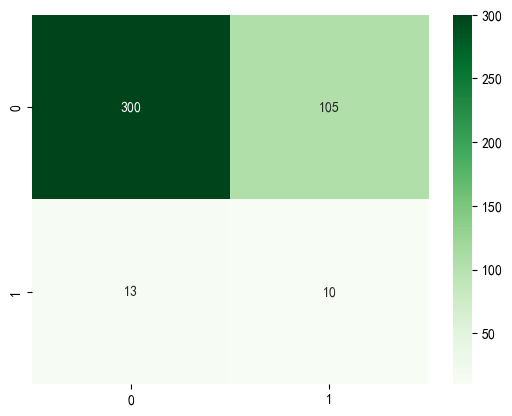

In [17]:
###pca-ros-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_ros 和 y_train_ros 有相同的样本数量
print("x_train_ros shape:", x_train_ros.shape)
print("y_train_ros shape:", y_train_ros.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_ros.reshape((x_train_ros.shape[0], 1, x_train_ros.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_ros, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_ros_encoded = to_categorical(y_train_ros, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_ros)            # 输出原始标签
print(y_train_ros_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_ros, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s51_classes = model.predict(test_X1)
    y_pred_s51_classes = np.argmax(y_pred_s51_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s51_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [1, 1, 1e-7],
        "ub": [100, 100, 1e-3],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s51_classes = model.predict(test_X1)
y_pred_s51_classes = np.argmax(y_pred_s51_classes, axis=1)

# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
# 计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s51_classes)
precision = precision_score(y_test_spring_classes, y_pred_s51_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s51_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s51_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s51_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_smote shape: (2974, 2)
y_train_smote shape: (2974,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (2974, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5946 - loss: 0.6815 - val_accuracy: 0.0101 - val_loss: 0.8206
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 0.6201 - val_accuracy: 0.4084 - val_loss: 0.8292
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5499 - val_accuracy: 0.6050 - val_loss: 0.7305
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.5324 - val_accuracy: 0.6857 - val_loss: 0.7278
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5328 - val_accuracy: 0.7613 - val_loss: 0.6690
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6994 - loss: 0.5389 - val_accuracy: 0.7429 - val_loss: 0.7250
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7176 - loss: 0.5312 - val_accuracy: 0.7328 - val_loss: 0.7646
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5246 - val_accuracy: 0.7261 - val_loss

2024/05/14 01:20:00 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6249 - loss: 0.6709 - val_accuracy: 0.0471 - val_loss: 0.8914
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.5810 - val_accuracy: 0.6017 - val_loss: 0.7619
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5357 - val_accuracy: 0.7126 - val_loss: 0.7224
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5256 - val_accuracy: 0.7008 - val_loss: 0.7643
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 0.5200 - val_accuracy: 0.7647 - val_loss: 0.6829
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.5403 - val_accuracy: 0.7429 - val_loss: 0.7624
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5274 - val_accuracy: 0.7311 - val_loss: 0.7822
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5292 - val_accuracy: 0.7378 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5928 - loss: 0.6806 - val_accuracy: 0.2874 - val_loss: 0.7583
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.6088 - val_accuracy: 0.4605 - val_loss: 0.7905
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.5583 - val_accuracy: 0.5008 - val_loss: 0.8188
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.5339 - val_accuracy: 0.6370 - val_loss: 0.7085
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.5212 - val_accuracy: 0.6639 - val_loss: 0.7361
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.5353 - val_accuracy: 0.7345 - val_loss: 0.7032
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5325 - val_accuracy: 0.7109 - val_loss: 0.7255
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - loss: 0.5273 - val_accuracy: 0.7361 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6729 - loss: 0.6797 - val_accuracy: 0.3412 - val_loss: 0.7519
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.6046 - val_accuracy: 0.4992 - val_loss: 0.7602
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.5583 - val_accuracy: 0.6555 - val_loss: 0.6624
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5282 - val_accuracy: 0.6034 - val_loss: 0.7546
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5350 - val_accuracy: 0.7160 - val_loss: 0.6918
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5255 - val_accuracy: 0.7664 - val_loss: 0.6399
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5496 - val_accuracy: 0.7277 - val_loss: 0.7180
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 0.5263 - val_accuracy: 0.6790 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5921 - loss: 0.6826 - val_accuracy: 0.0017 - val_loss: 0.8289
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6570 - loss: 0.6093 - val_accuracy: 0.5513 - val_loss: 0.7245
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.5590 - val_accuracy: 0.6941 - val_loss: 0.6695
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5223 - val_accuracy: 0.7361 - val_loss: 0.6825
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.5282 - val_accuracy: 0.7496 - val_loss: 0.6988
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.5413 - val_accuracy: 0.7328 - val_loss: 0.7621
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5361 - val_accuracy: 0.7395 - val_loss: 0.7436
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5274 - val_accuracy: 0.7580 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5943 - loss: 0.6795 - val_accuracy: 0.0992 - val_loss: 0.8308
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6686 - loss: 0.5961 - val_accuracy: 0.5479 - val_loss: 0.7598
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5349 - val_accuracy: 0.6101 - val_loss: 0.7782
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.5367 - val_accuracy: 0.7462 - val_loss: 0.7011
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.5028 - val_accuracy: 0.7597 - val_loss: 0.6834
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.5169 - val_accuracy: 0.7815 - val_loss: 0.6474
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.5490 - val_accuracy: 0.7345 - val_loss: 0.7576
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.5370 - val_accuracy: 0.7294 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5813 - loss: 0.6810 - val_accuracy: 0.1681 - val_loss: 0.7900
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.6018 - val_accuracy: 0.4588 - val_loss: 0.8292
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.5456 - val_accuracy: 0.5580 - val_loss: 0.8011
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7069 - loss: 0.5316 - val_accuracy: 0.7294 - val_loss: 0.6840
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.5292 - val_accuracy: 0.7513 - val_loss: 0.6805
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5178 - val_accuracy: 0.7345 - val_loss: 0.7394
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5349 - val_accuracy: 0.7126 - val_loss: 0.7594
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5285 - val_accuracy: 0.7210 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6179 - loss: 0.6787 - val_accuracy: 0.0437 - val_loss: 0.8467
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6416 - loss: 0.6112 - val_accuracy: 0.4034 - val_loss: 0.9063
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5550 - val_accuracy: 0.6672 - val_loss: 0.7329
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 0.5202 - val_accuracy: 0.7412 - val_loss: 0.7040
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.5313 - val_accuracy: 0.7328 - val_loss: 0.7546
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5318 - val_accuracy: 0.7429 - val_loss: 0.7361
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5348 - val_accuracy: 0.7513 - val_loss: 0.7094
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7020 - loss: 0.5324 - val_accuracy: 0.8017 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6239 - loss: 0.6758 - val_accuracy: 0.1361 - val_loss: 0.8312
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.5947 - val_accuracy: 0.5630 - val_loss: 0.7306
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6964 - loss: 0.5453 - val_accuracy: 0.6639 - val_loss: 0.6977
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5371 - val_accuracy: 0.7126 - val_loss: 0.7123
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5319 - val_accuracy: 0.6454 - val_loss: 0.7793
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.5156 - val_accuracy: 0.7076 - val_loss: 0.7253
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7162 - loss: 0.5161 - val_accuracy: 0.6487 - val_loss: 0.7928
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5345 - val_accuracy: 0.6370 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6206 - loss: 0.6775 - val_accuracy: 0.1008 - val_loss: 0.8411
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.6004 - val_accuracy: 0.5445 - val_loss: 0.7705
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.5331 - val_accuracy: 0.6756 - val_loss: 0.7163
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.5353 - val_accuracy: 0.6908 - val_loss: 0.7628
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.5238 - val_accuracy: 0.7227 - val_loss: 0.7633
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.5258 - val_accuracy: 0.7731 - val_loss: 0.6593
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.5280 - val_accuracy: 0.7529 - val_loss: 0.7075
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5235 - val_accuracy: 0.7697 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5660 - loss: 0.6847 - val_accuracy: 0.0840 - val_loss: 0.7730
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6525 - loss: 0.6289 - val_accuracy: 0.4857 - val_loss: 0.7382
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5565 - val_accuracy: 0.5849 - val_loss: 0.6875
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5533 - val_accuracy: 0.5832 - val_loss: 0.7677
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.5219 - val_accuracy: 0.6336 - val_loss: 0.7666
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7105 - loss: 0.5272 - val_accuracy: 0.6555 - val_loss: 0.7824
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.5500 - val_accuracy: 0.7210 - val_loss: 0.7346
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.5424 - val_accuracy: 0.6790 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6088 - loss: 0.6798 - val_accuracy: 0.1412 - val_loss: 0.8094
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.6020 - val_accuracy: 0.4975 - val_loss: 0.7770
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 0.5447 - val_accuracy: 0.5697 - val_loss: 0.7933
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5255 - val_accuracy: 0.6756 - val_loss: 0.7405
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5383 - val_accuracy: 0.7412 - val_loss: 0.7055
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7146 - loss: 0.5259 - val_accuracy: 0.7479 - val_loss: 0.6955
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.5097 - val_accuracy: 0.7664 - val_loss: 0.6749
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5289 - val_accuracy: 0.7378 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5896 - loss: 0.6824 - val_accuracy: 0.1462 - val_loss: 0.7787
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.6110 - val_accuracy: 0.4790 - val_loss: 0.7784
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5587 - val_accuracy: 0.5899 - val_loss: 0.7279
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.5316 - val_accuracy: 0.6706 - val_loss: 0.7245
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.5273 - val_accuracy: 0.7160 - val_loss: 0.7203
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5342 - val_accuracy: 0.6756 - val_loss: 0.8015
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5330 - val_accuracy: 0.7126 - val_loss: 0.7589
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.5167 - val_accuracy: 0.7445 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6251 - loss: 0.6666 - val_accuracy: 0.2050 - val_loss: 0.8515
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.5776 - val_accuracy: 0.6672 - val_loss: 0.6979
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5376 - val_accuracy: 0.7529 - val_loss: 0.6652
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.5444 - val_accuracy: 0.7143 - val_loss: 0.7389
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5247 - val_accuracy: 0.7513 - val_loss: 0.7059
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7024 - loss: 0.5284 - val_accuracy: 0.7311 - val_loss: 0.7652
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5239 - val_accuracy: 0.7529 - val_loss: 0.7074
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5242 - val_accuracy: 0.7395 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6721 - loss: 0.6716 - val_accuracy: 0.1311 - val_loss: 0.8679
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.5884 - val_accuracy: 0.5630 - val_loss: 0.7435
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5453 - val_accuracy: 0.6924 - val_loss: 0.6949
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5285 - val_accuracy: 0.7429 - val_loss: 0.7043
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5255 - val_accuracy: 0.7328 - val_loss: 0.7466
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5326 - val_accuracy: 0.7580 - val_loss: 0.6963
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5364 - val_accuracy: 0.7563 - val_loss: 0.6961
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.5425 - val_accuracy: 0.7328 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6002 - loss: 0.6805 - val_accuracy: 0.2370 - val_loss: 0.7790
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6752 - loss: 0.6004 - val_accuracy: 0.4857 - val_loss: 0.8087
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7043 - loss: 0.5403 - val_accuracy: 0.6924 - val_loss: 0.6421
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7174 - loss: 0.5238 - val_accuracy: 0.6840 - val_loss: 0.7231
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.5166 - val_accuracy: 0.7647 - val_loss: 0.6500
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6992 - loss: 0.5241 - val_accuracy: 0.7798 - val_loss: 0.6416
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6857 - loss: 0.5415 - val_accuracy: 0.7479 - val_loss: 0.7015
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7061 - loss: 0.5269 - val_accuracy: 0.6874 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6182 - loss: 0.6739 - val_accuracy: 0.0773 - val_loss: 0.8547
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.5943 - val_accuracy: 0.5546 - val_loss: 0.7415
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.5419 - val_accuracy: 0.6874 - val_loss: 0.6895
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.5388 - val_accuracy: 0.6924 - val_loss: 0.7407
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7175 - loss: 0.5248 - val_accuracy: 0.7479 - val_loss: 0.7274
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5137 - val_accuracy: 0.7496 - val_loss: 0.7194
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5279 - val_accuracy: 0.7479 - val_loss: 0.7376
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.5325 - val_accuracy: 0.7496 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6372 - loss: 0.6757 - val_accuracy: 0.1193 - val_loss: 0.8408
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.5935 - val_accuracy: 0.5126 - val_loss: 0.8048
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7131 - loss: 0.5328 - val_accuracy: 0.6017 - val_loss: 0.8017
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.5354 - val_accuracy: 0.6891 - val_loss: 0.7666
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 0.5380 - val_accuracy: 0.6840 - val_loss: 0.7884
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.5441 - val_accuracy: 0.7412 - val_loss: 0.7447
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7015 - loss: 0.5387 - val_accuracy: 0.7429 - val_loss: 0.7358
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 0.5360 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6374 - loss: 0.6807 - val_accuracy: 0.1580 - val_loss: 0.7826
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: 0.6101 - val_accuracy: 0.4807 - val_loss: 0.7775
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7009 - loss: 0.5454 - val_accuracy: 0.6235 - val_loss: 0.7226
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.5435 - val_accuracy: 0.6840 - val_loss: 0.7106
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.5514 - val_accuracy: 0.7412 - val_loss: 0.6856
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - loss: 0.5350 - val_accuracy: 0.7479 - val_loss: 0.7027
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5272 - val_accuracy: 0.6521 - val_loss: 0.8152
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5244 - val_accuracy: 0.7361 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6118 - loss: 0.6753 - val_accuracy: 0.1143 - val_loss: 0.8635
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.5878 - val_accuracy: 0.5916 - val_loss: 0.7359
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.5476 - val_accuracy: 0.6723 - val_loss: 0.7185
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5317 - val_accuracy: 0.7126 - val_loss: 0.7372
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 0.5237 - val_accuracy: 0.7563 - val_loss: 0.6956
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.5257 - val_accuracy: 0.7462 - val_loss: 0.7088
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.5410 - val_accuracy: 0.7782 - val_loss: 0.6622
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.5290 - val_accuracy: 0.7429 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6301 - loss: 0.6849 - val_accuracy: 0.2571 - val_loss: 0.7357
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6625 - loss: 0.6316 - val_accuracy: 0.4034 - val_loss: 0.8013
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.5652 - val_accuracy: 0.5765 - val_loss: 0.7034
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5396 - val_accuracy: 0.6672 - val_loss: 0.6920
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.5431 - val_accuracy: 0.6403 - val_loss: 0.7918
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7255 - loss: 0.5175 - val_accuracy: 0.7361 - val_loss: 0.7226
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5207 - val_accuracy: 0.7025 - val_loss: 0.7613
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.5253 - val_accuracy: 0.6891 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6088 - loss: 0.6717 - val_accuracy: 0.1412 - val_loss: 0.8421
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5786 - val_accuracy: 0.5630 - val_loss: 0.7437
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7220 - loss: 0.5275 - val_accuracy: 0.6790 - val_loss: 0.6905
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7230 - loss: 0.5179 - val_accuracy: 0.7462 - val_loss: 0.6806
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.5398 - val_accuracy: 0.7445 - val_loss: 0.7183
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5198 - val_accuracy: 0.7563 - val_loss: 0.6910
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.5373 - val_accuracy: 0.7630 - val_loss: 0.6873
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.5297 - val_accuracy: 0.7563 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6302 - loss: 0.6803 - val_accuracy: 0.1311 - val_loss: 0.7953
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.6091 - val_accuracy: 0.4588 - val_loss: 0.8172
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7002 - loss: 0.5409 - val_accuracy: 0.6151 - val_loss: 0.7007
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.5350 - val_accuracy: 0.7193 - val_loss: 0.6746
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7139 - loss: 0.5250 - val_accuracy: 0.7160 - val_loss: 0.7141
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7155 - loss: 0.5189 - val_accuracy: 0.7815 - val_loss: 0.6350
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 0.5270 - val_accuracy: 0.7580 - val_loss: 0.6799
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: 0.5365 - val_accuracy: 0.7193 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6274 - loss: 0.6735 - val_accuracy: 0.1765 - val_loss: 0.8459
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.5790 - val_accuracy: 0.5765 - val_loss: 0.7458
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5407 - val_accuracy: 0.6286 - val_loss: 0.7662
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5380 - val_accuracy: 0.6622 - val_loss: 0.7929
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.5441 - val_accuracy: 0.7109 - val_loss: 0.7477
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5233 - val_accuracy: 0.7412 - val_loss: 0.7260
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5245 - val_accuracy: 0.7210 - val_loss: 0.7480
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5274 - val_accuracy: 0.7277 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6207 - loss: 0.6692 - val_accuracy: 0.0555 - val_loss: 0.9150
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.5847 - val_accuracy: 0.5395 - val_loss: 0.7834
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6950 - loss: 0.5447 - val_accuracy: 0.6672 - val_loss: 0.7551
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5224 - val_accuracy: 0.7109 - val_loss: 0.7465
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5305 - val_accuracy: 0.6891 - val_loss: 0.7726
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5366 - val_accuracy: 0.7109 - val_loss: 0.7932
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7032 - loss: 0.5380 - val_accuracy: 0.6958 - val_loss: 0.7917
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5169 - val_accuracy: 0.7580 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6158 - loss: 0.6772 - val_accuracy: 0.0000e+00 - val_loss: 0.8838
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6058 - val_accuracy: 0.5143 - val_loss: 0.8056
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5307 - val_accuracy: 0.7345 - val_loss: 0.6707
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.5308 - val_accuracy: 0.7261 - val_loss: 0.7284
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - loss: 0.5453 - val_accuracy: 0.6420 - val_loss: 0.8520
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.5368 - val_accuracy: 0.7361 - val_loss: 0.7519
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5249 - val_accuracy: 0.7513 - val_loss: 0.7112
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.5397 - val_accuracy: 0.7429 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6561 - loss: 0.6739 - val_accuracy: 0.2639 - val_loss: 0.8080
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 0.5849 - val_accuracy: 0.5025 - val_loss: 0.8036
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 0.5344 - val_accuracy: 0.5681 - val_loss: 0.8062
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 0.5267 - val_accuracy: 0.7176 - val_loss: 0.7236
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7073 - loss: 0.5276 - val_accuracy: 0.7395 - val_loss: 0.7343
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7043 - loss: 0.5329 - val_accuracy: 0.7395 - val_loss: 0.7283
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.5289 - val_accuracy: 0.6908 - val_loss: 0.7878
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7010 - loss: 0.5465 - val_accuracy: 0.6874 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6401 - loss: 0.6815 - val_accuracy: 0.1496 - val_loss: 0.7839
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6637 - loss: 0.6105 - val_accuracy: 0.4908 - val_loss: 0.7576
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 0.5440 - val_accuracy: 0.5378 - val_loss: 0.7995
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6966 - loss: 0.5437 - val_accuracy: 0.5899 - val_loss: 0.7759
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7100 - loss: 0.5326 - val_accuracy: 0.6790 - val_loss: 0.7234
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.5278 - val_accuracy: 0.6269 - val_loss: 0.7998
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.5487 - val_accuracy: 0.6571 - val_loss: 0.7647
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5242 - val_accuracy: 0.7059 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6626 - loss: 0.6758 - val_accuracy: 0.3109 - val_loss: 0.7747
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.5936 - val_accuracy: 0.5227 - val_loss: 0.7458
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5391 - val_accuracy: 0.6655 - val_loss: 0.6799
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5318 - val_accuracy: 0.6773 - val_loss: 0.7226
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: 0.5384 - val_accuracy: 0.6605 - val_loss: 0.7982
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7016 - loss: 0.5312 - val_accuracy: 0.7580 - val_loss: 0.6968
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5297 - val_accuracy: 0.7580 - val_loss: 0.6761
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7211 - loss: 0.5168 - val_accuracy: 0.7445 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6181 - loss: 0.6776 - val_accuracy: 0.0000e+00 - val_loss: 0.9031
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 0.6025 - val_accuracy: 0.5042 - val_loss: 0.8253
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.5556 - val_accuracy: 0.6420 - val_loss: 0.7807
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5440 - val_accuracy: 0.6941 - val_loss: 0.7501
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5334 - val_accuracy: 0.7092 - val_loss: 0.7550
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5270 - val_accuracy: 0.7429 - val_loss: 0.7379
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5308 - val_accuracy: 0.7597 - val_loss: 0.6916
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.5272 - val_accuracy: 0.7529 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6308 - loss: 0.6831 - val_accuracy: 0.1529 - val_loss: 0.7743
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.6183 - val_accuracy: 0.4807 - val_loss: 0.7532
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5543 - val_accuracy: 0.5479 - val_loss: 0.7794
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.5442 - val_accuracy: 0.6185 - val_loss: 0.7613
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 0.5269 - val_accuracy: 0.7462 - val_loss: 0.6811
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5288 - val_accuracy: 0.7378 - val_loss: 0.7293
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5316 - val_accuracy: 0.7462 - val_loss: 0.7132
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5249 - val_accuracy: 0.7613 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5717 - loss: 0.6814 - val_accuracy: 0.0471 - val_loss: 0.8297
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6508 - loss: 0.6079 - val_accuracy: 0.5059 - val_loss: 0.7549
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7082 - loss: 0.5383 - val_accuracy: 0.6571 - val_loss: 0.6877
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5404 - val_accuracy: 0.6773 - val_loss: 0.7200
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5557 - val_accuracy: 0.6723 - val_loss: 0.7536
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5457 - val_accuracy: 0.7328 - val_loss: 0.7388
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7107 - loss: 0.5178 - val_accuracy: 0.7748 - val_loss: 0.6553
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.5243 - val_accuracy: 0.7513 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6200 - loss: 0.6811 - val_accuracy: 0.1361 - val_loss: 0.7981
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.6075 - val_accuracy: 0.5076 - val_loss: 0.7389
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 0.5484 - val_accuracy: 0.6017 - val_loss: 0.7393
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.5186 - val_accuracy: 0.6975 - val_loss: 0.7106
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5336 - val_accuracy: 0.7529 - val_loss: 0.6848
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5314 - val_accuracy: 0.7328 - val_loss: 0.7359
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5333 - val_accuracy: 0.7496 - val_loss: 0.7251
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5141 - val_accuracy: 0.7647 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6187 - loss: 0.6777 - val_accuracy: 0.0571 - val_loss: 0.8611
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5880 - val_accuracy: 0.5563 - val_loss: 0.7594
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5391 - val_accuracy: 0.6538 - val_loss: 0.7725
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7153 - loss: 0.5282 - val_accuracy: 0.7597 - val_loss: 0.6754
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5283 - val_accuracy: 0.7462 - val_loss: 0.7112
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.5196 - val_accuracy: 0.7429 - val_loss: 0.7427
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5336 - val_accuracy: 0.7513 - val_loss: 0.6984
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.5369 - val_accuracy: 0.7193 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6265 - loss: 0.6787 - val_accuracy: 0.0000e+00 - val_loss: 0.8787
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.6100 - val_accuracy: 0.4487 - val_loss: 0.8226
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5317 - val_accuracy: 0.6689 - val_loss: 0.7107
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7078 - loss: 0.5212 - val_accuracy: 0.7445 - val_loss: 0.6637
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.5284 - val_accuracy: 0.7244 - val_loss: 0.7236
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6890 - loss: 0.5442 - val_accuracy: 0.6857 - val_loss: 0.7685
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.5242 - val_accuracy: 0.7496 - val_loss: 0.7013
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.5321 - val_accuracy: 0.7294 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6308 - loss: 0.6754 - val_accuracy: 0.0773 - val_loss: 0.8499
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.5992 - val_accuracy: 0.4874 - val_loss: 0.8284
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5437 - val_accuracy: 0.5916 - val_loss: 0.8077
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5457 - val_accuracy: 0.6840 - val_loss: 0.7724
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5355 - val_accuracy: 0.6504 - val_loss: 0.8440
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7031 - loss: 0.5272 - val_accuracy: 0.7429 - val_loss: 0.7592
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5180 - val_accuracy: 0.7361 - val_loss: 0.7532
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5242 - val_accuracy: 0.7714 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6369 - loss: 0.6840 - val_accuracy: 0.3513 - val_loss: 0.7283
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.6240 - val_accuracy: 0.4605 - val_loss: 0.7774
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5582 - val_accuracy: 0.5580 - val_loss: 0.7535
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5369 - val_accuracy: 0.5681 - val_loss: 0.7883
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.5389 - val_accuracy: 0.6370 - val_loss: 0.7463
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.5406 - val_accuracy: 0.6655 - val_loss: 0.7501
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.5251 - val_accuracy: 0.6807 - val_loss: 0.7349
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.5388 - val_accuracy: 0.7244 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6195 - loss: 0.6826 - val_accuracy: 0.0857 - val_loss: 0.7947
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 0.6189 - val_accuracy: 0.4487 - val_loss: 0.7758
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5603 - val_accuracy: 0.5429 - val_loss: 0.7817
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7005 - loss: 0.5378 - val_accuracy: 0.6000 - val_loss: 0.7653
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5300 - val_accuracy: 0.7277 - val_loss: 0.6822
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.5391 - val_accuracy: 0.7462 - val_loss: 0.6854
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.5160 - val_accuracy: 0.7529 - val_loss: 0.6900
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5284 - val_accuracy: 0.7513 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6282 - loss: 0.6767 - val_accuracy: 0.0118 - val_loss: 0.8802
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6408 - loss: 0.5994 - val_accuracy: 0.5076 - val_loss: 0.7966
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6985 - loss: 0.5442 - val_accuracy: 0.6084 - val_loss: 0.8014
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7000 - loss: 0.5325 - val_accuracy: 0.6891 - val_loss: 0.7602
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.5208 - val_accuracy: 0.7496 - val_loss: 0.7070
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7043 - loss: 0.5279 - val_accuracy: 0.7597 - val_loss: 0.6797
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5225 - val_accuracy: 0.7597 - val_loss: 0.6968
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7108 - loss: 0.5220 - val_accuracy: 0.7479 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6325 - loss: 0.6731 - val_accuracy: 0.0000e+00 - val_loss: 0.8783
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6599 - loss: 0.5886 - val_accuracy: 0.5782 - val_loss: 0.7717
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5403 - val_accuracy: 0.6941 - val_loss: 0.7301
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5307 - val_accuracy: 0.6992 - val_loss: 0.7644
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5343 - val_accuracy: 0.7529 - val_loss: 0.6976
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6965 - loss: 0.5342 - val_accuracy: 0.7496 - val_loss: 0.7159
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7021 - loss: 0.5340 - val_accuracy: 0.7429 - val_loss: 0.7482
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.5358 - val_accuracy: 0.7143 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6353 - loss: 0.6809 - val_accuracy: 0.1328 - val_loss: 0.7991
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - loss: 0.6038 - val_accuracy: 0.4941 - val_loss: 0.7932
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.5512 - val_accuracy: 0.6084 - val_loss: 0.7519
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.5488 - val_accuracy: 0.6924 - val_loss: 0.7185
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.5445 - val_accuracy: 0.6958 - val_loss: 0.7480
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: 0.5301 - val_accuracy: 0.7597 - val_loss: 0.6822
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5126 - val_accuracy: 0.7748 - val_loss: 0.6560
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.5314 - val_accuracy: 0.7513 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5835 - loss: 0.6777 - val_accuracy: 0.0840 - val_loss: 0.8352
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.5976 - val_accuracy: 0.5580 - val_loss: 0.7582
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.5469 - val_accuracy: 0.7580 - val_loss: 0.6389
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5364 - val_accuracy: 0.7345 - val_loss: 0.7367
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5311 - val_accuracy: 0.7613 - val_loss: 0.6811
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.5346 - val_accuracy: 0.7395 - val_loss: 0.7408
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7154 - loss: 0.5226 - val_accuracy: 0.7479 - val_loss: 0.7216
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5263 - val_accuracy: 0.7395 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6165 - loss: 0.6701 - val_accuracy: 0.0185 - val_loss: 0.8881
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.5778 - val_accuracy: 0.6571 - val_loss: 0.7537
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.5211 - val_accuracy: 0.7361 - val_loss: 0.7451
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.5335 - val_accuracy: 0.7681 - val_loss: 0.6787
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.5311 - val_accuracy: 0.7361 - val_loss: 0.7539
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5280 - val_accuracy: 0.7630 - val_loss: 0.6862
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.5402 - val_accuracy: 0.7042 - val_loss: 0.7807
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.5320 - val_accuracy: 0.7479 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6110 - loss: 0.6746 - val_accuracy: 0.0017 - val_loss: 0.8693
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6372 - loss: 0.6047 - val_accuracy: 0.4807 - val_loss: 0.8375
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.5460 - val_accuracy: 0.6538 - val_loss: 0.7350
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.5231 - val_accuracy: 0.7412 - val_loss: 0.6871
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5280 - val_accuracy: 0.7597 - val_loss: 0.6757
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.5335 - val_accuracy: 0.7092 - val_loss: 0.7592
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.5363 - val_accuracy: 0.7378 - val_loss: 0.7339
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - loss: 0.5199 - val_accuracy: 0.7546 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6379 - loss: 0.6759 - val_accuracy: 0.0000e+00 - val_loss: 0.8753
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6041 - val_accuracy: 0.4403 - val_loss: 0.8677
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.5449 - val_accuracy: 0.6487 - val_loss: 0.7490
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5340 - val_accuracy: 0.7378 - val_loss: 0.7041
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6911 - loss: 0.5456 - val_accuracy: 0.7059 - val_loss: 0.7461
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5341 - val_accuracy: 0.7731 - val_loss: 0.6677
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.5405 - val_accuracy: 0.7479 - val_loss: 0.7218
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7057 - loss: 0.5282 - val_accuracy: 0.7664 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5742 - loss: 0.6827 - val_accuracy: 0.0000e+00 - val_loss: 0.8223
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6372 - loss: 0.6161 - val_accuracy: 0.4353 - val_loss: 0.8653
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.5510 - val_accuracy: 0.7429 - val_loss: 0.7142
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.5327 - val_accuracy: 0.7361 - val_loss: 0.7546
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.5311 - val_accuracy: 0.7210 - val_loss: 0.7525
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7234 - loss: 0.5207 - val_accuracy: 0.7496 - val_loss: 0.7238
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7185 - loss: 0.5300 - val_accuracy: 0.7445 - val_loss: 0.7383
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5347 - val_accuracy: 0.7613 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6075 - loss: 0.6817 - val_accuracy: 0.0000e+00 - val_loss: 0.8036
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.6221 - val_accuracy: 0.3647 - val_loss: 0.8806
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - loss: 0.5541 - val_accuracy: 0.6471 - val_loss: 0.7334
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5347 - val_accuracy: 0.7328 - val_loss: 0.7069
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.5361 - val_accuracy: 0.7277 - val_loss: 0.7435
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.5289 - val_accuracy: 0.7462 - val_loss: 0.7318
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.5286 - val_accuracy: 0.7496 - val_loss: 0.7169
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5292 - val_accuracy: 0.7496 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6219 - loss: 0.6795 - val_accuracy: 0.0000e+00 - val_loss: 0.8535
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.6117 - val_accuracy: 0.5294 - val_loss: 0.7620
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7059 - loss: 0.5426 - val_accuracy: 0.7361 - val_loss: 0.6821
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - loss: 0.5467 - val_accuracy: 0.7462 - val_loss: 0.6988
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 0.5233 - val_accuracy: 0.7966 - val_loss: 0.6379
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 0.5351 - val_accuracy: 0.7042 - val_loss: 0.7663
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7050 - loss: 0.5370 - val_accuracy: 0.6773 - val_loss: 0.8200
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - loss: 0.5365 - val_accuracy: 0.7445 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6531 - loss: 0.6757 - val_accuracy: 0.1479 - val_loss: 0.8161
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6550 - loss: 0.5986 - val_accuracy: 0.4891 - val_loss: 0.8037
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.5439 - val_accuracy: 0.6555 - val_loss: 0.7043
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5282 - val_accuracy: 0.7277 - val_loss: 0.6838
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7009 - loss: 0.5368 - val_accuracy: 0.7395 - val_loss: 0.7314
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5202 - val_accuracy: 0.7445 - val_loss: 0.7166
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.5310 - val_accuracy: 0.7496 - val_loss: 0.7083
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7064 - loss: 0.5235 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5906 - loss: 0.6759 - val_accuracy: 0.0235 - val_loss: 0.8752
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6481 - loss: 0.6010 - val_accuracy: 0.4840 - val_loss: 0.8342
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5382 - val_accuracy: 0.5866 - val_loss: 0.8162
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.5375 - val_accuracy: 0.7412 - val_loss: 0.7103
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.5337 - val_accuracy: 0.7496 - val_loss: 0.7114
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.5342 - val_accuracy: 0.7445 - val_loss: 0.7269
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.5352 - val_accuracy: 0.7311 - val_loss: 0.7586
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.5240 - val_accuracy: 0.7866 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6757 - loss: 0.6765 - val_accuracy: 0.2723 - val_loss: 0.7915
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6831 - loss: 0.5916 - val_accuracy: 0.4773 - val_loss: 0.7843
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 0.5447 - val_accuracy: 0.6353 - val_loss: 0.6704
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.5411 - val_accuracy: 0.6975 - val_loss: 0.6829
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.5266 - val_accuracy: 0.7546 - val_loss: 0.6438
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7051 - loss: 0.5315 - val_accuracy: 0.7378 - val_loss: 0.7139
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7074 - loss: 0.5424 - val_accuracy: 0.7412 - val_loss: 0.7236
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7025 - loss: 0.5299 - val_accuracy: 0.7597 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6414 - loss: 0.6812 - val_accuracy: 0.0269 - val_loss: 0.8068
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 0.6137 - val_accuracy: 0.4992 - val_loss: 0.7232
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - loss: 0.5634 - val_accuracy: 0.5546 - val_loss: 0.7488
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.5459 - val_accuracy: 0.5866 - val_loss: 0.7534
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5349 - val_accuracy: 0.6924 - val_loss: 0.7024
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7092 - loss: 0.5343 - val_accuracy: 0.7378 - val_loss: 0.7065
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5521 - val_accuracy: 0.6790 - val_loss: 0.7958
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.5292 - val_accuracy: 0.7176 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5922 - loss: 0.6811 - val_accuracy: 0.0000e+00 - val_loss: 0.8407
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6071 - val_accuracy: 0.5294 - val_loss: 0.7869
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - loss: 0.5570 - val_accuracy: 0.6756 - val_loss: 0.7361
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6961 - loss: 0.5345 - val_accuracy: 0.6824 - val_loss: 0.7884
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7085 - loss: 0.5335 - val_accuracy: 0.7529 - val_loss: 0.7011
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - loss: 0.5389 - val_accuracy: 0.7210 - val_loss: 0.7677
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.5309 - val_accuracy: 0.7697 - val_loss: 0.6762
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.5276 - val_accuracy: 0.7479 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6247 - loss: 0.6819 - val_accuracy: 0.1025 - val_loss: 0.8046
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.6130 - val_accuracy: 0.4773 - val_loss: 0.7808
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5514 - val_accuracy: 0.6050 - val_loss: 0.7678
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6997 - loss: 0.5406 - val_accuracy: 0.5748 - val_loss: 0.8678
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.5406 - val_accuracy: 0.6924 - val_loss: 0.7727
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5392 - val_accuracy: 0.6958 - val_loss: 0.7795
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.5283 - val_accuracy: 0.7361 - val_loss: 0.7523
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.5327 - val_accuracy: 0.7445 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5973 - loss: 0.6813 - val_accuracy: 0.0437 - val_loss: 0.8194
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.6133 - val_accuracy: 0.4672 - val_loss: 0.8143
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.5476 - val_accuracy: 0.6555 - val_loss: 0.7205
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5352 - val_accuracy: 0.7412 - val_loss: 0.6954
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5247 - val_accuracy: 0.6588 - val_loss: 0.8110
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5366 - val_accuracy: 0.6908 - val_loss: 0.8019
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7067 - loss: 0.5327 - val_accuracy: 0.7546 - val_loss: 0.7161
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.5364 - val_accuracy: 0.7462 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6295 - loss: 0.6734 - val_accuracy: 0.1076 - val_loss: 0.8563
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.5902 - val_accuracy: 0.4908 - val_loss: 0.7891
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.5578 - val_accuracy: 0.6134 - val_loss: 0.7431
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6908 - loss: 0.5409 - val_accuracy: 0.6655 - val_loss: 0.7520
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.5495 - val_accuracy: 0.6924 - val_loss: 0.7575
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5237 - val_accuracy: 0.7126 - val_loss: 0.7507
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.5439 - val_accuracy: 0.7076 - val_loss: 0.7559
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7068 - loss: 0.5266 - val_accuracy: 0.6807 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6349 - loss: 0.6803 - val_accuracy: 0.1025 - val_loss: 0.8155
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.6050 - val_accuracy: 0.4874 - val_loss: 0.7648
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.5510 - val_accuracy: 0.6000 - val_loss: 0.7509
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5324 - val_accuracy: 0.7210 - val_loss: 0.7110
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.5330 - val_accuracy: 0.7714 - val_loss: 0.6544
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5299 - val_accuracy: 0.7445 - val_loss: 0.7231
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - loss: 0.5285 - val_accuracy: 0.7479 - val_loss: 0.7287
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.5071 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6118 - loss: 0.6772 - val_accuracy: 0.1008 - val_loss: 0.8368
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6533 - loss: 0.6031 - val_accuracy: 0.4874 - val_loss: 0.8025
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.5329 - val_accuracy: 0.6319 - val_loss: 0.7186
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7007 - loss: 0.5375 - val_accuracy: 0.6336 - val_loss: 0.7744
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6919 - loss: 0.5463 - val_accuracy: 0.7378 - val_loss: 0.7054
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 0.5264 - val_accuracy: 0.7328 - val_loss: 0.7117
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.5368 - val_accuracy: 0.7563 - val_loss: 0.6848
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7041 - loss: 0.5327 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5980 - loss: 0.6798 - val_accuracy: 0.0689 - val_loss: 0.8294
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6575 - loss: 0.6056 - val_accuracy: 0.4975 - val_loss: 0.7958
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6972 - loss: 0.5435 - val_accuracy: 0.6420 - val_loss: 0.7681
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7122 - loss: 0.5332 - val_accuracy: 0.6840 - val_loss: 0.7761
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.5296 - val_accuracy: 0.6639 - val_loss: 0.8318
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5403 - val_accuracy: 0.7479 - val_loss: 0.7305
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5220 - val_accuracy: 0.7496 - val_loss: 0.7267
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7084 - loss: 0.5296 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6242 - loss: 0.6721 - val_accuracy: 0.1008 - val_loss: 0.8736
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.5834 - val_accuracy: 0.5479 - val_loss: 0.7829
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.5317 - val_accuracy: 0.6118 - val_loss: 0.7972
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5325 - val_accuracy: 0.7311 - val_loss: 0.7258
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5270 - val_accuracy: 0.7563 - val_loss: 0.6940
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 0.5303 - val_accuracy: 0.7529 - val_loss: 0.7034
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7193 - loss: 0.5147 - val_accuracy: 0.7496 - val_loss: 0.7321
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7122 - loss: 0.5191 - val_accuracy: 0.6840 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6393 - loss: 0.6691 - val_accuracy: 0.1277 - val_loss: 0.8509
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6654 - loss: 0.5923 - val_accuracy: 0.5630 - val_loss: 0.7962
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6975 - loss: 0.5307 - val_accuracy: 0.7445 - val_loss: 0.6906
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 0.5354 - val_accuracy: 0.7529 - val_loss: 0.6878
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.5440 - val_accuracy: 0.7496 - val_loss: 0.7290
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - loss: 0.5330 - val_accuracy: 0.7445 - val_loss: 0.7435
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: 0.5251 - val_accuracy: 0.7496 - val_loss: 0.7090
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6964 - loss: 0.5429 - val_accuracy: 0.7076 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6473 - loss: 0.6784 - val_accuracy: 0.4034 - val_loss: 0.7359
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5984 - val_accuracy: 0.5966 - val_loss: 0.6561
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5661 - val_accuracy: 0.4706 - val_loss: 0.8576
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5370 - val_accuracy: 0.6185 - val_loss: 0.7297
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7162 - loss: 0.5250 - val_accuracy: 0.6672 - val_loss: 0.7363
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.5202 - val_accuracy: 0.6874 - val_loss: 0.7211
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.5388 - val_accuracy: 0.6672 - val_loss: 0.7809
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 0.5323 - val_accuracy: 0.6723 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5836 - loss: 0.6784 - val_accuracy: 0.0370 - val_loss: 0.8560
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 0.6084 - val_accuracy: 0.5092 - val_loss: 0.7732
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5516 - val_accuracy: 0.5613 - val_loss: 0.8487
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7009 - loss: 0.5362 - val_accuracy: 0.7328 - val_loss: 0.7113
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6987 - loss: 0.5290 - val_accuracy: 0.7748 - val_loss: 0.6585
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.5218 - val_accuracy: 0.7580 - val_loss: 0.6998
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.5150 - val_accuracy: 0.7496 - val_loss: 0.7257
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 0.5307 - val_accuracy: 0.6723 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6573 - loss: 0.6766 - val_accuracy: 0.1395 - val_loss: 0.8172
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.6001 - val_accuracy: 0.4824 - val_loss: 0.8080
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5538 - val_accuracy: 0.6101 - val_loss: 0.7309
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5307 - val_accuracy: 0.6840 - val_loss: 0.7335
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - loss: 0.5441 - val_accuracy: 0.7361 - val_loss: 0.7320
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5328 - val_accuracy: 0.7765 - val_loss: 0.6587
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.5360 - val_accuracy: 0.7378 - val_loss: 0.7506
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5128 - val_accuracy: 0.8168 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6292 - loss: 0.6749 - val_accuracy: 0.1126 - val_loss: 0.8548
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6647 - loss: 0.5906 - val_accuracy: 0.5244 - val_loss: 0.7961
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7065 - loss: 0.5317 - val_accuracy: 0.6723 - val_loss: 0.7538
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5433 - val_accuracy: 0.7429 - val_loss: 0.7218
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5254 - val_accuracy: 0.7462 - val_loss: 0.7207
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5130 - val_accuracy: 0.7378 - val_loss: 0.7544
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 0.5388 - val_accuracy: 0.7479 - val_loss: 0.7229
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.5266 - val_accuracy: 0.7445 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6240 - loss: 0.6738 - val_accuracy: 0.1782 - val_loss: 0.8390
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.5875 - val_accuracy: 0.4924 - val_loss: 0.8027
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5542 - val_accuracy: 0.6202 - val_loss: 0.7250
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5368 - val_accuracy: 0.7059 - val_loss: 0.6944
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.5297 - val_accuracy: 0.7378 - val_loss: 0.6829
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5330 - val_accuracy: 0.6924 - val_loss: 0.7484
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6987 - loss: 0.5298 - val_accuracy: 0.7664 - val_loss: 0.6678
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.5176 - val_accuracy: 0.7613 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6067 - loss: 0.6783 - val_accuracy: 0.0689 - val_loss: 0.8379
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6469 - loss: 0.6053 - val_accuracy: 0.4857 - val_loss: 0.8035
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7007 - loss: 0.5505 - val_accuracy: 0.6235 - val_loss: 0.7540
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.5417 - val_accuracy: 0.7277 - val_loss: 0.7052
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.5235 - val_accuracy: 0.7311 - val_loss: 0.7412
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5196 - val_accuracy: 0.7277 - val_loss: 0.7554
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.5435 - val_accuracy: 0.7613 - val_loss: 0.6847
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6980 - loss: 0.5330 - val_accuracy: 0.7395 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6435 - loss: 0.6668 - val_accuracy: 0.1748 - val_loss: 0.8647
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 0.5795 - val_accuracy: 0.5429 - val_loss: 0.7888
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6987 - loss: 0.5368 - val_accuracy: 0.6622 - val_loss: 0.7422
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7145 - loss: 0.5244 - val_accuracy: 0.7546 - val_loss: 0.6635
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7068 - loss: 0.5224 - val_accuracy: 0.8084 - val_loss: 0.6197
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.5312 - val_accuracy: 0.7513 - val_loss: 0.7139
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5232 - val_accuracy: 0.7445 - val_loss: 0.7269
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.5211 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6170 - loss: 0.6806 - val_accuracy: 0.1412 - val_loss: 0.8018
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6672 - loss: 0.6034 - val_accuracy: 0.5025 - val_loss: 0.7561
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5610 - val_accuracy: 0.6605 - val_loss: 0.6831
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.5469 - val_accuracy: 0.5782 - val_loss: 0.8157
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.5410 - val_accuracy: 0.6756 - val_loss: 0.7458
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.5278 - val_accuracy: 0.6857 - val_loss: 0.7589
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5175 - val_accuracy: 0.7412 - val_loss: 0.7234
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.5307 - val_accuracy: 0.6471 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5861 - loss: 0.6841 - val_accuracy: 0.0420 - val_loss: 0.7987
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6475 - loss: 0.6170 - val_accuracy: 0.4252 - val_loss: 0.8153
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.5545 - val_accuracy: 0.6487 - val_loss: 0.6935
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5337 - val_accuracy: 0.6739 - val_loss: 0.7070
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.5305 - val_accuracy: 0.7126 - val_loss: 0.7343
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.5319 - val_accuracy: 0.7613 - val_loss: 0.6700
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.5259 - val_accuracy: 0.7479 - val_loss: 0.7176
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5290 - val_accuracy: 0.7328 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6258 - loss: 0.6711 - val_accuracy: 0.0000e+00 - val_loss: 0.9093
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6364 - loss: 0.5866 - val_accuracy: 0.5966 - val_loss: 0.7649
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 0.5362 - val_accuracy: 0.7765 - val_loss: 0.6331
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.5386 - val_accuracy: 0.7697 - val_loss: 0.6731
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.5372 - val_accuracy: 0.7563 - val_loss: 0.6919
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5309 - val_accuracy: 0.7479 - val_loss: 0.7155
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.5247 - val_accuracy: 0.7513 - val_loss: 0.7171
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7032 - loss: 0.5187 - val_accuracy: 0.7613 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6361 - loss: 0.6724 - val_accuracy: 0.0756 - val_loss: 0.8709
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.5862 - val_accuracy: 0.5580 - val_loss: 0.7680
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.5328 - val_accuracy: 0.7580 - val_loss: 0.6486
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 0.5365 - val_accuracy: 0.7462 - val_loss: 0.7039
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5227 - val_accuracy: 0.7513 - val_loss: 0.7104
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.5216 - val_accuracy: 0.7613 - val_loss: 0.6935
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6902 - loss: 0.5433 - val_accuracy: 0.7462 - val_loss: 0.7289
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5271 - val_accuracy: 0.7412 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6104 - loss: 0.6809 - val_accuracy: 0.1092 - val_loss: 0.8080
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.6072 - val_accuracy: 0.4588 - val_loss: 0.8129
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.5429 - val_accuracy: 0.6067 - val_loss: 0.7227
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.5268 - val_accuracy: 0.6924 - val_loss: 0.7063
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7057 - loss: 0.5315 - val_accuracy: 0.7143 - val_loss: 0.7325
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7113 - loss: 0.5332 - val_accuracy: 0.7647 - val_loss: 0.6762
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - loss: 0.5340 - val_accuracy: 0.7462 - val_loss: 0.7281
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.5363 - val_accuracy: 0.7210 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5908 - loss: 0.6844 - val_accuracy: 0.1345 - val_loss: 0.7672
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.6232 - val_accuracy: 0.4067 - val_loss: 0.8048
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6983 - loss: 0.5582 - val_accuracy: 0.4672 - val_loss: 0.8311
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5348 - val_accuracy: 0.5328 - val_loss: 0.8070
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5380 - val_accuracy: 0.5748 - val_loss: 0.8140
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5283 - val_accuracy: 0.6941 - val_loss: 0.7215
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.5372 - val_accuracy: 0.7311 - val_loss: 0.7114
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6966 - loss: 0.5366 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6311 - loss: 0.6813 - val_accuracy: 0.2807 - val_loss: 0.7575
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6601 - loss: 0.6103 - val_accuracy: 0.4504 - val_loss: 0.8311
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6903 - loss: 0.5574 - val_accuracy: 0.5647 - val_loss: 0.7851
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7064 - loss: 0.5280 - val_accuracy: 0.6403 - val_loss: 0.7521
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.5380 - val_accuracy: 0.6185 - val_loss: 0.8196
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.5485 - val_accuracy: 0.7361 - val_loss: 0.7064
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - loss: 0.5349 - val_accuracy: 0.6824 - val_loss: 0.7826
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5447 - val_accuracy: 0.6958 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6207 - loss: 0.6769 - val_accuracy: 0.0000e+00 - val_loss: 0.8961
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.6020 - val_accuracy: 0.5244 - val_loss: 0.7848
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5488 - val_accuracy: 0.7361 - val_loss: 0.6752
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.5279 - val_accuracy: 0.7496 - val_loss: 0.6854
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.5256 - val_accuracy: 0.7563 - val_loss: 0.6921
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7070 - loss: 0.5256 - val_accuracy: 0.7176 - val_loss: 0.7598
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 0.5233 - val_accuracy: 0.7681 - val_loss: 0.6768
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 0.5294 - val_accuracy: 0.7513 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6651 - loss: 0.6770 - val_accuracy: 0.1261 - val_loss: 0.8223
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 0.6022 - val_accuracy: 0.4521 - val_loss: 0.8293
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.5602 - val_accuracy: 0.5563 - val_loss: 0.7782
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.5438 - val_accuracy: 0.6353 - val_loss: 0.7580
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6970 - loss: 0.5397 - val_accuracy: 0.6588 - val_loss: 0.7797
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5447 - val_accuracy: 0.7361 - val_loss: 0.7122
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7182 - loss: 0.5337 - val_accuracy: 0.7445 - val_loss: 0.7070
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.5355 - val_accuracy: 0.7479 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6467 - loss: 0.6804 - val_accuracy: 0.3445 - val_loss: 0.7492
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6640 - loss: 0.6110 - val_accuracy: 0.5193 - val_loss: 0.7374
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6959 - loss: 0.5506 - val_accuracy: 0.5311 - val_loss: 0.7768
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7028 - loss: 0.5462 - val_accuracy: 0.5748 - val_loss: 0.7691
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.5312 - val_accuracy: 0.6706 - val_loss: 0.6974
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.5254 - val_accuracy: 0.6521 - val_loss: 0.7433
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5193 - val_accuracy: 0.6521 - val_loss: 0.7557
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5292 - val_accuracy: 0.7143 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6105 - loss: 0.6788 - val_accuracy: 0.1277 - val_loss: 0.8177
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.6004 - val_accuracy: 0.5395 - val_loss: 0.7453
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6899 - loss: 0.5512 - val_accuracy: 0.7311 - val_loss: 0.6568
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.5301 - val_accuracy: 0.7378 - val_loss: 0.7036
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5395 - val_accuracy: 0.7328 - val_loss: 0.7358
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5253 - val_accuracy: 0.7429 - val_loss: 0.7330
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.5035 - val_accuracy: 0.7613 - val_loss: 0.6919
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5296 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                       │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6268 - loss: 0.6774 - val_accuracy: 0.0504 - val_loss: 0.8588
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6569 - loss: 0.5964 - val_accuracy: 0.6101 - val_loss: 0.7268
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.5390 - val_accuracy: 0.6958 - val_loss: 0.7149
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6966 - loss: 0.5360 - val_accuracy: 0.7681 - val_loss: 0.6626
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.5282 - val_accuracy: 0.7529 - val_loss: 0.7078
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5258 - val_accuracy: 0.7479 - val_loss: 0.7307
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7110 - loss: 0.5231 - val_accuracy: 0.7412 - val_loss: 0.7425
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7139 - loss: 0.5251 - val_accuracy: 0.7412 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6410 - loss: 0.6782 - val_accuracy: 0.1311 - val_loss: 0.8197
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6537 - loss: 0.6064 - val_accuracy: 0.4252 - val_loss: 0.8499
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6773 - loss: 0.5676 - val_accuracy: 0.6034 - val_loss: 0.7144
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5300 - val_accuracy: 0.7345 - val_loss: 0.6450
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.5412 - val_accuracy: 0.7261 - val_loss: 0.7142
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7009 - loss: 0.5396 - val_accuracy: 0.6924 - val_loss: 0.7750
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5419 - val_accuracy: 0.7294 - val_loss: 0.7483
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5362 - val_accuracy: 0.7429 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6178 - loss: 0.6793 - val_accuracy: 0.2134 - val_loss: 0.7885
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.6020 - val_accuracy: 0.4538 - val_loss: 0.8344
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5435 - val_accuracy: 0.5630 - val_loss: 0.7884
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.5478 - val_accuracy: 0.6840 - val_loss: 0.6987
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.5492 - val_accuracy: 0.7008 - val_loss: 0.7184
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5277 - val_accuracy: 0.7580 - val_loss: 0.6653
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5292 - val_accuracy: 0.7378 - val_loss: 0.7235
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6985 - loss: 0.5348 - val_accuracy: 0.7546 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                       │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5817 - loss: 0.6802 - val_accuracy: 0.2067 - val_loss: 0.7844
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.6003 - val_accuracy: 0.5748 - val_loss: 0.7109
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5321 - val_accuracy: 0.6790 - val_loss: 0.7023
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5376 - val_accuracy: 0.7210 - val_loss: 0.7330
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5190 - val_accuracy: 0.7429 - val_loss: 0.7276
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5428 - val_accuracy: 0.7580 - val_loss: 0.6882
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5193 - val_accuracy: 0.7496 - val_loss: 0.7090
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5205 - val_accuracy: 0.7479 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_83 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6584 - loss: 0.6795 - val_accuracy: 0.2807 - val_loss: 0.7658
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.6083 - val_accuracy: 0.5176 - val_loss: 0.7302
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.5624 - val_accuracy: 0.5697 - val_loss: 0.7490
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5396 - val_accuracy: 0.6773 - val_loss: 0.6907
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 0.5439 - val_accuracy: 0.6655 - val_loss: 0.7695
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 0.5233 - val_accuracy: 0.7429 - val_loss: 0.7016
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5332 - val_accuracy: 0.7429 - val_loss: 0.7038
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.5325 - val_accuracy: 0.6538 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6515 - loss: 0.6750 - val_accuracy: 0.1899 - val_loss: 0.8244
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.5879 - val_accuracy: 0.5899 - val_loss: 0.7129
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.5498 - val_accuracy: 0.7193 - val_loss: 0.6644
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.5452 - val_accuracy: 0.6756 - val_loss: 0.7470
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5212 - val_accuracy: 0.6924 - val_loss: 0.7771
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5386 - val_accuracy: 0.7361 - val_loss: 0.7561
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5241 - val_accuracy: 0.6958 - val_loss: 0.7803
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7157 - loss: 0.5193 - val_accuracy: 0.7361 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_85 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6281 - loss: 0.6773 - val_accuracy: 0.0017 - val_loss: 0.8940
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6616 - loss: 0.5881 - val_accuracy: 0.5580 - val_loss: 0.7594
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.5244 - val_accuracy: 0.7412 - val_loss: 0.6809
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5255 - val_accuracy: 0.7429 - val_loss: 0.7206
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 0.5370 - val_accuracy: 0.6639 - val_loss: 0.8184
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7121 - loss: 0.5290 - val_accuracy: 0.7563 - val_loss: 0.7050
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.5288 - val_accuracy: 0.7697 - val_loss: 0.6733
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5283 - val_accuracy: 0.7445 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_86 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_260 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6269 - loss: 0.6794 - val_accuracy: 0.0487 - val_loss: 0.8359
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6558 - loss: 0.6033 - val_accuracy: 0.4924 - val_loss: 0.7884
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.5383 - val_accuracy: 0.6084 - val_loss: 0.7630
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5399 - val_accuracy: 0.6807 - val_loss: 0.7621
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7106 - loss: 0.5434 - val_accuracy: 0.6924 - val_loss: 0.7757
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7045 - loss: 0.5434 - val_accuracy: 0.6908 - val_loss: 0.7894
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7085 - loss: 0.5221 - val_accuracy: 0.7697 - val_loss: 0.6738
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5273 - val_accuracy: 0.7714 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_87 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6598 - loss: 0.6732 - val_accuracy: 0.2303 - val_loss: 0.8164
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5900 - val_accuracy: 0.5193 - val_loss: 0.7884
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5523 - val_accuracy: 0.6504 - val_loss: 0.7516
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5308 - val_accuracy: 0.7496 - val_loss: 0.6768
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5464 - val_accuracy: 0.7076 - val_loss: 0.7523
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5301 - val_accuracy: 0.7613 - val_loss: 0.6686
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5230 - val_accuracy: 0.7429 - val_loss: 0.7218
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.5292 - val_accuracy: 0.7765 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_88 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_264 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6679 - loss: 0.6739 - val_accuracy: 0.2050 - val_loss: 0.8177
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.5906 - val_accuracy: 0.5681 - val_loss: 0.7227
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.5408 - val_accuracy: 0.6084 - val_loss: 0.7537
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5279 - val_accuracy: 0.7092 - val_loss: 0.7141
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.5347 - val_accuracy: 0.7076 - val_loss: 0.7383
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.5295 - val_accuracy: 0.6773 - val_loss: 0.7873
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.5303 - val_accuracy: 0.7479 - val_loss: 0.6879
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7286 - loss: 0.5163 - val_accuracy: 0.7664 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_89 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6806 - loss: 0.6758 - val_accuracy: 0.2050 - val_loss: 0.8066
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.5967 - val_accuracy: 0.5630 - val_loss: 0.7366
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.5482 - val_accuracy: 0.6908 - val_loss: 0.6866
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.5472 - val_accuracy: 0.6672 - val_loss: 0.7766
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5262 - val_accuracy: 0.7765 - val_loss: 0.6513
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.5326 - val_accuracy: 0.7311 - val_loss: 0.7573
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5309 - val_accuracy: 0.7496 - val_loss: 0.7239
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5303 - val_accuracy: 0.7513 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_90 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6487 - loss: 0.6739 - val_accuracy: 0.1765 - val_loss: 0.8217
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.5910 - val_accuracy: 0.5092 - val_loss: 0.7790
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5441 - val_accuracy: 0.6790 - val_loss: 0.6875
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5356 - val_accuracy: 0.7328 - val_loss: 0.7178
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.5300 - val_accuracy: 0.7378 - val_loss: 0.7351
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5203 - val_accuracy: 0.7563 - val_loss: 0.6872
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5302 - val_accuracy: 0.7697 - val_loss: 0.6763
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7120 - loss: 0.5261 - val_accuracy: 0.6975 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_91 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_275 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5760 - loss: 0.6858 - val_accuracy: 0.1899 - val_loss: 0.7518
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.6314 - val_accuracy: 0.3832 - val_loss: 0.8210
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5661 - val_accuracy: 0.5849 - val_loss: 0.7038
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5485 - val_accuracy: 0.6622 - val_loss: 0.6739
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.5298 - val_accuracy: 0.7176 - val_loss: 0.6970
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6932 - loss: 0.5450 - val_accuracy: 0.6521 - val_loss: 0.7947
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5425 - val_accuracy: 0.7378 - val_loss: 0.7138
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 0.5339 - val_accuracy: 0.7261 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_92 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_278 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6532 - loss: 0.6653 - val_accuracy: 0.1042 - val_loss: 0.8935
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.5850 - val_accuracy: 0.5378 - val_loss: 0.7878
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5496 - val_accuracy: 0.6487 - val_loss: 0.7546
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5155 - val_accuracy: 0.7613 - val_loss: 0.6669
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - loss: 0.5265 - val_accuracy: 0.7563 - val_loss: 0.6939
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.5315 - val_accuracy: 0.7445 - val_loss: 0.7158
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7052 - loss: 0.5355 - val_accuracy: 0.7496 - val_loss: 0.7201
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7084 - loss: 0.5290 - val_accuracy: 0.7395 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_93 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6355 - loss: 0.6673 - val_accuracy: 0.2370 - val_loss: 0.8377
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.5817 - val_accuracy: 0.5950 - val_loss: 0.7122
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.5522 - val_accuracy: 0.6874 - val_loss: 0.6925
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5276 - val_accuracy: 0.7445 - val_loss: 0.6799
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.5198 - val_accuracy: 0.7429 - val_loss: 0.7164
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5258 - val_accuracy: 0.7361 - val_loss: 0.7120
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5378 - val_accuracy: 0.6672 - val_loss: 0.7973
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 0.5286 - val_accuracy: 0.7092 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_94 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6131 - loss: 0.6767 - val_accuracy: 0.0101 - val_loss: 0.8642
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6540 - loss: 0.5991 - val_accuracy: 0.5445 - val_loss: 0.7506
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.5533 - val_accuracy: 0.5966 - val_loss: 0.7940
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5390 - val_accuracy: 0.7412 - val_loss: 0.6987
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7186 - loss: 0.5188 - val_accuracy: 0.7597 - val_loss: 0.6759
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5256 - val_accuracy: 0.7210 - val_loss: 0.7584
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5385 - val_accuracy: 0.7328 - val_loss: 0.7585
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5205 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_95 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_287 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6030 - loss: 0.6753 - val_accuracy: 0.0958 - val_loss: 0.8588
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.5814 - val_accuracy: 0.5950 - val_loss: 0.7227
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.5520 - val_accuracy: 0.6336 - val_loss: 0.7610
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5227 - val_accuracy: 0.6924 - val_loss: 0.7368
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5326 - val_accuracy: 0.7025 - val_loss: 0.7575
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.5437 - val_accuracy: 0.7496 - val_loss: 0.7326
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5301 - val_accuracy: 0.7815 - val_loss: 0.6624
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.5445 - val_accuracy: 0.7361 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_290 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6269 - loss: 0.6875 - val_accuracy: 0.1244 - val_loss: 0.7502
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6410 - val_accuracy: 0.3983 - val_loss: 0.7921
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.5589 - val_accuracy: 0.6134 - val_loss: 0.6704
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.5407 - val_accuracy: 0.6303 - val_loss: 0.7310
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7019 - loss: 0.5379 - val_accuracy: 0.6622 - val_loss: 0.7307
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7027 - loss: 0.5304 - val_accuracy: 0.6454 - val_loss: 0.7964
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7185 - loss: 0.5255 - val_accuracy: 0.7361 - val_loss: 0.7055
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5269 - val_accuracy: 0.7445 - val_loss:

2024/05/14 01:27:03 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7102803738317757, Global best: 0.7102803738317757, Runtime: 274.16860 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_97 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_293 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6565 - loss: 0.6786 - val_accuracy: 0.3143 - val_loss: 0.7604
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.5959 - val_accuracy: 0.5160 - val_loss: 0.7419
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.5494 - val_accuracy: 0.5782 - val_loss: 0.7528
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.5428 - val_accuracy: 0.6286 - val_loss: 0.7706
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6964 - loss: 0.5447 - val_accuracy: 0.7008 - val_loss: 0.7239
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5289 - val_accuracy: 0.7176 - val_loss: 0.7416
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5235 - val_accuracy: 0.7462 - val_loss: 0.7275
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.5305 - val_accuracy: 0.7395 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_98 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_294 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_296 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6107 - loss: 0.6809 - val_accuracy: 0.0000e+00 - val_loss: 0.8413
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.6156 - val_accuracy: 0.4655 - val_loss: 0.7870
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6987 - loss: 0.5477 - val_accuracy: 0.6420 - val_loss: 0.6894
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.5327 - val_accuracy: 0.7176 - val_loss: 0.6766
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7026 - loss: 0.5374 - val_accuracy: 0.6992 - val_loss: 0.7291
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5489 - val_accuracy: 0.6908 - val_loss: 0.7631
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7024 - loss: 0.5346 - val_accuracy: 0.7244 - val_loss: 0.7599
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.5241 - val_accuracy: 0.7513 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_99 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_299 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6203 - loss: 0.6737 - val_accuracy: 0.1176 - val_loss: 0.8579
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.5902 - val_accuracy: 0.5378 - val_loss: 0.7633
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5568 - val_accuracy: 0.6790 - val_loss: 0.6870
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.5349 - val_accuracy: 0.6756 - val_loss: 0.7724
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.5391 - val_accuracy: 0.6958 - val_loss: 0.7705
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.5236 - val_accuracy: 0.7076 - val_loss: 0.7757
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.5207 - val_accuracy: 0.7328 - val_loss: 0.7440
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7175 - loss: 0.5239 - val_accuracy: 0.7513 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6110 - loss: 0.6804 - val_accuracy: 0.0874 - val_loss: 0.8314
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5961 - val_accuracy: 0.6218 - val_loss: 0.6625
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5452 - val_accuracy: 0.7378 - val_loss: 0.6418
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6985 - loss: 0.5349 - val_accuracy: 0.7092 - val_loss: 0.7357
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.5295 - val_accuracy: 0.7513 - val_loss: 0.7096
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5247 - val_accuracy: 0.7882 - val_loss: 0.6512
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: 0.5307 - val_accuracy: 0.7513 - val_loss: 0.7185
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.5186 - val_accuracy: 0.7580 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_101 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_305 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6662 - loss: 0.6689 - val_accuracy: 0.1294 - val_loss: 0.8905
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 0.5830 - val_accuracy: 0.5546 - val_loss: 0.7472
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5327 - val_accuracy: 0.6420 - val_loss: 0.7235
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5241 - val_accuracy: 0.7429 - val_loss: 0.6799
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5265 - val_accuracy: 0.7445 - val_loss: 0.7142
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5492 - val_accuracy: 0.7294 - val_loss: 0.7404
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.5355 - val_accuracy: 0.7513 - val_loss: 0.6949
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.5267 - val_accuracy: 0.7311 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_102 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_308 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5995 - loss: 0.6783 - val_accuracy: 0.0924 - val_loss: 0.8283
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6040 - val_accuracy: 0.4756 - val_loss: 0.8101
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5617 - val_accuracy: 0.5832 - val_loss: 0.8012
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5321 - val_accuracy: 0.6605 - val_loss: 0.7805
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.5289 - val_accuracy: 0.7529 - val_loss: 0.6926
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.5319 - val_accuracy: 0.7513 - val_loss: 0.7109
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7110 - loss: 0.5282 - val_accuracy: 0.7496 - val_loss: 0.7063
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5319 - val_accuracy: 0.7445 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_103 (LSTM)                      │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_311 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6500 - loss: 0.6757 - val_accuracy: 0.1613 - val_loss: 0.8339
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 0.5948 - val_accuracy: 0.4924 - val_loss: 0.8078
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5452 - val_accuracy: 0.7143 - val_loss: 0.6756
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5313 - val_accuracy: 0.7361 - val_loss: 0.6974
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.5228 - val_accuracy: 0.7529 - val_loss: 0.6994
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6971 - loss: 0.5431 - val_accuracy: 0.7546 - val_loss: 0.6950
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5295 - val_accuracy: 0.7361 - val_loss: 0.7469
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5283 - val_accuracy: 0.7160 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_104 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_314 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6477 - loss: 0.6675 - val_accuracy: 0.1630 - val_loss: 0.8539
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5761 - val_accuracy: 0.6336 - val_loss: 0.6918
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.5490 - val_accuracy: 0.6958 - val_loss: 0.6916
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5268 - val_accuracy: 0.7429 - val_loss: 0.7021
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7148 - loss: 0.5236 - val_accuracy: 0.7395 - val_loss: 0.7286
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5329 - val_accuracy: 0.7412 - val_loss: 0.7370
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss: 0.5211 - val_accuracy: 0.6992 - val_loss: 0.7857
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.5286 - val_accuracy: 0.7580 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_105 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_315 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_317 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5935 - loss: 0.6841 - val_accuracy: 0.2521 - val_loss: 0.7547
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.6171 - val_accuracy: 0.5126 - val_loss: 0.7261
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.5602 - val_accuracy: 0.6067 - val_loss: 0.7124
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.5449 - val_accuracy: 0.7008 - val_loss: 0.7077
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.5459 - val_accuracy: 0.7479 - val_loss: 0.6785
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5265 - val_accuracy: 0.7261 - val_loss: 0.7556
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6890 - loss: 0.5425 - val_accuracy: 0.7479 - val_loss: 0.7211
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6971 - loss: 0.5412 - val_accuracy: 0.7328 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_106 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_320 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6292 - loss: 0.6783 - val_accuracy: 0.0471 - val_loss: 0.8344
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6410 - loss: 0.6087 - val_accuracy: 0.4286 - val_loss: 0.8203
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.5570 - val_accuracy: 0.5832 - val_loss: 0.7477
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5367 - val_accuracy: 0.6605 - val_loss: 0.7436
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.5404 - val_accuracy: 0.6941 - val_loss: 0.7369
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7075 - loss: 0.5217 - val_accuracy: 0.7328 - val_loss: 0.7383
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5409 - val_accuracy: 0.7496 - val_loss: 0.7133
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.5225 - val_accuracy: 0.7613 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_107 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_322 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_323 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6572 - loss: 0.6751 - val_accuracy: 0.1042 - val_loss: 0.8247
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.5989 - val_accuracy: 0.4874 - val_loss: 0.8094
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.5357 - val_accuracy: 0.7227 - val_loss: 0.6644
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5280 - val_accuracy: 0.7647 - val_loss: 0.6516
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5338 - val_accuracy: 0.7462 - val_loss: 0.7072
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7135 - loss: 0.5257 - val_accuracy: 0.7160 - val_loss: 0.7599
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7190 - loss: 0.5243 - val_accuracy: 0.7395 - val_loss: 0.7453
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5276 - val_accuracy: 0.7513 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_108 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_324 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_325 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_326 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6496 - loss: 0.6797 - val_accuracy: 0.1664 - val_loss: 0.7886
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.6088 - val_accuracy: 0.5109 - val_loss: 0.7420
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5535 - val_accuracy: 0.5714 - val_loss: 0.7903
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.5397 - val_accuracy: 0.6655 - val_loss: 0.7651
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5240 - val_accuracy: 0.7395 - val_loss: 0.7411
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5339 - val_accuracy: 0.7563 - val_loss: 0.6881
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.5289 - val_accuracy: 0.7462 - val_loss: 0.7219
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.5395 - val_accuracy: 0.6908 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_109 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_327 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_328 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_329 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5881 - loss: 0.6808 - val_accuracy: 0.1176 - val_loss: 0.7996
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6628 - loss: 0.6043 - val_accuracy: 0.5613 - val_loss: 0.7208
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 0.5541 - val_accuracy: 0.6034 - val_loss: 0.7713
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7078 - loss: 0.5354 - val_accuracy: 0.6336 - val_loss: 0.8080
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.5539 - val_accuracy: 0.7092 - val_loss: 0.7398
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5430 - val_accuracy: 0.7311 - val_loss: 0.7453
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.5141 - val_accuracy: 0.7479 - val_loss: 0.7109
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7194 - loss: 0.5230 - val_accuracy: 0.7513 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_110 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_330 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_331 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_332 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6939 - loss: 0.6779 - val_accuracy: 0.3378 - val_loss: 0.7581
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.5993 - val_accuracy: 0.6336 - val_loss: 0.6276
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5636 - val_accuracy: 0.5445 - val_loss: 0.8180
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5363 - val_accuracy: 0.6958 - val_loss: 0.6984
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5277 - val_accuracy: 0.6924 - val_loss: 0.7419
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7111 - loss: 0.5288 - val_accuracy: 0.7345 - val_loss: 0.7352
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5417 - val_accuracy: 0.6857 - val_loss: 0.7872
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5222 - val_accuracy: 0.7059 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_111 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_333 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_334 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_335 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6116 - loss: 0.6784 - val_accuracy: 0.0017 - val_loss: 0.8373
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6305 - loss: 0.6123 - val_accuracy: 0.4050 - val_loss: 0.8775
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.5436 - val_accuracy: 0.6891 - val_loss: 0.6828
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7164 - loss: 0.5243 - val_accuracy: 0.7664 - val_loss: 0.6337
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7082 - loss: 0.5304 - val_accuracy: 0.6975 - val_loss: 0.7597
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.5246 - val_accuracy: 0.7361 - val_loss: 0.7507
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 0.5277 - val_accuracy: 0.7630 - val_loss: 0.6854
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5308 - val_accuracy: 0.7496 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_112 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_336 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_337 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_338 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6174 - loss: 0.6788 - val_accuracy: 0.0773 - val_loss: 0.8299
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6519 - loss: 0.6050 - val_accuracy: 0.5126 - val_loss: 0.7551
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5335 - val_accuracy: 0.7261 - val_loss: 0.6646
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6961 - loss: 0.5422 - val_accuracy: 0.7193 - val_loss: 0.7131
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.5245 - val_accuracy: 0.7597 - val_loss: 0.6675
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.5387 - val_accuracy: 0.7277 - val_loss: 0.7436
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.5300 - val_accuracy: 0.6908 - val_loss: 0.7819
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.5251 - val_accuracy: 0.7429 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_113 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_340 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_341 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6385 - loss: 0.6748 - val_accuracy: 0.1361 - val_loss: 0.8494
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.5871 - val_accuracy: 0.6353 - val_loss: 0.6646
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5452 - val_accuracy: 0.6790 - val_loss: 0.6998
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.5387 - val_accuracy: 0.7361 - val_loss: 0.6946
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5261 - val_accuracy: 0.7580 - val_loss: 0.6919
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.5342 - val_accuracy: 0.7748 - val_loss: 0.6587
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7115 - loss: 0.5287 - val_accuracy: 0.7345 - val_loss: 0.7634
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.5291 - val_accuracy: 0.7143 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_114 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_342 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_343 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_344 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6083 - loss: 0.6749 - val_accuracy: 0.0101 - val_loss: 0.8850
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 0.6041 - val_accuracy: 0.4588 - val_loss: 0.8425
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5385 - val_accuracy: 0.6773 - val_loss: 0.6898
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5409 - val_accuracy: 0.7008 - val_loss: 0.7085
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5340 - val_accuracy: 0.6739 - val_loss: 0.7680
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.5310 - val_accuracy: 0.7496 - val_loss: 0.7128
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.5327 - val_accuracy: 0.6908 - val_loss: 0.7900
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.5339 - val_accuracy: 0.6941 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_115 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_345 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_346 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_347 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6088 - loss: 0.6741 - val_accuracy: 0.0000e+00 - val_loss: 0.8729
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.5913 - val_accuracy: 0.5412 - val_loss: 0.8053
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.5277 - val_accuracy: 0.7361 - val_loss: 0.7082
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.5310 - val_accuracy: 0.7613 - val_loss: 0.6727
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5270 - val_accuracy: 0.7697 - val_loss: 0.6709
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.5378 - val_accuracy: 0.7244 - val_loss: 0.7893
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.5338 - val_accuracy: 0.7328 - val_loss: 0.7778
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5148 - val_accuracy: 0.7697 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_116 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_348 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_349 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_350 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5897 - loss: 0.6821 - val_accuracy: 0.0639 - val_loss: 0.7979
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6436 - loss: 0.6229 - val_accuracy: 0.3950 - val_loss: 0.8659
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.5517 - val_accuracy: 0.6504 - val_loss: 0.7091
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5376 - val_accuracy: 0.6924 - val_loss: 0.7166
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.5272 - val_accuracy: 0.7277 - val_loss: 0.7217
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5273 - val_accuracy: 0.7008 - val_loss: 0.7678
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7066 - loss: 0.5239 - val_accuracy: 0.7513 - val_loss: 0.7033
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5286 - val_accuracy: 0.7328 - val_los

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_117 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_351 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_352 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_353 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6321 - loss: 0.6824 - val_accuracy: 0.3059 - val_loss: 0.7422
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.6141 - val_accuracy: 0.4118 - val_loss: 0.8452
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5554 - val_accuracy: 0.5546 - val_loss: 0.7749
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5509 - val_accuracy: 0.6084 - val_loss: 0.7787
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.5261 - val_accuracy: 0.6908 - val_loss: 0.7422
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7188 - loss: 0.5166 - val_accuracy: 0.7479 - val_loss: 0.6982
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.5344 - val_accuracy: 0.7697 - val_loss: 0.6639
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.5301 - val_accuracy: 0.7361 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_118 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_354 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_355 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_356 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5790 - loss: 0.6829 - val_accuracy: 0.0605 - val_loss: 0.8225
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 0.6039 - val_accuracy: 0.4555 - val_loss: 0.8193
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.5421 - val_accuracy: 0.7261 - val_loss: 0.6460
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5324 - val_accuracy: 0.6370 - val_loss: 0.8081
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5425 - val_accuracy: 0.6706 - val_loss: 0.7848
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7048 - loss: 0.5267 - val_accuracy: 0.7479 - val_loss: 0.7085
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5263 - val_accuracy: 0.7513 - val_loss: 0.7013
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5369 - val_accuracy: 0.7361 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_119 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_357 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_358 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_359 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6339 - loss: 0.6798 - val_accuracy: 0.3126 - val_loss: 0.7555
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.6111 - val_accuracy: 0.4000 - val_loss: 0.8306
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5591 - val_accuracy: 0.5798 - val_loss: 0.7283
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - loss: 0.5473 - val_accuracy: 0.5866 - val_loss: 0.7664
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6927 - loss: 0.5452 - val_accuracy: 0.6672 - val_loss: 0.7395
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5295 - val_accuracy: 0.6555 - val_loss: 0.7770
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5277 - val_accuracy: 0.7462 - val_loss: 0.7034
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5265 - val_accuracy: 0.7429 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_120 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_360 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_361 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_362 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6277 - loss: 0.6784 - val_accuracy: 0.1630 - val_loss: 0.8064
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.6037 - val_accuracy: 0.4487 - val_loss: 0.8546
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 0.5405 - val_accuracy: 0.5849 - val_loss: 0.7556
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.5308 - val_accuracy: 0.6840 - val_loss: 0.7097
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5332 - val_accuracy: 0.7445 - val_loss: 0.6831
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5316 - val_accuracy: 0.7361 - val_loss: 0.7323
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7094 - loss: 0.5270 - val_accuracy: 0.6924 - val_loss: 0.7862
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.5263 - val_accuracy: 0.7143 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_121 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_364 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_365 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6220 - loss: 0.6770 - val_accuracy: 0.1143 - val_loss: 0.8298
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 0.5973 - val_accuracy: 0.5143 - val_loss: 0.7818
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.5451 - val_accuracy: 0.7042 - val_loss: 0.6706
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5357 - val_accuracy: 0.7261 - val_loss: 0.7131
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5331 - val_accuracy: 0.7513 - val_loss: 0.7004
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.5289 - val_accuracy: 0.7714 - val_loss: 0.6671
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - loss: 0.5404 - val_accuracy: 0.7261 - val_loss: 0.7738
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: 0.5358 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_122 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_366 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5875 - loss: 0.6796 - val_accuracy: 0.1176 - val_loss: 0.8291
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.6033 - val_accuracy: 0.4639 - val_loss: 0.8148
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.5464 - val_accuracy: 0.5647 - val_loss: 0.8092
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5433 - val_accuracy: 0.6571 - val_loss: 0.7678
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.5398 - val_accuracy: 0.7244 - val_loss: 0.7291
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.5270 - val_accuracy: 0.7361 - val_loss: 0.7291
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5314 - val_accuracy: 0.6941 - val_loss: 0.7684
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.5183 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_123 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_369 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_370 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_371 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5927 - loss: 0.6689 - val_accuracy: 0.1277 - val_loss: 0.8851
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.5833 - val_accuracy: 0.5008 - val_loss: 0.8295
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.5388 - val_accuracy: 0.6218 - val_loss: 0.7833
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.5472 - val_accuracy: 0.6840 - val_loss: 0.7523
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7131 - loss: 0.5301 - val_accuracy: 0.6908 - val_loss: 0.7714
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7118 - loss: 0.5312 - val_accuracy: 0.7176 - val_loss: 0.7620
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.5341 - val_accuracy: 0.6924 - val_loss: 0.7857
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.5508 - val_accuracy: 0.6924 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_124 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_372 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_373 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_374 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6328 - loss: 0.6855 - val_accuracy: 0.2134 - val_loss: 0.7439
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.6327 - val_accuracy: 0.3966 - val_loss: 0.8266
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5639 - val_accuracy: 0.5748 - val_loss: 0.7509
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 0.5348 - val_accuracy: 0.6084 - val_loss: 0.7886
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5350 - val_accuracy: 0.6924 - val_loss: 0.7398
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5445 - val_accuracy: 0.6958 - val_loss: 0.7663
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5252 - val_accuracy: 0.7328 - val_loss: 0.7521
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5309 - val_accuracy: 0.7210 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_125 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_375 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_376 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6583 - loss: 0.6696 - val_accuracy: 0.2689 - val_loss: 0.8332
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6819 - loss: 0.5828 - val_accuracy: 0.5378 - val_loss: 0.7800
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7060 - loss: 0.5479 - val_accuracy: 0.6588 - val_loss: 0.7442
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5231 - val_accuracy: 0.7311 - val_loss: 0.7363
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.5289 - val_accuracy: 0.7445 - val_loss: 0.7258
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.5410 - val_accuracy: 0.7412 - val_loss: 0.7320
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5311 - val_accuracy: 0.7345 - val_loss: 0.7295
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5332 - val_accuracy: 0.7328 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_126 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_378 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6872 - loss: 0.6781 - val_accuracy: 0.1294 - val_loss: 0.8177
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.6004 - val_accuracy: 0.4891 - val_loss: 0.8089
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.5386 - val_accuracy: 0.6370 - val_loss: 0.7360
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7051 - loss: 0.5290 - val_accuracy: 0.7412 - val_loss: 0.6734
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.5244 - val_accuracy: 0.7597 - val_loss: 0.6705
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 0.5315 - val_accuracy: 0.7613 - val_loss: 0.6874
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 0.5203 - val_accuracy: 0.7681 - val_loss: 0.6707
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - loss: 0.5340 - val_accuracy: 0.7496 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_127 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_382 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6320 - loss: 0.6817 - val_accuracy: 0.1765 - val_loss: 0.7751
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 0.6165 - val_accuracy: 0.4655 - val_loss: 0.7730
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5576 - val_accuracy: 0.5966 - val_loss: 0.6833
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.5493 - val_accuracy: 0.6420 - val_loss: 0.6962
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5306 - val_accuracy: 0.6874 - val_loss: 0.6960
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: 0.5386 - val_accuracy: 0.6689 - val_loss: 0.7672
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7154 - loss: 0.5294 - val_accuracy: 0.7429 - val_loss: 0.7094
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7117 - loss: 0.5173 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_384 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_385 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_386 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5904 - loss: 0.6788 - val_accuracy: 0.1210 - val_loss: 0.8310
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6585 - loss: 0.6016 - val_accuracy: 0.4639 - val_loss: 0.8251
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5458 - val_accuracy: 0.6622 - val_loss: 0.6854
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.5306 - val_accuracy: 0.6975 - val_loss: 0.7041
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.5189 - val_accuracy: 0.7462 - val_loss: 0.6902
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: 0.5375 - val_accuracy: 0.7563 - val_loss: 0.6916
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6947 - loss: 0.5372 - val_accuracy: 0.6941 - val_loss: 0.7791
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7090 - loss: 0.5291 - val_accuracy: 0.7563 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_129 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_389 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6281 - loss: 0.6791 - val_accuracy: 0.1261 - val_loss: 0.7992
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 0.6020 - val_accuracy: 0.4958 - val_loss: 0.7600
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6851 - loss: 0.5578 - val_accuracy: 0.5126 - val_loss: 0.8421
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5413 - val_accuracy: 0.6672 - val_loss: 0.7436
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.5260 - val_accuracy: 0.7597 - val_loss: 0.6639
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6956 - loss: 0.5390 - val_accuracy: 0.7445 - val_loss: 0.7168
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7206 - loss: 0.5254 - val_accuracy: 0.7445 - val_loss: 0.7014
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.5219 - val_accuracy: 0.7529 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_130 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_390 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_391 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_392 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6595 - loss: 0.6740 - val_accuracy: 0.2874 - val_loss: 0.7980
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6765 - loss: 0.5886 - val_accuracy: 0.5059 - val_loss: 0.7815
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7083 - loss: 0.5296 - val_accuracy: 0.5849 - val_loss: 0.7921
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7076 - loss: 0.5363 - val_accuracy: 0.6235 - val_loss: 0.8050
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7070 - loss: 0.5342 - val_accuracy: 0.6605 - val_loss: 0.8006
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7116 - loss: 0.5297 - val_accuracy: 0.7244 - val_loss: 0.7499
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5284 - val_accuracy: 0.7529 - val_loss: 0.7077
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7133 - loss: 0.5261 - val_accuracy: 0.7193 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_131 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_393 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_394 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6641 - loss: 0.6750 - val_accuracy: 0.3076 - val_loss: 0.7780
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - loss: 0.5924 - val_accuracy: 0.5008 - val_loss: 0.8136
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7027 - loss: 0.5297 - val_accuracy: 0.6202 - val_loss: 0.7399
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7119 - loss: 0.5369 - val_accuracy: 0.6689 - val_loss: 0.7511
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5348 - val_accuracy: 0.7429 - val_loss: 0.6910
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.5410 - val_accuracy: 0.7395 - val_loss: 0.6985
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5373 - val_accuracy: 0.7176 - val_loss: 0.7301
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - loss: 0.5197 - val_accuracy: 0.7092 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_132 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_396 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_398 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6676 - loss: 0.6763 - val_accuracy: 0.3244 - val_loss: 0.7671
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6762 - loss: 0.5972 - val_accuracy: 0.4471 - val_loss: 0.8646
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5430 - val_accuracy: 0.5664 - val_loss: 0.7779
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6964 - loss: 0.5407 - val_accuracy: 0.7126 - val_loss: 0.6814
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7167 - loss: 0.5261 - val_accuracy: 0.7176 - val_loss: 0.7067
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7035 - loss: 0.5342 - val_accuracy: 0.7513 - val_loss: 0.6808
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6922 - loss: 0.5362 - val_accuracy: 0.6689 - val_loss: 0.8069
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7074 - loss: 0.5201 - val_accuracy: 0.7479 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_133 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_399 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_400 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_401 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6416 - loss: 0.6753 - val_accuracy: 0.2336 - val_loss: 0.8151
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 0.5889 - val_accuracy: 0.5361 - val_loss: 0.7451
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.5457 - val_accuracy: 0.6571 - val_loss: 0.7073
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.5394 - val_accuracy: 0.6874 - val_loss: 0.7270
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5222 - val_accuracy: 0.7429 - val_loss: 0.7080
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 0.5380 - val_accuracy: 0.7479 - val_loss: 0.7077
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.5337 - val_accuracy: 0.7361 - val_loss: 0.7199
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6990 - loss: 0.5348 - val_accuracy: 0.5933 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_134 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_402 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_403 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5987 - loss: 0.6753 - val_accuracy: 0.0017 - val_loss: 0.8892
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.6007 - val_accuracy: 0.4773 - val_loss: 0.8252
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.5448 - val_accuracy: 0.7412 - val_loss: 0.6616
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.5330 - val_accuracy: 0.7328 - val_loss: 0.7113
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7052 - loss: 0.5411 - val_accuracy: 0.6958 - val_loss: 0.7639
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 0.5308 - val_accuracy: 0.7429 - val_loss: 0.7269
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.5296 - val_accuracy: 0.7597 - val_loss: 0.6833
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5288 - val_accuracy: 0.7395 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_405 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_406 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6203 - loss: 0.6751 - val_accuracy: 0.1160 - val_loss: 0.8351
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 0.5940 - val_accuracy: 0.5176 - val_loss: 0.7828
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6945 - loss: 0.5437 - val_accuracy: 0.6471 - val_loss: 0.7373
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6932 - loss: 0.5428 - val_accuracy: 0.6924 - val_loss: 0.7528
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7024 - loss: 0.5410 - val_accuracy: 0.7445 - val_loss: 0.7182
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.5377 - val_accuracy: 0.7277 - val_loss: 0.7567
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7129 - loss: 0.5260 - val_accuracy: 0.7429 - val_loss: 0.7226
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7252 - loss: 0.5215 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_136 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_408 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_409 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_410 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6206 - loss: 0.6767 - val_accuracy: 0.1261 - val_loss: 0.8291
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.5952 - val_accuracy: 0.5429 - val_loss: 0.7415
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.5433 - val_accuracy: 0.6487 - val_loss: 0.7106
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.5320 - val_accuracy: 0.6151 - val_loss: 0.7886
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.5263 - val_accuracy: 0.7429 - val_loss: 0.6929
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.5424 - val_accuracy: 0.6824 - val_loss: 0.7692
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5289 - val_accuracy: 0.7361 - val_loss: 0.7145
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.5109 - val_accuracy: 0.7765 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_137 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_413 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6415 - loss: 0.6740 - val_accuracy: 0.1160 - val_loss: 0.8835
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - loss: 0.5825 - val_accuracy: 0.5479 - val_loss: 0.7725
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7066 - loss: 0.5411 - val_accuracy: 0.6756 - val_loss: 0.7212
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6941 - loss: 0.5434 - val_accuracy: 0.7378 - val_loss: 0.7034
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7118 - loss: 0.5275 - val_accuracy: 0.7227 - val_loss: 0.7479
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6957 - loss: 0.5320 - val_accuracy: 0.7563 - val_loss: 0.6922
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6914 - loss: 0.5374 - val_accuracy: 0.7513 - val_loss: 0.7051
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7044 - loss: 0.5279 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_414 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6358 - loss: 0.6782 - val_accuracy: 0.1882 - val_loss: 0.7940
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.6007 - val_accuracy: 0.4807 - val_loss: 0.7901
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5456 - val_accuracy: 0.7462 - val_loss: 0.6090
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7174 - loss: 0.5303 - val_accuracy: 0.7361 - val_loss: 0.6798
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7075 - loss: 0.5290 - val_accuracy: 0.7345 - val_loss: 0.7144
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7070 - loss: 0.5402 - val_accuracy: 0.6908 - val_loss: 0.7646
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.5320 - val_accuracy: 0.7378 - val_loss: 0.7188
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5261 - val_accuracy: 0.7412 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_139 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_417 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_418 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_419 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 451ms/step - accuracy: 0.6616 - loss: 0.6778 - val_accuracy: 0.2336 - val_loss: 0.7838
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.6005 - val_accuracy: 0.5210 - val_loss: 0.7394
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7012 - loss: 0.5468 - val_accuracy: 0.5933 - val_loss: 0.7389
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7068 - loss: 0.5459 - val_accuracy: 0.6555 - val_loss: 0.7460
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5268 - val_accuracy: 0.6958 - val_loss: 0.7433
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7086 - loss: 0.5279 - val_accuracy: 0.7479 - val_loss: 0.6967
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.5172 - val_accuracy: 0.7597 - val_loss: 0.6721
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.5215 - val_accuracy: 0.7546 - val_lo

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_140 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_420 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_421 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_422 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6423 - loss: 0.6719 - val_accuracy: 0.1882 - val_loss: 0.8343
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 0.5825 - val_accuracy: 0.5597 - val_loss: 0.7430
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5425 - val_accuracy: 0.6151 - val_loss: 0.7481
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5291 - val_accuracy: 0.7361 - val_loss: 0.6808
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.5345 - val_accuracy: 0.7479 - val_loss: 0.6878
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.5364 - val_accuracy: 0.7462 - val_loss: 0.7076
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.5428 - val_accuracy: 0.7042 - val_loss: 0.7756
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6973 - loss: 0.5221 - val_accuracy: 0.7277 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_141 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_423 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_424 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_425 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6465 - loss: 0.6705 - val_accuracy: 0.1059 - val_loss: 0.8747
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6631 - loss: 0.5811 - val_accuracy: 0.5613 - val_loss: 0.7781
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.5327 - val_accuracy: 0.7328 - val_loss: 0.6994
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7008 - loss: 0.5336 - val_accuracy: 0.7714 - val_loss: 0.6489
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.5296 - val_accuracy: 0.7462 - val_loss: 0.7125
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5303 - val_accuracy: 0.7445 - val_loss: 0.7349
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5295 - val_accuracy: 0.7664 - val_loss: 0.6694
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7154 - loss: 0.5258 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_426 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_427 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_428 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6576 - loss: 0.6754 - val_accuracy: 0.1563 - val_loss: 0.8400
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.5904 - val_accuracy: 0.5630 - val_loss: 0.7309
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.5450 - val_accuracy: 0.5479 - val_loss: 0.8345
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5288 - val_accuracy: 0.6555 - val_loss: 0.7559
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.5334 - val_accuracy: 0.6824 - val_loss: 0.7525
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7071 - loss: 0.5333 - val_accuracy: 0.6958 - val_loss: 0.7455
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7032 - loss: 0.5238 - val_accuracy: 0.6773 - val_loss: 0.7678
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.5317 - val_accuracy: 0.7613 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_143 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_429 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_430 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6843 - loss: 0.6728 - val_accuracy: 0.2975 - val_loss: 0.7973
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.5819 - val_accuracy: 0.5429 - val_loss: 0.7819
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5417 - val_accuracy: 0.6739 - val_loss: 0.7040
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.5339 - val_accuracy: 0.5966 - val_loss: 0.8440
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.5280 - val_accuracy: 0.7361 - val_loss: 0.7069
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 0.5324 - val_accuracy: 0.6924 - val_loss: 0.7811
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5179 - val_accuracy: 0.7580 - val_loss: 0.6918
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.5294 - val_accuracy: 0.7513 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_434 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6248 - loss: 0.6772 - val_accuracy: 0.0202 - val_loss: 0.8478
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6570 - loss: 0.5990 - val_accuracy: 0.5176 - val_loss: 0.7595
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 0.5534 - val_accuracy: 0.6857 - val_loss: 0.6883
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7087 - loss: 0.5299 - val_accuracy: 0.7647 - val_loss: 0.6425
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6992 - loss: 0.5364 - val_accuracy: 0.7076 - val_loss: 0.7376
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7083 - loss: 0.5330 - val_accuracy: 0.7496 - val_loss: 0.7056
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - loss: 0.5327 - val_accuracy: 0.7395 - val_loss: 0.7358
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5291 - val_accuracy: 0.7731 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_145 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_435 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_436 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_437 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6225 - loss: 0.6792 - val_accuracy: 0.1227 - val_loss: 0.8005
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.6030 - val_accuracy: 0.5378 - val_loss: 0.7433
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.5568 - val_accuracy: 0.5933 - val_loss: 0.7669
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5346 - val_accuracy: 0.7597 - val_loss: 0.6445
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.5258 - val_accuracy: 0.7445 - val_loss: 0.6957
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7085 - loss: 0.5325 - val_accuracy: 0.7193 - val_loss: 0.7436
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7052 - loss: 0.5373 - val_accuracy: 0.7445 - val_loss: 0.7227
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - loss: 0.5389 - val_accuracy: 0.7345 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_146 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_438 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_439 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_440 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6817 - loss: 0.6764 - val_accuracy: 0.1882 - val_loss: 0.7986
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.5953 - val_accuracy: 0.4756 - val_loss: 0.7949
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.5441 - val_accuracy: 0.5647 - val_loss: 0.7734
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - loss: 0.5348 - val_accuracy: 0.6655 - val_loss: 0.7071
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7001 - loss: 0.5288 - val_accuracy: 0.7277 - val_loss: 0.7017
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.5296 - val_accuracy: 0.7345 - val_loss: 0.7102
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.5250 - val_accuracy: 0.7445 - val_loss: 0.6928
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.5392 - val_accuracy: 0.6706 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_147 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_441 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_442 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_443 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6150 - loss: 0.6788 - val_accuracy: 0.1143 - val_loss: 0.8244
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.6059 - val_accuracy: 0.5008 - val_loss: 0.7587
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.5588 - val_accuracy: 0.5899 - val_loss: 0.7520
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5224 - val_accuracy: 0.6824 - val_loss: 0.7291
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.5287 - val_accuracy: 0.7361 - val_loss: 0.7020
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.5447 - val_accuracy: 0.6824 - val_loss: 0.7831
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.5183 - val_accuracy: 0.7294 - val_loss: 0.7483
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 0.5302 - val_accuracy: 0.6975 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_148 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_444 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_445 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_446 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6352 - loss: 0.6720 - val_accuracy: 0.1378 - val_loss: 0.8588
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.5892 - val_accuracy: 0.5076 - val_loss: 0.8283
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7174 - loss: 0.5302 - val_accuracy: 0.7109 - val_loss: 0.7083
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7122 - loss: 0.5372 - val_accuracy: 0.7479 - val_loss: 0.6891
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6914 - loss: 0.5457 - val_accuracy: 0.6975 - val_loss: 0.7892
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5294 - val_accuracy: 0.7378 - val_loss: 0.7546
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5238 - val_accuracy: 0.7664 - val_loss: 0.6796
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7117 - loss: 0.5289 - val_accuracy: 0.7429 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_149"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_149 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_447 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_448 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_449 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6147 - loss: 0.6797 - val_accuracy: 0.0824 - val_loss: 0.8291
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.6000 - val_accuracy: 0.4824 - val_loss: 0.8289
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.5371 - val_accuracy: 0.7143 - val_loss: 0.6900
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7140 - loss: 0.5350 - val_accuracy: 0.6824 - val_loss: 0.7666
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - loss: 0.5259 - val_accuracy: 0.7294 - val_loss: 0.7395
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5357 - val_accuracy: 0.7345 - val_loss: 0.7705
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5200 - val_accuracy: 0.7496 - val_loss: 0.7301
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 0.5208 - val_accuracy: 0.7462 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_450 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_451 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_452 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5993 - loss: 0.6798 - val_accuracy: 0.0000e+00 - val_loss: 0.8786
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6543 - loss: 0.5957 - val_accuracy: 0.5496 - val_loss: 0.7491
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5455 - val_accuracy: 0.7126 - val_loss: 0.6671
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5326 - val_accuracy: 0.6639 - val_loss: 0.7724
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 0.5323 - val_accuracy: 0.6622 - val_loss: 0.8025
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.5303 - val_accuracy: 0.7328 - val_loss: 0.7527
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7208 - loss: 0.5172 - val_accuracy: 0.7479 - val_loss: 0.7134
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.5383 - val_accuracy: 0.7328 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_151 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_453 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_454 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_455 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6065 - loss: 0.6788 - val_accuracy: 0.0000e+00 - val_loss: 0.8571
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6544 - loss: 0.6057 - val_accuracy: 0.4857 - val_loss: 0.7608
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6884 - loss: 0.5469 - val_accuracy: 0.6639 - val_loss: 0.6824
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5437 - val_accuracy: 0.6689 - val_loss: 0.7235
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7114 - loss: 0.5306 - val_accuracy: 0.7361 - val_loss: 0.7114
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7199 - loss: 0.5313 - val_accuracy: 0.7143 - val_loss: 0.7450
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5393 - val_accuracy: 0.7109 - val_loss: 0.7728
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7058 - loss: 0.5249 - val_accuracy: 0.7328 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_152 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_456 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_457 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_458 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6280 - loss: 0.6762 - val_accuracy: 0.1496 - val_loss: 0.8132
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 0.5971 - val_accuracy: 0.5765 - val_loss: 0.7154
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.5473 - val_accuracy: 0.6353 - val_loss: 0.7389
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.5334 - val_accuracy: 0.6571 - val_loss: 0.7753
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7070 - loss: 0.5313 - val_accuracy: 0.7496 - val_loss: 0.6895
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5283 - val_accuracy: 0.7429 - val_loss: 0.7264
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.5163 - val_accuracy: 0.7563 - val_loss: 0.7108
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.5110 - val_accuracy: 0.7866 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_153 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_459 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_460 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_461 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6393 - loss: 0.6816 - val_accuracy: 0.2437 - val_loss: 0.7650
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6657 - loss: 0.6105 - val_accuracy: 0.5546 - val_loss: 0.7261
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7030 - loss: 0.5432 - val_accuracy: 0.5412 - val_loss: 0.8363
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.5546 - val_accuracy: 0.6017 - val_loss: 0.8113
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.5346 - val_accuracy: 0.7042 - val_loss: 0.7387
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.5317 - val_accuracy: 0.7261 - val_loss: 0.7256
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5319 - val_accuracy: 0.6891 - val_loss: 0.7876
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7154 - loss: 0.5188 - val_accuracy: 0.7479 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_462 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_463 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_464 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6391 - loss: 0.6788 - val_accuracy: 0.1025 - val_loss: 0.8209
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6516 - loss: 0.5996 - val_accuracy: 0.4588 - val_loss: 0.8268
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6900 - loss: 0.5573 - val_accuracy: 0.5546 - val_loss: 0.7855
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6828 - loss: 0.5435 - val_accuracy: 0.6958 - val_loss: 0.7066
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5333 - val_accuracy: 0.7345 - val_loss: 0.7354
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.5334 - val_accuracy: 0.7395 - val_loss: 0.7302
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.5471 - val_accuracy: 0.7496 - val_loss: 0.7287
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6946 - loss: 0.5293 - val_accuracy: 0.7496 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_155 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_465 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_466 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_467 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6373 - loss: 0.6726 - val_accuracy: 0.1429 - val_loss: 0.8392
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5884 - val_accuracy: 0.5950 - val_loss: 0.7280
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6911 - loss: 0.5409 - val_accuracy: 0.6908 - val_loss: 0.7143
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 0.5357 - val_accuracy: 0.7597 - val_loss: 0.6606
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.5393 - val_accuracy: 0.7210 - val_loss: 0.7437
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7140 - loss: 0.5151 - val_accuracy: 0.7445 - val_loss: 0.7233
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6976 - loss: 0.5359 - val_accuracy: 0.7664 - val_loss: 0.6797
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.5316 - val_accuracy: 0.7059 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_156 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_468 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_469 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_470 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6069 - loss: 0.6800 - val_accuracy: 0.1076 - val_loss: 0.8045
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6590 - loss: 0.6137 - val_accuracy: 0.4857 - val_loss: 0.7596
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5638 - val_accuracy: 0.6084 - val_loss: 0.7397
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5328 - val_accuracy: 0.6521 - val_loss: 0.7621
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7081 - loss: 0.5317 - val_accuracy: 0.7378 - val_loss: 0.6984
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.5297 - val_accuracy: 0.7429 - val_loss: 0.7231
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.5222 - val_accuracy: 0.6958 - val_loss: 0.7806
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7217 - loss: 0.5304 - val_accuracy: 0.7529 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_157 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_471 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_472 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_473 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6270 - loss: 0.6706 - val_accuracy: 0.2050 - val_loss: 0.8642
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6740 - loss: 0.5768 - val_accuracy: 0.5697 - val_loss: 0.7446
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7160 - loss: 0.5257 - val_accuracy: 0.6622 - val_loss: 0.7271
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6877 - loss: 0.5429 - val_accuracy: 0.7429 - val_loss: 0.6922
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6861 - loss: 0.5381 - val_accuracy: 0.7429 - val_loss: 0.6978
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 0.5322 - val_accuracy: 0.7597 - val_loss: 0.6758
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.5240 - val_accuracy: 0.7345 - val_loss: 0.7402
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7175 - loss: 0.5262 - val_accuracy: 0.7311 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_158 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_474 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_475 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_476 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6336 - loss: 0.6793 - val_accuracy: 0.2992 - val_loss: 0.7672
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.6060 - val_accuracy: 0.4420 - val_loss: 0.8131
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.5637 - val_accuracy: 0.5798 - val_loss: 0.7370
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6964 - loss: 0.5460 - val_accuracy: 0.6454 - val_loss: 0.7139
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5360 - val_accuracy: 0.6672 - val_loss: 0.7545
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7025 - loss: 0.5353 - val_accuracy: 0.7496 - val_loss: 0.6813
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.5348 - val_accuracy: 0.7462 - val_loss: 0.7053
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.5226 - val_accuracy: 0.7479 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_159 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_477 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_478 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_479 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6253 - loss: 0.6704 - val_accuracy: 0.1076 - val_loss: 0.8957
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6658 - loss: 0.5880 - val_accuracy: 0.5328 - val_loss: 0.7956
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5308 - val_accuracy: 0.6824 - val_loss: 0.7355
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5311 - val_accuracy: 0.7261 - val_loss: 0.7428
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.5263 - val_accuracy: 0.7496 - val_loss: 0.7088
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5269 - val_accuracy: 0.7109 - val_loss: 0.7516
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.5320 - val_accuracy: 0.7529 - val_loss: 0.6978
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.5418 - val_accuracy: 0.7378 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_160 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_480 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_481 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_482 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5833 - loss: 0.6758 - val_accuracy: 0.0487 - val_loss: 0.8794
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6605 - loss: 0.5923 - val_accuracy: 0.5479 - val_loss: 0.7692
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7060 - loss: 0.5463 - val_accuracy: 0.6773 - val_loss: 0.7074
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7042 - loss: 0.5320 - val_accuracy: 0.7697 - val_loss: 0.6341
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7038 - loss: 0.5375 - val_accuracy: 0.7328 - val_loss: 0.7453
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.5352 - val_accuracy: 0.7092 - val_loss: 0.7737
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7023 - loss: 0.5319 - val_accuracy: 0.7395 - val_loss: 0.7412
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.5145 - val_accuracy: 0.7782 - val_loss

2024/05/14 01:32:03 PM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7102803738317757, Global best: 0.7102803738317757, Runtime: 299.07588 seconds


Solution: [3.68644137e+01 1.09857091e+01 6.12092045e-04], Fitness: 0.7102803738317757
(36.86441372972214, 10.98570905822984, 0.0006120920447500821)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_161 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_483 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_484 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_485 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6081 - loss: 0.6825 - val_accuracy: 0.0437 - val_loss: 0.8065
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 0.6176 - val_accuracy: 0.4807 - val_loss: 0.7775
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6894 - loss: 0.5563 - val_accuracy: 0.5933 - val_loss: 0.7335
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5298 - val_accuracy: 0.6269 - val_loss: 0.7684
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 0.5379 - val_accuracy: 0.7462 - val_loss: 0.6881
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7039 - loss: 0.5318 - val_accuracy: 0.7580 - val_loss: 0.6845
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7119 - loss: 0.5235 - val_accuracy: 0.7462 - val_loss: 0.7073
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6978 - loss: 0.5395 - val_accuracy: 0.6908 - val_loss

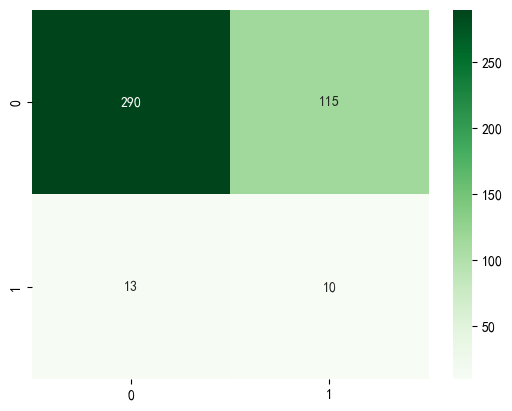

In [17]:
###pca-Smote-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_smote 和 y_train_smote 有相同的样本数量
print("x_train_smote shape:", x_train_smote.shape)
print("y_train_smote shape:", y_train_smote.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_smote.reshape((x_train_smote.shape[0], 1, x_train_smote.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_smote, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_smote_encoded = to_categorical(y_train_smote, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_smote)            # 输出原始标签
print(y_train_smote_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_smote, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s52_classes = model.predict(test_X1)
    y_pred_s52_classes = np.argmax(y_pred_s52_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s52_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s52_classes = model.predict(test_X1)
y_pred_s52_classes = np.argmax(y_pred_s52_classes, axis=1)
# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
#计算评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s52_classes)
precision = precision_score(y_test_spring_classes, y_pred_s52_classes, average='macro')
recall = recall_score(y_test_spring_classes, y_pred_s52_classes, average='macro')
f1 = f1_score(y_test_spring_classes, y_pred_s52_classes, average='macro')

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')
print(f'F1 Score (macro): {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s52_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_adasyn shape: (3020, 2)
y_train_adasyn shape: (3020,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (3020, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5922 - loss: 0.6774 - val_accuracy: 0.0000e+00 - val_loss: 0.8927
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6348 - loss: 0.6056 - val_accuracy: 0.5695 - val_loss: 0.8385
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 0.5673 - val_accuracy: 0.6904 - val_loss: 0.7890
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.5535 - val_accuracy: 0.6937 - val_loss: 0.8160
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.5646 - val_accuracy: 0.6705 - val_loss: 0.8656
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.5497 - val_accuracy: 0.7334 - val_loss: 0.8001
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.5625 - val_accuracy: 0.7301 - val_loss: 0.8066
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5574 - val_accuracy: 0.7533 - val_

2024/05/15 09:08:09 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6137 - loss: 0.6720 - val_accuracy: 0.0795 - val_loss: 0.8965
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6358 - loss: 0.5997 - val_accuracy: 0.5579 - val_loss: 0.8804
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5642 - val_accuracy: 0.6738 - val_loss: 0.8124
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6793 - loss: 0.5566 - val_accuracy: 0.7583 - val_loss: 0.7334
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.5685 - val_accuracy: 0.7550 - val_loss: 0.7538
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.5500 - val_accuracy: 0.7450 - val_loss: 0.7758
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.5488 - val_accuracy: 0.7566 - val_loss: 0.7601
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6721 - loss: 0.5565 - val_accuracy: 0.7285 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6047 - loss: 0.6814 - val_accuracy: 0.0000e+00 - val_loss: 0.8613
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 0.6289 - val_accuracy: 0.3825 - val_loss: 0.9202
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6556 - loss: 0.5824 - val_accuracy: 0.5695 - val_loss: 0.8693
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6624 - loss: 0.5699 - val_accuracy: 0.6854 - val_loss: 0.7840
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6792 - loss: 0.5563 - val_accuracy: 0.7103 - val_loss: 0.7910
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6926 - loss: 0.5392 - val_accuracy: 0.7533 - val_loss: 0.7577
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5619 - val_accuracy: 0.6937 - val_loss: 0.8001
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6943 - loss: 0.5522 - val_accuracy: 0.5646 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6526 - loss: 0.6763 - val_accuracy: 0.2368 - val_loss: 0.8424
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 0.6020 - val_accuracy: 0.5480 - val_loss: 0.8173
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6955 - loss: 0.5623 - val_accuracy: 0.6325 - val_loss: 0.8127
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6782 - loss: 0.5549 - val_accuracy: 0.6672 - val_loss: 0.8438
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.5509 - val_accuracy: 0.7136 - val_loss: 0.8059
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6720 - loss: 0.5561 - val_accuracy: 0.7152 - val_loss: 0.7903
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.5564 - val_accuracy: 0.7517 - val_loss: 0.7438
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6705 - loss: 0.5537 - val_accuracy: 0.6937 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5787 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.8745
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.6194 - val_accuracy: 0.4884 - val_loss: 0.8963
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - loss: 0.5784 - val_accuracy: 0.6606 - val_loss: 0.8126
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 0.5601 - val_accuracy: 0.7103 - val_loss: 0.8006
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6542 - loss: 0.5745 - val_accuracy: 0.6209 - val_loss: 0.9030
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5509 - val_accuracy: 0.7169 - val_loss: 0.7928
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 0.5650 - val_accuracy: 0.7301 - val_loss: 0.7799
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6804 - loss: 0.5536 - val_accuracy: 0.7136 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6397 - loss: 0.6772 - val_accuracy: 0.1175 - val_loss: 0.8314
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.6084 - val_accuracy: 0.5381 - val_loss: 0.8071
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.5672 - val_accuracy: 0.6076 - val_loss: 0.8184
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6746 - loss: 0.5660 - val_accuracy: 0.5497 - val_loss: 1.0054
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5695 - val_accuracy: 0.6904 - val_loss: 0.8342
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5440 - val_accuracy: 0.7235 - val_loss: 0.7930
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.5551 - val_accuracy: 0.6672 - val_loss: 0.8303
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5505 - val_accuracy: 0.6772 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5999 - loss: 0.6798 - val_accuracy: 0.0000e+00 - val_loss: 0.8595
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6262 - loss: 0.6131 - val_accuracy: 0.5563 - val_loss: 0.8122
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6769 - loss: 0.5660 - val_accuracy: 0.6209 - val_loss: 0.8166
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5570 - val_accuracy: 0.6573 - val_loss: 0.8456
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.5659 - val_accuracy: 0.6705 - val_loss: 0.8469
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.5528 - val_accuracy: 0.5546 - val_loss: 0.9357
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6723 - loss: 0.5555 - val_accuracy: 0.6639 - val_loss: 0.8559
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.5533 - val_accuracy: 0.6788 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6040 - loss: 0.6803 - val_accuracy: 0.0000e+00 - val_loss: 0.8758
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6185 - loss: 0.6222 - val_accuracy: 0.4619 - val_loss: 0.8776
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6629 - loss: 0.5790 - val_accuracy: 0.5960 - val_loss: 0.8490
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6775 - loss: 0.5597 - val_accuracy: 0.6507 - val_loss: 0.8183
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6696 - loss: 0.5596 - val_accuracy: 0.6871 - val_loss: 0.8305
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.5459 - val_accuracy: 0.7285 - val_loss: 0.7787
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6829 - loss: 0.5630 - val_accuracy: 0.6391 - val_loss: 0.8778
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6764 - loss: 0.5607 - val_accuracy: 0.6871 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5963 - loss: 0.6840 - val_accuracy: 0.0000e+00 - val_loss: 0.8038
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.6305 - val_accuracy: 0.4934 - val_loss: 0.8244
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.5799 - val_accuracy: 0.6954 - val_loss: 0.7693
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.5739 - val_accuracy: 0.6606 - val_loss: 0.8639
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.5509 - val_accuracy: 0.7384 - val_loss: 0.7832
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6661 - loss: 0.5626 - val_accuracy: 0.6954 - val_loss: 0.8376
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.5792 - val_accuracy: 0.6871 - val_loss: 0.8330
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.5439 - val_accuracy: 0.6722 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5807 - loss: 0.6836 - val_accuracy: 0.0000e+00 - val_loss: 0.8410
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6293 - loss: 0.6261 - val_accuracy: 0.4652 - val_loss: 0.8489
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.5749 - val_accuracy: 0.5960 - val_loss: 0.8516
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 0.5626 - val_accuracy: 0.6457 - val_loss: 0.8339
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6685 - loss: 0.5597 - val_accuracy: 0.7086 - val_loss: 0.8116
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.5492 - val_accuracy: 0.7533 - val_loss: 0.7622
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 0.5523 - val_accuracy: 0.7318 - val_loss: 0.8131
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.5422 - val_accuracy: 0.7583 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5847 - loss: 0.6758 - val_accuracy: 0.1275 - val_loss: 0.8709
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6338 - loss: 0.6107 - val_accuracy: 0.4652 - val_loss: 0.8907
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.5855 - val_accuracy: 0.5977 - val_loss: 0.8387
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5587 - val_accuracy: 0.6871 - val_loss: 0.7986
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5620 - val_accuracy: 0.5762 - val_loss: 0.8755
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.5504 - val_accuracy: 0.6838 - val_loss: 0.8263
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.5514 - val_accuracy: 0.6275 - val_loss: 0.8340
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.5446 - val_accuracy: 0.6970 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6153 - loss: 0.6775 - val_accuracy: 0.0000e+00 - val_loss: 0.9141
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6251 - loss: 0.6031 - val_accuracy: 0.5712 - val_loss: 0.8253
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6675 - loss: 0.5769 - val_accuracy: 0.6374 - val_loss: 0.8342
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.5523 - val_accuracy: 0.7020 - val_loss: 0.8054
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5557 - val_accuracy: 0.7036 - val_loss: 0.8084
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.5461 - val_accuracy: 0.7169 - val_loss: 0.7967
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6806 - loss: 0.5503 - val_accuracy: 0.7301 - val_loss: 0.7978
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.5423 - val_accuracy: 0.7252 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6297 - loss: 0.6808 - val_accuracy: 0.0000e+00 - val_loss: 0.8241
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 0.6234 - val_accuracy: 0.4785 - val_loss: 0.8440
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.5844 - val_accuracy: 0.5944 - val_loss: 0.8589
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.5564 - val_accuracy: 0.7202 - val_loss: 0.7710
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.5546 - val_accuracy: 0.7351 - val_loss: 0.7764
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6860 - loss: 0.5549 - val_accuracy: 0.7583 - val_loss: 0.7655
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.5483 - val_accuracy: 0.7036 - val_loss: 0.8332
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.5561 - val_accuracy: 0.7616 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5936 - loss: 0.6831 - val_accuracy: 0.0745 - val_loss: 0.8144
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 0.6307 - val_accuracy: 0.4073 - val_loss: 0.8843
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.5801 - val_accuracy: 0.5828 - val_loss: 0.7942
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5619 - val_accuracy: 0.6639 - val_loss: 0.7863
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.5597 - val_accuracy: 0.6440 - val_loss: 0.8399
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.5528 - val_accuracy: 0.7285 - val_loss: 0.7903
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.5550 - val_accuracy: 0.7301 - val_loss: 0.7690
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 0.5711 - val_accuracy: 0.6705 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5920 - loss: 0.6850 - val_accuracy: 0.0000e+00 - val_loss: 0.7962
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6327 - loss: 0.6330 - val_accuracy: 0.4603 - val_loss: 0.8432
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6640 - loss: 0.5811 - val_accuracy: 0.5695 - val_loss: 0.8684
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.5470 - val_accuracy: 0.6921 - val_loss: 0.7888
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 0.5636 - val_accuracy: 0.7152 - val_loss: 0.7968
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6668 - loss: 0.5689 - val_accuracy: 0.7086 - val_loss: 0.8147
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.5524 - val_accuracy: 0.7318 - val_loss: 0.7892
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.5391 - val_accuracy: 0.7401 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5749 - loss: 0.6818 - val_accuracy: 0.0364 - val_loss: 0.8672
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6322 - loss: 0.6236 - val_accuracy: 0.4652 - val_loss: 0.8695
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.5622 - val_accuracy: 0.7053 - val_loss: 0.7314
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.5638 - val_accuracy: 0.7301 - val_loss: 0.7547
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6726 - loss: 0.5627 - val_accuracy: 0.7318 - val_loss: 0.7636
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.5604 - val_accuracy: 0.6772 - val_loss: 0.8334
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5442 - val_accuracy: 0.7036 - val_loss: 0.8071
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.5479 - val_accuracy: 0.7202 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6144 - loss: 0.6773 - val_accuracy: 0.2401 - val_loss: 0.8234
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.6159 - val_accuracy: 0.5248 - val_loss: 0.8443
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5679 - val_accuracy: 0.7119 - val_loss: 0.7340
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5692 - val_accuracy: 0.6689 - val_loss: 0.8276
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5664 - val_accuracy: 0.5927 - val_loss: 0.9003
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.5622 - val_accuracy: 0.6904 - val_loss: 0.8250
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.5500 - val_accuracy: 0.6904 - val_loss: 0.7875
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6733 - loss: 0.5602 - val_accuracy: 0.6672 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5881 - loss: 0.6774 - val_accuracy: 0.0000e+00 - val_loss: 0.9307
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - loss: 0.6098 - val_accuracy: 0.5579 - val_loss: 0.8411
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.5712 - val_accuracy: 0.6904 - val_loss: 0.8090
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.5535 - val_accuracy: 0.7219 - val_loss: 0.8109
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 0.5722 - val_accuracy: 0.6937 - val_loss: 0.8510
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6769 - loss: 0.5604 - val_accuracy: 0.7467 - val_loss: 0.7916
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6694 - loss: 0.5629 - val_accuracy: 0.7020 - val_loss: 0.8518
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6678 - loss: 0.5696 - val_accuracy: 0.7152 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6282 - loss: 0.6789 - val_accuracy: 0.1623 - val_loss: 0.8446
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6406 - loss: 0.6117 - val_accuracy: 0.5381 - val_loss: 0.8096
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.5660 - val_accuracy: 0.6225 - val_loss: 0.7935
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.5615 - val_accuracy: 0.7483 - val_loss: 0.7362
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6758 - loss: 0.5541 - val_accuracy: 0.7616 - val_loss: 0.7419
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6928 - loss: 0.5557 - val_accuracy: 0.7517 - val_loss: 0.7931
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5457 - val_accuracy: 0.7566 - val_loss: 0.7669
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.5500 - val_accuracy: 0.7368 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6696 - loss: 0.6793 - val_accuracy: 0.1109 - val_loss: 0.8461
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6412 - loss: 0.6182 - val_accuracy: 0.4139 - val_loss: 0.9130
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.5722 - val_accuracy: 0.6010 - val_loss: 0.7590
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.5521 - val_accuracy: 0.7185 - val_loss: 0.7308
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.5508 - val_accuracy: 0.7301 - val_loss: 0.7476
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.5582 - val_accuracy: 0.6374 - val_loss: 0.8253
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - loss: 0.5531 - val_accuracy: 0.7268 - val_loss: 0.7723
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.5609 - val_accuracy: 0.7169 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6559 - loss: 0.6789 - val_accuracy: 0.1689 - val_loss: 0.8318
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6387 - loss: 0.6194 - val_accuracy: 0.4073 - val_loss: 0.9192
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6582 - loss: 0.5742 - val_accuracy: 0.5695 - val_loss: 0.8252
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - loss: 0.5574 - val_accuracy: 0.6209 - val_loss: 0.8401
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.5383 - val_accuracy: 0.7020 - val_loss: 0.8085
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.5634 - val_accuracy: 0.7517 - val_loss: 0.7514
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.5524 - val_accuracy: 0.7318 - val_loss: 0.7857
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.5607 - val_accuracy: 0.7268 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6107 - loss: 0.6787 - val_accuracy: 0.0000e+00 - val_loss: 0.8808
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.6183 - val_accuracy: 0.4851 - val_loss: 0.8817
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.5736 - val_accuracy: 0.6093 - val_loss: 0.8571
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6679 - loss: 0.5633 - val_accuracy: 0.6589 - val_loss: 0.8329
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6835 - loss: 0.5455 - val_accuracy: 0.7599 - val_loss: 0.7256
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6758 - loss: 0.5595 - val_accuracy: 0.6738 - val_loss: 0.8542
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.5530 - val_accuracy: 0.7119 - val_loss: 0.8079
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6864 - loss: 0.5608 - val_accuracy: 0.6970 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5569 - loss: 0.6827 - val_accuracy: 0.0579 - val_loss: 0.8267
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6219 - loss: 0.6219 - val_accuracy: 0.4387 - val_loss: 0.9041
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 0.5890 - val_accuracy: 0.5911 - val_loss: 0.8705
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5674 - val_accuracy: 0.6457 - val_loss: 0.8272
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6679 - loss: 0.5652 - val_accuracy: 0.7219 - val_loss: 0.7814
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.5559 - val_accuracy: 0.6738 - val_loss: 0.8495
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.5463 - val_accuracy: 0.7136 - val_loss: 0.7858
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - loss: 0.5583 - val_accuracy: 0.7119 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5971 - loss: 0.6787 - val_accuracy: 0.0381 - val_loss: 0.8739
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6281 - loss: 0.6105 - val_accuracy: 0.5364 - val_loss: 0.8455
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6810 - loss: 0.5623 - val_accuracy: 0.6772 - val_loss: 0.7813
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6741 - loss: 0.5603 - val_accuracy: 0.7334 - val_loss: 0.7427
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6682 - loss: 0.5528 - val_accuracy: 0.7483 - val_loss: 0.7686
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5694 - val_accuracy: 0.6821 - val_loss: 0.8416
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6920 - loss: 0.5520 - val_accuracy: 0.7003 - val_loss: 0.8229
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 0.5488 - val_accuracy: 0.6705 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5972 - loss: 0.6813 - val_accuracy: 0.0000e+00 - val_loss: 0.8911
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6356 - loss: 0.6179 - val_accuracy: 0.4437 - val_loss: 0.9057
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.5726 - val_accuracy: 0.6507 - val_loss: 0.7935
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.5424 - val_accuracy: 0.7417 - val_loss: 0.7574
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.5456 - val_accuracy: 0.7566 - val_loss: 0.7399
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.5509 - val_accuracy: 0.7351 - val_loss: 0.7939
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6775 - loss: 0.5593 - val_accuracy: 0.7285 - val_loss: 0.8001
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6783 - loss: 0.5531 - val_accuracy: 0.7036 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5909 - loss: 0.6793 - val_accuracy: 0.2036 - val_loss: 0.8276
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6495 - loss: 0.6148 - val_accuracy: 0.4553 - val_loss: 0.9156
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.5712 - val_accuracy: 0.6142 - val_loss: 0.8250
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5606 - val_accuracy: 0.7020 - val_loss: 0.7951
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.5525 - val_accuracy: 0.6987 - val_loss: 0.8200
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - loss: 0.5506 - val_accuracy: 0.7285 - val_loss: 0.7891
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.5573 - val_accuracy: 0.6424 - val_loss: 0.8602
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 0.5521 - val_accuracy: 0.6722 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6151 - loss: 0.6762 - val_accuracy: 0.0000e+00 - val_loss: 0.9072
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6060 - val_accuracy: 0.5315 - val_loss: 0.8981
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.5612 - val_accuracy: 0.6904 - val_loss: 0.8002
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.5652 - val_accuracy: 0.6805 - val_loss: 0.8456
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.5459 - val_accuracy: 0.7483 - val_loss: 0.7815
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.5458 - val_accuracy: 0.7566 - val_loss: 0.7530
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.5550 - val_accuracy: 0.7434 - val_loss: 0.8024
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.5631 - val_accuracy: 0.7219 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5791 - loss: 0.6814 - val_accuracy: 0.0000e+00 - val_loss: 0.8610
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6102 - loss: 0.6284 - val_accuracy: 0.4619 - val_loss: 0.8876
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6774 - loss: 0.5673 - val_accuracy: 0.5944 - val_loss: 0.8696
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6763 - loss: 0.5587 - val_accuracy: 0.6904 - val_loss: 0.8045
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6805 - loss: 0.5561 - val_accuracy: 0.7517 - val_loss: 0.7404
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6799 - loss: 0.5536 - val_accuracy: 0.6954 - val_loss: 0.8180
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.5482 - val_accuracy: 0.7318 - val_loss: 0.7710
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6735 - loss: 0.5556 - val_accuracy: 0.6672 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6195 - loss: 0.6730 - val_accuracy: 0.1391 - val_loss: 0.8922
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6385 - loss: 0.6024 - val_accuracy: 0.5679 - val_loss: 0.8322
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.5620 - val_accuracy: 0.6209 - val_loss: 0.8444
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5602 - val_accuracy: 0.6639 - val_loss: 0.8340
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5592 - val_accuracy: 0.7086 - val_loss: 0.8202
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.5555 - val_accuracy: 0.7103 - val_loss: 0.8185
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5400 - val_accuracy: 0.6854 - val_loss: 0.8186
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6890 - loss: 0.5457 - val_accuracy: 0.7152 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6138 - loss: 0.6690 - val_accuracy: 0.0977 - val_loss: 0.9229
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6440 - loss: 0.5962 - val_accuracy: 0.5480 - val_loss: 0.8988
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6722 - loss: 0.5735 - val_accuracy: 0.6904 - val_loss: 0.7937
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 0.5536 - val_accuracy: 0.7483 - val_loss: 0.7581
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.5485 - val_accuracy: 0.7169 - val_loss: 0.8090
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.5450 - val_accuracy: 0.7500 - val_loss: 0.7761
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5522 - val_accuracy: 0.7500 - val_loss: 0.7875
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5493 - val_accuracy: 0.7682 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6314 - loss: 0.6789 - val_accuracy: 0.1507 - val_loss: 0.8225
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 0.6215 - val_accuracy: 0.4685 - val_loss: 0.8331
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.5804 - val_accuracy: 0.5960 - val_loss: 0.8096
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6828 - loss: 0.5587 - val_accuracy: 0.6474 - val_loss: 0.8223
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6963 - loss: 0.5574 - val_accuracy: 0.6556 - val_loss: 0.8617
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 0.5558 - val_accuracy: 0.7086 - val_loss: 0.8126
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.5471 - val_accuracy: 0.6788 - val_loss: 0.8254
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.5468 - val_accuracy: 0.6639 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6131 - loss: 0.6811 - val_accuracy: 0.1954 - val_loss: 0.8213
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6435 - loss: 0.6140 - val_accuracy: 0.5646 - val_loss: 0.8090
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.5698 - val_accuracy: 0.6623 - val_loss: 0.8006
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.5580 - val_accuracy: 0.6556 - val_loss: 0.8530
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.5677 - val_accuracy: 0.7285 - val_loss: 0.8013
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.5579 - val_accuracy: 0.6788 - val_loss: 0.8355
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5356 - val_accuracy: 0.6672 - val_loss: 0.8203
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.5469 - val_accuracy: 0.7169 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5811 - loss: 0.6798 - val_accuracy: 0.0000e+00 - val_loss: 0.8721
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6312 - loss: 0.6181 - val_accuracy: 0.4983 - val_loss: 0.8778
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.5757 - val_accuracy: 0.6142 - val_loss: 0.8360
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.5471 - val_accuracy: 0.7169 - val_loss: 0.7728
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.5575 - val_accuracy: 0.7268 - val_loss: 0.7839
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.5560 - val_accuracy: 0.7301 - val_loss: 0.8017
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.5590 - val_accuracy: 0.6887 - val_loss: 0.8528
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.5640 - val_accuracy: 0.6921 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5911 - loss: 0.6729 - val_accuracy: 0.0000e+00 - val_loss: 0.8995
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 0.6080 - val_accuracy: 0.5596 - val_loss: 0.8650
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5751 - val_accuracy: 0.7185 - val_loss: 0.7697
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.5601 - val_accuracy: 0.7003 - val_loss: 0.8286
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5426 - val_accuracy: 0.7450 - val_loss: 0.7888
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.5636 - val_accuracy: 0.6887 - val_loss: 0.8625
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.5514 - val_accuracy: 0.7103 - val_loss: 0.8403
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.5534 - val_accuracy: 0.7368 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6325 - loss: 0.6763 - val_accuracy: 0.0000e+00 - val_loss: 0.8522
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6131 - val_accuracy: 0.5066 - val_loss: 0.8927
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.5725 - val_accuracy: 0.6639 - val_loss: 0.8249
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 0.5550 - val_accuracy: 0.6424 - val_loss: 0.8778
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7051 - loss: 0.5382 - val_accuracy: 0.7235 - val_loss: 0.8100
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6652 - loss: 0.5544 - val_accuracy: 0.6904 - val_loss: 0.8466
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6850 - loss: 0.5468 - val_accuracy: 0.7566 - val_loss: 0.7640
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6645 - loss: 0.5539 - val_accuracy: 0.7401 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5759 - loss: 0.6810 - val_accuracy: 0.0315 - val_loss: 0.8152
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6266 - loss: 0.6207 - val_accuracy: 0.4934 - val_loss: 0.8390
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6514 - loss: 0.5820 - val_accuracy: 0.5977 - val_loss: 0.8335
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.5907 - val_accuracy: 0.6242 - val_loss: 0.8683
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5499 - val_accuracy: 0.6854 - val_loss: 0.8240
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.5468 - val_accuracy: 0.7036 - val_loss: 0.8022
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.5561 - val_accuracy: 0.6209 - val_loss: 0.8630
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.5434 - val_accuracy: 0.6374 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5897 - loss: 0.6772 - val_accuracy: 0.0281 - val_loss: 0.9167
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 0.6079 - val_accuracy: 0.5695 - val_loss: 0.8079
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6918 - loss: 0.5589 - val_accuracy: 0.5927 - val_loss: 0.8892
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6762 - loss: 0.5663 - val_accuracy: 0.6722 - val_loss: 0.8304
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6692 - loss: 0.5543 - val_accuracy: 0.7202 - val_loss: 0.8115
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 0.5736 - val_accuracy: 0.7119 - val_loss: 0.8281
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5629 - val_accuracy: 0.7202 - val_loss: 0.8195
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.5530 - val_accuracy: 0.7599 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_37 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6556 - loss: 0.6795 - val_accuracy: 0.1010 - val_loss: 0.8349
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6356 - loss: 0.6184 - val_accuracy: 0.4586 - val_loss: 0.8636
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.5786 - val_accuracy: 0.5811 - val_loss: 0.8441
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.5651 - val_accuracy: 0.6325 - val_loss: 0.8363
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.5602 - val_accuracy: 0.6341 - val_loss: 0.8423
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.5462 - val_accuracy: 0.6921 - val_loss: 0.8210
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5454 - val_accuracy: 0.7136 - val_loss: 0.7939
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 0.5597 - val_accuracy: 0.7252 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6143 - loss: 0.6773 - val_accuracy: 0.0000e+00 - val_loss: 0.8932
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 0.6084 - val_accuracy: 0.5315 - val_loss: 0.8564
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6883 - loss: 0.5676 - val_accuracy: 0.6937 - val_loss: 0.7642
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6920 - loss: 0.5559 - val_accuracy: 0.7202 - val_loss: 0.7857
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.5562 - val_accuracy: 0.7252 - val_loss: 0.7959
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6755 - loss: 0.5653 - val_accuracy: 0.6821 - val_loss: 0.8390
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.5589 - val_accuracy: 0.7285 - val_loss: 0.7894
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6911 - loss: 0.5463 - val_accuracy: 0.6722 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_39 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5845 - loss: 0.6811 - val_accuracy: 0.0000e+00 - val_loss: 0.8641
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6259 - loss: 0.6230 - val_accuracy: 0.4934 - val_loss: 0.8517
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6834 - loss: 0.5709 - val_accuracy: 0.6209 - val_loss: 0.8207
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6749 - loss: 0.5727 - val_accuracy: 0.7202 - val_loss: 0.7705
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: 0.5574 - val_accuracy: 0.7434 - val_loss: 0.7660
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5516 - val_accuracy: 0.7550 - val_loss: 0.7539
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6766 - loss: 0.5605 - val_accuracy: 0.7003 - val_loss: 0.8443
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.5525 - val_accuracy: 0.6921 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6429 - loss: 0.6812 - val_accuracy: 0.0646 - val_loss: 0.8301
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6187 - loss: 0.6244 - val_accuracy: 0.4437 - val_loss: 0.9180
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.5710 - val_accuracy: 0.6291 - val_loss: 0.8130
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.5611 - val_accuracy: 0.6772 - val_loss: 0.8195
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6857 - loss: 0.5549 - val_accuracy: 0.6755 - val_loss: 0.8344
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5529 - val_accuracy: 0.6689 - val_loss: 0.8493
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.5578 - val_accuracy: 0.6606 - val_loss: 0.8440
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6770 - loss: 0.5579 - val_accuracy: 0.7301 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6043 - loss: 0.6755 - val_accuracy: 0.0000e+00 - val_loss: 0.9471
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 0.6195 - val_accuracy: 0.5182 - val_loss: 0.9237
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6511 - loss: 0.5837 - val_accuracy: 0.6921 - val_loss: 0.8005
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6806 - loss: 0.5547 - val_accuracy: 0.7202 - val_loss: 0.7882
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5587 - val_accuracy: 0.7616 - val_loss: 0.7451
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.5598 - val_accuracy: 0.7169 - val_loss: 0.8241
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5575 - val_accuracy: 0.6904 - val_loss: 0.8361
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6634 - loss: 0.5696 - val_accuracy: 0.7500 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6025 - loss: 0.6812 - val_accuracy: 0.0000e+00 - val_loss: 0.8744
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 0.6249 - val_accuracy: 0.5066 - val_loss: 0.8562
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 0.5697 - val_accuracy: 0.5944 - val_loss: 0.8901
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6675 - loss: 0.5662 - val_accuracy: 0.7103 - val_loss: 0.7819
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.5671 - val_accuracy: 0.7103 - val_loss: 0.8166
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.5596 - val_accuracy: 0.7020 - val_loss: 0.8426
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - loss: 0.5650 - val_accuracy: 0.7434 - val_loss: 0.7949
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.5603 - val_accuracy: 0.7169 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_43 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6495 - loss: 0.6753 - val_accuracy: 0.1738 - val_loss: 0.8580
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6328 - loss: 0.6091 - val_accuracy: 0.5596 - val_loss: 0.7936
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.5700 - val_accuracy: 0.6391 - val_loss: 0.7921
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5677 - val_accuracy: 0.6689 - val_loss: 0.8221
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.5542 - val_accuracy: 0.7185 - val_loss: 0.7819
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 0.5685 - val_accuracy: 0.6954 - val_loss: 0.8163
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5602 - val_accuracy: 0.6854 - val_loss: 0.8171
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6590 - loss: 0.5674 - val_accuracy: 0.6424 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6381 - loss: 0.6775 - val_accuracy: 0.0000e+00 - val_loss: 0.8777
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5967 - loss: 0.6214 - val_accuracy: 0.4172 - val_loss: 0.9587
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6726 - loss: 0.5725 - val_accuracy: 0.6738 - val_loss: 0.8443
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6937 - loss: 0.5502 - val_accuracy: 0.7550 - val_loss: 0.7681
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.5562 - val_accuracy: 0.7566 - val_loss: 0.7697
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.5593 - val_accuracy: 0.7533 - val_loss: 0.8008
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.5483 - val_accuracy: 0.7517 - val_loss: 0.8090
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.5618 - val_accuracy: 0.7483 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6188 - loss: 0.6779 - val_accuracy: 0.0662 - val_loss: 0.8709
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.6083 - val_accuracy: 0.5381 - val_loss: 0.8520
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.5650 - val_accuracy: 0.6457 - val_loss: 0.8119
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5487 - val_accuracy: 0.7533 - val_loss: 0.7372
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.5587 - val_accuracy: 0.7285 - val_loss: 0.7937
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6637 - loss: 0.5698 - val_accuracy: 0.7351 - val_loss: 0.7992
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.5595 - val_accuracy: 0.7285 - val_loss: 0.8070
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - loss: 0.5528 - val_accuracy: 0.7202 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6316 - loss: 0.6810 - val_accuracy: 0.1722 - val_loss: 0.8013
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.6278 - val_accuracy: 0.4205 - val_loss: 0.8901
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6558 - loss: 0.5853 - val_accuracy: 0.5712 - val_loss: 0.8640
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.5632 - val_accuracy: 0.6192 - val_loss: 0.8630
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.5721 - val_accuracy: 0.6556 - val_loss: 0.8598
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6837 - loss: 0.5538 - val_accuracy: 0.7152 - val_loss: 0.7925
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6802 - loss: 0.5453 - val_accuracy: 0.7318 - val_loss: 0.7611
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6589 - loss: 0.5715 - val_accuracy: 0.6788 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_47 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6132 - loss: 0.6760 - val_accuracy: 0.0000e+00 - val_loss: 0.8992
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6353 - loss: 0.6102 - val_accuracy: 0.5712 - val_loss: 0.8133
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5696 - val_accuracy: 0.7020 - val_loss: 0.7783
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5563 - val_accuracy: 0.7301 - val_loss: 0.7772
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.5483 - val_accuracy: 0.7434 - val_loss: 0.7742
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5508 - val_accuracy: 0.7417 - val_loss: 0.7876
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.5529 - val_accuracy: 0.7169 - val_loss: 0.7986
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.5496 - val_accuracy: 0.7401 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_144 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6145 - loss: 0.6764 - val_accuracy: 0.0563 - val_loss: 0.8729
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6266 - loss: 0.6078 - val_accuracy: 0.5745 - val_loss: 0.7665
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 0.5834 - val_accuracy: 0.5911 - val_loss: 0.8660
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.5605 - val_accuracy: 0.6606 - val_loss: 0.8309
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 0.5518 - val_accuracy: 0.7401 - val_loss: 0.7454
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.5565 - val_accuracy: 0.6573 - val_loss: 0.8437
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6931 - loss: 0.5399 - val_accuracy: 0.7334 - val_loss: 0.7569
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.5478 - val_accuracy: 0.7036 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5735 - loss: 0.6819 - val_accuracy: 0.0000e+00 - val_loss: 0.8494
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 0.6263 - val_accuracy: 0.4123 - val_loss: 0.9263
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.5833 - val_accuracy: 0.5944 - val_loss: 0.8687
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6793 - loss: 0.5609 - val_accuracy: 0.7169 - val_loss: 0.7889
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6877 - loss: 0.5456 - val_accuracy: 0.6904 - val_loss: 0.8333
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6768 - loss: 0.5493 - val_accuracy: 0.7616 - val_loss: 0.7422
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.5640 - val_accuracy: 0.6954 - val_loss: 0.8443
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.5523 - val_accuracy: 0.6308 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6087 - loss: 0.6745 - val_accuracy: 0.0000e+00 - val_loss: 0.9155
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6111 - loss: 0.6080 - val_accuracy: 0.5662 - val_loss: 0.8803
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.5594 - val_accuracy: 0.6821 - val_loss: 0.8174
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.5627 - val_accuracy: 0.7136 - val_loss: 0.8070
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.5690 - val_accuracy: 0.7053 - val_loss: 0.8337
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.5716 - val_accuracy: 0.7434 - val_loss: 0.7838
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5409 - val_accuracy: 0.7566 - val_loss: 0.7570
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.5631 - val_accuracy: 0.6821 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_51 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6044 - loss: 0.6848 - val_accuracy: 0.1490 - val_loss: 0.7819
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.6291 - val_accuracy: 0.4917 - val_loss: 0.8022
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5784 - val_accuracy: 0.5911 - val_loss: 0.8297
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 0.5501 - val_accuracy: 0.7136 - val_loss: 0.7694
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.5539 - val_accuracy: 0.6556 - val_loss: 0.8753
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 0.5511 - val_accuracy: 0.6705 - val_loss: 0.8430
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6744 - loss: 0.5618 - val_accuracy: 0.7235 - val_loss: 0.8021
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 0.5731 - val_accuracy: 0.6954 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6146 - loss: 0.6809 - val_accuracy: 0.1242 - val_loss: 0.8001
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.6184 - val_accuracy: 0.5430 - val_loss: 0.8049
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.5697 - val_accuracy: 0.6142 - val_loss: 0.8211
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.5533 - val_accuracy: 0.7152 - val_loss: 0.7792
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6725 - loss: 0.5581 - val_accuracy: 0.7318 - val_loss: 0.7777
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.5536 - val_accuracy: 0.6623 - val_loss: 0.8626
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.5643 - val_accuracy: 0.6871 - val_loss: 0.8505
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 0.5536 - val_accuracy: 0.6738 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5793 - loss: 0.6808 - val_accuracy: 0.2086 - val_loss: 0.8215
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.6219 - val_accuracy: 0.4901 - val_loss: 0.8773
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - loss: 0.5654 - val_accuracy: 0.5960 - val_loss: 0.8476
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6691 - loss: 0.5636 - val_accuracy: 0.6175 - val_loss: 0.8551
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.5604 - val_accuracy: 0.7119 - val_loss: 0.7869
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.5601 - val_accuracy: 0.7119 - val_loss: 0.8147
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.5630 - val_accuracy: 0.7517 - val_loss: 0.7527
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6680 - loss: 0.5651 - val_accuracy: 0.7103 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_54 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5853 - loss: 0.6820 - val_accuracy: 0.1821 - val_loss: 0.8197
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6409 - loss: 0.6190 - val_accuracy: 0.4917 - val_loss: 0.8801
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.5792 - val_accuracy: 0.5877 - val_loss: 0.8824
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.5516 - val_accuracy: 0.6755 - val_loss: 0.8067
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.5602 - val_accuracy: 0.6623 - val_loss: 0.8663
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - loss: 0.5589 - val_accuracy: 0.6887 - val_loss: 0.8291
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.5575 - val_accuracy: 0.6954 - val_loss: 0.8265
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 0.5747 - val_accuracy: 0.7136 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6041 - loss: 0.6810 - val_accuracy: 0.0000e+00 - val_loss: 0.8966
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.6177 - val_accuracy: 0.5265 - val_loss: 0.8649
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.5578 - val_accuracy: 0.7301 - val_loss: 0.7472
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.5463 - val_accuracy: 0.7616 - val_loss: 0.7358
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - loss: 0.5612 - val_accuracy: 0.7417 - val_loss: 0.7911
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.5515 - val_accuracy: 0.7632 - val_loss: 0.7386
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - loss: 0.5611 - val_accuracy: 0.7616 - val_loss: 0.7511
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6828 - loss: 0.5509 - val_accuracy: 0.7616 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_168 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6221 - loss: 0.6796 - val_accuracy: 0.1341 - val_loss: 0.8224
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6322 - loss: 0.6254 - val_accuracy: 0.4139 - val_loss: 0.8894
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.5742 - val_accuracy: 0.5960 - val_loss: 0.7780
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.5718 - val_accuracy: 0.6010 - val_loss: 0.8620
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5644 - val_accuracy: 0.6937 - val_loss: 0.7889
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6778 - loss: 0.5644 - val_accuracy: 0.7103 - val_loss: 0.7945
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6713 - loss: 0.5575 - val_accuracy: 0.6821 - val_loss: 0.8168
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6746 - loss: 0.5533 - val_accuracy: 0.7020 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_57 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6105 - loss: 0.6816 - val_accuracy: 0.1407 - val_loss: 0.8224
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6338 - loss: 0.6244 - val_accuracy: 0.4023 - val_loss: 0.9135
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.5862 - val_accuracy: 0.5381 - val_loss: 0.8795
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.5461 - val_accuracy: 0.7119 - val_loss: 0.7711
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5522 - val_accuracy: 0.7533 - val_loss: 0.7408
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.5637 - val_accuracy: 0.6805 - val_loss: 0.8319
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 0.5381 - val_accuracy: 0.5480 - val_loss: 0.8153
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.5516 - val_accuracy: 0.7070 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6210 - loss: 0.6771 - val_accuracy: 0.0695 - val_loss: 0.8726
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6142 - loss: 0.6150 - val_accuracy: 0.4851 - val_loss: 0.8777
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6654 - loss: 0.5792 - val_accuracy: 0.5927 - val_loss: 0.8715
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.5672 - val_accuracy: 0.6192 - val_loss: 0.8677
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.5624 - val_accuracy: 0.6755 - val_loss: 0.8226
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.5655 - val_accuracy: 0.7450 - val_loss: 0.7571
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 0.5559 - val_accuracy: 0.6887 - val_loss: 0.8345
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.5634 - val_accuracy: 0.7219 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_59 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6340 - loss: 0.6819 - val_accuracy: 0.0728 - val_loss: 0.8075
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.6251 - val_accuracy: 0.4818 - val_loss: 0.7990
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.5782 - val_accuracy: 0.5695 - val_loss: 0.8021
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.5636 - val_accuracy: 0.5977 - val_loss: 0.8410
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.5570 - val_accuracy: 0.7533 - val_loss: 0.7267
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.5590 - val_accuracy: 0.6755 - val_loss: 0.8337
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.5500 - val_accuracy: 0.7616 - val_loss: 0.7547
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5541 - val_accuracy: 0.7550 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6064 - loss: 0.6770 - val_accuracy: 0.0000e+00 - val_loss: 0.8963
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6321 - loss: 0.6123 - val_accuracy: 0.5646 - val_loss: 0.8314
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.5729 - val_accuracy: 0.6904 - val_loss: 0.7709
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 0.5627 - val_accuracy: 0.7185 - val_loss: 0.7840
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.5586 - val_accuracy: 0.6722 - val_loss: 0.8554
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.5603 - val_accuracy: 0.7318 - val_loss: 0.7980
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.5554 - val_accuracy: 0.7334 - val_loss: 0.7925
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5515 - val_accuracy: 0.7450 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6072 - loss: 0.6805 - val_accuracy: 0.0000e+00 - val_loss: 0.8720
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6341 - loss: 0.6171 - val_accuracy: 0.5265 - val_loss: 0.8342
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.5637 - val_accuracy: 0.6689 - val_loss: 0.7722
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.5684 - val_accuracy: 0.7185 - val_loss: 0.7691
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - loss: 0.5649 - val_accuracy: 0.6573 - val_loss: 0.8429
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.5564 - val_accuracy: 0.6838 - val_loss: 0.8207
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5518 - val_accuracy: 0.6755 - val_loss: 0.8339
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.5601 - val_accuracy: 0.7070 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                       │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5987 - loss: 0.6719 - val_accuracy: 0.0132 - val_loss: 0.9585
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6257 - loss: 0.6091 - val_accuracy: 0.5199 - val_loss: 0.9034
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6794 - loss: 0.5651 - val_accuracy: 0.7086 - val_loss: 0.7654
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.5569 - val_accuracy: 0.7318 - val_loss: 0.7522
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.5652 - val_accuracy: 0.7301 - val_loss: 0.7747
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - loss: 0.5753 - val_accuracy: 0.7334 - val_loss: 0.7911
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: 0.5524 - val_accuracy: 0.7434 - val_loss: 0.7848
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.5492 - val_accuracy: 0.7533 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_63 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6179 - loss: 0.6774 - val_accuracy: 0.1242 - val_loss: 0.8477
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 0.6186 - val_accuracy: 0.4570 - val_loss: 0.9094
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6640 - loss: 0.5769 - val_accuracy: 0.5430 - val_loss: 0.9313
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.5737 - val_accuracy: 0.6043 - val_loss: 0.8695
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.5545 - val_accuracy: 0.6424 - val_loss: 0.8400
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6689 - loss: 0.5597 - val_accuracy: 0.6838 - val_loss: 0.8146
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.5651 - val_accuracy: 0.6209 - val_loss: 0.8607
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5516 - val_accuracy: 0.6738 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6296 - loss: 0.6807 - val_accuracy: 0.0728 - val_loss: 0.8499
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.6191 - val_accuracy: 0.5215 - val_loss: 0.8137
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.5667 - val_accuracy: 0.7334 - val_loss: 0.6767
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.5773 - val_accuracy: 0.6871 - val_loss: 0.8035
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.5652 - val_accuracy: 0.6921 - val_loss: 0.8185
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.5381 - val_accuracy: 0.6391 - val_loss: 0.8642
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5459 - val_accuracy: 0.7351 - val_loss: 0.7637
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5554 - val_accuracy: 0.7334 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_65 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6200 - loss: 0.6791 - val_accuracy: 0.0000e+00 - val_loss: 0.8918
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6231 - loss: 0.6149 - val_accuracy: 0.5033 - val_loss: 0.9091
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5714 - val_accuracy: 0.6490 - val_loss: 0.8385
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.5585 - val_accuracy: 0.7334 - val_loss: 0.7680
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6793 - loss: 0.5619 - val_accuracy: 0.7285 - val_loss: 0.7936
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6593 - loss: 0.5659 - val_accuracy: 0.7252 - val_loss: 0.8025
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 0.5570 - val_accuracy: 0.7219 - val_loss: 0.7941
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6913 - loss: 0.5531 - val_accuracy: 0.6904 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_66 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6159 - loss: 0.6833 - val_accuracy: 0.0017 - val_loss: 0.8350
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6141 - loss: 0.6307 - val_accuracy: 0.3907 - val_loss: 0.9551
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.5875 - val_accuracy: 0.6126 - val_loss: 0.8175
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6789 - loss: 0.5587 - val_accuracy: 0.6606 - val_loss: 0.8195
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.5474 - val_accuracy: 0.7185 - val_loss: 0.8001
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.5616 - val_accuracy: 0.7152 - val_loss: 0.8161
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.5458 - val_accuracy: 0.7417 - val_loss: 0.7980
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6704 - loss: 0.5578 - val_accuracy: 0.7368 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_67 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6223 - loss: 0.6838 - val_accuracy: 0.0596 - val_loss: 0.8233
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 0.6307 - val_accuracy: 0.4123 - val_loss: 0.8560
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.5851 - val_accuracy: 0.5579 - val_loss: 0.8472
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 0.5751 - val_accuracy: 0.6242 - val_loss: 0.8144
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5568 - val_accuracy: 0.6987 - val_loss: 0.7949
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.5661 - val_accuracy: 0.6722 - val_loss: 0.8414
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6720 - loss: 0.5509 - val_accuracy: 0.6722 - val_loss: 0.8595
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5431 - val_accuracy: 0.7450 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5825 - loss: 0.6716 - val_accuracy: 0.0977 - val_loss: 0.9222
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 0.6046 - val_accuracy: 0.5695 - val_loss: 0.8385
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5650 - val_accuracy: 0.6192 - val_loss: 0.8498
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5456 - val_accuracy: 0.6556 - val_loss: 0.8378
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5645 - val_accuracy: 0.6374 - val_loss: 0.8641
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.5656 - val_accuracy: 0.7136 - val_loss: 0.7875
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5549 - val_accuracy: 0.7119 - val_loss: 0.7825
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.5451 - val_accuracy: 0.7136 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6108 - loss: 0.6786 - val_accuracy: 0.0050 - val_loss: 0.8803
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.6130 - val_accuracy: 0.4834 - val_loss: 0.8818
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6901 - loss: 0.5683 - val_accuracy: 0.6126 - val_loss: 0.8460
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 0.5668 - val_accuracy: 0.7301 - val_loss: 0.7779
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6686 - loss: 0.5582 - val_accuracy: 0.6854 - val_loss: 0.8513
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5524 - val_accuracy: 0.7252 - val_loss: 0.7916
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5440 - val_accuracy: 0.7318 - val_loss: 0.7789
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.5549 - val_accuracy: 0.7285 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_70 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6231 - loss: 0.6783 - val_accuracy: 0.2103 - val_loss: 0.8324
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6470 - loss: 0.6103 - val_accuracy: 0.4702 - val_loss: 0.9331
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.5690 - val_accuracy: 0.6407 - val_loss: 0.8091
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.5773 - val_accuracy: 0.6606 - val_loss: 0.8414
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5516 - val_accuracy: 0.6987 - val_loss: 0.8146
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.5684 - val_accuracy: 0.7053 - val_loss: 0.8140
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5631 - val_accuracy: 0.7020 - val_loss: 0.8090
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.5565 - val_accuracy: 0.7334 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_71 (LSTM)                       │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6147 - loss: 0.6788 - val_accuracy: 0.1142 - val_loss: 0.8718
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.6133 - val_accuracy: 0.5281 - val_loss: 0.8265
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.5835 - val_accuracy: 0.6457 - val_loss: 0.7857
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.5565 - val_accuracy: 0.7252 - val_loss: 0.7563
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5486 - val_accuracy: 0.7566 - val_loss: 0.7360
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.5608 - val_accuracy: 0.6921 - val_loss: 0.8306
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.5590 - val_accuracy: 0.7467 - val_loss: 0.7592
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.5466 - val_accuracy: 0.6705 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6116 - loss: 0.6820 - val_accuracy: 0.1507 - val_loss: 0.7898
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 0.6253 - val_accuracy: 0.5497 - val_loss: 0.7816
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.5588 - val_accuracy: 0.6987 - val_loss: 0.7391
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5645 - val_accuracy: 0.7169 - val_loss: 0.7767
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5616 - val_accuracy: 0.6788 - val_loss: 0.8372
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.5629 - val_accuracy: 0.7070 - val_loss: 0.8237
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.5595 - val_accuracy: 0.6672 - val_loss: 0.8463
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.5591 - val_accuracy: 0.7036 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_73 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6229 - loss: 0.6767 - val_accuracy: 0.0116 - val_loss: 0.8524
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6267 - loss: 0.6142 - val_accuracy: 0.5281 - val_loss: 0.8484
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 0.5618 - val_accuracy: 0.6291 - val_loss: 0.8100
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.5739 - val_accuracy: 0.6937 - val_loss: 0.8065
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 0.5499 - val_accuracy: 0.6854 - val_loss: 0.8414
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6971 - loss: 0.5371 - val_accuracy: 0.7252 - val_loss: 0.7859
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.5533 - val_accuracy: 0.6672 - val_loss: 0.8522
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.5528 - val_accuracy: 0.6854 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6205 - loss: 0.6837 - val_accuracy: 0.0116 - val_loss: 0.8044
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 0.6312 - val_accuracy: 0.4288 - val_loss: 0.8702
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - loss: 0.5701 - val_accuracy: 0.5844 - val_loss: 0.8569
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5499 - val_accuracy: 0.7252 - val_loss: 0.7641
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.5570 - val_accuracy: 0.7252 - val_loss: 0.7875
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 0.5604 - val_accuracy: 0.7301 - val_loss: 0.8034
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.5404 - val_accuracy: 0.6921 - val_loss: 0.8116
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.5651 - val_accuracy: 0.7599 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_75 (LSTM)                       │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,010 (62.54 KB)

 Trainable params: 16,010 (62.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6384 - loss: 0.6759 - val_accuracy: 0.2036 - val_loss: 0.8463
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6495 - loss: 0.6105 - val_accuracy: 0.5397 - val_loss: 0.8633
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.5576 - val_accuracy: 0.6474 - val_loss: 0.8156
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6821 - loss: 0.5635 - val_accuracy: 0.6887 - val_loss: 0.8296
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.5593 - val_accuracy: 0.6209 - val_loss: 0.8829
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6769 - loss: 0.5584 - val_accuracy: 0.6871 - val_loss: 0.8222
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.5507 - val_accuracy: 0.6921 - val_loss: 0.7984
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6791 - loss: 0.5527 - val_accuracy: 0.6904 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_76 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6350 - loss: 0.6765 - val_accuracy: 0.1507 - val_loss: 0.8670
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6341 - loss: 0.6117 - val_accuracy: 0.5464 - val_loss: 0.8449
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 0.5713 - val_accuracy: 0.7202 - val_loss: 0.7450
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 0.5585 - val_accuracy: 0.6821 - val_loss: 0.8224
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.5491 - val_accuracy: 0.7318 - val_loss: 0.7812
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - loss: 0.5595 - val_accuracy: 0.6705 - val_loss: 0.8597
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.5620 - val_accuracy: 0.7053 - val_loss: 0.8177
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - loss: 0.5471 - val_accuracy: 0.7434 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_77 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6089 - loss: 0.6843 - val_accuracy: 0.0000e+00 - val_loss: 0.8052
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.6318 - val_accuracy: 0.4652 - val_loss: 0.8206
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6635 - loss: 0.5830 - val_accuracy: 0.5977 - val_loss: 0.8185
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 0.5697 - val_accuracy: 0.6325 - val_loss: 0.8394
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.5597 - val_accuracy: 0.6457 - val_loss: 0.8601
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.5560 - val_accuracy: 0.7003 - val_loss: 0.7941
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.5418 - val_accuracy: 0.7202 - val_loss: 0.7732
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - loss: 0.5529 - val_accuracy: 0.7252 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6073 - loss: 0.6852 - val_accuracy: 0.0795 - val_loss: 0.8013
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.6355 - val_accuracy: 0.4338 - val_loss: 0.8636
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.5770 - val_accuracy: 0.6126 - val_loss: 0.7882
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 0.5648 - val_accuracy: 0.6788 - val_loss: 0.8000
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - loss: 0.5564 - val_accuracy: 0.7517 - val_loss: 0.7458
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6810 - loss: 0.5511 - val_accuracy: 0.7086 - val_loss: 0.8120
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - loss: 0.5555 - val_accuracy: 0.7219 - val_loss: 0.8113
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.5489 - val_accuracy: 0.6854 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_79 (LSTM)                       │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5899 - loss: 0.6779 - val_accuracy: 0.1639 - val_loss: 0.8558
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6313 - loss: 0.6149 - val_accuracy: 0.4834 - val_loss: 0.8900
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.5644 - val_accuracy: 0.5927 - val_loss: 0.8792
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.5635 - val_accuracy: 0.6871 - val_loss: 0.8121
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5606 - val_accuracy: 0.7219 - val_loss: 0.7806
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.5533 - val_accuracy: 0.7434 - val_loss: 0.7707
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.5590 - val_accuracy: 0.6656 - val_loss: 0.8541
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5632 - val_accuracy: 0.6705 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5847 - loss: 0.6795 - val_accuracy: 0.0728 - val_loss: 0.8722
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6440 - loss: 0.6098 - val_accuracy: 0.5596 - val_loss: 0.7957
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.5745 - val_accuracy: 0.7070 - val_loss: 0.7380
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6787 - loss: 0.5659 - val_accuracy: 0.6738 - val_loss: 0.7897
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.5507 - val_accuracy: 0.6788 - val_loss: 0.8142
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.5603 - val_accuracy: 0.6275 - val_loss: 0.8554
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5517 - val_accuracy: 0.6656 - val_loss: 0.8249
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.5544 - val_accuracy: 0.6887 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_81 (LSTM)                       │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5955 - loss: 0.6777 - val_accuracy: 0.0000e+00 - val_loss: 0.8850
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.6084 - val_accuracy: 0.5281 - val_loss: 0.8866
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 0.5686 - val_accuracy: 0.6672 - val_loss: 0.8020
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5622 - val_accuracy: 0.7351 - val_loss: 0.7884
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.5589 - val_accuracy: 0.6838 - val_loss: 0.8709
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.5649 - val_accuracy: 0.7334 - val_loss: 0.8132
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.5532 - val_accuracy: 0.7417 - val_loss: 0.8052
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.5498 - val_accuracy: 0.6838 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                       │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6306 - loss: 0.6748 - val_accuracy: 0.2318 - val_loss: 0.8766
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6532 - loss: 0.6002 - val_accuracy: 0.5679 - val_loss: 0.8446
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5582 - val_accuracy: 0.7020 - val_loss: 0.7691
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5527 - val_accuracy: 0.6772 - val_loss: 0.8152
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6867 - loss: 0.5428 - val_accuracy: 0.7301 - val_loss: 0.7617
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.5617 - val_accuracy: 0.7301 - val_loss: 0.7733
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.5464 - val_accuracy: 0.7053 - val_loss: 0.8060
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5564 - val_accuracy: 0.6490 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_83 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6024 - loss: 0.6800 - val_accuracy: 0.0679 - val_loss: 0.8370
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6045 - loss: 0.6308 - val_accuracy: 0.3874 - val_loss: 0.9446
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.5790 - val_accuracy: 0.5662 - val_loss: 0.8875
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.5669 - val_accuracy: 0.6175 - val_loss: 0.8610
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5475 - val_accuracy: 0.7169 - val_loss: 0.7777
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6732 - loss: 0.5622 - val_accuracy: 0.7152 - val_loss: 0.8232
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 0.5556 - val_accuracy: 0.7434 - val_loss: 0.7853
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.5470 - val_accuracy: 0.7417 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6083 - loss: 0.6801 - val_accuracy: 0.1821 - val_loss: 0.8202
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6425 - loss: 0.6115 - val_accuracy: 0.5397 - val_loss: 0.7948
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5701 - val_accuracy: 0.6126 - val_loss: 0.7984
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6877 - loss: 0.5510 - val_accuracy: 0.6573 - val_loss: 0.8315
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.5553 - val_accuracy: 0.7285 - val_loss: 0.7993
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.5539 - val_accuracy: 0.7136 - val_loss: 0.8032
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.5472 - val_accuracy: 0.6937 - val_loss: 0.8347
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.5416 - val_accuracy: 0.7103 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_85 (LSTM)                       │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6269 - loss: 0.6722 - val_accuracy: 0.0000e+00 - val_loss: 0.9050
Epoch 2/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 0.6038 - val_accuracy: 0.5397 - val_loss: 0.8785
Epoch 3/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.5681 - val_accuracy: 0.6573 - val_loss: 0.8280
Epoch 4/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.5512 - val_accuracy: 0.7301 - val_loss: 0.7561
Epoch 5/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.5592 - val_accuracy: 0.7301 - val_loss: 0.7620
Epoch 6/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.5572 - val_accuracy: 0.7301 - val_loss: 0.7509
Epoch 7/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.5521 - val_accuracy: 0.6209 - val_loss: 0.8535
Epoch 8/13
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6806 - loss: 0.5491 - val_accuracy: 0.6209 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_86 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_260 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5779 - loss: 0.6822 - val_accuracy: 0.0000e+00 - val_loss: 0.8448
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6269 - loss: 0.6229 - val_accuracy: 0.4586 - val_loss: 0.8770
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6648 - loss: 0.5730 - val_accuracy: 0.6142 - val_loss: 0.8058
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6664 - loss: 0.5707 - val_accuracy: 0.6589 - val_loss: 0.8251
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5452 - val_accuracy: 0.7219 - val_loss: 0.7893
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.5628 - val_accuracy: 0.7086 - val_loss: 0.8088
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6773 - loss: 0.5659 - val_accuracy: 0.7334 - val_loss: 0.7736
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 0.5520 - val_accuracy: 0.6010 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_87 (LSTM)                       │ (None, 50)                  │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,010 (62.54 KB)

 Trainable params: 16,010 (62.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5985 - loss: 0.6849 - val_accuracy: 0.1325 - val_loss: 0.7830
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 0.6302 - val_accuracy: 0.4801 - val_loss: 0.8331
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6668 - loss: 0.5831 - val_accuracy: 0.5877 - val_loss: 0.8534
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6640 - loss: 0.5723 - val_accuracy: 0.6689 - val_loss: 0.8195
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 0.5611 - val_accuracy: 0.7053 - val_loss: 0.8262
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.5638 - val_accuracy: 0.6755 - val_loss: 0.8387
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.5610 - val_accuracy: 0.7020 - val_loss: 0.8191
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5573 - val_accuracy: 0.6093 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_88 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_264 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6312 - loss: 0.6748 - val_accuracy: 0.0679 - val_loss: 0.8820
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 0.6102 - val_accuracy: 0.5232 - val_loss: 0.8898
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5639 - val_accuracy: 0.5993 - val_loss: 0.8729
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6692 - loss: 0.5745 - val_accuracy: 0.6109 - val_loss: 0.8810
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.5678 - val_accuracy: 0.6672 - val_loss: 0.8264
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6723 - loss: 0.5614 - val_accuracy: 0.6970 - val_loss: 0.7999
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6769 - loss: 0.5454 - val_accuracy: 0.7450 - val_loss: 0.7602
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6804 - loss: 0.5525 - val_accuracy: 0.6606 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_89 (LSTM)                       │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6048 - loss: 0.6804 - val_accuracy: 0.2384 - val_loss: 0.7949
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 0.6148 - val_accuracy: 0.5066 - val_loss: 0.8534
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6685 - loss: 0.5732 - val_accuracy: 0.6109 - val_loss: 0.8475
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 0.5639 - val_accuracy: 0.6060 - val_loss: 0.9369
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5602 - val_accuracy: 0.7219 - val_loss: 0.8018
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.5502 - val_accuracy: 0.7285 - val_loss: 0.8015
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.5530 - val_accuracy: 0.7003 - val_loss: 0.8195
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5571 - val_accuracy: 0.7417 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_90 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5902 - loss: 0.6807 - val_accuracy: 0.0000e+00 - val_loss: 0.8485
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6176 - loss: 0.6207 - val_accuracy: 0.4603 - val_loss: 0.8723
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.5682 - val_accuracy: 0.5944 - val_loss: 0.8530
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.5728 - val_accuracy: 0.7301 - val_loss: 0.7520
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.5530 - val_accuracy: 0.7036 - val_loss: 0.8335
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5528 - val_accuracy: 0.6954 - val_loss: 0.8375
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5517 - val_accuracy: 0.6656 - val_loss: 0.8403
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.5490 - val_accuracy: 0.6772 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_91 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_275 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6281 - loss: 0.6828 - val_accuracy: 0.0000e+00 - val_loss: 0.8302
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6260 - loss: 0.6350 - val_accuracy: 0.4073 - val_loss: 0.8771
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6674 - loss: 0.5823 - val_accuracy: 0.6026 - val_loss: 0.8138
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.5617 - val_accuracy: 0.7003 - val_loss: 0.8028
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.5555 - val_accuracy: 0.7318 - val_loss: 0.7754
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5588 - val_accuracy: 0.7070 - val_loss: 0.8130
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5424 - val_accuracy: 0.7219 - val_loss: 0.7895
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5590 - val_accuracy: 0.5927 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_92 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_278 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6100 - loss: 0.6769 - val_accuracy: 0.0000e+00 - val_loss: 0.8949
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.6050 - val_accuracy: 0.5397 - val_loss: 0.8623
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5640 - val_accuracy: 0.6639 - val_loss: 0.8080
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6645 - loss: 0.5642 - val_accuracy: 0.6358 - val_loss: 0.8551
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5418 - val_accuracy: 0.7301 - val_loss: 0.7637
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6699 - loss: 0.5530 - val_accuracy: 0.7185 - val_loss: 0.7778
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5587 - val_accuracy: 0.6623 - val_loss: 0.8199
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.5569 - val_accuracy: 0.6573 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_93 (LSTM)                       │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6105 - loss: 0.6771 - val_accuracy: 0.0000e+00 - val_loss: 0.9374
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6627 - loss: 0.5983 - val_accuracy: 0.5430 - val_loss: 0.8427
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.5772 - val_accuracy: 0.6656 - val_loss: 0.7686
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5580 - val_accuracy: 0.6623 - val_loss: 0.8221
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.5611 - val_accuracy: 0.7334 - val_loss: 0.7695
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.5505 - val_accuracy: 0.6689 - val_loss: 0.8578
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 0.5543 - val_accuracy: 0.7219 - val_loss: 0.8077
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6692 - loss: 0.5608 - val_accuracy: 0.6639 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_94 (LSTM)                       │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5950 - loss: 0.6817 - val_accuracy: 0.0629 - val_loss: 0.8289
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6271 - loss: 0.6189 - val_accuracy: 0.5298 - val_loss: 0.8477
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6780 - loss: 0.5680 - val_accuracy: 0.7152 - val_loss: 0.7587
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.5600 - val_accuracy: 0.6838 - val_loss: 0.8135
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 0.5636 - val_accuracy: 0.7285 - val_loss: 0.7722
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.5625 - val_accuracy: 0.7219 - val_loss: 0.7844
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: 0.5572 - val_accuracy: 0.7086 - val_loss: 0.8258
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.5512 - val_accuracy: 0.6341 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_95 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_287 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5834 - loss: 0.6784 - val_accuracy: 0.0199 - val_loss: 0.8900
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6314 - loss: 0.6158 - val_accuracy: 0.4520 - val_loss: 0.8876
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6758 - loss: 0.5727 - val_accuracy: 0.5695 - val_loss: 0.8652
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6683 - loss: 0.5684 - val_accuracy: 0.6722 - val_loss: 0.8095
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.5575 - val_accuracy: 0.6788 - val_loss: 0.8303
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.5480 - val_accuracy: 0.7268 - val_loss: 0.7932
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.5583 - val_accuracy: 0.6987 - val_loss: 0.8336
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.5613 - val_accuracy: 0.4801 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_96 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_290 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6152 - loss: 0.6766 - val_accuracy: 0.2003 - val_loss: 0.8288
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 0.6101 - val_accuracy: 0.5613 - val_loss: 0.8007
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5727 - val_accuracy: 0.5977 - val_loss: 0.8427
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5571 - val_accuracy: 0.6722 - val_loss: 0.8096
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.5624 - val_accuracy: 0.6755 - val_loss: 0.8234
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.5566 - val_accuracy: 0.6639 - val_loss: 0.8405
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.5584 - val_accuracy: 0.7070 - val_loss: 0.8002
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.5542 - val_accuracy: 0.6325 - val_loss:

2024/05/15 09:15:31 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.7429906542056075, Global best: 0.7429906542056075, Runtime: 284.33549 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_97 (LSTM)                       │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_293 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5784 - loss: 0.6851 - val_accuracy: 0.0000e+00 - val_loss: 0.8303
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6269 - loss: 0.6295 - val_accuracy: 0.5083 - val_loss: 0.7746
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.5825 - val_accuracy: 0.5927 - val_loss: 0.7921
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.5641 - val_accuracy: 0.6026 - val_loss: 0.8435
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6855 - loss: 0.5534 - val_accuracy: 0.5546 - val_loss: 0.8768
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.5508 - val_accuracy: 0.6887 - val_loss: 0.8073
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 0.5532 - val_accuracy: 0.5877 - val_loss: 0.8369
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.5532 - val_accuracy: 0.6540 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_98 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_294 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_296 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5924 - loss: 0.6819 - val_accuracy: 0.0000e+00 - val_loss: 0.8794
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 0.6291 - val_accuracy: 0.4570 - val_loss: 0.8591
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5726 - val_accuracy: 0.5712 - val_loss: 0.8472
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6686 - loss: 0.5663 - val_accuracy: 0.6606 - val_loss: 0.8089
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.5668 - val_accuracy: 0.6937 - val_loss: 0.8208
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.5629 - val_accuracy: 0.6821 - val_loss: 0.8385
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.5636 - val_accuracy: 0.7417 - val_loss: 0.7523
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 0.5634 - val_accuracy: 0.6142 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_99 (LSTM)                       │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_299 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6125 - loss: 0.6783 - val_accuracy: 0.1772 - val_loss: 0.8255
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6383 - loss: 0.6144 - val_accuracy: 0.5447 - val_loss: 0.7862
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6985 - loss: 0.5645 - val_accuracy: 0.5712 - val_loss: 0.8727
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.5536 - val_accuracy: 0.6225 - val_loss: 0.8469
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5514 - val_accuracy: 0.7268 - val_loss: 0.7539
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.5643 - val_accuracy: 0.7036 - val_loss: 0.8118
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.5474 - val_accuracy: 0.5778 - val_loss: 0.8658
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.5378 - val_accuracy: 0.6821 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6072 - loss: 0.6763 - val_accuracy: 0.0232 - val_loss: 0.8705
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6445 - loss: 0.6053 - val_accuracy: 0.5828 - val_loss: 0.7882
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5642 - val_accuracy: 0.6341 - val_loss: 0.8378
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.5699 - val_accuracy: 0.6556 - val_loss: 0.8766
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5500 - val_accuracy: 0.5646 - val_loss: 0.8643
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5535 - val_accuracy: 0.6954 - val_loss: 0.8235
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.5467 - val_accuracy: 0.5646 - val_loss: 0.8426
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.5488 - val_accuracy: 0.6623 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_101 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_305 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6298 - loss: 0.6801 - val_accuracy: 0.0513 - val_loss: 0.8540
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 0.6248 - val_accuracy: 0.5348 - val_loss: 0.8216
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 0.5623 - val_accuracy: 0.6142 - val_loss: 0.8254
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.5591 - val_accuracy: 0.7219 - val_loss: 0.7774
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.5667 - val_accuracy: 0.6970 - val_loss: 0.8334
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.5505 - val_accuracy: 0.7185 - val_loss: 0.8168
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5585 - val_accuracy: 0.7152 - val_loss: 0.8000
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.5535 - val_accuracy: 0.6821 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_102 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_308 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6184 - loss: 0.6816 - val_accuracy: 0.0513 - val_loss: 0.8251
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 0.6223 - val_accuracy: 0.4719 - val_loss: 0.8188
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6828 - loss: 0.5771 - val_accuracy: 0.5679 - val_loss: 0.8378
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.5524 - val_accuracy: 0.6656 - val_loss: 0.7910
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.5513 - val_accuracy: 0.7103 - val_loss: 0.7822
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.5560 - val_accuracy: 0.6589 - val_loss: 0.8585
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.5624 - val_accuracy: 0.7268 - val_loss: 0.7821
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 0.5504 - val_accuracy: 0.6838 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_103 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_311 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6266 - loss: 0.6721 - val_accuracy: 0.2649 - val_loss: 0.8732
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6537 - loss: 0.5952 - val_accuracy: 0.5695 - val_loss: 0.8427
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6677 - loss: 0.5777 - val_accuracy: 0.7020 - val_loss: 0.7703
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6754 - loss: 0.5499 - val_accuracy: 0.7169 - val_loss: 0.7995
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.5656 - val_accuracy: 0.6871 - val_loss: 0.8386
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5493 - val_accuracy: 0.7450 - val_loss: 0.7767
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.5479 - val_accuracy: 0.7434 - val_loss: 0.7702
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6661 - loss: 0.5592 - val_accuracy: 0.7417 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_104 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_314 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6312 - loss: 0.6803 - val_accuracy: 0.0513 - val_loss: 0.8383
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.6179 - val_accuracy: 0.4868 - val_loss: 0.8801
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.5667 - val_accuracy: 0.6308 - val_loss: 0.8229
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5609 - val_accuracy: 0.6904 - val_loss: 0.8215
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.5619 - val_accuracy: 0.6623 - val_loss: 0.8632
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6818 - loss: 0.5641 - val_accuracy: 0.6921 - val_loss: 0.8258
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5652 - val_accuracy: 0.6623 - val_loss: 0.8518
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5482 - val_accuracy: 0.7318 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_105 (LSTM)                      │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_315 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_317 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6117 - loss: 0.6735 - val_accuracy: 0.0348 - val_loss: 0.8611
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6061 - val_accuracy: 0.5911 - val_loss: 0.8503
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5746 - val_accuracy: 0.6391 - val_loss: 0.8674
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.5482 - val_accuracy: 0.7517 - val_loss: 0.7610
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6861 - loss: 0.5563 - val_accuracy: 0.7252 - val_loss: 0.8198
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.5494 - val_accuracy: 0.6970 - val_loss: 0.8376
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.5553 - val_accuracy: 0.7566 - val_loss: 0.7568
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.5449 - val_accuracy: 0.6772 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_106 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_320 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6251 - loss: 0.6799 - val_accuracy: 0.2798 - val_loss: 0.8088
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6343 - loss: 0.6181 - val_accuracy: 0.5530 - val_loss: 0.8353
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.5651 - val_accuracy: 0.6374 - val_loss: 0.8175
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.5622 - val_accuracy: 0.6821 - val_loss: 0.8177
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.5572 - val_accuracy: 0.7517 - val_loss: 0.7669
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 0.5369 - val_accuracy: 0.7219 - val_loss: 0.7781
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5558 - val_accuracy: 0.7003 - val_loss: 0.7843
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.5490 - val_accuracy: 0.7351 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_107 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_322 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_323 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5779 - loss: 0.6822 - val_accuracy: 0.0000e+00 - val_loss: 0.8810
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.6357 - val_accuracy: 0.4106 - val_loss: 0.9064
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5681 - val_accuracy: 0.6192 - val_loss: 0.8172
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5719 - val_accuracy: 0.6209 - val_loss: 0.8851
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 0.5585 - val_accuracy: 0.7070 - val_loss: 0.8174
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6721 - loss: 0.5551 - val_accuracy: 0.7169 - val_loss: 0.8116
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 0.5620 - val_accuracy: 0.6474 - val_loss: 0.8831
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.5603 - val_accuracy: 0.6623 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_108 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_324 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_325 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_326 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6157 - loss: 0.6806 - val_accuracy: 0.0000e+00 - val_loss: 0.8397
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 0.6257 - val_accuracy: 0.4619 - val_loss: 0.8887
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.5703 - val_accuracy: 0.6987 - val_loss: 0.7871
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6780 - loss: 0.5642 - val_accuracy: 0.7169 - val_loss: 0.8205
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - loss: 0.5432 - val_accuracy: 0.7632 - val_loss: 0.7497
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - loss: 0.5532 - val_accuracy: 0.7632 - val_loss: 0.7497
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.5494 - val_accuracy: 0.7583 - val_loss: 0.7744
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5486 - val_accuracy: 0.7136 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_109 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_327 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_328 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_329 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6195 - loss: 0.6757 - val_accuracy: 0.0315 - val_loss: 0.9157
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 0.6120 - val_accuracy: 0.5513 - val_loss: 0.8534
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.5470 - val_accuracy: 0.7301 - val_loss: 0.7417
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.5554 - val_accuracy: 0.7152 - val_loss: 0.8014
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.5517 - val_accuracy: 0.7136 - val_loss: 0.8050
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5566 - val_accuracy: 0.7285 - val_loss: 0.7920
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6884 - loss: 0.5474 - val_accuracy: 0.7202 - val_loss: 0.7791
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.5553 - val_accuracy: 0.6772 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_110 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_330 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_331 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_332 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5653 - loss: 0.6733 - val_accuracy: 0.0381 - val_loss: 0.9233
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6271 - loss: 0.6033 - val_accuracy: 0.5679 - val_loss: 0.8136
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.5750 - val_accuracy: 0.6738 - val_loss: 0.7857
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5579 - val_accuracy: 0.7020 - val_loss: 0.7989
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.5677 - val_accuracy: 0.7169 - val_loss: 0.7976
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.5597 - val_accuracy: 0.7219 - val_loss: 0.8037
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - loss: 0.5595 - val_accuracy: 0.7616 - val_loss: 0.7377
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.5679 - val_accuracy: 0.7020 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_111 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_333 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_334 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_335 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6002 - loss: 0.6757 - val_accuracy: 0.2036 - val_loss: 0.8715
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6543 - loss: 0.5998 - val_accuracy: 0.5778 - val_loss: 0.7550
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.5670 - val_accuracy: 0.6010 - val_loss: 0.8315
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6768 - loss: 0.5667 - val_accuracy: 0.7103 - val_loss: 0.7756
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.5675 - val_accuracy: 0.7268 - val_loss: 0.7977
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.5615 - val_accuracy: 0.7070 - val_loss: 0.8135
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6850 - loss: 0.5418 - val_accuracy: 0.7616 - val_loss: 0.7550
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.5534 - val_accuracy: 0.7268 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_112 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_336 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_337 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_338 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6178 - loss: 0.6759 - val_accuracy: 0.0000e+00 - val_loss: 0.8721
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.6175 - val_accuracy: 0.5381 - val_loss: 0.8238
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 0.5664 - val_accuracy: 0.6142 - val_loss: 0.8212
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6685 - loss: 0.5642 - val_accuracy: 0.7070 - val_loss: 0.7824
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6826 - loss: 0.5507 - val_accuracy: 0.7086 - val_loss: 0.7978
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5620 - val_accuracy: 0.6738 - val_loss: 0.8375
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.5624 - val_accuracy: 0.6838 - val_loss: 0.8236
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.5563 - val_accuracy: 0.6440 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_113 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_340 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_341 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6209 - loss: 0.6746 - val_accuracy: 0.0348 - val_loss: 0.9087
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.5986 - val_accuracy: 0.5944 - val_loss: 0.7887
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.5579 - val_accuracy: 0.6358 - val_loss: 0.8439
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 0.5646 - val_accuracy: 0.7070 - val_loss: 0.8019
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.5478 - val_accuracy: 0.7434 - val_loss: 0.7517
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.5469 - val_accuracy: 0.7185 - val_loss: 0.7661
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5564 - val_accuracy: 0.7119 - val_loss: 0.7963
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.5488 - val_accuracy: 0.5828 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_114 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_342 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_343 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_344 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6218 - loss: 0.6791 - val_accuracy: 0.0745 - val_loss: 0.8553
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.6099 - val_accuracy: 0.5464 - val_loss: 0.8357
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 0.5666 - val_accuracy: 0.6109 - val_loss: 0.8515
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.5655 - val_accuracy: 0.6623 - val_loss: 0.8308
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.5638 - val_accuracy: 0.6755 - val_loss: 0.8228
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.5501 - val_accuracy: 0.7318 - val_loss: 0.7649
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.5617 - val_accuracy: 0.7268 - val_loss: 0.7709
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 0.5636 - val_accuracy: 0.5894 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_115 (LSTM)                      │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_345 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_346 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_347 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6252 - loss: 0.6775 - val_accuracy: 0.0000e+00 - val_loss: 0.8953
Epoch 2/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 0.6110 - val_accuracy: 0.5381 - val_loss: 0.8809
Epoch 3/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.5561 - val_accuracy: 0.7285 - val_loss: 0.7578
Epoch 4/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 0.5615 - val_accuracy: 0.7417 - val_loss: 0.7789
Epoch 5/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.5537 - val_accuracy: 0.7566 - val_loss: 0.7648
Epoch 6/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5461 - val_accuracy: 0.7566 - val_loss: 0.7615
Epoch 7/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 0.5527 - val_accuracy: 0.7616 - val_loss: 0.7522
Epoch 8/11
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5524 - val_accuracy: 0.7483 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_116 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_348 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_349 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_350 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6170 - loss: 0.6767 - val_accuracy: 0.0679 - val_loss: 0.8748
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.6140 - val_accuracy: 0.5381 - val_loss: 0.8254
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.5722 - val_accuracy: 0.6424 - val_loss: 0.7910
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.5593 - val_accuracy: 0.6656 - val_loss: 0.8105
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6827 - loss: 0.5524 - val_accuracy: 0.7301 - val_loss: 0.7714
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6882 - loss: 0.5485 - val_accuracy: 0.7334 - val_loss: 0.7669
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5628 - val_accuracy: 0.7235 - val_loss: 0.7948
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 0.5564 - val_accuracy: 0.7053 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_117 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_351 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_352 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_353 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6222 - loss: 0.6744 - val_accuracy: 0.0000e+00 - val_loss: 0.9078
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6359 - loss: 0.6025 - val_accuracy: 0.5728 - val_loss: 0.8416
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5648 - val_accuracy: 0.7202 - val_loss: 0.7707
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.5571 - val_accuracy: 0.7351 - val_loss: 0.7654
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.5638 - val_accuracy: 0.7036 - val_loss: 0.8329
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.5629 - val_accuracy: 0.7517 - val_loss: 0.7583
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6950 - loss: 0.5466 - val_accuracy: 0.7318 - val_loss: 0.7895
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6937 - loss: 0.5366 - val_accuracy: 0.7566 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_118 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_354 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_355 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_356 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6287 - loss: 0.6802 - val_accuracy: 0.1507 - val_loss: 0.7993
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 0.6215 - val_accuracy: 0.4669 - val_loss: 0.8381
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6831 - loss: 0.5711 - val_accuracy: 0.6010 - val_loss: 0.8046
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.5629 - val_accuracy: 0.7070 - val_loss: 0.7858
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5546 - val_accuracy: 0.7136 - val_loss: 0.8024
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.5516 - val_accuracy: 0.6838 - val_loss: 0.8085
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.5472 - val_accuracy: 0.7384 - val_loss: 0.7576
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5506 - val_accuracy: 0.4487 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_119 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_357 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_358 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_359 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5902 - loss: 0.6804 - val_accuracy: 0.1225 - val_loss: 0.8290
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6494 - loss: 0.6158 - val_accuracy: 0.5199 - val_loss: 0.8104
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6743 - loss: 0.5738 - val_accuracy: 0.6192 - val_loss: 0.7771
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.5604 - val_accuracy: 0.6374 - val_loss: 0.8250
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 0.5648 - val_accuracy: 0.6805 - val_loss: 0.7955
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6738 - loss: 0.5599 - val_accuracy: 0.6407 - val_loss: 0.8455
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6890 - loss: 0.5436 - val_accuracy: 0.6788 - val_loss: 0.8099
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.5650 - val_accuracy: 0.5646 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_120 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_360 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_361 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_362 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6099 - loss: 0.6820 - val_accuracy: 0.0579 - val_loss: 0.8365
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 0.6231 - val_accuracy: 0.4702 - val_loss: 0.8329
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6723 - loss: 0.5807 - val_accuracy: 0.5728 - val_loss: 0.8096
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5648 - val_accuracy: 0.5944 - val_loss: 0.8591
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.5505 - val_accuracy: 0.6838 - val_loss: 0.8143
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.5588 - val_accuracy: 0.7185 - val_loss: 0.7923
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6923 - loss: 0.5466 - val_accuracy: 0.7103 - val_loss: 0.8113
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5422 - val_accuracy: 0.6871 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_121 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_364 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_365 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6285 - loss: 0.6833 - val_accuracy: 0.0000e+00 - val_loss: 0.8083
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.6310 - val_accuracy: 0.4917 - val_loss: 0.8012
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.5787 - val_accuracy: 0.6722 - val_loss: 0.7474
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.5684 - val_accuracy: 0.6772 - val_loss: 0.8090
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6909 - loss: 0.5456 - val_accuracy: 0.7136 - val_loss: 0.8068
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.5504 - val_accuracy: 0.7368 - val_loss: 0.7839
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5613 - val_accuracy: 0.6821 - val_loss: 0.8651
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.5518 - val_accuracy: 0.7467 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_122 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_366 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_367 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_368 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6332 - loss: 0.6778 - val_accuracy: 0.0795 - val_loss: 0.8514
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6324 - loss: 0.6189 - val_accuracy: 0.4669 - val_loss: 0.8559
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.5784 - val_accuracy: 0.5050 - val_loss: 0.9490
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6818 - loss: 0.5627 - val_accuracy: 0.6093 - val_loss: 0.8692
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5470 - val_accuracy: 0.7053 - val_loss: 0.7993
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.5560 - val_accuracy: 0.6291 - val_loss: 0.8604
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5454 - val_accuracy: 0.2202 - val_loss: 0.8995
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.5445 - val_accuracy: 0.6175 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_123 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_369 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_370 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_371 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6110 - loss: 0.6784 - val_accuracy: 0.0000e+00 - val_loss: 0.9271
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6352 - loss: 0.6131 - val_accuracy: 0.4437 - val_loss: 0.9191
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6492 - loss: 0.5892 - val_accuracy: 0.5927 - val_loss: 0.8687
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - loss: 0.5707 - val_accuracy: 0.6242 - val_loss: 0.8456
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.5525 - val_accuracy: 0.7318 - val_loss: 0.7658
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5473 - val_accuracy: 0.7417 - val_loss: 0.7594
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - loss: 0.5496 - val_accuracy: 0.7301 - val_loss: 0.7921
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.5544 - val_accuracy: 0.6937 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_124 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_372 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_373 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_374 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6083 - loss: 0.6837 - val_accuracy: 0.1854 - val_loss: 0.7918
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.6296 - val_accuracy: 0.4834 - val_loss: 0.7925
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5794 - val_accuracy: 0.5646 - val_loss: 0.8138
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6890 - loss: 0.5529 - val_accuracy: 0.6374 - val_loss: 0.8236
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5524 - val_accuracy: 0.6821 - val_loss: 0.8135
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6977 - loss: 0.5400 - val_accuracy: 0.7086 - val_loss: 0.7778
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6668 - loss: 0.5541 - val_accuracy: 0.7368 - val_loss: 0.7816
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.5576 - val_accuracy: 0.6507 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_125 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_375 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_376 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_377 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5947 - loss: 0.6802 - val_accuracy: 0.1391 - val_loss: 0.8435
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6389 - loss: 0.6139 - val_accuracy: 0.5381 - val_loss: 0.8298
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.5645 - val_accuracy: 0.6209 - val_loss: 0.8214
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.5654 - val_accuracy: 0.7070 - val_loss: 0.7878
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.5485 - val_accuracy: 0.7483 - val_loss: 0.7643
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.5636 - val_accuracy: 0.7219 - val_loss: 0.8181
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.5568 - val_accuracy: 0.6970 - val_loss: 0.8137
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5539 - val_accuracy: 0.6954 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_126 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_378 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_379 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_380 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6475 - loss: 0.6810 - val_accuracy: 0.0728 - val_loss: 0.8234
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6307 - loss: 0.6276 - val_accuracy: 0.3675 - val_loss: 0.9193
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6688 - loss: 0.5777 - val_accuracy: 0.5646 - val_loss: 0.7993
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5702 - val_accuracy: 0.5762 - val_loss: 0.8680
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 0.5605 - val_accuracy: 0.6970 - val_loss: 0.7751
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.5573 - val_accuracy: 0.6970 - val_loss: 0.8046
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.5548 - val_accuracy: 0.6921 - val_loss: 0.8025
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.5543 - val_accuracy: 0.6474 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_127 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_381 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_382 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_383 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6349 - loss: 0.6706 - val_accuracy: 0.2384 - val_loss: 0.8831
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6360 - loss: 0.6018 - val_accuracy: 0.6209 - val_loss: 0.7571
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.5658 - val_accuracy: 0.7351 - val_loss: 0.7408
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.5663 - val_accuracy: 0.6291 - val_loss: 0.8930
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.5501 - val_accuracy: 0.7301 - val_loss: 0.8024
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.5552 - val_accuracy: 0.7070 - val_loss: 0.8204
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.5555 - val_accuracy: 0.7450 - val_loss: 0.7816
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6777 - loss: 0.5533 - val_accuracy: 0.7301 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_384 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_385 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_386 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6126 - loss: 0.6837 - val_accuracy: 0.0331 - val_loss: 0.8034
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6439 - loss: 0.6345 - val_accuracy: 0.4387 - val_loss: 0.8327
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6778 - loss: 0.5873 - val_accuracy: 0.5646 - val_loss: 0.8380
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6689 - loss: 0.5726 - val_accuracy: 0.6043 - val_loss: 0.8499
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6762 - loss: 0.5623 - val_accuracy: 0.6772 - val_loss: 0.8179
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6733 - loss: 0.5593 - val_accuracy: 0.7070 - val_loss: 0.8057
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - loss: 0.5586 - val_accuracy: 0.7020 - val_loss: 0.8144
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6804 - loss: 0.5579 - val_accuracy: 0.6672 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_129 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_387 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_388 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_389 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6059 - loss: 0.6774 - val_accuracy: 0.0000e+00 - val_loss: 0.8803
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 0.6211 - val_accuracy: 0.5033 - val_loss: 0.8709
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 0.5632 - val_accuracy: 0.6159 - val_loss: 0.8668
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 0.5548 - val_accuracy: 0.6871 - val_loss: 0.8319
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.5592 - val_accuracy: 0.7533 - val_loss: 0.7566
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - loss: 0.5484 - val_accuracy: 0.7318 - val_loss: 0.7902
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 0.5463 - val_accuracy: 0.7483 - val_loss: 0.7746
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - loss: 0.5538 - val_accuracy: 0.7517 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_130 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_390 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_391 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_392 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6345 - loss: 0.6749 - val_accuracy: 0.2070 - val_loss: 0.8630
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6421 - loss: 0.6019 - val_accuracy: 0.5728 - val_loss: 0.7840
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.5519 - val_accuracy: 0.6209 - val_loss: 0.8261
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.5662 - val_accuracy: 0.6705 - val_loss: 0.8153
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.5500 - val_accuracy: 0.6970 - val_loss: 0.8198
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 0.5621 - val_accuracy: 0.6589 - val_loss: 0.8467
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6752 - loss: 0.5509 - val_accuracy: 0.7301 - val_loss: 0.7578
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.5540 - val_accuracy: 0.5762 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_131 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_393 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_394 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_395 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6185 - loss: 0.6777 - val_accuracy: 0.1308 - val_loss: 0.8636
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.6105 - val_accuracy: 0.5579 - val_loss: 0.8199
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6831 - loss: 0.5685 - val_accuracy: 0.6474 - val_loss: 0.8053
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6661 - loss: 0.5676 - val_accuracy: 0.6639 - val_loss: 0.8396
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.5408 - val_accuracy: 0.7318 - val_loss: 0.7785
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.5584 - val_accuracy: 0.6738 - val_loss: 0.8449
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.5656 - val_accuracy: 0.6474 - val_loss: 0.8896
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6714 - loss: 0.5605 - val_accuracy: 0.7152 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_132 (LSTM)                      │ (None, 47)                  │           9,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_396 (Dense)                    │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_397 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_398 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,618 (57.10 KB)

 Trainable params: 14,618 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6191 - loss: 0.6772 - val_accuracy: 0.0480 - val_loss: 0.8475
Epoch 2/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 0.6021 - val_accuracy: 0.5646 - val_loss: 0.8580
Epoch 3/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.5596 - val_accuracy: 0.6109 - val_loss: 0.8793
Epoch 4/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.5551 - val_accuracy: 0.7467 - val_loss: 0.7603
Epoch 5/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.5506 - val_accuracy: 0.7500 - val_loss: 0.7796
Epoch 6/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.5590 - val_accuracy: 0.7235 - val_loss: 0.8312
Epoch 7/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.5579 - val_accuracy: 0.7616 - val_loss: 0.7544
Epoch 8/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.5587 - val_accuracy: 0.7235 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_133 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_399 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_400 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_401 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5661 - loss: 0.6840 - val_accuracy: 0.0000e+00 - val_loss: 0.8499
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6099 - loss: 0.6296 - val_accuracy: 0.4338 - val_loss: 0.8898
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.5793 - val_accuracy: 0.5993 - val_loss: 0.7989
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6806 - loss: 0.5603 - val_accuracy: 0.6523 - val_loss: 0.8008
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5596 - val_accuracy: 0.6126 - val_loss: 0.8919
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.5615 - val_accuracy: 0.6689 - val_loss: 0.8365
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.5642 - val_accuracy: 0.6308 - val_loss: 0.8847
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - loss: 0.5657 - val_accuracy: 0.6109 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_134 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_402 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_403 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_404 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5994 - loss: 0.6848 - val_accuracy: 0.0000e+00 - val_loss: 0.8508
Epoch 2/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.6316 - val_accuracy: 0.4189 - val_loss: 0.9044
Epoch 3/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6802 - loss: 0.5733 - val_accuracy: 0.6142 - val_loss: 0.8136
Epoch 4/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.5615 - val_accuracy: 0.7103 - val_loss: 0.7860
Epoch 5/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6635 - loss: 0.5649 - val_accuracy: 0.6838 - val_loss: 0.8429
Epoch 6/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - loss: 0.5439 - val_accuracy: 0.7136 - val_loss: 0.7981
Epoch 7/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.5412 - val_accuracy: 0.7136 - val_loss: 0.7831
Epoch 8/14
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.5432 - val_accuracy: 0.7086 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_135"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_405 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_406 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_407 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6074 - loss: 0.6807 - val_accuracy: 0.0000e+00 - val_loss: 0.8664
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6401 - loss: 0.6181 - val_accuracy: 0.4719 - val_loss: 0.8575
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.5728 - val_accuracy: 0.6904 - val_loss: 0.7443
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5613 - val_accuracy: 0.6573 - val_loss: 0.8178
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 0.5774 - val_accuracy: 0.6474 - val_loss: 0.8457
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.5518 - val_accuracy: 0.7036 - val_loss: 0.8008
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.5498 - val_accuracy: 0.6507 - val_loss: 0.8272
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.5457 - val_accuracy: 0.7020 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_136 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_408 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_409 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_410 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5770 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.8713
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6203 - loss: 0.6190 - val_accuracy: 0.5215 - val_loss: 0.8272
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 0.5775 - val_accuracy: 0.6755 - val_loss: 0.7697
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.5613 - val_accuracy: 0.7036 - val_loss: 0.8124
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.5414 - val_accuracy: 0.7616 - val_loss: 0.7305
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6696 - loss: 0.5665 - val_accuracy: 0.7053 - val_loss: 0.8447
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 0.5606 - val_accuracy: 0.7169 - val_loss: 0.8251
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.5483 - val_accuracy: 0.6325 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_137 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_411 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_412 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_413 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5836 - loss: 0.6819 - val_accuracy: 0.0000e+00 - val_loss: 0.8516
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.6210 - val_accuracy: 0.5182 - val_loss: 0.8110
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.5774 - val_accuracy: 0.6043 - val_loss: 0.8306
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5582 - val_accuracy: 0.6308 - val_loss: 0.8555
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.5581 - val_accuracy: 0.6705 - val_loss: 0.8521
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6818 - loss: 0.5562 - val_accuracy: 0.7351 - val_loss: 0.7891
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5494 - val_accuracy: 0.7334 - val_loss: 0.7989
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6712 - loss: 0.5625 - val_accuracy: 0.6904 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_138"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_414 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_415 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_416 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5741 - loss: 0.6808 - val_accuracy: 0.0000e+00 - val_loss: 0.8801
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.6251 - val_accuracy: 0.4818 - val_loss: 0.8520
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6775 - loss: 0.5705 - val_accuracy: 0.6060 - val_loss: 0.8347
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.5634 - val_accuracy: 0.6705 - val_loss: 0.8217
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.5588 - val_accuracy: 0.7185 - val_loss: 0.7923
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.5578 - val_accuracy: 0.7467 - val_loss: 0.7854
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6816 - loss: 0.5505 - val_accuracy: 0.7285 - val_loss: 0.8323
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 0.5438 - val_accuracy: 0.7483 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_139"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_139 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_417 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_418 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_419 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5964 - loss: 0.6792 - val_accuracy: 0.0679 - val_loss: 0.8693
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 0.6086 - val_accuracy: 0.5695 - val_loss: 0.7689
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.5632 - val_accuracy: 0.5993 - val_loss: 0.8443
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: 0.5480 - val_accuracy: 0.7119 - val_loss: 0.7775
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.5456 - val_accuracy: 0.7616 - val_loss: 0.7193
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.5580 - val_accuracy: 0.6772 - val_loss: 0.8153
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.5543 - val_accuracy: 0.7318 - val_loss: 0.7661
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.5550 - val_accuracy: 0.7136 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_140"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_140 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_420 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_421 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_422 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6112 - loss: 0.6763 - val_accuracy: 0.0563 - val_loss: 0.9125
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 0.6008 - val_accuracy: 0.5762 - val_loss: 0.7734
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.5572 - val_accuracy: 0.7301 - val_loss: 0.7190
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5607 - val_accuracy: 0.6474 - val_loss: 0.8456
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.5831 - val_accuracy: 0.6954 - val_loss: 0.8028
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.5490 - val_accuracy: 0.6424 - val_loss: 0.8617
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.5603 - val_accuracy: 0.7301 - val_loss: 0.7663
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 0.5570 - val_accuracy: 0.7219 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_141"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_141 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_423 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_424 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_425 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5981 - loss: 0.6756 - val_accuracy: 0.0000e+00 - val_loss: 0.9481
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 0.6175 - val_accuracy: 0.4851 - val_loss: 0.9381
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 0.5660 - val_accuracy: 0.6887 - val_loss: 0.8066
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.5651 - val_accuracy: 0.7070 - val_loss: 0.8296
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.5438 - val_accuracy: 0.7682 - val_loss: 0.7128
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.5559 - val_accuracy: 0.7368 - val_loss: 0.8013
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.5519 - val_accuracy: 0.7351 - val_loss: 0.8079
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5471 - val_accuracy: 0.7434 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_142"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_142 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_426 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_427 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_428 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5930 - loss: 0.6823 - val_accuracy: 0.0728 - val_loss: 0.7978
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6295 - loss: 0.6293 - val_accuracy: 0.4603 - val_loss: 0.8665
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.5815 - val_accuracy: 0.5944 - val_loss: 0.8381
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 0.5782 - val_accuracy: 0.6209 - val_loss: 0.8610
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6677 - loss: 0.5629 - val_accuracy: 0.6805 - val_loss: 0.8292
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.5535 - val_accuracy: 0.6805 - val_loss: 0.8345
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5459 - val_accuracy: 0.7086 - val_loss: 0.8077
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6765 - loss: 0.5607 - val_accuracy: 0.7086 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_143"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_143 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_429 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_430 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.6240 - loss: 0.6737 - val_accuracy: 0.0000e+00 - val_loss: 0.8719
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6230 - loss: 0.6119 - val_accuracy: 0.5596 - val_loss: 0.8180
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.5631 - val_accuracy: 0.6109 - val_loss: 0.8528
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5601 - val_accuracy: 0.6722 - val_loss: 0.8223
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.5503 - val_accuracy: 0.7351 - val_loss: 0.7702
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.5734 - val_accuracy: 0.7152 - val_loss: 0.8077
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.5552 - val_accuracy: 0.7318 - val_loss: 0.7873
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6711 - loss: 0.5531 - val_accuracy: 0.7036 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_144"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_434 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6056 - loss: 0.6827 - val_accuracy: 0.0348 - val_loss: 0.8268
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6226 - loss: 0.6276 - val_accuracy: 0.4437 - val_loss: 0.8724
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.5810 - val_accuracy: 0.5695 - val_loss: 0.8366
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.5583 - val_accuracy: 0.6887 - val_loss: 0.7794
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5577 - val_accuracy: 0.7285 - val_loss: 0.7704
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.5530 - val_accuracy: 0.6656 - val_loss: 0.8328
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5603 - val_accuracy: 0.5861 - val_loss: 0.8513
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5557 - val_accuracy: 0.5149 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_145"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_145 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_435 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_436 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_437 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6023 - loss: 0.6732 - val_accuracy: 0.1242 - val_loss: 0.9055
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.5857 - val_accuracy: 0.5993 - val_loss: 0.8300
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.5479 - val_accuracy: 0.7152 - val_loss: 0.7670
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.5611 - val_accuracy: 0.7368 - val_loss: 0.7557
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.5577 - val_accuracy: 0.7086 - val_loss: 0.8033
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.5659 - val_accuracy: 0.6788 - val_loss: 0.8498
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.5517 - val_accuracy: 0.6838 - val_loss: 0.8357
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 0.5544 - val_accuracy: 0.6987 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_146"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_146 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_438 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_439 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_440 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5885 - loss: 0.6813 - val_accuracy: 0.0000e+00 - val_loss: 0.8424
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6269 - loss: 0.6207 - val_accuracy: 0.5579 - val_loss: 0.7658
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.5698 - val_accuracy: 0.6523 - val_loss: 0.7743
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6714 - loss: 0.5622 - val_accuracy: 0.7169 - val_loss: 0.7678
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6851 - loss: 0.5557 - val_accuracy: 0.7053 - val_loss: 0.7966
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 0.5646 - val_accuracy: 0.7136 - val_loss: 0.7925
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6721 - loss: 0.5580 - val_accuracy: 0.5828 - val_loss: 0.8696
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.5480 - val_accuracy: 0.5894 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_147"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_147 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_441 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_442 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_443 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5875 - loss: 0.6802 - val_accuracy: 0.0662 - val_loss: 0.8486
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6337 - loss: 0.6112 - val_accuracy: 0.5017 - val_loss: 0.8086
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6812 - loss: 0.5697 - val_accuracy: 0.5944 - val_loss: 0.8057
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.5671 - val_accuracy: 0.6407 - val_loss: 0.8105
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - loss: 0.5522 - val_accuracy: 0.6672 - val_loss: 0.8159
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.5397 - val_accuracy: 0.7533 - val_loss: 0.7275
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.5539 - val_accuracy: 0.7483 - val_loss: 0.7345
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.5594 - val_accuracy: 0.6043 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_148"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_148 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_444 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_445 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_446 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5893 - loss: 0.6830 - val_accuracy: 0.0000e+00 - val_loss: 0.8649
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6350 - loss: 0.6257 - val_accuracy: 0.4702 - val_loss: 0.8451
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5739 - val_accuracy: 0.5894 - val_loss: 0.8526
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.5651 - val_accuracy: 0.6589 - val_loss: 0.8206
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.5768 - val_accuracy: 0.6242 - val_loss: 0.8787
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 0.5512 - val_accuracy: 0.7219 - val_loss: 0.7922
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6939 - loss: 0.5490 - val_accuracy: 0.7086 - val_loss: 0.8117
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6870 - loss: 0.5573 - val_accuracy: 0.6242 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_149"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_149 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_447 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_448 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_449 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6116 - loss: 0.6755 - val_accuracy: 0.0000e+00 - val_loss: 0.9139
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.6098 - val_accuracy: 0.4619 - val_loss: 0.9219
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5649 - val_accuracy: 0.6623 - val_loss: 0.8228
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6872 - loss: 0.5584 - val_accuracy: 0.7285 - val_loss: 0.7812
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.5570 - val_accuracy: 0.7384 - val_loss: 0.7652
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6915 - loss: 0.5530 - val_accuracy: 0.6755 - val_loss: 0.8529
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.5504 - val_accuracy: 0.7318 - val_loss: 0.7734
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5564 - val_accuracy: 0.7368 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_150 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_450 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_451 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_452 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6161 - loss: 0.6804 - val_accuracy: 0.1970 - val_loss: 0.8080
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 0.6198 - val_accuracy: 0.4801 - val_loss: 0.8402
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6650 - loss: 0.5762 - val_accuracy: 0.6043 - val_loss: 0.7921
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - loss: 0.5609 - val_accuracy: 0.6242 - val_loss: 0.8344
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.5588 - val_accuracy: 0.7517 - val_loss: 0.7311
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6738 - loss: 0.5631 - val_accuracy: 0.7202 - val_loss: 0.7886
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.5494 - val_accuracy: 0.7450 - val_loss: 0.7549
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 0.5498 - val_accuracy: 0.6755 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_151"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_151 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_453 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_454 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_455 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6206 - loss: 0.6795 - val_accuracy: 0.1623 - val_loss: 0.8471
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.6090 - val_accuracy: 0.5646 - val_loss: 0.8316
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.5621 - val_accuracy: 0.6010 - val_loss: 0.8803
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.5603 - val_accuracy: 0.7301 - val_loss: 0.7699
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 0.5536 - val_accuracy: 0.7434 - val_loss: 0.7747
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.5612 - val_accuracy: 0.7368 - val_loss: 0.8022
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6859 - loss: 0.5466 - val_accuracy: 0.7401 - val_loss: 0.7955
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.5483 - val_accuracy: 0.7334 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_152 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_456 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_457 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_458 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6171 - loss: 0.6749 - val_accuracy: 0.0762 - val_loss: 0.8840
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6437 - loss: 0.5996 - val_accuracy: 0.5728 - val_loss: 0.8128
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.5582 - val_accuracy: 0.6325 - val_loss: 0.8200
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.5498 - val_accuracy: 0.6904 - val_loss: 0.8014
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - loss: 0.5422 - val_accuracy: 0.7235 - val_loss: 0.7829
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - loss: 0.5474 - val_accuracy: 0.7086 - val_loss: 0.7954
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.5490 - val_accuracy: 0.6838 - val_loss: 0.8084
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.5414 - val_accuracy: 0.5447 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_153"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_153 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_459 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_460 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_461 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6137 - loss: 0.6780 - val_accuracy: 0.0662 - val_loss: 0.8418
Epoch 2/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 0.6174 - val_accuracy: 0.5497 - val_loss: 0.7947
Epoch 3/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.5655 - val_accuracy: 0.6142 - val_loss: 0.8268
Epoch 4/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5591 - val_accuracy: 0.6440 - val_loss: 0.8521
Epoch 5/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.5546 - val_accuracy: 0.7053 - val_loss: 0.8212
Epoch 6/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.5555 - val_accuracy: 0.6904 - val_loss: 0.8288
Epoch 7/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.5613 - val_accuracy: 0.6772 - val_loss: 0.8416
Epoch 8/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6817 - loss: 0.5572 - val_accuracy: 0.7268 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_462 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_463 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_464 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5819 - loss: 0.6838 - val_accuracy: 0.0000e+00 - val_loss: 0.8711
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 0.6403 - val_accuracy: 0.2500 - val_loss: 0.9644
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6415 - loss: 0.5943 - val_accuracy: 0.5679 - val_loss: 0.8365
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.5558 - val_accuracy: 0.7533 - val_loss: 0.6893
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 0.5591 - val_accuracy: 0.7318 - val_loss: 0.7704
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.5582 - val_accuracy: 0.7301 - val_loss: 0.7851
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.5557 - val_accuracy: 0.6689 - val_loss: 0.8479
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.5493 - val_accuracy: 0.7136 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_155"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_155 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_465 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_466 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_467 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5885 - loss: 0.6822 - val_accuracy: 0.1060 - val_loss: 0.8107
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 0.6190 - val_accuracy: 0.4785 - val_loss: 0.8300
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5742 - val_accuracy: 0.5480 - val_loss: 0.8972
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.5761 - val_accuracy: 0.5927 - val_loss: 0.9097
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6884 - loss: 0.5561 - val_accuracy: 0.7053 - val_loss: 0.8042
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.5448 - val_accuracy: 0.7268 - val_loss: 0.7977
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.5551 - val_accuracy: 0.6589 - val_loss: 0.8606
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6863 - loss: 0.5575 - val_accuracy: 0.6093 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_156"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_156 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_468 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_469 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_470 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6058 - loss: 0.6874 - val_accuracy: 0.2036 - val_loss: 0.7522
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6257 - loss: 0.6491 - val_accuracy: 0.3262 - val_loss: 0.8828
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6544 - loss: 0.5933 - val_accuracy: 0.4735 - val_loss: 0.8717
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.5715 - val_accuracy: 0.5679 - val_loss: 0.8669
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6523 - loss: 0.5759 - val_accuracy: 0.6142 - val_loss: 0.8666
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5459 - val_accuracy: 0.5828 - val_loss: 0.8255
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6658 - loss: 0.5648 - val_accuracy: 0.7252 - val_loss: 0.7741
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.5489 - val_accuracy: 0.7583 - val_loss

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_157"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_157 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_471 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_472 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_473 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6233 - loss: 0.6753 - val_accuracy: 0.0000e+00 - val_loss: 0.8715
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: 0.6098 - val_accuracy: 0.5464 - val_loss: 0.8681
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.5656 - val_accuracy: 0.6672 - val_loss: 0.8291
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 0.5615 - val_accuracy: 0.7020 - val_loss: 0.8102
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.5444 - val_accuracy: 0.7351 - val_loss: 0.7835
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.5661 - val_accuracy: 0.7119 - val_loss: 0.8285
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6797 - loss: 0.5532 - val_accuracy: 0.7500 - val_loss: 0.7651
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6740 - loss: 0.5491 - val_accuracy: 0.7285 - val_l

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_158"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_158 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_474 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_475 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_476 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6290 - loss: 0.6736 - val_accuracy: 0.1490 - val_loss: 0.8666
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6527 - loss: 0.6054 - val_accuracy: 0.5099 - val_loss: 0.8647
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.5582 - val_accuracy: 0.6507 - val_loss: 0.7895
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.5505 - val_accuracy: 0.7152 - val_loss: 0.7761
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.5665 - val_accuracy: 0.6705 - val_loss: 0.8474
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.5677 - val_accuracy: 0.7070 - val_loss: 0.8234
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.5437 - val_accuracy: 0.7533 - val_loss: 0.7433
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.5648 - val_accuracy: 0.6954 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_159"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_159 (LSTM)                      │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_477 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_478 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_479 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6150 - loss: 0.6819 - val_accuracy: 0.0497 - val_loss: 0.8366
Epoch 2/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6405 - loss: 0.6181 - val_accuracy: 0.5166 - val_loss: 0.8274
Epoch 3/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5715 - val_accuracy: 0.6424 - val_loss: 0.7861
Epoch 4/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.5654 - val_accuracy: 0.5927 - val_loss: 0.9273
Epoch 5/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.5491 - val_accuracy: 0.6788 - val_loss: 0.8103
Epoch 6/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.5554 - val_accuracy: 0.6805 - val_loss: 0.8238
Epoch 7/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.5568 - val_accuracy: 0.6987 - val_loss: 0.8014
Epoch 8/16
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5555 - val_accuracy: 0.7020 - val_loss:

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_160 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_480 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_481 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_482 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6121 - loss: 0.6791 - val_accuracy: 0.0513 - val_loss: 0.8608
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.6199 - val_accuracy: 0.5166 - val_loss: 0.8673
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.5755 - val_accuracy: 0.6026 - val_loss: 0.8536
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.5621 - val_accuracy: 0.6556 - val_loss: 0.8618
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5440 - val_accuracy: 0.7583 - val_loss: 0.7450
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - loss: 0.5665 - val_accuracy: 0.7500 - val_loss: 0.7593
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.5613 - val_accuracy: 0.6523 - val_loss: 0.8807
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.5677 - val_accuracy: 0.6705 - val_loss:

2024/05/15 09:20:22 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.7453271028037384, Global best: 0.7453271028037384, Runtime: 291.60910 seconds


Solution: [4.25446669e+01 1.56363130e+01 8.76190470e-04], Fitness: 0.7453271028037384
(42.54466686525101, 15.636312986977355, 0.0008761904695575136)

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_161 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_483 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_484 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_485 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6200 - loss: 0.6742 - val_accuracy: 0.0265 - val_loss: 0.8988
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6345 - loss: 0.5973 - val_accuracy: 0.5695 - val_loss: 0.8643
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.5613 - val_accuracy: 0.6854 - val_loss: 0.7932
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6686 - loss: 0.5620 - val_accuracy: 0.7566 - val_loss: 0.7370
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.5550 - val_accuracy: 0.7351 - val_loss: 0.7784
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.5479 - val_accuracy: 0.7550 - val_loss: 0.7613
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.5557 - val_accuracy: 0.7318 - val_loss: 0.8043
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.5621 - val_accuracy: 0.7616 - val_loss:

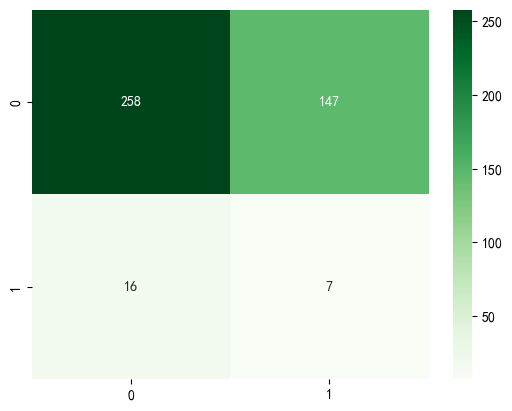

In [16]:
###pca-adasyn-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_adasyn 和 y_train_adasyn 有相同的样本数量
print("x_train_adasyn shape:", x_train_adasyn.shape)
print("y_train_adasyn shape:", y_train_adasyn.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_adasyn.reshape((x_train_adasyn.shape[0], 1, x_train_adasyn.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_adasyn, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_adasyn_encoded = to_categorical(y_train_adasyn, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_adasyn)            # 输出原始标签
print(y_train_adasyn_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_adasyn, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s53_classes = model.predict(test_X1)
    y_pred_s53_classes = np.argmax(y_pred_s53_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s53_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s53_classes = model.predict(test_X1)
y_pred_s53_classes = np.argmax(y_pred_s53_classes, axis=1)
# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)

# 计算评估指标，确保使用二分类的评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s53_classes)
precision = precision_score(y_test_spring_classes, y_pred_s53_classes,average='macro') 
recall = recall_score(y_test_spring_classes, y_pred_s53_classes,average='macro')  
f1 = f1_score(y_test_spring_classes, y_pred_s53_classes,average='macro')  

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s53_classes)
import seaborn as sns  # 确保导入 seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()

x_train_resampled shape: (4682, 2)
y_train_resampled shape: (4682,)
X_test_pca shape: (428, 2)
y_test_spring shape: (428,)
y_train_cat shape: (4682, 2)
y_test_spring_encoded shape: (428, 2)
[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_162"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_162 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_486 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_487 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_488 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7537 - loss: 0.6429 - val_accuracy: 0.0000e+00 - val_loss: 1.5318
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.4697 - val_accuracy: 0.0000e+00 - val_loss: 1.2684
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7887 - loss: 0.4416 - val_accuracy: 0.0000e+00 - val_loss: 1.2865
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4252 - val_accuracy: 0.0000e+00 - val_loss: 1.2515
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7906 - loss: 0.4285 - val_accuracy: 0.0000e+00 - val_loss: 1.2736
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4197 - val_accuracy: 0.0000e+00 - val_loss: 1.1970
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.4375 - val_accuracy: 0.0000e+00 - val_loss: 1.3078
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.4127 - val_

2024/05/15 09:23:05 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: Solving single objective optimization problem.
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_163"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_163 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_489 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_490 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_491 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7775 - loss: 0.6121 - val_accuracy: 0.0000e+00 - val_loss: 1.5554
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8045 - loss: 0.4292 - val_accuracy: 0.0000e+00 - val_loss: 1.2799
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.2101
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.3275
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2553
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4372 - val_accuracy: 0.0000e+00 - val_loss: 1.2995
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4282 - val_accuracy: 0.0000e+00 - val_loss: 1.2508
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.4172 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_164"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_164 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_492 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_493 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_494 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7719 - loss: 0.6364 - val_accuracy: 0.0000e+00 - val_loss: 1.5818
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7969 - loss: 0.4550 - val_accuracy: 0.0000e+00 - val_loss: 1.3029
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.4414 - val_accuracy: 0.0000e+00 - val_loss: 1.2760
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8063 - loss: 0.4142 - val_accuracy: 0.0000e+00 - val_loss: 1.2168
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4180 - val_accuracy: 0.0000e+00 - val_loss: 1.1411
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - loss: 0.4351 - val_accuracy: 0.0000e+00 - val_loss: 1.2822
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7929 - loss: 0.4171 - val_accuracy: 0.0000e+00 - val_loss: 1.2311
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7898 - loss: 0.4338 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_165"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_165 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_495 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_496 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_497 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7855 - loss: 0.6147 - val_accuracy: 0.0000e+00 - val_loss: 1.4552
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.4451 - val_accuracy: 0.0000e+00 - val_loss: 1.2561
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4343 - val_accuracy: 0.0000e+00 - val_loss: 1.2869
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.1784
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.2678
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.2338
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.1540
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7964 - loss: 0.4277 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_166 (LSTM)                      │ (None, 46)                  │           9,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_498 (Dense)                    │ (None, 64)                  │           3,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_499 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_500 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,170 (55.35 KB)

 Trainable params: 14,170 (55.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7861 - loss: 0.6149 - val_accuracy: 0.0000e+00 - val_loss: 1.5763
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.4392 - val_accuracy: 0.0000e+00 - val_loss: 1.2582
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7953 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 1.2790
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7884 - loss: 0.4252 - val_accuracy: 0.0000e+00 - val_loss: 1.2814
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7957 - loss: 0.4206 - val_accuracy: 0.0000e+00 - val_loss: 1.2167
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7881 - loss: 0.4313 - val_accuracy: 0.0000e+00 - val_loss: 1.3299
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4214 - val_accuracy: 0.0000e+00 - val_loss: 1.2552
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7880 - loss: 0.4274 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_167"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_167 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_501 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_502 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_503 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7980 - loss: 0.6159 - val_accuracy: 0.0000e+00 - val_loss: 1.4658
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7851 - loss: 0.4581 - val_accuracy: 0.0000e+00 - val_loss: 1.2290
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7974 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.3093
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.2225
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.4570
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.1925
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.4189 - val_accuracy: 0.0000e+00 - val_loss: 1.2667
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7904 - loss: 0.4267 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_168"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_168 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_504 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_505 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_506 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7861 - loss: 0.6315 - val_accuracy: 0.0000e+00 - val_loss: 1.6455
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4496 - val_accuracy: 0.0000e+00 - val_loss: 1.2164
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4320 - val_accuracy: 0.0000e+00 - val_loss: 1.2497
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.4340 - val_accuracy: 0.0000e+00 - val_loss: 1.2810
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.4328 - val_accuracy: 0.0000e+00 - val_loss: 1.3282
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.4096 - val_accuracy: 0.0000e+00 - val_loss: 1.1686
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.3383
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8001 - loss: 0.4167 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_169 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_507 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_508 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_509 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7740 - loss: 0.6292 - val_accuracy: 0.0000e+00 - val_loss: 1.6337
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4758 - val_accuracy: 0.0000e+00 - val_loss: 1.3043
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.2266
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4185 - val_accuracy: 0.0000e+00 - val_loss: 1.3224
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4406 - val_accuracy: 0.0000e+00 - val_loss: 1.2818
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4318 - val_accuracy: 0.0000e+00 - val_loss: 1.3172
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4203 - val_accuracy: 0.0000e+00 - val_loss: 1.3018
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4297 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_170"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_170 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_510 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_511 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_512 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7597 - loss: 0.6257 - val_accuracy: 0.0000e+00 - val_loss: 1.5946
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4338 - val_accuracy: 0.0128 - val_loss: 1.2419
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4278 - val_accuracy: 0.0000e+00 - val_loss: 1.2854
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.2411
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4149 - val_accuracy: 0.0000e+00 - val_loss: 1.2520
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7842 - loss: 0.4404 - val_accuracy: 0.0000e+00 - val_loss: 1.3088
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4382 - val_accuracy: 0.0000e+00 - val_loss: 1.2206
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4256 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_171 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_513 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_514 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_515 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7421 - loss: 0.6428 - val_accuracy: 0.0000e+00 - val_loss: 1.4879
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7938 - loss: 0.4613 - val_accuracy: 0.0000e+00 - val_loss: 1.2420
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.2436
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4303 - val_accuracy: 0.0000e+00 - val_loss: 1.2514
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.2773
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8009 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.1791
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.2206
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.4327 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_172"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_172 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_516 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_517 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_518 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7814 - loss: 0.6343 - val_accuracy: 0.0000e+00 - val_loss: 1.5484
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4604 - val_accuracy: 0.0000e+00 - val_loss: 1.2620
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4365 - val_accuracy: 0.0000e+00 - val_loss: 1.2481
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.2051
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8017 - loss: 0.4168 - val_accuracy: 0.0000e+00 - val_loss: 1.2406
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7952 - loss: 0.4222 - val_accuracy: 0.0000e+00 - val_loss: 1.2340
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.4325 - val_accuracy: 0.0000e+00 - val_loss: 1.3255
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4215 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_173"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_173 (LSTM)                      │ (None, 48)                  │           9,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_519 (Dense)                    │ (None, 64)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_520 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_521 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,074 (58.88 KB)

 Trainable params: 15,074 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7540 - loss: 0.6347 - val_accuracy: 0.0000e+00 - val_loss: 1.6018
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4522 - val_accuracy: 0.0000e+00 - val_loss: 1.2942
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.4496 - val_accuracy: 0.0000e+00 - val_loss: 1.3667
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4246 - val_accuracy: 0.0000e+00 - val_loss: 1.1573
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.4308 - val_accuracy: 0.0000e+00 - val_loss: 1.2560
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4264 - val_accuracy: 0.0000e+00 - val_loss: 1.2363
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4168 - val_accuracy: 0.0000e+00 - val_loss: 1.2623
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4245 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_174"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_174 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_522 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_523 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_524 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7510 - loss: 0.6295 - val_accuracy: 0.0000e+00 - val_loss: 1.5212
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.4669 - val_accuracy: 0.0000e+00 - val_loss: 1.3057
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4300 - val_accuracy: 0.0000e+00 - val_loss: 1.3332
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4235 - val_accuracy: 0.0000e+00 - val_loss: 1.1147
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.2527
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7971 - loss: 0.4291 - val_accuracy: 0.0000e+00 - val_loss: 1.3177
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7990 - loss: 0.4118 - val_accuracy: 0.0000e+00 - val_loss: 1.2318
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4242 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_175"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_175 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_525 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_526 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_527 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7833 - loss: 0.6252 - val_accuracy: 0.0000e+00 - val_loss: 1.5176
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4362 - val_accuracy: 0.0000e+00 - val_loss: 1.2868
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.4363 - val_accuracy: 0.0000e+00 - val_loss: 1.2899
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.4183 - val_accuracy: 0.0000e+00 - val_loss: 1.1883
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4272 - val_accuracy: 0.0000e+00 - val_loss: 1.2038
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4210 - val_accuracy: 0.0107 - val_loss: 1.1815
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.2456
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4180 - val_acc

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_176"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_176 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_528 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_529 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_530 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7440 - loss: 0.6206 - val_accuracy: 0.0000e+00 - val_loss: 1.5310
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7912 - loss: 0.4547 - val_accuracy: 0.0000e+00 - val_loss: 1.3445
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.2597
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.4181 - val_accuracy: 0.0000e+00 - val_loss: 1.2165
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4209 - val_accuracy: 0.0000e+00 - val_loss: 1.1733
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4095 - val_accuracy: 0.0000e+00 - val_loss: 1.2928
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.2496
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4263 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_177"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_177 (LSTM)                      │ (None, 43)                  │           7,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_531 (Dense)                    │ (None, 64)                  │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_532 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_533 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,874 (50.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7642 - loss: 0.6232 - val_accuracy: 0.0000e+00 - val_loss: 1.5061
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4398 - val_accuracy: 0.0000e+00 - val_loss: 1.2195
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.3047
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4146 - val_accuracy: 0.0000e+00 - val_loss: 1.2050
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4246 - val_accuracy: 0.0000e+00 - val_loss: 1.2729
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4250 - val_accuracy: 0.0000e+00 - val_loss: 1.3010
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4144 - val_accuracy: 0.0299 - val_loss: 1.1639
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4319 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_178"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_178 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_534 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_535 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_536 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7306 - loss: 0.6412 - val_accuracy: 0.0000e+00 - val_loss: 1.5423
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4658 - val_accuracy: 0.0000e+00 - val_loss: 1.2771
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.2782
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4274 - val_accuracy: 0.0000e+00 - val_loss: 1.2272
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4212 - val_accuracy: 0.0000e+00 - val_loss: 1.1607
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4236 - val_accuracy: 0.0000e+00 - val_loss: 1.2307
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4240 - val_accuracy: 0.0000e+00 - val_loss: 1.2133
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4241 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_179"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_179 (LSTM)                      │ (None, 45)                  │           8,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_537 (Dense)                    │ (None, 64)                  │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_538 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_539 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,730 (53.63 KB)

 Trainable params: 13,730 (53.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7447 - loss: 0.6384 - val_accuracy: 0.0000e+00 - val_loss: 1.5542
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4578 - val_accuracy: 0.0000e+00 - val_loss: 1.3447
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4300 - val_accuracy: 0.0000e+00 - val_loss: 1.3002
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7983 - loss: 0.4249 - val_accuracy: 0.0000e+00 - val_loss: 1.2019
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2089
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4214 - val_accuracy: 0.0000e+00 - val_loss: 1.2137
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.4260 - val_accuracy: 0.0171 - val_loss: 1.2145
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7902 - loss: 0.4274 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_180"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_180 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_540 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_541 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_542 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7460 - loss: 0.6510 - val_accuracy: 0.0000e+00 - val_loss: 1.4324
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4646 - val_accuracy: 0.0000e+00 - val_loss: 1.3126
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4432 - val_accuracy: 0.0000e+00 - val_loss: 1.2099
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.4382 - val_accuracy: 0.0000e+00 - val_loss: 1.2415
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4388 - val_accuracy: 0.0000e+00 - val_loss: 1.3282
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.3593
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4339 - val_accuracy: 0.0000e+00 - val_loss: 1.2862
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4163 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_181"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_181 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_543 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_544 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_545 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7695 - loss: 0.6222 - val_accuracy: 0.0000e+00 - val_loss: 1.5807
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4609 - val_accuracy: 0.0000e+00 - val_loss: 1.2432
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4294 - val_accuracy: 0.0000e+00 - val_loss: 1.1774
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.4291 - val_accuracy: 0.0000e+00 - val_loss: 1.2186
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4258 - val_accuracy: 0.0000e+00 - val_loss: 1.2736
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4258 - val_accuracy: 0.0000e+00 - val_loss: 1.3727
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4204 - val_accuracy: 0.0000e+00 - val_loss: 1.2414
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4350 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_182"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_182 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_546 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_547 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_548 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7778 - loss: 0.6193 - val_accuracy: 0.0000e+00 - val_loss: 1.4524
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7917 - loss: 0.4564 - val_accuracy: 0.0000e+00 - val_loss: 1.2157
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7856 - loss: 0.4379 - val_accuracy: 0.0000e+00 - val_loss: 1.2277
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7887 - loss: 0.4415 - val_accuracy: 0.0000e+00 - val_loss: 1.2227
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.4228 - val_accuracy: 0.0000e+00 - val_loss: 1.2141
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7917 - loss: 0.4221 - val_accuracy: 0.0000e+00 - val_loss: 1.2160
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7938 - loss: 0.4200 - val_accuracy: 0.0000e+00 - val_loss: 1.1896
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.4289 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_183 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_549 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_550 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_551 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7535 - loss: 0.6354 - val_accuracy: 0.0000e+00 - val_loss: 1.5438
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.4714 - val_accuracy: 0.0000e+00 - val_loss: 1.3213
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4338 - val_accuracy: 0.0000e+00 - val_loss: 1.2818
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4317 - val_accuracy: 0.0000e+00 - val_loss: 1.2563
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4235 - val_accuracy: 0.0000e+00 - val_loss: 1.2022
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4122 - val_accuracy: 0.0000e+00 - val_loss: 1.1816
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7926 - loss: 0.4260 - val_accuracy: 0.0000e+00 - val_loss: 1.2340
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4127 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_184 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_552 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_553 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_554 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7599 - loss: 0.6248 - val_accuracy: 0.0000e+00 - val_loss: 1.5162
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4503 - val_accuracy: 0.0000e+00 - val_loss: 1.1732
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4350 - val_accuracy: 0.0000e+00 - val_loss: 1.1897
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.2798
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.2757
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4299 - val_accuracy: 0.0000e+00 - val_loss: 1.2237
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4317 - val_accuracy: 0.0000e+00 - val_loss: 1.2644
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4135 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_185"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_185 (LSTM)                      │ (None, 49)                  │          10,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_555 (Dense)                    │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_556 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_557 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,538 (60.70 KB)

 Trainable params: 15,538 (60.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7557 - loss: 0.6341 - val_accuracy: 0.0000e+00 - val_loss: 1.5369
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4518 - val_accuracy: 0.0000e+00 - val_loss: 1.3008
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.4487 - val_accuracy: 0.0000e+00 - val_loss: 1.2858
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4271 - val_accuracy: 0.0000e+00 - val_loss: 1.2473
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4244 - val_accuracy: 0.0000e+00 - val_loss: 1.1904
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4164 - val_accuracy: 0.0000e+00 - val_loss: 1.2303
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4061 - val_accuracy: 0.0000e+00 - val_loss: 1.2095
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4170 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_186"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_186 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_558 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_559 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_560 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7799 - loss: 0.6085 - val_accuracy: 0.0000e+00 - val_loss: 1.5331
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4420 - val_accuracy: 0.0000e+00 - val_loss: 1.1820
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4340 - val_accuracy: 0.0000e+00 - val_loss: 1.3099
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.1879
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 1.3107
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4279 - val_accuracy: 0.0000e+00 - val_loss: 1.3298
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4249 - val_accuracy: 0.0128 - val_loss: 1.1755
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7866 - loss: 0.4278 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_187"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_187 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_561 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_562 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_563 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7779 - loss: 0.6394 - val_accuracy: 0.0000e+00 - val_loss: 1.5717
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4660 - val_accuracy: 0.0000e+00 - val_loss: 1.4156
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 0.4377 - val_accuracy: 0.0000e+00 - val_loss: 1.3411
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.3530
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.1739
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4322 - val_accuracy: 0.0000e+00 - val_loss: 1.2328
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4140 - val_accuracy: 0.0000e+00 - val_loss: 1.2589
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4187 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_188"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_188 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_564 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_565 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_566 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7842 - loss: 0.6071 - val_accuracy: 0.0000e+00 - val_loss: 1.4647
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 0.4496 - val_accuracy: 0.0000e+00 - val_loss: 1.2900
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.4390 - val_accuracy: 0.0000e+00 - val_loss: 1.2257
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2547
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4376 - val_accuracy: 0.0000e+00 - val_loss: 1.3041
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4216 - val_accuracy: 0.0000e+00 - val_loss: 1.3261
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4236 - val_accuracy: 0.0000e+00 - val_loss: 1.2577
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4157 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_189 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_567 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_568 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_569 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7680 - loss: 0.6297 - val_accuracy: 0.0000e+00 - val_loss: 1.5337
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4502 - val_accuracy: 0.0000e+00 - val_loss: 1.2124
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4326 - val_accuracy: 0.0000e+00 - val_loss: 1.2592
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4175 - val_accuracy: 0.0000e+00 - val_loss: 1.2086
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4241 - val_accuracy: 0.0000e+00 - val_loss: 1.1884
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4317 - val_accuracy: 0.0000e+00 - val_loss: 1.1964
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4135 - val_accuracy: 0.0000e+00 - val_loss: 1.3249
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4257 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_190"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_190 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_570 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_571 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_572 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7975 - loss: 0.6258 - val_accuracy: 0.0000e+00 - val_loss: 1.5118
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4445 - val_accuracy: 0.0000e+00 - val_loss: 1.1948
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4363 - val_accuracy: 0.0000e+00 - val_loss: 1.3064
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.2734
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7872 - loss: 0.4320 - val_accuracy: 0.0000e+00 - val_loss: 1.2326
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4210 - val_accuracy: 0.0053 - val_loss: 1.2125
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.4083 - val_accuracy: 0.0064 - val_loss: 1.2473
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4223 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_191"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_191 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_573 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_574 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_575 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7761 - loss: 0.6316 - val_accuracy: 0.0000e+00 - val_loss: 1.5283
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4479 - val_accuracy: 0.0000e+00 - val_loss: 1.3087
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.1708
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 0.4388 - val_accuracy: 0.0000e+00 - val_loss: 1.3285
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.2604
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4268 - val_accuracy: 0.0000e+00 - val_loss: 1.2677
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4296 - val_accuracy: 0.0000e+00 - val_loss: 1.2452
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.4288 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_192"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_192 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_576 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_577 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_578 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7637 - loss: 0.6248 - val_accuracy: 0.0000e+00 - val_loss: 1.5805
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.4711 - val_accuracy: 0.0000e+00 - val_loss: 1.3053
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.4230 - val_accuracy: 0.0000e+00 - val_loss: 1.3088
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4290 - val_accuracy: 0.0000e+00 - val_loss: 1.3351
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7854 - loss: 0.4436 - val_accuracy: 0.0000e+00 - val_loss: 1.2354
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7794 - loss: 0.4416 - val_accuracy: 0.0000e+00 - val_loss: 1.3910
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2798
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7942 - loss: 0.4136 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_193"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_193 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_579 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_580 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_581 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7819 - loss: 0.6203 - val_accuracy: 0.0000e+00 - val_loss: 1.5811
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.4495 - val_accuracy: 0.0000e+00 - val_loss: 1.2761
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.4310 - val_accuracy: 0.0000e+00 - val_loss: 1.2936
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7818 - loss: 0.4450 - val_accuracy: 0.0000e+00 - val_loss: 1.3057
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4224 - val_accuracy: 0.0000e+00 - val_loss: 1.2089
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4190 - val_accuracy: 0.0000e+00 - val_loss: 1.1746
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.4165 - val_accuracy: 0.0000e+00 - val_loss: 1.2173
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4159 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_194"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_194 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_582 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_583 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_584 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7906 - loss: 0.6067 - val_accuracy: 0.0000e+00 - val_loss: 1.4868
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.4414 - val_accuracy: 0.0000e+00 - val_loss: 1.1898
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4369 - val_accuracy: 0.0000e+00 - val_loss: 1.3251
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4139 - val_accuracy: 0.0000e+00 - val_loss: 1.2850
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4295 - val_accuracy: 0.0000e+00 - val_loss: 1.2253
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.2235
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4311 - val_accuracy: 0.0000e+00 - val_loss: 1.2519
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4121 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_195"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_195 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_585 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_586 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_587 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7413 - loss: 0.6412 - val_accuracy: 0.0000e+00 - val_loss: 1.6073
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.4711 - val_accuracy: 0.0000e+00 - val_loss: 1.3079
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4450 - val_accuracy: 0.0000e+00 - val_loss: 1.3468
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4356 - val_accuracy: 0.0000e+00 - val_loss: 1.2996
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4339 - val_accuracy: 0.0000e+00 - val_loss: 1.2078
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.4335 - val_accuracy: 0.0000e+00 - val_loss: 1.2279
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4153 - val_accuracy: 0.0000e+00 - val_loss: 1.2340
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4231 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_196"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_196 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_588 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_589 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_590 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7976 - loss: 0.6233 - val_accuracy: 0.0000e+00 - val_loss: 1.4768
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4434 - val_accuracy: 0.0000e+00 - val_loss: 1.2955
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2007
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4153 - val_accuracy: 0.0000e+00 - val_loss: 1.2862
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4354 - val_accuracy: 0.0000e+00 - val_loss: 1.3124
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4294 - val_accuracy: 0.0021 - val_loss: 1.2435
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4382 - val_accuracy: 0.0011 - val_loss: 1.2714
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4252 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_197"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_197 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_591 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_592 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_593 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7586 - loss: 0.6339 - val_accuracy: 0.0000e+00 - val_loss: 1.5212
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7958 - loss: 0.4525 - val_accuracy: 0.0000e+00 - val_loss: 1.3325
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7973 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.2447
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4224 - val_accuracy: 0.0000e+00 - val_loss: 1.2262
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.2619
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.2468
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.4269 - val_accuracy: 0.0000e+00 - val_loss: 1.3052
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4194 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_198"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_198 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_594 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_595 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_596 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7860 - loss: 0.6225 - val_accuracy: 0.0000e+00 - val_loss: 1.6099
Epoch 2/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 0.4686 - val_accuracy: 0.0000e+00 - val_loss: 1.3165
Epoch 3/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4216 - val_accuracy: 0.0000e+00 - val_loss: 1.2147
Epoch 4/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.4312 - val_accuracy: 0.0000e+00 - val_loss: 1.1993
Epoch 5/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.1815
Epoch 6/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4268 - val_accuracy: 0.0000e+00 - val_loss: 1.3210
Epoch 7/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7939 - loss: 0.4261 - val_accuracy: 0.0000e+00 - val_loss: 1.2644
Epoch 8/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.4164 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_199"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_199 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_597 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_598 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_599 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8030 - loss: 0.6253 - val_accuracy: 0.0000e+00 - val_loss: 1.5487
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4435 - val_accuracy: 0.0000e+00 - val_loss: 1.1758
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.2158
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.4314 - val_accuracy: 0.0000e+00 - val_loss: 1.2890
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4184 - val_accuracy: 0.0000e+00 - val_loss: 1.2282
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4259 - val_accuracy: 0.0000e+00 - val_loss: 1.2161
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4122 - val_accuracy: 0.0000e+00 - val_loss: 1.1676
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4133 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_200 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_600 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_601 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_602 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7496 - loss: 0.6440 - val_accuracy: 0.0000e+00 - val_loss: 1.4457
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4631 - val_accuracy: 0.0000e+00 - val_loss: 1.3153
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4322 - val_accuracy: 0.0000e+00 - val_loss: 1.2525
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.1823
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4164 - val_accuracy: 0.0000e+00 - val_loss: 1.1659
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7859 - loss: 0.4354 - val_accuracy: 0.0000e+00 - val_loss: 1.3202
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4339 - val_accuracy: 0.0000e+00 - val_loss: 1.3052
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4277 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_201 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_603 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_604 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_605 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7773 - loss: 0.6322 - val_accuracy: 0.0000e+00 - val_loss: 1.6476
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4517 - val_accuracy: 0.0000e+00 - val_loss: 1.2815
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4214 - val_accuracy: 0.0000e+00 - val_loss: 1.1977
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4194 - val_accuracy: 0.0000e+00 - val_loss: 1.1053
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.4200 - val_accuracy: 0.0000e+00 - val_loss: 1.1889
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4138 - val_accuracy: 0.0000e+00 - val_loss: 1.2080
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2527
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 0.4202 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_202"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_202 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_606 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_607 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_608 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7693 - loss: 0.6300 - val_accuracy: 0.0000e+00 - val_loss: 1.5559
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8044 - loss: 0.4406 - val_accuracy: 0.0000e+00 - val_loss: 1.2176
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.1759
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4162 - val_accuracy: 0.0000e+00 - val_loss: 1.2117
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4201 - val_accuracy: 0.0000e+00 - val_loss: 1.2573
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4244 - val_accuracy: 0.0000e+00 - val_loss: 1.2234
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.1938
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4282 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_203"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_203 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_609 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_610 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_611 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7968 - loss: 0.6184 - val_accuracy: 0.0000e+00 - val_loss: 1.5222
Epoch 2/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4537 - val_accuracy: 0.0000e+00 - val_loss: 1.3252
Epoch 3/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4381 - val_accuracy: 0.0000e+00 - val_loss: 1.3010
Epoch 4/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4137 - val_accuracy: 0.0000e+00 - val_loss: 1.2292
Epoch 5/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.4259 - val_accuracy: 0.0000e+00 - val_loss: 1.3721
Epoch 6/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4248 - val_accuracy: 0.0000e+00 - val_loss: 1.1780
Epoch 7/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4229 - val_accuracy: 0.0000e+00 - val_loss: 1.3118
Epoch 8/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4266 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_204"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_204 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_612 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_613 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_614 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7595 - loss: 0.6414 - val_accuracy: 0.0000e+00 - val_loss: 1.5221
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4602 - val_accuracy: 0.0000e+00 - val_loss: 1.3139
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4415 - val_accuracy: 0.0000e+00 - val_loss: 1.3038
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.4096 - val_accuracy: 0.0000e+00 - val_loss: 1.2064
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4310 - val_accuracy: 0.0000e+00 - val_loss: 1.2499
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4220 - val_accuracy: 0.0000e+00 - val_loss: 1.2981
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4191 - val_accuracy: 0.0000e+00 - val_loss: 1.2484
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.4266 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_205"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_205 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_615 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_616 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_617 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7722 - loss: 0.6327 - val_accuracy: 0.0000e+00 - val_loss: 1.4974
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4544 - val_accuracy: 0.0000e+00 - val_loss: 1.3742
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4344 - val_accuracy: 0.0000e+00 - val_loss: 1.2253
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.3045
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 1.3075
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4185 - val_accuracy: 0.0000e+00 - val_loss: 1.2924
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4144 - val_accuracy: 0.0000e+00 - val_loss: 1.2228
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4238 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_206"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_206 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_618 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_619 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_620 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7377 - loss: 0.6295 - val_accuracy: 0.0000e+00 - val_loss: 1.5233
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4532 - val_accuracy: 0.0000e+00 - val_loss: 1.1900
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.4194 - val_accuracy: 0.0000e+00 - val_loss: 1.2438
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4214 - val_accuracy: 0.0000e+00 - val_loss: 1.1388
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4201 - val_accuracy: 0.0000e+00 - val_loss: 1.1917
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.2637
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2929
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7723 - loss: 0.4426 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_207"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_207 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_621 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_622 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_623 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7542 - loss: 0.6416 - val_accuracy: 0.0000e+00 - val_loss: 1.6173
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.4755 - val_accuracy: 0.0000e+00 - val_loss: 1.3592
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2101
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4264 - val_accuracy: 0.0000e+00 - val_loss: 1.2083
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4258 - val_accuracy: 0.0000e+00 - val_loss: 1.2561
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.2462
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4186 - val_accuracy: 0.0000e+00 - val_loss: 1.1908
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4208 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_208"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_208 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_624 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_625 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_626 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7711 - loss: 0.6193 - val_accuracy: 0.0000e+00 - val_loss: 1.5518
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4544 - val_accuracy: 0.0000e+00 - val_loss: 1.2603
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4406 - val_accuracy: 0.0000e+00 - val_loss: 1.2384
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.1981
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4304 - val_accuracy: 0.0000e+00 - val_loss: 1.2352
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4215 - val_accuracy: 0.0000e+00 - val_loss: 1.2515
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4283 - val_accuracy: 0.0107 - val_loss: 1.2250
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4194 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_209"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_209 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_627 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_628 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_629 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7671 - loss: 0.6207 - val_accuracy: 0.0000e+00 - val_loss: 1.6356
Epoch 2/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4689 - val_accuracy: 0.0000e+00 - val_loss: 1.4132
Epoch 3/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4320 - val_accuracy: 0.0000e+00 - val_loss: 1.2595
Epoch 4/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.2194
Epoch 5/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4214 - val_accuracy: 0.0000e+00 - val_loss: 1.2605
Epoch 6/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4228 - val_accuracy: 0.0000e+00 - val_loss: 1.3470
Epoch 7/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.2587
Epoch 8/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4473 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_210"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_210 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_630 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_631 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_632 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7848 - loss: 0.6330 - val_accuracy: 0.0000e+00 - val_loss: 1.5702
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 0.4598 - val_accuracy: 0.0000e+00 - val_loss: 1.3989
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8063 - loss: 0.4164 - val_accuracy: 0.0000e+00 - val_loss: 1.2615
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4261 - val_accuracy: 0.0000e+00 - val_loss: 1.2740
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4178 - val_accuracy: 0.0000e+00 - val_loss: 1.2433
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4448 - val_accuracy: 0.0000e+00 - val_loss: 1.2874
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4240 - val_accuracy: 0.0000e+00 - val_loss: 1.2212
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4329 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_211"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_211 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_633 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_634 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_635 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7941 - loss: 0.6155 - val_accuracy: 0.0000e+00 - val_loss: 1.4681
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7919 - loss: 0.4488 - val_accuracy: 0.0000e+00 - val_loss: 1.3302
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4478 - val_accuracy: 0.0000e+00 - val_loss: 1.2789
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4319 - val_accuracy: 0.0000e+00 - val_loss: 1.2784
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.4198 - val_accuracy: 0.0000e+00 - val_loss: 1.2311
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4347 - val_accuracy: 0.0000e+00 - val_loss: 1.1823
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4267 - val_accuracy: 0.0000e+00 - val_loss: 1.2441
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4395 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_212"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_212 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_636 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_637 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_638 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7334 - loss: 0.6498 - val_accuracy: 0.0000e+00 - val_loss: 1.4588
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.4760 - val_accuracy: 0.0000e+00 - val_loss: 1.3271
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4435 - val_accuracy: 0.0000e+00 - val_loss: 1.3337
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4393 - val_accuracy: 0.0000e+00 - val_loss: 1.2371
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.1995
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.4314 - val_accuracy: 0.0000e+00 - val_loss: 1.3030
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4386 - val_accuracy: 0.0000e+00 - val_loss: 1.3448
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4223 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_213"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_213 (LSTM)                      │ (None, 33)                  │           4,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_639 (Dense)                    │ (None, 64)                  │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_640 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_641 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,074 (35.45 KB)

 Trainable params: 9,074 (35.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7936 - loss: 0.6206 - val_accuracy: 0.0000e+00 - val_loss: 1.5316
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4548 - val_accuracy: 0.0000e+00 - val_loss: 1.3874
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4382 - val_accuracy: 0.0000e+00 - val_loss: 1.2087
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4260 - val_accuracy: 0.0000e+00 - val_loss: 1.3208
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4312 - val_accuracy: 0.0000e+00 - val_loss: 1.3104
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 0.4387 - val_accuracy: 0.0000e+00 - val_loss: 1.2386
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4127 - val_accuracy: 0.0000e+00 - val_loss: 1.2351
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4195 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_214 (LSTM)                      │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_642 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_643 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_644 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7403 - loss: 0.6401 - val_accuracy: 0.0000e+00 - val_loss: 1.6044
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4440 - val_accuracy: 0.0000e+00 - val_loss: 1.3078
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.2800
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.4410 - val_accuracy: 0.0000e+00 - val_loss: 1.2255
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4348 - val_accuracy: 0.0000e+00 - val_loss: 1.2375
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7934 - loss: 0.4278 - val_accuracy: 0.0000e+00 - val_loss: 1.1962
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4137 - val_accuracy: 0.0000e+00 - val_loss: 1.2596
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4242 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_215"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_215 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_645 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_646 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_647 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7844 - loss: 0.6084 - val_accuracy: 0.0000e+00 - val_loss: 1.4877
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4432 - val_accuracy: 0.0000e+00 - val_loss: 1.2685
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.4394 - val_accuracy: 0.0000e+00 - val_loss: 1.2846
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4243 - val_accuracy: 0.0000e+00 - val_loss: 1.2809
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4197 - val_accuracy: 0.0000e+00 - val_loss: 1.1771
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4156 - val_accuracy: 0.0000e+00 - val_loss: 1.1965
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.4148 - val_accuracy: 0.0000e+00 - val_loss: 1.3102
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4257 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_216"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_216 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_648 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_649 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_650 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8000 - loss: 0.6186 - val_accuracy: 0.0000e+00 - val_loss: 1.5802
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.4602 - val_accuracy: 0.0000e+00 - val_loss: 1.3586
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.4271 - val_accuracy: 0.0000e+00 - val_loss: 1.2669
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4303 - val_accuracy: 0.0000e+00 - val_loss: 1.2242
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: 0.4185 - val_accuracy: 0.0000e+00 - val_loss: 1.2595
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4115 - val_accuracy: 0.0000e+00 - val_loss: 1.1958
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.1759
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4337 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_217"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_217 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_651 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_652 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_653 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7657 - loss: 0.6262 - val_accuracy: 0.0000e+00 - val_loss: 1.6044
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4604 - val_accuracy: 0.0000e+00 - val_loss: 1.3056
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4168 - val_accuracy: 0.0000e+00 - val_loss: 1.2249
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8030 - loss: 0.4177 - val_accuracy: 0.0000e+00 - val_loss: 1.2944
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4271 - val_accuracy: 0.0000e+00 - val_loss: 1.1419
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8057 - loss: 0.4136 - val_accuracy: 0.0000e+00 - val_loss: 1.1687
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.4279 - val_accuracy: 0.0000e+00 - val_loss: 1.1874
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7909 - loss: 0.4218 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_218"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_218 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_654 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_655 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_656 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7454 - loss: 0.6359 - val_accuracy: 0.0000e+00 - val_loss: 1.5648
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4590 - val_accuracy: 0.0000e+00 - val_loss: 1.3180
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2899
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4261 - val_accuracy: 0.0000e+00 - val_loss: 1.2624
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4025 - val_accuracy: 0.0000e+00 - val_loss: 1.2439
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4175 - val_accuracy: 0.0000e+00 - val_loss: 1.2696
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.4257 - val_accuracy: 0.0000e+00 - val_loss: 1.2517
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4125 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_219"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_219 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_657 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_658 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_659 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7854 - loss: 0.6260 - val_accuracy: 0.0000e+00 - val_loss: 1.5672
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4576 - val_accuracy: 0.0000e+00 - val_loss: 1.3219
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4297 - val_accuracy: 0.0000e+00 - val_loss: 1.2813
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4202 - val_accuracy: 0.0000e+00 - val_loss: 1.2002
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4300 - val_accuracy: 0.0000e+00 - val_loss: 1.2193
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.2832
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 1.2552
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4199 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_220"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_220 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_660 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_661 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_662 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7691 - loss: 0.6223 - val_accuracy: 0.0000e+00 - val_loss: 1.5243
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7879 - loss: 0.4618 - val_accuracy: 0.0000e+00 - val_loss: 1.3622
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4268 - val_accuracy: 0.0000e+00 - val_loss: 1.2864
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.2518
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.4179 - val_accuracy: 0.0000e+00 - val_loss: 1.3139
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.3100
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4241 - val_accuracy: 0.0000e+00 - val_loss: 1.2540
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.4227 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_221"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_221 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_663 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_664 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_665 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7398 - loss: 0.6408 - val_accuracy: 0.0000e+00 - val_loss: 1.4678
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4716 - val_accuracy: 0.0000e+00 - val_loss: 1.3517
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4467 - val_accuracy: 0.0000e+00 - val_loss: 1.3273
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4179 - val_accuracy: 0.0000e+00 - val_loss: 1.1616
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4319 - val_accuracy: 0.0000e+00 - val_loss: 1.2523
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 1.2695
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4200 - val_accuracy: 0.0000e+00 - val_loss: 1.1501
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4279 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_222"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_222 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_666 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_667 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_668 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7578 - loss: 0.6279 - val_accuracy: 0.0000e+00 - val_loss: 1.5234
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4586 - val_accuracy: 0.0000e+00 - val_loss: 1.2980
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4344 - val_accuracy: 0.0000e+00 - val_loss: 1.2994
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.4367 - val_accuracy: 0.0000e+00 - val_loss: 1.2558
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4341 - val_accuracy: 0.0000e+00 - val_loss: 1.2106
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4170 - val_accuracy: 0.0000e+00 - val_loss: 1.1924
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7926 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.2040
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8024 - loss: 0.4211 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_223"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_223 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_669 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_670 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_671 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7570 - loss: 0.6401 - val_accuracy: 0.0000e+00 - val_loss: 1.5407
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4625 - val_accuracy: 0.0000e+00 - val_loss: 1.3440
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4426 - val_accuracy: 0.0000e+00 - val_loss: 1.2399
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4179 - val_accuracy: 0.0000e+00 - val_loss: 1.2150
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.4154 - val_accuracy: 0.0000e+00 - val_loss: 1.1995
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4232 - val_accuracy: 0.0000e+00 - val_loss: 1.3412
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4274 - val_accuracy: 0.0000e+00 - val_loss: 1.3306
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4243 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_224 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_672 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_673 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_674 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7529 - loss: 0.6380 - val_accuracy: 0.0000e+00 - val_loss: 1.5183
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4439 - val_accuracy: 0.0000e+00 - val_loss: 1.2875
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4488 - val_accuracy: 0.0000e+00 - val_loss: 1.2358
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4154 - val_accuracy: 0.0000e+00 - val_loss: 1.2231
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4194 - val_accuracy: 0.0000e+00 - val_loss: 1.2168
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: 0.4091 - val_accuracy: 0.0000e+00 - val_loss: 1.1458
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4153 - val_accuracy: 0.0000e+00 - val_loss: 1.1906
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4170 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_225"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_225 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_675 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_676 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_677 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7589 - loss: 0.6385 - val_accuracy: 0.0000e+00 - val_loss: 1.5103
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.4670 - val_accuracy: 0.0000e+00 - val_loss: 1.3046
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4351 - val_accuracy: 0.0000e+00 - val_loss: 1.3986
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2678
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4367 - val_accuracy: 0.0000e+00 - val_loss: 1.2597
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4302 - val_accuracy: 0.0000e+00 - val_loss: 1.2411
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4040 - val_accuracy: 0.0000e+00 - val_loss: 1.1500
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4282 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_226"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_226 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_678 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_679 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_680 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7680 - loss: 0.6224 - val_accuracy: 0.0000e+00 - val_loss: 1.5260
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4612 - val_accuracy: 0.0000e+00 - val_loss: 1.4078
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.4246 - val_accuracy: 0.0000e+00 - val_loss: 1.1971
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4279 - val_accuracy: 0.0000e+00 - val_loss: 1.2887
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4226 - val_accuracy: 0.0000e+00 - val_loss: 1.2161
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8016 - loss: 0.4133 - val_accuracy: 0.0000e+00 - val_loss: 1.1935
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4149 - val_accuracy: 0.0128 - val_loss: 1.2901
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.4333 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_227"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_227 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_681 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_682 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_683 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7626 - loss: 0.6468 - val_accuracy: 0.0000e+00 - val_loss: 1.5200
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.4670 - val_accuracy: 0.0000e+00 - val_loss: 1.3317
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.4410 - val_accuracy: 0.0000e+00 - val_loss: 1.2569
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.2905
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4331 - val_accuracy: 0.0000e+00 - val_loss: 1.4271
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4129 - val_accuracy: 0.0000e+00 - val_loss: 1.1684
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4139 - val_accuracy: 0.0000e+00 - val_loss: 1.2670
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.4162 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_228"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_228 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_684 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_685 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_686 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7369 - loss: 0.6363 - val_accuracy: 0.0000e+00 - val_loss: 1.5686
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4759 - val_accuracy: 0.0000e+00 - val_loss: 1.3206
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.2434
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4274 - val_accuracy: 0.0000e+00 - val_loss: 1.2293
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.1905
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4325 - val_accuracy: 0.0000e+00 - val_loss: 1.2884
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4275 - val_accuracy: 0.0224 - val_loss: 1.2040
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.4260 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_229"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_229 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_687 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_688 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_689 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7635 - loss: 0.6335 - val_accuracy: 0.0000e+00 - val_loss: 1.5626
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4623 - val_accuracy: 0.0000e+00 - val_loss: 1.3408
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2873
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4419 - val_accuracy: 0.0000e+00 - val_loss: 1.3852
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.2668
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4085 - val_accuracy: 0.0000e+00 - val_loss: 1.1758
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4186 - val_accuracy: 0.0000e+00 - val_loss: 1.2481
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.4363 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_230"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_230 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_690 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_691 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_692 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7227 - loss: 0.6481 - val_accuracy: 0.0000e+00 - val_loss: 1.4605
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.4630 - val_accuracy: 0.0000e+00 - val_loss: 1.3937
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.2046
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4288 - val_accuracy: 0.0000e+00 - val_loss: 1.2216
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4364 - val_accuracy: 0.0000e+00 - val_loss: 1.2686
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 1.2985
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.2091
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4297 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_231"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_231 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_693 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_694 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_695 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7655 - loss: 0.6158 - val_accuracy: 0.0000e+00 - val_loss: 1.5534
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4452 - val_accuracy: 0.0000e+00 - val_loss: 1.2315
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4229 - val_accuracy: 0.0000e+00 - val_loss: 1.1998
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4270 - val_accuracy: 0.0000e+00 - val_loss: 1.2455
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4202 - val_accuracy: 0.0000e+00 - val_loss: 1.2349
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4154 - val_accuracy: 0.0000e+00 - val_loss: 1.2110
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4070 - val_accuracy: 0.0000e+00 - val_loss: 1.1051
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4227 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_232"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_232 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_696 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_697 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_698 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7569 - loss: 0.6343 - val_accuracy: 0.0000e+00 - val_loss: 1.4665
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8107 - loss: 0.4415 - val_accuracy: 0.0331 - val_loss: 1.2118
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4448 - val_accuracy: 0.0000e+00 - val_loss: 1.3751
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4199 - val_accuracy: 0.0000e+00 - val_loss: 1.2936
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4096 - val_accuracy: 0.0000e+00 - val_loss: 1.1684
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4220 - val_accuracy: 0.0000e+00 - val_loss: 1.1641
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8021 - loss: 0.4157 - val_accuracy: 0.0000e+00 - val_loss: 1.2768
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4362 - val_ac

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_233 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_699 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_700 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_701 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7566 - loss: 0.6403 - val_accuracy: 0.0000e+00 - val_loss: 1.5067
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4508 - val_accuracy: 0.0000e+00 - val_loss: 1.2654
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7962 - loss: 0.4254 - val_accuracy: 0.0000e+00 - val_loss: 1.3055
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.4185 - val_accuracy: 0.0000e+00 - val_loss: 1.1919
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.4130 - val_accuracy: 0.0000e+00 - val_loss: 1.1579
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.4394 - val_accuracy: 0.0000e+00 - val_loss: 1.2844
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4258 - val_accuracy: 0.0021 - val_loss: 1.2278
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 0.4327 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_234"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_234 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_702 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_703 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_704 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7757 - loss: 0.6290 - val_accuracy: 0.0000e+00 - val_loss: 1.5134
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8110 - loss: 0.4300 - val_accuracy: 0.0000e+00 - val_loss: 1.1794
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2620
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 1.2390
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.2505
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.2701
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4378 - val_accuracy: 0.0000e+00 - val_loss: 1.2546
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7994 - loss: 0.4178 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_235"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_235 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_705 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_706 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_707 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7740 - loss: 0.6241 - val_accuracy: 0.0000e+00 - val_loss: 1.6010
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4538 - val_accuracy: 0.0000e+00 - val_loss: 1.3185
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.1743
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4337 - val_accuracy: 0.0000e+00 - val_loss: 1.2200
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.4131 - val_accuracy: 0.0000e+00 - val_loss: 1.1334
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8045 - loss: 0.4231 - val_accuracy: 0.0000e+00 - val_loss: 1.2357
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4328 - val_accuracy: 0.0000e+00 - val_loss: 1.3020
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4238 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_236"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_236 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_708 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_709 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_710 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7551 - loss: 0.6294 - val_accuracy: 0.0000e+00 - val_loss: 1.6184
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4575 - val_accuracy: 0.0000e+00 - val_loss: 1.3239
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.4291 - val_accuracy: 0.0000e+00 - val_loss: 1.2194
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.4139 - val_accuracy: 0.0000e+00 - val_loss: 1.2600
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4187 - val_accuracy: 0.0000e+00 - val_loss: 1.1903
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.3364
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4312 - val_accuracy: 0.0000e+00 - val_loss: 1.2773
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4334 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_237"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_237 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_711 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_712 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_713 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7712 - loss: 0.6328 - val_accuracy: 0.0000e+00 - val_loss: 1.5804
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.4677 - val_accuracy: 0.0000e+00 - val_loss: 1.2915
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4292 - val_accuracy: 0.0000e+00 - val_loss: 1.3368
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.4108 - val_accuracy: 0.0000e+00 - val_loss: 1.2277
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4325 - val_accuracy: 0.0000e+00 - val_loss: 1.2298
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7850 - loss: 0.4357 - val_accuracy: 0.0000e+00 - val_loss: 1.2756
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4327 - val_accuracy: 0.0000e+00 - val_loss: 1.2809
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4433 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_238"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_238 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_714 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_715 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_716 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7690 - loss: 0.6283 - val_accuracy: 0.0000e+00 - val_loss: 1.6283
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7900 - loss: 0.4585 - val_accuracy: 0.0000e+00 - val_loss: 1.2756
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.4439 - val_accuracy: 0.0000e+00 - val_loss: 1.2895
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4308 - val_accuracy: 0.0000e+00 - val_loss: 1.2537
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4210 - val_accuracy: 0.0000e+00 - val_loss: 1.2291
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4162 - val_accuracy: 0.0000e+00 - val_loss: 1.2391
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4254 - val_accuracy: 0.0000e+00 - val_loss: 1.2427
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4249 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_239"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_239 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_717 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_718 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_719 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7566 - loss: 0.6406 - val_accuracy: 0.0000e+00 - val_loss: 1.4955
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4604 - val_accuracy: 0.0000e+00 - val_loss: 1.3119
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7924 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.1847
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4329 - val_accuracy: 0.0000e+00 - val_loss: 1.3161
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4113 - val_accuracy: 0.0000e+00 - val_loss: 1.2274
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4173 - val_accuracy: 0.0000e+00 - val_loss: 1.2461
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4236 - val_accuracy: 0.0000e+00 - val_loss: 1.1770
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4219 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_240"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_240 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_720 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_721 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_722 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7423 - loss: 0.6294 - val_accuracy: 0.0000e+00 - val_loss: 1.5318
Epoch 2/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.4614 - val_accuracy: 0.0000e+00 - val_loss: 1.3221
Epoch 3/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7796 - loss: 0.4521 - val_accuracy: 0.0000e+00 - val_loss: 1.2470
Epoch 4/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.4224 - val_accuracy: 0.0000e+00 - val_loss: 1.2048
Epoch 5/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7878 - loss: 0.4344 - val_accuracy: 0.0000e+00 - val_loss: 1.2668
Epoch 6/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.4372 - val_accuracy: 0.0000e+00 - val_loss: 1.1865
Epoch 7/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4285 - val_accuracy: 0.0000e+00 - val_loss: 1.3052
Epoch 8/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.4351 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_241"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_241 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_723 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_724 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_725 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7326 - loss: 0.6209 - val_accuracy: 0.0000e+00 - val_loss: 1.5227
Epoch 2/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4566 - val_accuracy: 0.0000e+00 - val_loss: 1.2728
Epoch 3/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4295 - val_accuracy: 0.0000e+00 - val_loss: 1.2364
Epoch 4/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.2403
Epoch 5/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7971 - loss: 0.4206 - val_accuracy: 0.0000e+00 - val_loss: 1.2385
Epoch 6/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4164 - val_accuracy: 0.0000e+00 - val_loss: 1.2205
Epoch 7/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4322 - val_accuracy: 0.0000e+00 - val_loss: 1.3410
Epoch 8/17
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4178 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_242"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_242 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_726 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_727 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_728 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7614 - loss: 0.6378 - val_accuracy: 0.0000e+00 - val_loss: 1.5519
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4551 - val_accuracy: 0.0000e+00 - val_loss: 1.1977
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4392 - val_accuracy: 0.0000e+00 - val_loss: 1.1922
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 1.2802
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4231 - val_accuracy: 0.0000e+00 - val_loss: 1.2704
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.2810
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4246 - val_accuracy: 0.0000e+00 - val_loss: 1.3552
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4252 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_243"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_243 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_729 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_730 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_731 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7469 - loss: 0.6325 - val_accuracy: 0.0000e+00 - val_loss: 1.6082
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.4557 - val_accuracy: 0.0000e+00 - val_loss: 1.3314
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4385 - val_accuracy: 0.0000e+00 - val_loss: 1.2505
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 1.1941
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4152 - val_accuracy: 0.0000e+00 - val_loss: 1.2139
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2322
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.2171
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4214 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_244"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_244 (LSTM)                      │ (None, 44)                  │           8,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_732 (Dense)                    │ (None, 64)                  │           2,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_733 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_734 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,298 (51.95 KB)

 Trainable params: 13,298 (51.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7492 - loss: 0.6435 - val_accuracy: 0.0000e+00 - val_loss: 1.4980
Epoch 2/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.4716 - val_accuracy: 0.0000e+00 - val_loss: 1.2829
Epoch 3/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4258 - val_accuracy: 0.0000e+00 - val_loss: 1.1953
Epoch 4/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.4259 - val_accuracy: 0.0000e+00 - val_loss: 1.2290
Epoch 5/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.3022
Epoch 6/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4132 - val_accuracy: 0.0000e+00 - val_loss: 1.3116
Epoch 7/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4267 - val_accuracy: 0.0000e+00 - val_loss: 1.3168
Epoch 8/19
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.4420 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_245 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_735 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_736 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_737 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7701 - loss: 0.6224 - val_accuracy: 0.0000e+00 - val_loss: 1.5192
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.4490 - val_accuracy: 0.0000e+00 - val_loss: 1.3046
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2402
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4138 - val_accuracy: 0.0000e+00 - val_loss: 1.2256
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4297 - val_accuracy: 0.0000e+00 - val_loss: 1.2651
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4163 - val_accuracy: 0.0000e+00 - val_loss: 1.2531
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4138 - val_accuracy: 0.0000e+00 - val_loss: 1.1310
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.4354 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_246"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_246 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_738 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_739 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_740 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7791 - loss: 0.6279 - val_accuracy: 0.0000e+00 - val_loss: 1.5466
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.1746
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4261 - val_accuracy: 0.0000e+00 - val_loss: 1.2752
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4326 - val_accuracy: 0.0000e+00 - val_loss: 1.2741
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4241 - val_accuracy: 0.0000e+00 - val_loss: 1.1855
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.2458
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4298 - val_accuracy: 0.0000e+00 - val_loss: 1.1787
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.4300 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_247"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_247 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_741 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_742 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_743 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7489 - loss: 0.6435 - val_accuracy: 0.0000e+00 - val_loss: 1.5621
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4605 - val_accuracy: 0.0000e+00 - val_loss: 1.3627
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4366 - val_accuracy: 0.0000e+00 - val_loss: 1.2695
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7949 - loss: 0.4304 - val_accuracy: 0.0000e+00 - val_loss: 1.2500
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8153 - loss: 0.4004 - val_accuracy: 0.0000e+00 - val_loss: 1.1821
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4154 - val_accuracy: 0.0000e+00 - val_loss: 1.2154
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4152 - val_accuracy: 0.0000e+00 - val_loss: 1.2182
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4202 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_248"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_248 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_744 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_745 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_746 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7978 - loss: 0.6177 - val_accuracy: 0.0000e+00 - val_loss: 1.4985
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4412 - val_accuracy: 0.0000e+00 - val_loss: 1.1602
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4369 - val_accuracy: 0.0000e+00 - val_loss: 1.2141
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7999 - loss: 0.4237 - val_accuracy: 0.0000e+00 - val_loss: 1.1912
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.2283
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.4237 - val_accuracy: 0.0000e+00 - val_loss: 1.2865
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7902 - loss: 0.4241 - val_accuracy: 0.0000e+00 - val_loss: 1.2584
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4429 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_249"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_249 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_747 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_748 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_749 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7555 - loss: 0.6283 - val_accuracy: 0.0000e+00 - val_loss: 1.5353
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4542 - val_accuracy: 0.0000e+00 - val_loss: 1.2798
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.3011
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.4158 - val_accuracy: 0.0000e+00 - val_loss: 1.3393
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7919 - loss: 0.4342 - val_accuracy: 0.0000e+00 - val_loss: 1.1788
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4125 - val_accuracy: 0.0000e+00 - val_loss: 1.2290
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.4257 - val_accuracy: 0.0000e+00 - val_loss: 1.2364
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4128 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_250"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_250 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_750 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_751 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_752 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7498 - loss: 0.6440 - val_accuracy: 0.0000e+00 - val_loss: 1.4621
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.4723 - val_accuracy: 0.0000e+00 - val_loss: 1.3063
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.4602 - val_accuracy: 0.0000e+00 - val_loss: 1.3372
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4216 - val_accuracy: 0.0000e+00 - val_loss: 1.1942
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2920
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.4189 - val_accuracy: 0.0000e+00 - val_loss: 1.2194
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4302 - val_accuracy: 0.0000e+00 - val_loss: 1.3125
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.4159 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_251 (LSTM)                      │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_753 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_754 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_755 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,738 (34.13 KB)

 Trainable params: 8,738 (34.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7474 - loss: 0.6443 - val_accuracy: 0.0000e+00 - val_loss: 1.5814
Epoch 2/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.4479 - val_accuracy: 0.0000e+00 - val_loss: 1.2947
Epoch 3/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.4393 - val_accuracy: 0.0000e+00 - val_loss: 1.2629
Epoch 4/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.4318 - val_accuracy: 0.0000e+00 - val_loss: 1.2424
Epoch 5/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4116 - val_accuracy: 0.0000e+00 - val_loss: 1.1009
Epoch 6/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4336 - val_accuracy: 0.0000e+00 - val_loss: 1.2980
Epoch 7/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4187 - val_accuracy: 0.0000e+00 - val_loss: 1.2366
Epoch 8/16
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4155 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_252"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_252 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_756 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_757 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_758 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7945 - loss: 0.6387 - val_accuracy: 0.0000e+00 - val_loss: 1.5570
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4481 - val_accuracy: 0.0000e+00 - val_loss: 1.2759
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4362 - val_accuracy: 0.0000e+00 - val_loss: 1.2345
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4309 - val_accuracy: 0.0000e+00 - val_loss: 1.3239
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4431 - val_accuracy: 0.0000e+00 - val_loss: 1.3833
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4096 - val_accuracy: 0.0000e+00 - val_loss: 1.2676
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4079 - val_accuracy: 0.0000e+00 - val_loss: 1.2089
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4329 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_253"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_253 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_759 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_760 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_761 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7924 - loss: 0.6204 - val_accuracy: 0.0000e+00 - val_loss: 1.5287
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4475 - val_accuracy: 0.0000e+00 - val_loss: 1.2649
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7875 - loss: 0.4314 - val_accuracy: 0.0000e+00 - val_loss: 1.2087
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.4336 - val_accuracy: 0.0000e+00 - val_loss: 1.2968
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.2880
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 1.3232
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4193 - val_accuracy: 0.0000e+00 - val_loss: 1.2526
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8000 - loss: 0.4133 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_254"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_254 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_762 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_763 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_764 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7906 - loss: 0.6021 - val_accuracy: 0.0000e+00 - val_loss: 1.4611
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4456 - val_accuracy: 0.0000e+00 - val_loss: 1.2861
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4313 - val_accuracy: 0.0000e+00 - val_loss: 1.2478
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4313 - val_accuracy: 0.0000e+00 - val_loss: 1.2369
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4197 - val_accuracy: 0.0000e+00 - val_loss: 1.2230
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.3223
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4124 - val_accuracy: 0.0000e+00 - val_loss: 1.1943
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4189 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_255"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_255 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_765 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_766 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_767 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7851 - loss: 0.6196 - val_accuracy: 0.0000e+00 - val_loss: 1.5644
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4502 - val_accuracy: 0.0000e+00 - val_loss: 1.3341
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4275 - val_accuracy: 0.0000e+00 - val_loss: 1.2336
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.2936
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4332 - val_accuracy: 0.0000e+00 - val_loss: 1.2913
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4191 - val_accuracy: 0.0107 - val_loss: 1.2293
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4321 - val_accuracy: 0.0896 - val_loss: 1.1458
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4130 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_256"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_256 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_768 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_769 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_770 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7880 - loss: 0.6287 - val_accuracy: 0.0000e+00 - val_loss: 1.4822
Epoch 2/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.4731 - val_accuracy: 0.0000e+00 - val_loss: 1.3171
Epoch 3/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.1916
Epoch 4/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.4382 - val_accuracy: 0.0000e+00 - val_loss: 1.3032
Epoch 5/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.2155
Epoch 6/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7987 - loss: 0.4190 - val_accuracy: 0.0000e+00 - val_loss: 1.2300
Epoch 7/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.4116 - val_accuracy: 0.0000e+00 - val_loss: 1.1827
Epoch 8/18
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4164 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_257"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_257 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_771 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_772 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_773 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7645 - loss: 0.6350 - val_accuracy: 0.0000e+00 - val_loss: 1.5214
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4516 - val_accuracy: 0.0000e+00 - val_loss: 1.2018
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4367 - val_accuracy: 0.0000e+00 - val_loss: 1.2324
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4174 - val_accuracy: 0.0000e+00 - val_loss: 1.2373
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4293 - val_accuracy: 0.0000e+00 - val_loss: 1.1713
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4208 - val_accuracy: 0.0000e+00 - val_loss: 1.1855
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: 0.4121 - val_accuracy: 0.0309 - val_loss: 1.1734
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.4189 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_258"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_258 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_774 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_775 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_776 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7612 - loss: 0.6322 - val_accuracy: 0.0000e+00 - val_loss: 1.5226
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.4579 - val_accuracy: 0.0000e+00 - val_loss: 1.3094
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4346 - val_accuracy: 0.0000e+00 - val_loss: 1.2493
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4368 - val_accuracy: 0.0000e+00 - val_loss: 1.3524
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.1908
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.4311 - val_accuracy: 0.0000e+00 - val_loss: 1.2534
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.2681
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4281 - val_

2024/05/15 09:33:55 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 1, Current best: 0.9485981308411215, Global best: 0.9485981308411215, Runtime: 437.31707 seconds
C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_259"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_259 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_777 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_778 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_779 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7866 - loss: 0.6289 - val_accuracy: 0.0000e+00 - val_loss: 1.5385
Epoch 2/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4397 - val_accuracy: 0.0000e+00 - val_loss: 1.2413
Epoch 3/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4220 - val_accuracy: 0.0000e+00 - val_loss: 1.1615
Epoch 4/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4195 - val_accuracy: 0.0000e+00 - val_loss: 1.2247
Epoch 5/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8091 - loss: 0.4103 - val_accuracy: 0.0000e+00 - val_loss: 1.2059
Epoch 6/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4268 - val_accuracy: 0.0000e+00 - val_loss: 1.2536
Epoch 7/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.4194 - val_accuracy: 0.0000e+00 - val_loss: 1.2595
Epoch 8/12
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4268 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_260"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_260 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_780 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_781 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_782 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7796 - loss: 0.6272 - val_accuracy: 0.0000e+00 - val_loss: 1.6504
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.4507 - val_accuracy: 0.0000e+00 - val_loss: 1.3617
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4372 - val_accuracy: 0.0000e+00 - val_loss: 1.2142
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.2274
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2287
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4069 - val_accuracy: 0.0000e+00 - val_loss: 1.1360
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4258 - val_accuracy: 0.0149 - val_loss: 1.2103
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.4143 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_261"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_261 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_783 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_784 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_785 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7397 - loss: 0.6307 - val_accuracy: 0.0000e+00 - val_loss: 1.5355
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4526 - val_accuracy: 0.0000e+00 - val_loss: 1.3025
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 1.2273
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4277 - val_accuracy: 0.0000e+00 - val_loss: 1.1867
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2866
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4277 - val_accuracy: 0.0000e+00 - val_loss: 1.2413
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4298 - val_accuracy: 0.0000e+00 - val_loss: 1.2899
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4206 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_262"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_262 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_786 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_787 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_788 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7816 - loss: 0.6187 - val_accuracy: 0.0000e+00 - val_loss: 1.4887
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.4561 - val_accuracy: 0.0000e+00 - val_loss: 1.4117
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7839 - loss: 0.4473 - val_accuracy: 0.0000e+00 - val_loss: 1.2464
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7958 - loss: 0.4253 - val_accuracy: 0.0000e+00 - val_loss: 1.2286
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4262 - val_accuracy: 0.0000e+00 - val_loss: 1.2813
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.4288 - val_accuracy: 0.0000e+00 - val_loss: 1.2462
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: 0.4172 - val_accuracy: 0.0107 - val_loss: 1.1901
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4167 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_263"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_263 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_789 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_790 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_791 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7924 - loss: 0.6274 - val_accuracy: 0.0000e+00 - val_loss: 1.6189
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.4654 - val_accuracy: 0.0000e+00 - val_loss: 1.2790
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4294 - val_accuracy: 0.0000e+00 - val_loss: 1.2732
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4234 - val_accuracy: 0.0000e+00 - val_loss: 1.2423
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4186 - val_accuracy: 0.0000e+00 - val_loss: 1.2391
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4206 - val_accuracy: 0.0000e+00 - val_loss: 1.2377
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4313 - val_accuracy: 0.0000e+00 - val_loss: 1.2797
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4330 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_264"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_264 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_792 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_793 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_794 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7838 - loss: 0.6103 - val_accuracy: 0.0000e+00 - val_loss: 1.4991
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4558 - val_accuracy: 0.0000e+00 - val_loss: 1.3079
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4446 - val_accuracy: 0.0000e+00 - val_loss: 1.2584
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.4396 - val_accuracy: 0.0000e+00 - val_loss: 1.3198
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4264 - val_accuracy: 0.0000e+00 - val_loss: 1.1982
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.4097 - val_accuracy: 0.0000e+00 - val_loss: 1.2467
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4188 - val_accuracy: 0.0011 - val_loss: 1.2048
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.4262 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_265"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_265 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_795 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_796 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_797 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7650 - loss: 0.6280 - val_accuracy: 0.0000e+00 - val_loss: 1.6802
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.4690 - val_accuracy: 0.0000e+00 - val_loss: 1.3313
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.4413 - val_accuracy: 0.0000e+00 - val_loss: 1.2167
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.4258 - val_accuracy: 0.0000e+00 - val_loss: 1.2664
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4261 - val_accuracy: 0.0000e+00 - val_loss: 1.2231
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4195 - val_accuracy: 0.0000e+00 - val_loss: 1.1853
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4224 - val_accuracy: 0.0000e+00 - val_loss: 1.2445
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.4285 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_266"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_266 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_798 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_799 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_800 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7439 - loss: 0.6547 - val_accuracy: 0.0000e+00 - val_loss: 1.4303
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4734 - val_accuracy: 0.0000e+00 - val_loss: 1.5262
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.4351 - val_accuracy: 0.0000e+00 - val_loss: 1.2577
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4264 - val_accuracy: 0.0000e+00 - val_loss: 1.2053
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4298 - val_accuracy: 0.0000e+00 - val_loss: 1.2521
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.2575
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.2471
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4088 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_267"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_267 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_801 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_802 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_803 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7851 - loss: 0.6107 - val_accuracy: 0.0000e+00 - val_loss: 1.5319
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4515 - val_accuracy: 0.0000e+00 - val_loss: 1.2666
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 0.4404 - val_accuracy: 0.0000e+00 - val_loss: 1.3296
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4131 - val_accuracy: 0.0000e+00 - val_loss: 1.2341
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4191 - val_accuracy: 0.0000e+00 - val_loss: 1.2200
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4089 - val_accuracy: 0.0000e+00 - val_loss: 1.2649
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.1426
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.4250 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_268"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_268 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_804 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_805 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_806 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7623 - loss: 0.6482 - val_accuracy: 0.0000e+00 - val_loss: 1.4121
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4582 - val_accuracy: 0.0000e+00 - val_loss: 1.3233
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.4226 - val_accuracy: 0.0000e+00 - val_loss: 1.2026
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.2139
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4225 - val_accuracy: 0.0000e+00 - val_loss: 1.2354
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4326 - val_accuracy: 0.0000e+00 - val_loss: 1.1916
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.3117
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4080 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_269"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_269 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_807 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_808 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_809 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7494 - loss: 0.6523 - val_accuracy: 0.0000e+00 - val_loss: 1.4229
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4766 - val_accuracy: 0.0000e+00 - val_loss: 1.3604
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7901 - loss: 0.4339 - val_accuracy: 0.0000e+00 - val_loss: 1.2074
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.4427 - val_accuracy: 0.0000e+00 - val_loss: 1.2914
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.4277 - val_accuracy: 0.0000e+00 - val_loss: 1.3217
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8048 - loss: 0.4132 - val_accuracy: 0.0000e+00 - val_loss: 1.2249
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4226 - val_accuracy: 0.0000e+00 - val_loss: 1.2444
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4324 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_270"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_270 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_810 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_811 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_812 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7879 - loss: 0.6308 - val_accuracy: 0.0000e+00 - val_loss: 1.5053
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7998 - loss: 0.4534 - val_accuracy: 0.0000e+00 - val_loss: 1.2677
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.4357 - val_accuracy: 0.0000e+00 - val_loss: 1.1598
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7899 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.1806
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4222 - val_accuracy: 0.0000e+00 - val_loss: 1.1772
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8008 - loss: 0.4135 - val_accuracy: 0.0000e+00 - val_loss: 1.3056
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4173 - val_accuracy: 0.0000e+00 - val_loss: 1.2806
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4282 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_271"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_271 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_813 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_814 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_815 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7764 - loss: 0.6316 - val_accuracy: 0.0000e+00 - val_loss: 1.4996
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4454 - val_accuracy: 0.0000e+00 - val_loss: 1.2873
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4274 - val_accuracy: 0.0000e+00 - val_loss: 1.2692
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2917
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4232 - val_accuracy: 0.0000e+00 - val_loss: 1.2427
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4236 - val_accuracy: 0.0000e+00 - val_loss: 1.2487
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4184 - val_accuracy: 0.0000e+00 - val_loss: 1.2627
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4239 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_272"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_272 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_816 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_817 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_818 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7683 - loss: 0.6200 - val_accuracy: 0.0000e+00 - val_loss: 1.6127
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4509 - val_accuracy: 0.0000e+00 - val_loss: 1.3021
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4353 - val_accuracy: 0.0000e+00 - val_loss: 1.2157
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.1752
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4262 - val_accuracy: 0.0000e+00 - val_loss: 1.2589
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4262 - val_accuracy: 0.0000e+00 - val_loss: 1.1979
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 0.4306 - val_accuracy: 0.0000e+00 - val_loss: 1.2465
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4236 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_273"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_273 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_819 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_820 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_821 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7870 - loss: 0.6225 - val_accuracy: 0.0000e+00 - val_loss: 1.5085
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4432 - val_accuracy: 0.0000e+00 - val_loss: 1.2927
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4409 - val_accuracy: 0.0000e+00 - val_loss: 1.2173
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.4364 - val_accuracy: 0.0000e+00 - val_loss: 1.3026
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4198 - val_accuracy: 0.0000e+00 - val_loss: 1.3154
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4275 - val_accuracy: 0.0000e+00 - val_loss: 1.2601
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4292 - val_accuracy: 0.0000e+00 - val_loss: 1.2844
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4356 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_274"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_274 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_822 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_823 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_824 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7223 - loss: 0.6491 - val_accuracy: 0.0000e+00 - val_loss: 1.5080
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4831 - val_accuracy: 0.0000e+00 - val_loss: 1.5219
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4491 - val_accuracy: 0.0000e+00 - val_loss: 1.2442
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4295 - val_accuracy: 0.0000e+00 - val_loss: 1.2414
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4148 - val_accuracy: 0.0000e+00 - val_loss: 1.2694
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.4290 - val_accuracy: 0.0000e+00 - val_loss: 1.2450
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4172 - val_accuracy: 0.0000e+00 - val_loss: 1.2080
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4271 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_275"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_275 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_825 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_826 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_827 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7567 - loss: 0.6310 - val_accuracy: 0.0000e+00 - val_loss: 1.5268
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4505 - val_accuracy: 0.0000e+00 - val_loss: 1.3322
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4419 - val_accuracy: 0.0000e+00 - val_loss: 1.2880
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2523
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.4302 - val_accuracy: 0.0000e+00 - val_loss: 1.3316
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.4247 - val_accuracy: 0.0000e+00 - val_loss: 1.2729
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4107 - val_accuracy: 0.0000e+00 - val_loss: 1.2348
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4122 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_276"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_828 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_829 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_830 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7408 - loss: 0.6409 - val_accuracy: 0.0000e+00 - val_loss: 1.5116
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.4548 - val_accuracy: 0.0000e+00 - val_loss: 1.2752
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: 0.4226 - val_accuracy: 0.0000e+00 - val_loss: 1.2853
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4297 - val_accuracy: 0.0000e+00 - val_loss: 1.2483
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.2375
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7955 - loss: 0.4203 - val_accuracy: 0.0000e+00 - val_loss: 1.3550
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.4250 - val_accuracy: 0.0000e+00 - val_loss: 1.2223
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4130 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_277"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_277 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_831 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_832 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_833 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7381 - loss: 0.6375 - val_accuracy: 0.0000e+00 - val_loss: 1.5864
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4593 - val_accuracy: 0.0000e+00 - val_loss: 1.3740
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8036 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.2006
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4408 - val_accuracy: 0.0000e+00 - val_loss: 1.2247
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7979 - loss: 0.4279 - val_accuracy: 0.0000e+00 - val_loss: 1.1869
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7865 - loss: 0.4388 - val_accuracy: 0.0000e+00 - val_loss: 1.2568
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7952 - loss: 0.4210 - val_accuracy: 0.0000e+00 - val_loss: 1.2697
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4255 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_278"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_278 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_834 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_835 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_836 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8000 - loss: 0.6356 - val_accuracy: 0.0000e+00 - val_loss: 1.5731
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4578 - val_accuracy: 0.0000e+00 - val_loss: 1.2758
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7861 - loss: 0.4404 - val_accuracy: 0.0000e+00 - val_loss: 1.2048
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7870 - loss: 0.4248 - val_accuracy: 0.0000e+00 - val_loss: 1.3136
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4186 - val_accuracy: 0.0000e+00 - val_loss: 1.1429
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.2037
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.4256 - val_accuracy: 0.0000e+00 - val_loss: 1.2497
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4322 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_279"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_279 (LSTM)                      │ (None, 38)                  │           6,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_837 (Dense)                    │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_838 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_839 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,874 (42.48 KB)

 Trainable params: 10,874 (42.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7692 - loss: 0.6292 - val_accuracy: 0.0000e+00 - val_loss: 1.5564
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.4560 - val_accuracy: 0.0000e+00 - val_loss: 1.2899
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4426 - val_accuracy: 0.0000e+00 - val_loss: 1.2455
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4336 - val_accuracy: 0.0000e+00 - val_loss: 1.2388
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7878 - loss: 0.4221 - val_accuracy: 0.0000e+00 - val_loss: 1.2811
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4103 - val_accuracy: 0.0000e+00 - val_loss: 1.1753
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.4204 - val_accuracy: 0.0000e+00 - val_loss: 1.2005
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8012 - loss: 0.4141 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_280"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_280 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_840 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_841 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_842 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7937 - loss: 0.6208 - val_accuracy: 0.0000e+00 - val_loss: 1.5805
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4492 - val_accuracy: 0.0000e+00 - val_loss: 1.2557
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4362 - val_accuracy: 0.0000e+00 - val_loss: 1.3805
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4260 - val_accuracy: 0.0000e+00 - val_loss: 1.2837
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4295 - val_accuracy: 0.0000e+00 - val_loss: 1.3228
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4181 - val_accuracy: 0.0000e+00 - val_loss: 1.1440
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.2051
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4215 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_281 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_843 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_844 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_845 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7687 - loss: 0.6315 - val_accuracy: 0.0000e+00 - val_loss: 1.5518
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7910 - loss: 0.4692 - val_accuracy: 0.0000e+00 - val_loss: 1.3308
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.4371 - val_accuracy: 0.0000e+00 - val_loss: 1.2979
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4457 - val_accuracy: 0.0000e+00 - val_loss: 1.2778
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4266 - val_accuracy: 0.0000e+00 - val_loss: 1.2330
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.1519
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4223 - val_accuracy: 0.0000e+00 - val_loss: 1.3067
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4235 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_282"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_282 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_846 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_847 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_848 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7807 - loss: 0.6453 - val_accuracy: 0.0000e+00 - val_loss: 1.5222
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4695 - val_accuracy: 0.0000e+00 - val_loss: 1.3082
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.1859
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.3072
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.2286
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4157 - val_accuracy: 0.0000e+00 - val_loss: 1.2164
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4179 - val_accuracy: 0.0000e+00 - val_loss: 1.2169
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4090 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_283"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_283 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_849 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_850 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_851 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7833 - loss: 0.6317 - val_accuracy: 0.0000e+00 - val_loss: 1.5403
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.4840 - val_accuracy: 0.0000e+00 - val_loss: 1.4534
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7929 - loss: 0.4350 - val_accuracy: 0.0000e+00 - val_loss: 1.2457
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4287 - val_accuracy: 0.0000e+00 - val_loss: 1.2433
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4269 - val_accuracy: 0.0000e+00 - val_loss: 1.2069
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4295 - val_accuracy: 0.0000e+00 - val_loss: 1.2710
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.4150 - val_accuracy: 0.0000e+00 - val_loss: 1.3146
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4356 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_284"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_284 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_852 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_853 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_854 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.7951 - loss: 0.6319 - val_accuracy: 0.0000e+00 - val_loss: 1.5474
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4654 - val_accuracy: 0.0000e+00 - val_loss: 1.2878
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4356 - val_accuracy: 0.0000e+00 - val_loss: 1.2867
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4248 - val_accuracy: 0.0000e+00 - val_loss: 1.2330
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8123 - loss: 0.4051 - val_accuracy: 0.0000e+00 - val_loss: 1.1728
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.4206 - val_accuracy: 0.0000e+00 - val_loss: 1.2539
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7932 - loss: 0.4212 - val_accuracy: 0.0000e+00 - val_loss: 1.2208
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7881 - loss: 0.4285 - va

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_285"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_285 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_855 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_856 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_857 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7949 - loss: 0.6089 - val_accuracy: 0.0000e+00 - val_loss: 1.5539
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4444 - val_accuracy: 0.0000e+00 - val_loss: 1.2855
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4333 - val_accuracy: 0.0000e+00 - val_loss: 1.2450
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4391 - val_accuracy: 0.0000e+00 - val_loss: 1.3431
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4389 - val_accuracy: 0.0000e+00 - val_loss: 1.1889
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4109 - val_accuracy: 0.0000e+00 - val_loss: 1.2402
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4032 - val_accuracy: 0.0000e+00 - val_loss: 1.2008
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4288 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_286"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_286 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_858 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_859 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_860 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7548 - loss: 0.6278 - val_accuracy: 0.0000e+00 - val_loss: 1.5869
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.4511 - val_accuracy: 0.0000e+00 - val_loss: 1.3197
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.4381 - val_accuracy: 0.0000e+00 - val_loss: 1.3062
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4308 - val_accuracy: 0.0000e+00 - val_loss: 1.2821
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.4325 - val_accuracy: 0.0000e+00 - val_loss: 1.2661
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 1.2080
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4129 - val_accuracy: 0.0000e+00 - val_loss: 1.2124
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4146 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_287 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_861 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_862 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_863 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7582 - loss: 0.6444 - val_accuracy: 0.0000e+00 - val_loss: 1.5626
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.4787 - val_accuracy: 0.0000e+00 - val_loss: 1.2930
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 0.4313 - val_accuracy: 0.0000e+00 - val_loss: 1.3030
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4273 - val_accuracy: 0.0000e+00 - val_loss: 1.3065
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.2413
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4201 - val_accuracy: 0.0000e+00 - val_loss: 1.3168
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4136 - val_accuracy: 0.0000e+00 - val_loss: 1.2265
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.4252 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_288"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_288 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_864 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_865 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_866 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7718 - loss: 0.6235 - val_accuracy: 0.0000e+00 - val_loss: 1.5348
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4579 - val_accuracy: 0.0000e+00 - val_loss: 1.2911
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4141 - val_accuracy: 0.0000e+00 - val_loss: 1.2057
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4209 - val_accuracy: 0.0000e+00 - val_loss: 1.3082
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4223 - val_accuracy: 0.0000e+00 - val_loss: 1.2494
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4192 - val_accuracy: 0.0000e+00 - val_loss: 1.2231
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4283 - val_accuracy: 0.0000e+00 - val_loss: 1.3203
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4140 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_289 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_867 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_868 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_869 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7888 - loss: 0.6344 - val_accuracy: 0.0000e+00 - val_loss: 1.5234
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4492 - val_accuracy: 0.0000e+00 - val_loss: 1.3231
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4297 - val_accuracy: 0.0000e+00 - val_loss: 1.2729
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4366 - val_accuracy: 0.0000e+00 - val_loss: 1.2174
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4349 - val_accuracy: 0.0000e+00 - val_loss: 1.3188
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4232 - val_accuracy: 0.0000e+00 - val_loss: 1.2017
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2237
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4250 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_290 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_870 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_871 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_872 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7419 - loss: 0.6462 - val_accuracy: 0.0000e+00 - val_loss: 1.5266
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.4687 - val_accuracy: 0.0000e+00 - val_loss: 1.3013
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4377 - val_accuracy: 0.0000e+00 - val_loss: 1.2051
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2768
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4228 - val_accuracy: 0.0000e+00 - val_loss: 1.2150
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4260 - val_accuracy: 0.0000e+00 - val_loss: 1.2158
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4232 - val_accuracy: 0.0021 - val_loss: 1.2220
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4324 - val_accu

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_291 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_873 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_874 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_875 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7763 - loss: 0.6189 - val_accuracy: 0.0000e+00 - val_loss: 1.5769
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4554 - val_accuracy: 0.0000e+00 - val_loss: 1.3685
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4416 - val_accuracy: 0.0000e+00 - val_loss: 1.2715
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4352 - val_accuracy: 0.0000e+00 - val_loss: 1.1971
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4347 - val_accuracy: 0.0000e+00 - val_loss: 1.2026
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.4234 - val_accuracy: 0.0000e+00 - val_loss: 1.3567
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4459 - val_accuracy: 0.0000e+00 - val_loss: 1.3087
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4337 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_292 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_876 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_877 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_878 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7918 - loss: 0.6198 - val_accuracy: 0.0000e+00 - val_loss: 1.6045
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4656 - val_accuracy: 0.0000e+00 - val_loss: 1.3112
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4164 - val_accuracy: 0.0000e+00 - val_loss: 1.2257
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4190 - val_accuracy: 0.0000e+00 - val_loss: 1.2445
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4149 - val_accuracy: 0.0000e+00 - val_loss: 1.2868
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.4191 - val_accuracy: 0.0000e+00 - val_loss: 1.2143
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4207 - val_accuracy: 0.0000e+00 - val_loss: 1.2484
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4119 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_293 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_879 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_880 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_881 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7449 - loss: 0.6454 - val_accuracy: 0.0000e+00 - val_loss: 1.5790
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4676 - val_accuracy: 0.0000e+00 - val_loss: 1.3245
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4421 - val_accuracy: 0.0000e+00 - val_loss: 1.2542
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4238 - val_accuracy: 0.0000e+00 - val_loss: 1.3217
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.2506
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4229 - val_accuracy: 0.0000e+00 - val_loss: 1.2311
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4232 - val_accuracy: 0.0000e+00 - val_loss: 1.2412
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4248 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_294 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_882 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_883 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_884 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7883 - loss: 0.6295 - val_accuracy: 0.0000e+00 - val_loss: 1.5122
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4701 - val_accuracy: 0.0000e+00 - val_loss: 1.3463
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4444 - val_accuracy: 0.0000e+00 - val_loss: 1.2606
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.2679
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4240 - val_accuracy: 0.0000e+00 - val_loss: 1.3050
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4345 - val_accuracy: 0.0000e+00 - val_loss: 1.4024
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4223 - val_accuracy: 0.0000e+00 - val_loss: 1.2160
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4163 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_295 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_885 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_886 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_887 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7891 - loss: 0.6152 - val_accuracy: 0.0000e+00 - val_loss: 1.5454
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4351 - val_accuracy: 0.0000e+00 - val_loss: 1.2791
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.3667
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4272 - val_accuracy: 0.0000e+00 - val_loss: 1.2026
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.1434
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4388 - val_accuracy: 0.0107 - val_loss: 1.2750
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4264 - val_accuracy: 0.0566 - val_loss: 1.1807
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4211 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_296 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_888 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_889 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_890 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7308 - loss: 0.6458 - val_accuracy: 0.0000e+00 - val_loss: 1.4937
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4814 - val_accuracy: 0.0000e+00 - val_loss: 1.3586
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.4468 - val_accuracy: 0.0000e+00 - val_loss: 1.3479
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.1960
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4168 - val_accuracy: 0.0000e+00 - val_loss: 1.1845
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4357 - val_accuracy: 0.0000e+00 - val_loss: 1.2493
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4217 - val_accuracy: 0.0000e+00 - val_loss: 1.2815
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4314 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_297 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_891 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_892 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_893 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7379 - loss: 0.6439 - val_accuracy: 0.0000e+00 - val_loss: 1.5429
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4610 - val_accuracy: 0.0000e+00 - val_loss: 1.2936
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4323 - val_accuracy: 0.0000e+00 - val_loss: 1.2412
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4290 - val_accuracy: 0.0000e+00 - val_loss: 1.2854
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4328 - val_accuracy: 0.0000e+00 - val_loss: 1.3034
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4201 - val_accuracy: 0.0000e+00 - val_loss: 1.2368
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4204 - val_accuracy: 0.0000e+00 - val_loss: 1.2689
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.4227 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_298 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_894 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_895 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_896 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7851 - loss: 0.6295 - val_accuracy: 0.0000e+00 - val_loss: 1.6473
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4593 - val_accuracy: 0.0000e+00 - val_loss: 1.3364
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4378 - val_accuracy: 0.0000e+00 - val_loss: 1.2984
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4325 - val_accuracy: 0.0000e+00 - val_loss: 1.2166
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4229 - val_accuracy: 0.0000e+00 - val_loss: 1.1408
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4153 - val_accuracy: 0.0000e+00 - val_loss: 1.2431
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4160 - val_accuracy: 0.0000e+00 - val_loss: 1.1689
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4180 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_299 (LSTM)                      │ (None, 37)                  │           5,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_897 (Dense)                    │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_898 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_899 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,498 (41.01 KB)

 Trainable params: 10,498 (41.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7560 - loss: 0.6386 - val_accuracy: 0.0000e+00 - val_loss: 1.6642
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4657 - val_accuracy: 0.0000e+00 - val_loss: 1.2888
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4443 - val_accuracy: 0.0000e+00 - val_loss: 1.2551
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4328 - val_accuracy: 0.0000e+00 - val_loss: 1.3326
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4222 - val_accuracy: 0.0000e+00 - val_loss: 1.1805
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.4178 - val_accuracy: 0.0000e+00 - val_loss: 1.2510
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4220 - val_accuracy: 0.0000e+00 - val_loss: 1.2455
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4196 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_300 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_900 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_901 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_902 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7546 - loss: 0.6351 - val_accuracy: 0.0000e+00 - val_loss: 1.5076
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4416 - val_accuracy: 0.0000e+00 - val_loss: 1.3152
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4133 - val_accuracy: 0.0000e+00 - val_loss: 1.2559
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4227 - val_accuracy: 0.0000e+00 - val_loss: 1.1520
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2532
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4254 - val_accuracy: 0.0000e+00 - val_loss: 1.2864
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4408 - val_accuracy: 0.0000e+00 - val_loss: 1.3082
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4113 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_301 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_903 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_904 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_905 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7561 - loss: 0.6353 - val_accuracy: 0.0000e+00 - val_loss: 1.5472
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4567 - val_accuracy: 0.0000e+00 - val_loss: 1.3762
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4312 - val_accuracy: 0.0000e+00 - val_loss: 1.3268
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4176 - val_accuracy: 0.0000e+00 - val_loss: 1.2255
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4078 - val_accuracy: 0.0000e+00 - val_loss: 1.2694
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.2011
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4182 - val_accuracy: 0.0000e+00 - val_loss: 1.2062
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4227 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_302 (LSTM)                      │ (None, 31)                  │           4,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_906 (Dense)                    │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_907 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_908 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,410 (32.85 KB)

 Trainable params: 8,410 (32.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7572 - loss: 0.6399 - val_accuracy: 0.0000e+00 - val_loss: 1.4819
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4602 - val_accuracy: 0.0000e+00 - val_loss: 1.3844
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4344 - val_accuracy: 0.0000e+00 - val_loss: 1.2107
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.1784
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4189 - val_accuracy: 0.0000e+00 - val_loss: 1.2059
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4230 - val_accuracy: 0.0053 - val_loss: 1.2764
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4288 - val_accuracy: 0.0352 - val_loss: 1.2075
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.4285 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_303"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_303 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_909 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_910 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_911 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7820 - loss: 0.6190 - val_accuracy: 0.0000e+00 - val_loss: 1.4826
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4523 - val_accuracy: 0.0000e+00 - val_loss: 1.2881
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4263 - val_accuracy: 0.0000e+00 - val_loss: 1.1890
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4346 - val_accuracy: 0.0000e+00 - val_loss: 1.1968
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.4330 - val_accuracy: 0.0000e+00 - val_loss: 1.3479
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7875 - loss: 0.4461 - val_accuracy: 0.0000e+00 - val_loss: 1.3690
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4302 - val_accuracy: 0.0000e+00 - val_loss: 1.2446
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4234 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_304"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_304 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_912 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_913 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_914 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7949 - loss: 0.6259 - val_accuracy: 0.0000e+00 - val_loss: 1.5159
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4538 - val_accuracy: 0.0000e+00 - val_loss: 1.3228
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4373 - val_accuracy: 0.0000e+00 - val_loss: 1.3206
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4248 - val_accuracy: 0.0000e+00 - val_loss: 1.2626
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4449 - val_accuracy: 0.0000e+00 - val_loss: 1.2671
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4213 - val_accuracy: 0.0000e+00 - val_loss: 1.2057
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2180
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7884 - loss: 0.4298 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_305 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_915 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_916 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_917 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7954 - loss: 0.6234 - val_accuracy: 0.0000e+00 - val_loss: 1.5037
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.4767 - val_accuracy: 0.0000e+00 - val_loss: 1.3350
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4293 - val_accuracy: 0.0000e+00 - val_loss: 1.3218
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4183 - val_accuracy: 0.0000e+00 - val_loss: 1.2582
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4119 - val_accuracy: 0.0000e+00 - val_loss: 1.1471
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4158 - val_accuracy: 0.0000e+00 - val_loss: 1.2282
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4254 - val_accuracy: 0.0000e+00 - val_loss: 1.2352
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4224 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_306 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_918 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_919 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_920 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7876 - loss: 0.6189 - val_accuracy: 0.0000e+00 - val_loss: 1.5585
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4411 - val_accuracy: 0.0000e+00 - val_loss: 1.2774
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4280 - val_accuracy: 0.0000e+00 - val_loss: 1.2106
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.4222 - val_accuracy: 0.0000e+00 - val_loss: 1.1808
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4290 - val_accuracy: 0.0000e+00 - val_loss: 1.2337
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4143 - val_accuracy: 0.0000e+00 - val_loss: 1.2324
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.4218 - val_accuracy: 0.0000e+00 - val_loss: 1.1716
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 0.4116 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_307"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_307 (LSTM)                      │ (None, 42)                  │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_921 (Dense)                    │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_922 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_923 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,458 (48.66 KB)

 Trainable params: 12,458 (48.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7799 - loss: 0.6189 - val_accuracy: 0.0000e+00 - val_loss: 1.4626
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4396 - val_accuracy: 0.0000e+00 - val_loss: 1.2603
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4250 - val_accuracy: 0.0000e+00 - val_loss: 1.2813
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4152 - val_accuracy: 0.0000e+00 - val_loss: 1.1984
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.1912
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4239 - val_accuracy: 0.0000e+00 - val_loss: 1.2747
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4272 - val_accuracy: 0.0000e+00 - val_loss: 1.2960
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4213 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_308"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_308 (LSTM)                      │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_924 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_925 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_926 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8002 - loss: 0.6190 - val_accuracy: 0.0000e+00 - val_loss: 1.5455
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7855 - loss: 0.4664 - val_accuracy: 0.0000e+00 - val_loss: 1.3240
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7976 - loss: 0.4238 - val_accuracy: 0.0000e+00 - val_loss: 1.2395
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.4407 - val_accuracy: 0.0000e+00 - val_loss: 1.3187
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4255 - val_accuracy: 0.0000e+00 - val_loss: 1.3126
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4298 - val_accuracy: 0.0000e+00 - val_loss: 1.2160
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4232 - val_accuracy: 0.0000e+00 - val_loss: 1.2099
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4089 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_309"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_309 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_927 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_928 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_929 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7824 - loss: 0.6210 - val_accuracy: 0.0000e+00 - val_loss: 1.5350
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4387 - val_accuracy: 0.0000e+00 - val_loss: 1.2794
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4408 - val_accuracy: 0.0000e+00 - val_loss: 1.2681
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4277 - val_accuracy: 0.0000e+00 - val_loss: 1.2789
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4265 - val_accuracy: 0.0000e+00 - val_loss: 1.1857
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4210 - val_accuracy: 0.0000e+00 - val_loss: 1.2361
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4150 - val_accuracy: 0.0000e+00 - val_loss: 1.2510
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4093 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_310"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_310 (LSTM)                      │ (None, 36)                  │           5,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_930 (Dense)                    │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_931 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_932 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,130 (39.57 KB)

 Trainable params: 10,130 (39.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7751 - loss: 0.6431 - val_accuracy: 0.0000e+00 - val_loss: 1.5322
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4697 - val_accuracy: 0.0000e+00 - val_loss: 1.3258
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4426 - val_accuracy: 0.0000e+00 - val_loss: 1.2754
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.4224 - val_accuracy: 0.0000e+00 - val_loss: 1.2022
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.4409 - val_accuracy: 0.0000e+00 - val_loss: 1.2817
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.4128 - val_accuracy: 0.0000e+00 - val_loss: 1.1562
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7901 - loss: 0.4277 - val_accuracy: 0.0000e+00 - val_loss: 1.2909
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8000 - loss: 0.4178 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_311"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_311 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_933 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_934 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_935 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7709 - loss: 0.6381 - val_accuracy: 0.0000e+00 - val_loss: 1.5961
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4591 - val_accuracy: 0.0000e+00 - val_loss: 1.2617
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4413 - val_accuracy: 0.0000e+00 - val_loss: 1.2565
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 0.4286 - val_accuracy: 0.0000e+00 - val_loss: 1.2139
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4268 - val_accuracy: 0.0000e+00 - val_loss: 1.2644
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7887 - loss: 0.4350 - val_accuracy: 0.0000e+00 - val_loss: 1.1540
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4296 - val_accuracy: 0.0000e+00 - val_loss: 1.3337
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4442 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_312"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_312 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_936 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_937 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_938 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7754 - loss: 0.6347 - val_accuracy: 0.0000e+00 - val_loss: 1.6223
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4714 - val_accuracy: 0.0000e+00 - val_loss: 1.2848
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8018 - loss: 0.4183 - val_accuracy: 0.0000e+00 - val_loss: 1.2201
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4284 - val_accuracy: 0.0000e+00 - val_loss: 1.1854
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4225 - val_accuracy: 0.0000e+00 - val_loss: 1.1848
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4176 - val_accuracy: 0.0000e+00 - val_loss: 1.2157
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4257 - val_accuracy: 0.0000e+00 - val_loss: 1.2748
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 0.4337 - val

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_313"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_313 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_939 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_940 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_941 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7474 - loss: 0.6344 - val_accuracy: 0.0000e+00 - val_loss: 1.4866
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4597 - val_accuracy: 0.0000e+00 - val_loss: 1.3287
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4370 - val_accuracy: 0.0000e+00 - val_loss: 1.1953
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4219 - val_accuracy: 0.0000e+00 - val_loss: 1.1806
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4310 - val_accuracy: 0.0000e+00 - val_loss: 1.2220
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4312 - val_accuracy: 0.0021 - val_loss: 1.2437
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 0.4179 - val_accuracy: 0.0139 - val_loss: 1.2350
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.4302 - val_accuracy

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_314 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_942 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_943 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_944 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7772 - loss: 0.6295 - val_accuracy: 0.0000e+00 - val_loss: 1.5830
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4515 - val_accuracy: 0.0000e+00 - val_loss: 1.2354
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4285 - val_accuracy: 0.0000e+00 - val_loss: 1.2617
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4281 - val_accuracy: 0.0000e+00 - val_loss: 1.3940
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4289 - val_accuracy: 0.0000e+00 - val_loss: 1.2311
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4321 - val_accuracy: 0.0000e+00 - val_loss: 1.2239
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4379 - val_accuracy: 0.0000e+00 - val_loss: 1.2472
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7879 - loss: 0.4397 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_315"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_315 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_945 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_946 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_947 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7786 - loss: 0.6226 - val_accuracy: 0.0000e+00 - val_loss: 1.4960
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4502 - val_accuracy: 0.0000e+00 - val_loss: 1.2564
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4152 - val_accuracy: 0.0000e+00 - val_loss: 1.1802
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4296 - val_accuracy: 0.0000e+00 - val_loss: 1.2443
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4230 - val_accuracy: 0.0000e+00 - val_loss: 1.2985
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4252 - val_accuracy: 0.0000e+00 - val_loss: 1.1667
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4233 - val_accuracy: 0.0000e+00 - val_loss: 1.1226
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4244 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_316"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_316 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_948 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_949 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_950 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7631 - loss: 0.6427 - val_accuracy: 0.0000e+00 - val_loss: 1.4692
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7901 - loss: 0.4701 - val_accuracy: 0.0000e+00 - val_loss: 1.2872
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4403 - val_accuracy: 0.0000e+00 - val_loss: 1.2086
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4262 - val_accuracy: 0.0000e+00 - val_loss: 1.2578
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4162 - val_accuracy: 0.0000e+00 - val_loss: 1.2689
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4204 - val_accuracy: 0.0000e+00 - val_loss: 1.2608
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4068 - val_accuracy: 0.0000e+00 - val_loss: 1.1933
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4224 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_317"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_317 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_951 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_952 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_953 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7758 - loss: 0.6342 - val_accuracy: 0.0000e+00 - val_loss: 1.4917
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4562 - val_accuracy: 0.0000e+00 - val_loss: 1.2419
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7730 - loss: 0.4537 - val_accuracy: 0.0000e+00 - val_loss: 1.3541
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4216 - val_accuracy: 0.0000e+00 - val_loss: 1.2325
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4297 - val_accuracy: 0.0000e+00 - val_loss: 1.2268
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4230 - val_accuracy: 0.0000e+00 - val_loss: 1.1928
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4267 - val_accuracy: 0.0000e+00 - val_loss: 1.2303
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4224 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_318"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_318 (LSTM)                      │ (None, 35)                  │           5,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_954 (Dense)                    │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_955 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_956 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,770 (38.16 KB)

 Trainable params: 9,770 (38.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7846 - loss: 0.6159 - val_accuracy: 0.0000e+00 - val_loss: 1.5713
Epoch 2/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4340 - val_accuracy: 0.0000e+00 - val_loss: 1.2420
Epoch 3/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4242 - val_accuracy: 0.0000e+00 - val_loss: 1.2030
Epoch 4/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.2357
Epoch 5/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4257 - val_accuracy: 0.0000e+00 - val_loss: 1.3239
Epoch 6/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4128 - val_accuracy: 0.0000e+00 - val_loss: 1.1215
Epoch 7/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4162 - val_accuracy: 0.0000e+00 - val_loss: 1.2753
Epoch 8/11
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.4206 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_319"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_319 (LSTM)                      │ (None, 34)                  │           5,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_957 (Dense)                    │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_958 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_959 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,418 (36.79 KB)

 Trainable params: 9,418 (36.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7397 - loss: 0.6405 - val_accuracy: 0.0000e+00 - val_loss: 1.5065
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7842 - loss: 0.4715 - val_accuracy: 0.0000e+00 - val_loss: 1.3717
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4358 - val_accuracy: 0.0000e+00 - val_loss: 1.2402
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4234 - val_accuracy: 0.0000e+00 - val_loss: 1.2227
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4385 - val_accuracy: 0.0000e+00 - val_loss: 1.2614
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4250 - val_accuracy: 0.0000e+00 - val_loss: 1.2399
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4260 - val_accuracy: 0.0000e+00 - val_loss: 1.2201
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4144 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_320"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_320 (LSTM)                      │ (None, 30)                  │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_960 (Dense)                    │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_961 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_962 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,090 (31.60 KB)

 Trainable params: 8,090 (31.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7727 - loss: 0.6317 - val_accuracy: 0.0000e+00 - val_loss: 1.5268
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4688 - val_accuracy: 0.0000e+00 - val_loss: 1.3321
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4442 - val_accuracy: 0.0000e+00 - val_loss: 1.2774
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4215 - val_accuracy: 0.0000e+00 - val_loss: 1.2071
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4364 - val_accuracy: 0.0000e+00 - val_loss: 1.3073
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4245 - val_accuracy: 0.0000e+00 - val_loss: 1.2786
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4276 - val_accuracy: 0.0000e+00 - val_loss: 1.2698
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4206 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_321"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_321 (LSTM)                      │ (None, 39)                  │           6,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_963 (Dense)                    │ (None, 64)                  │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_964 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_965 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,258 (43.98 KB)

 Trainable params: 11,258 (43.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7822 - loss: 0.6349 - val_accuracy: 0.0000e+00 - val_loss: 1.4990
Epoch 2/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4655 - val_accuracy: 0.0000e+00 - val_loss: 1.3420
Epoch 3/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4349 - val_accuracy: 0.0000e+00 - val_loss: 1.3067
Epoch 4/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4314 - val_accuracy: 0.0000e+00 - val_loss: 1.2438
Epoch 5/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4372 - val_accuracy: 0.0000e+00 - val_loss: 1.3333
Epoch 6/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4147 - val_accuracy: 0.0000e+00 - val_loss: 1.2288
Epoch 7/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4188 - val_accuracy: 0.0000e+00 - val_loss: 1.2018
Epoch 8/13
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4171 - val_

C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_322 (LSTM)                      │ (None, 40)                  │           6,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_966 (Dense)                    │ (None, 64)                  │           2,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_967 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_968 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,650 (45.51 KB)

 Trainable params: 11,650 (45.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7433 - loss: 0.6463 - val_accuracy: 0.0000e+00 - val_loss: 1.4841
Epoch 2/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4622 - val_accuracy: 0.0000e+00 - val_loss: 1.3253
Epoch 3/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4252 - val_accuracy: 0.0000e+00 - val_loss: 1.1656
Epoch 4/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4298 - val_accuracy: 0.0000e+00 - val_loss: 1.2000
Epoch 5/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7963 - loss: 0.4196 - val_accuracy: 0.0000e+00 - val_loss: 1.2594
Epoch 6/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4212 - val_accuracy: 0.0000e+00 - val_loss: 1.1670
Epoch 7/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4271 - val_accuracy: 0.0000e+00 - val_loss: 1.2342
Epoch 8/14
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4264 - val_

2024/05/15 09:39:50 AM, INFO, mealpy.swarm_based.ZOA.OriginalZOA: >Problem: P, Epoch: 2, Current best: 0.9485981308411215, Global best: 0.9485981308411215, Runtime: 354.98613 seconds


Solution: [4.16720377e+01 1.51064316e+01 4.11502636e-04], Fitness: 0.9485981308411215
(41.67203770593858, 15.106431616819833, 0.00041150263617959534)


C:\Users\cwj20010310\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_323 (LSTM)                      │ (None, 41)                  │           7,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_969 (Dense)                    │ (None, 64)                  │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_970 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_971 (Dense)                    │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,050 (47.07 KB)

 Trainable params: 12,050 (47.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7103 - loss: 0.6584 - val_accuracy: 0.0000e+00 - val_loss: 1.3986
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4744 - val_accuracy: 0.0000e+00 - val_loss: 1.3962
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4371 - val_accuracy: 0.0000e+00 - val_loss: 1.2972
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4408 - val_accuracy: 0.0000e+00 - val_loss: 1.2733
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4199 - val_accuracy: 0.0000e+00 - val_loss: 1.2523
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4362 - val_accuracy: 0.0000e+00 - val_loss: 1.1953
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4161 - val_accuracy: 0.0000e+00 - val_loss: 1.1892
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4146 - val_

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


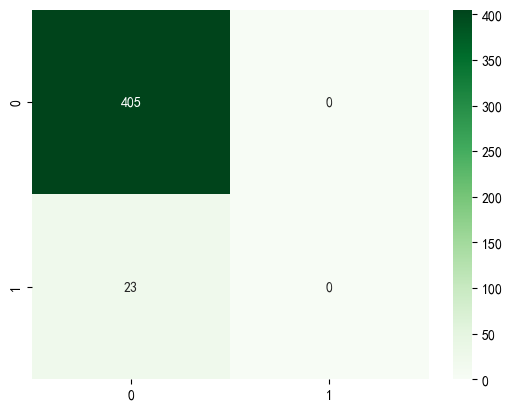

In [18]:
###pca-resampled-LSTM
#LSTM长短期记忆网络
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from mealpy.swarm_based.ZOA import OriginalZOA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子，保证每次输出结果都一样
# 确保 x_train_resampled 和 y_train_resampled 有相同的样本数量
print("x_train_resampled shape:", x_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

# 确保 X_test_pca 和 y_test_spring 有相同的样本数量
print("X_test_pca shape:", X_test_pca.shape)
print("y_test_spring shape:", y_test_spring.shape)

# 重塑 LSTM 输入数据的形状
train_X1 = x_train_resampled.reshape((x_train_resampled.shape[0], 1, x_train_resampled.shape[1]))
test_X1 = X_test_pca.reshape((X_test_pca.shape[0],1, X_test_pca.shape[1]))
num_classes = 2
# 确保 one-hot 编码后的数据与原始数据的样本数量一致
y_train_cat = to_categorical(y_train_resampled, num_classes=num_classes)
print("y_train_cat shape:", y_train_cat.shape)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes=num_classes)
print("y_test_spring_encoded shape:", y_test_spring_encoded.shape)

# 使用 to_categorical 进行one-hot编码
y_train_resampled_encoded = to_categorical(y_train_resampled, num_classes)
y_test_spring_encoded = to_categorical(y_test_spring, num_classes)
print(y_train_resampled)            # 输出原始标签
print(y_train_resampled_encoded)    # 输出one-hot编码后的标签

# 将标签转换为独热编码
y_train_cat = to_categorical(y_train_resampled, num_classes=2)

# 确保 create_model 函数在当前作用域
def LSTM_model(units, learning_rate, train_X1):
    # 使用Keras建构LSTM模型
    model = Sequential()
    model.add(LSTM(units=int(units), input_shape=(train_X1.shape[1], train_X1.shape[2])))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def cross_val_score_LSTM(nest, train_X1):
    units, epochs, learning_rate = nest
    model = LSTM_model(units, learning_rate, train_X1)
    history = model.fit(train_X1, y_train_cat, epochs=int(epochs), batch_size=64, validation_split=0.2)
    y_pred_s54_classes = model.predict(test_X1)
    y_pred_s54_classes = np.argmax(y_pred_s54_classes, axis=1)
    y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
    accuracy = accuracy_score(y_test_spring_classes, y_pred_s54_classes)
    return accuracy

def fitness_function(nest):
    units,epochs,learning_rate = nest
    return cross_val_score_LSTM(nest,train_X1)

# 定义适应度函数的参数范围
def get_nest():
    problem_dict1 = {
        "fit_func": fitness_function,
        "lb": [30, 10, 0.0001],
        "ub": [50, 20, 0.001],
        "minmax": "max",
    }
    epoch = 2
    pop_size = 32
    model = OriginalZOA(epoch, pop_size)
    best_position, best_fitness = model.solve(problem_dict1)
    print(f"Solution: {best_position}, Fitness: {best_fitness}")
    # 修正返回值，返回一个包含best_fitness的元组，以及best_position
    return best_fitness, (best_position[0], best_position[1], best_position[2])

# 获取最优参数
best_fitness, nest = get_nest()  # 注意这里的解包方式也改变了
units, epochs, learning_rate = nest
print(nest)
units= nest[0]
epochs= nest[1]
learning_rate =nest[2]

model=LSTM_model(units, learning_rate, train_X1)
history = model.fit(train_X1, y_train_cat,epochs=int(epochs), batch_size=64,validation_split=0.2)

# 评估模型性能，确保使用二分类的评估指标
loss, accuracy = model.evaluate(test_X1, y_test_spring_encoded)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# 使用模型进行预测
y_pred_s54_classes = model.predict(test_X1)
y_pred_s54_classes = np.argmax(y_pred_s54_classes, axis=1)
# 将 y_test_spring_encoded 转换回二进制格式
y_test_spring_classes = np.argmax(y_test_spring_encoded, axis=1)
# 计算评估指标，确保使用二分类的评估指标
accuracy = accuracy_score(y_test_spring_classes, y_pred_s54_classes)
precision = precision_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数
recall = recall_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数
f1 = f1_score(y_test_spring_classes, y_pred_s54_classes,average='macro')  # 不需要 average 参数

# 打印评估指标
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# 如果需要绘制混淆矩阵
conf_matrix = confusion_matrix(y_test_spring_classes, y_pred_s54_classes)
import seaborn as sns  # 确保导入 seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()